### Problem 1

In [4]:
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from utils import load_dataset
import numpy as np
# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
from CollabFilterMeanOnly import CollabFilterMeanOnly
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
n_epochs=50
model = CollabFilterMeanOnly(n_epochs=n_epochs)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.82200 | train_MAE     3.53239 | valid_MAE     3.50620 | grad_wrt_mu     7.10400
epoch       0.013 | loss_total     9.11851 | train_MAE     2.82199 | valid_MAE     2.79580 | grad_wrt_mu     5.63320
epoch       0.025 | loss_total     6.60551 | train_MAE     2.29207 | valid_MAE     2.26637 | grad_wrt_mu     4.63456
epoch       0.100 | loss_total     1.68633 | train_MAE     1.05029 | valid_MAE     1.03490 | grad_wrt_mu     1.24038
epoch       0.200 | loss_total     1.26837 | train_MAE     0.95532 | valid_MAE     0.95363 | grad_wrt_mu     0.10245
epoch       0.313 | loss_total     1.28873 | train_MAE     0.94556 | valid_MAE     0.94652 | grad_wrt_mu     0.04033
epoch       0.400 | loss_total     1.32975 | train_MAE     0.94431 | valid_MAE     0.94560 | grad_wrt_mu     0.02424
epoch       0.500 | loss_total     1.21539 | train_MAE     0.94557 | valid_MAE     0.94652 | grad_wrt_mu     0.00853
epoch       0.613 | loss_total     1.27747 | train_MAE     0.944

epoch      13.000 | loss_total     1.26694 | train_MAE     0.94360 | valid_MAE     0.94509 | grad_wrt_mu     0.06104
epoch      14.000 | loss_total     1.26653 | train_MAE     0.94446 | valid_MAE     0.94572 | grad_wrt_mu     0.01450
epoch      15.000 | loss_total     1.26715 | train_MAE     0.94423 | valid_MAE     0.94555 | grad_wrt_mu     0.03559
epoch      16.000 | loss_total     1.26600 | train_MAE     0.94184 | valid_MAE     0.94380 | grad_wrt_mu     0.03685
epoch      17.000 | loss_total     1.26828 | train_MAE     0.94422 | valid_MAE     0.94554 | grad_wrt_mu     0.06190
epoch      18.000 | loss_total     1.26533 | train_MAE     0.94433 | valid_MAE     0.94562 | grad_wrt_mu     0.03619
epoch      19.000 | loss_total     1.26817 | train_MAE     0.94420 | valid_MAE     0.94552 | grad_wrt_mu     0.10230
epoch      20.000 | loss_total     1.26601 | train_MAE     0.94279 | valid_MAE     0.94450 | grad_wrt_mu     0.00639
epoch      21.000 | loss_total     1.26693 | train_MAE     0.945

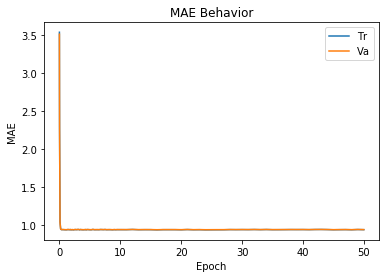

In [17]:
plt.figure
plt.plot(model.trace_epoch, model.trace_mae_train, label='Tr')
plt.plot(model.trace_epoch, model.trace_mae_valid, label='Va')
plt.title('MAE Behavior')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

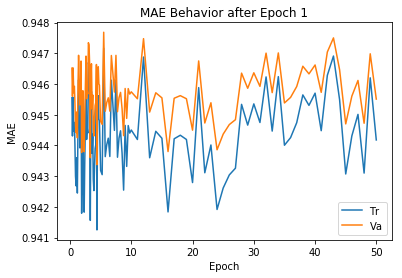

In [18]:
plt.figure
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Behavior after Epoch 1')
plt.plot(model.trace_epoch[5:], model.trace_mae_train[5:], label='Tr')
plt.plot(model.trace_epoch[5:], model.trace_mae_valid[5:], label='Va')
plt.legend()

### Questions:   
1b No, we are using mean as prediction. Forcing $\mu$ to be small by adding penalty, doesn't help the prediction at all. In fact, it's driving $\mu$ away from the optimal result.     
What we need to consider is whether a parameter implicates complexity of a model so we want to penalize it. Statistical parameters like mean and var are not a measure of complexity and we don't want to penalize it.     
1c The acual average is 3.53239. The SGD prediction is 3.53671, which agrees with the actual ave.

In [24]:
print(np.mean(train_tuple[2]), model.param_dict["mu"][0])

3.5323907390739073 3.536711325075617


### Problem2

In [10]:
from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem

In [11]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
model2 = CollabFilterOneScalarPerItem(
        n_epochs=250, step_size=0.5)
model2.init_parameter_dict(n_users, n_items, train_tuple)
model2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.82200 | train_MAE     3.53239 | valid_MAE     3.50620 | grad_wrt_mu     7.10400 | grad_wrt_b_per_user     0.00753 | grad_wrt_c_per_item     0.00423
epoch       0.013 | loss_total     1.18426 | train_MAE     0.93962 | valid_MAE     0.94187 | grad_wrt_mu     0.07603 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00082
epoch       0.025 | loss_total     1.23511 | train_MAE     0.94317 | valid_MAE     0.94429 | grad_wrt_mu     0.12661 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084
epoch       0.100 | loss_total     1.28834 | train_MAE     0.93797 | valid_MAE     0.93971 | grad_wrt_mu     0.01212 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00088
epoch       0.200 | loss_total     1.24465 | train_MAE     0.93125 | valid_MAE     0.93359 | grad_wrt_mu     0.14125 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00086
epoch       0.313 | loss_total     1.24821 | train_MAE     0.92916 | valid_

epoch       5.750 | loss_total     0.98688 | train_MAE     0.80148 | valid_MAE     0.80997 | grad_wrt_mu     0.02451 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065
epoch       6.000 | loss_total     0.98493 | train_MAE     0.79498 | valid_MAE     0.80495 | grad_wrt_mu     0.00156 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068
epoch       6.250 | loss_total     0.97845 | train_MAE     0.79285 | valid_MAE     0.80297 | grad_wrt_mu     0.00373 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00066
epoch       6.500 | loss_total     0.97478 | train_MAE     0.79205 | valid_MAE     0.80184 | grad_wrt_mu     0.04781 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00067
epoch       6.750 | loss_total     0.97362 | train_MAE     0.79387 | valid_MAE     0.80241 | grad_wrt_mu     0.08370 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065
epoch       7.000 | loss_total     0.96788 | train_MAE     0.78807 | valid_

epoch      38.000 | loss_total     0.86137 | train_MAE     0.73535 | valid_MAE     0.74964 | grad_wrt_mu     0.13924 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061
epoch      39.000 | loss_total     0.86056 | train_MAE     0.73394 | valid_MAE     0.74862 | grad_wrt_mu     0.05638 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00063
epoch      40.000 | loss_total     0.85761 | train_MAE     0.73397 | valid_MAE     0.74854 | grad_wrt_mu     0.03573 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065
epoch      41.000 | loss_total     0.85804 | train_MAE     0.73223 | valid_MAE     0.74740 | grad_wrt_mu     0.00395 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062
epoch      42.000 | loss_total     0.85791 | train_MAE     0.73423 | valid_MAE     0.74851 | grad_wrt_mu     0.11905 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062
epoch      43.000 | loss_total     0.85766 | train_MAE     0.73748 | valid_

epoch     215.000 | loss_total     0.83555 | train_MAE     0.71901 | valid_MAE     0.73732 | grad_wrt_mu     0.02825 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058
epoch     220.000 | loss_total     0.83568 | train_MAE     0.72044 | valid_MAE     0.73797 | grad_wrt_mu     0.09325 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058
epoch     225.000 | loss_total     0.83609 | train_MAE     0.72406 | valid_MAE     0.74040 | grad_wrt_mu     0.06055 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064
epoch     230.000 | loss_total     0.83626 | train_MAE     0.72022 | valid_MAE     0.73782 | grad_wrt_mu     0.03628 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062
epoch     235.000 | loss_total     0.83548 | train_MAE     0.72245 | valid_MAE     0.73930 | grad_wrt_mu     0.04084 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060
epoch     240.000 | loss_total     0.83427 | train_MAE     0.71875 | valid_

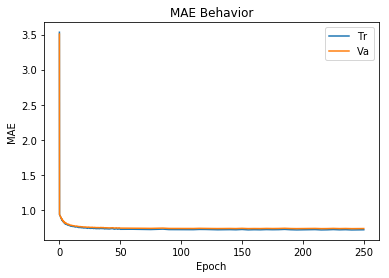

In [12]:
plt.figure
plt.plot(model2.trace_epoch, model2.trace_mae_train, label='Tr')
plt.plot(model2.trace_epoch, model2.trace_mae_valid, label='Va')
plt.title('MAE Behavior')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

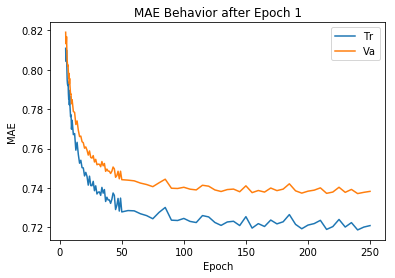

In [13]:
plt.figure
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE Behavior after Epoch 1')
plt.plot(model2.trace_epoch[50:], model2.trace_mae_train[50:], label='Tr')
plt.plot(model2.trace_epoch[50:], model2.trace_mae_valid[50:], label='Va')
plt.legend()

### Questions:   
2a The MAE performance on the Validation set improved by over 20% (from 0.945 to 0.741).     
2b From the Picture Below, rating seems to have a linear dependence on trained c. When c is larger, the average rating of a movie seems higher. When c is small(very negative), the average rating is lower.

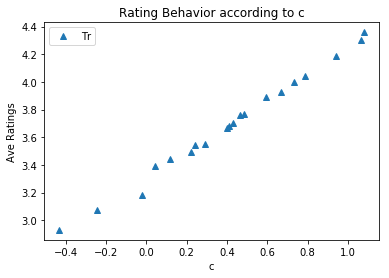

In [14]:
#2b
data_path='C:/Users/xush4/Documents/comp135-19s-assignments-master/project3/data_movie_lens_100k/'
sel_df = pd.read_csv(os.path.join(data_path, "select_movies.csv"))
aveT=[]; c_sel=[]
for i in sel_df["item_id"]:
    idx=train_tuple[1]
    aveTid=np.mean(train_tuple[2][np.where(idx==i)])
    aveT.append(aveTid);
    c_sel.append(model2.param_dict["c_per_item"][i])
    ##print(i, model2.param_dict["c_per_item"][i], aveid)
plt.plot(c_sel, aveT, linestyle='', marker='^', label="Tr")
plt.xlabel('c')
plt.ylabel('Ave Ratings')
plt.title('Rating Behavior according to c')
plt.legend()

### Problem3

In [6]:
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem as CFV

In [4]:
K=[0,2,10,50]
model3={};
for i in range(4):
    train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
    model3[i] = CFV(n_epochs=250, step_size=0.5, n_factors=K[i])
    model3[i].init_parameter_dict(n_users, n_items, train_tuple)
    model3[i].fit(train_tuple, valid_tuple)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


epoch       0.000 | loss_total     1.51000 | train_MAE     1.00329 | valid_MAE     0.98860 | grad_wrt_mu     1.10400 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00102 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.013 | loss_total     1.18425 | train_MAE     0.94118 | valid_MAE     0.94315 | grad_wrt_mu     0.05407 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.025 | loss_total     1.23642 | train_MAE     0.94350 | valid_MAE     0.94468 | grad_wrt_mu     0.12691 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.100 | loss_total     1.28887 | train_MAE     0.93832 | valid_MAE     0.94010 | grad_wrt_mu     0.01178 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.200 | loss_total     1.24523 | train_MAE     0

epoch       3.500 | loss_total     1.05346 | train_MAE     0.83228 | valid_MAE     0.83898 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.05000 | train_MAE     0.82554 | valid_MAE     0.83367 | grad_wrt_mu     0.08811 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.713 | loss_total     1.04548 | train_MAE     0.82518 | valid_MAE     0.83305 | grad_wrt_mu     0.02491 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.800 | loss_total     1.03940 | train_MAE     0.82053 | valid_MAE     0.82953 | grad_wrt_mu     0.15780 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.900 | loss_total     1.03498 | train_MAE     0

epoch      12.000 | loss_total     0.92124 | train_MAE     0.76775 | valid_MAE     0.77849 | grad_wrt_mu     0.10172 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     0.91580 | train_MAE     0.75929 | valid_MAE     0.77233 | grad_wrt_mu     0.12228 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total     0.91004 | train_MAE     0.76329 | valid_MAE     0.77414 | grad_wrt_mu     0.09511 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      15.000 | loss_total     0.90616 | train_MAE     0.75708 | valid_MAE     0.76938 | grad_wrt_mu     0.02292 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total     0.90054 | train_MAE     0

epoch      48.000 | loss_total     0.85445 | train_MAE     0.72832 | valid_MAE     0.74472 | grad_wrt_mu     0.01835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total     0.85309 | train_MAE     0.73491 | valid_MAE     0.74855 | grad_wrt_mu     0.05835 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      50.000 | loss_total     0.85335 | train_MAE     0.72789 | valid_MAE     0.74427 | grad_wrt_mu     0.00319 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total     0.84981 | train_MAE     0.72858 | valid_MAE     0.74402 | grad_wrt_mu     0.02996 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.84875 | train_MAE     0

epoch     215.000 | loss_total     0.83555 | train_MAE     0.71901 | valid_MAE     0.73732 | grad_wrt_mu     0.02826 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total     0.83569 | train_MAE     0.72044 | valid_MAE     0.73797 | grad_wrt_mu     0.09326 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     225.000 | loss_total     0.83609 | train_MAE     0.72406 | valid_MAE     0.74041 | grad_wrt_mu     0.06055 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total     0.83626 | train_MAE     0.72022 | valid_MAE     0.73782 | grad_wrt_mu     0.03629 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.83548 | train_MAE     0

epoch       3.000 | loss_total     1.81103 | train_MAE     1.02188 | valid_MAE     1.04104 | grad_wrt_mu     0.04121 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00118 | grad_wrt_V     0.00062
epoch       3.100 | loss_total     1.78582 | train_MAE     1.01132 | valid_MAE     1.03192 | grad_wrt_mu     0.18626 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.75878 | train_MAE     1.00478 | valid_MAE     1.02583 | grad_wrt_mu     0.04165 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       3.313 | loss_total     1.73388 | train_MAE     0.99642 | valid_MAE     1.01857 | grad_wrt_mu     0.21692 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00115 | grad_wrt_V     0.00055
epoch       3.400 | loss_total     1.71590 | train_MAE     0

epoch       9.500 | loss_total     1.13917 | train_MAE     0.83306 | valid_MAE     0.86490 | grad_wrt_mu     0.10528 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch       9.750 | loss_total     1.12777 | train_MAE     0.82929 | valid_MAE     0.86180 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00074 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.11839 | train_MAE     0.82758 | valid_MAE     0.85949 | grad_wrt_mu     0.01266 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00067 | grad_wrt_V     0.00028
epoch      11.000 | loss_total     1.08957 | train_MAE     0.81775 | valid_MAE     0.85018 | grad_wrt_mu     0.05579 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00060 | grad_wrt_V     0.00030
epoch      12.000 | loss_total     1.06348 | train_MAE     0

epoch      44.000 | loss_total     0.86201 | train_MAE     0.73493 | valid_MAE     0.77232 | grad_wrt_mu     0.01082 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      45.000 | loss_total     0.86171 | train_MAE     0.73057 | valid_MAE     0.76988 | grad_wrt_mu     0.07234 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch      46.000 | loss_total     0.85931 | train_MAE     0.73177 | valid_MAE     0.77007 | grad_wrt_mu     0.03288 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00043 | grad_wrt_V     0.00016
epoch      47.000 | loss_total     0.85691 | train_MAE     0.72997 | valid_MAE     0.76894 | grad_wrt_mu     0.03348 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch      48.000 | loss_total     0.85738 | train_MAE     0

epoch     195.000 | loss_total     0.79291 | train_MAE     0.70386 | valid_MAE     0.75519 | grad_wrt_mu     0.01597 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     200.000 | loss_total     0.79237 | train_MAE     0.69911 | valid_MAE     0.75275 | grad_wrt_mu     0.19115 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     205.000 | loss_total     0.79054 | train_MAE     0.70441 | valid_MAE     0.75604 | grad_wrt_mu     0.06436 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     210.000 | loss_total     0.78922 | train_MAE     0.70655 | valid_MAE     0.75780 | grad_wrt_mu     0.08157 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch     215.000 | loss_total     0.78863 | train_MAE     0

epoch       2.313 | loss_total     5.42139 | train_MAE     1.66627 | valid_MAE     1.72479 | grad_wrt_mu     0.06114 | grad_wrt_b_per_user     0.00237 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00186 | grad_wrt_V     0.00109
epoch       2.400 | loss_total     5.28470 | train_MAE     1.64638 | valid_MAE     1.70634 | grad_wrt_mu     0.28860 | grad_wrt_b_per_user     0.00251 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00186 | grad_wrt_V     0.00104
epoch       2.500 | loss_total     5.11886 | train_MAE     1.62458 | valid_MAE     1.68589 | grad_wrt_mu     0.27770 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00175 | grad_wrt_V     0.00100
epoch       2.613 | loss_total     4.96090 | train_MAE     1.60188 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81752 | train_MAE     1

epoch       7.250 | loss_total     2.20465 | train_MAE     1.10733 | valid_MAE     1.20045 | grad_wrt_mu     0.22864 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       7.500 | loss_total     2.15592 | train_MAE     1.09144 | valid_MAE     1.18654 | grad_wrt_mu     0.18131 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00103 | grad_wrt_V     0.00054
epoch       7.750 | loss_total     2.09214 | train_MAE     1.08204 | valid_MAE     1.17639 | grad_wrt_mu     0.16153 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00091 | grad_wrt_V     0.00048
epoch       8.000 | loss_total     2.04176 | train_MAE     1.06676 | valid_MAE     1.16356 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99877 | train_MAE     1

epoch      34.000 | loss_total     0.92056 | train_MAE     0.75127 | valid_MAE     0.87594 | grad_wrt_mu     0.04488 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      35.000 | loss_total     0.91275 | train_MAE     0.75069 | valid_MAE     0.87543 | grad_wrt_mu     0.05512 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      36.000 | loss_total     0.90507 | train_MAE     0.74555 | valid_MAE     0.87138 | grad_wrt_mu     0.02310 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00021
epoch      37.000 | loss_total     0.89761 | train_MAE     0.74313 | valid_MAE     0.86945 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89092 | train_MAE     0

epoch     145.000 | loss_total     0.70284 | train_MAE     0.65593 | valid_MAE     0.82406 | grad_wrt_mu     0.08060 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00032 | grad_wrt_V     0.00015
epoch     150.000 | loss_total     0.70201 | train_MAE     0.65569 | valid_MAE     0.82487 | grad_wrt_mu     0.13550 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     155.000 | loss_total     0.69761 | train_MAE     0.65283 | valid_MAE     0.82430 | grad_wrt_mu     0.07635 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00033 | grad_wrt_V     0.00014
epoch     160.000 | loss_total     0.69369 | train_MAE     0.65257 | valid_MAE     0.82504 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69239 | train_MAE     0

epoch       1.100 | loss_total    23.81799 | train_MAE     3.93716 | valid_MAE     4.33071 | grad_wrt_mu     0.37484 | grad_wrt_b_per_user     0.00569 | grad_wrt_c_per_item     0.00322 | grad_wrt_U     0.00440 | grad_wrt_V     0.00246
epoch       1.200 | loss_total    24.64363 | train_MAE     3.84665 | valid_MAE     4.25878 | grad_wrt_mu     0.64077 | grad_wrt_b_per_user     0.00571 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00446 | grad_wrt_V     0.00251
epoch       1.313 | loss_total    21.77241 | train_MAE     3.73577 | valid_MAE     4.17829 | grad_wrt_mu     0.53037 | grad_wrt_b_per_user     0.00511 | grad_wrt_c_per_item     0.00326 | grad_wrt_U     0.00413 | grad_wrt_V     0.00239
epoch       1.400 | loss_total    23.49156 | train_MAE     3.66867 | valid_MAE     4.12828 | grad_wrt_mu     0.71846 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00340 | grad_wrt_U     0.00427 | grad_wrt_V     0.00244
epoch       1.500 | loss_total    23.02254 | train_MAE     3

epoch       4.613 | loss_total     8.99653 | train_MAE     2.10745 | valid_MAE     2.88923 | grad_wrt_mu     0.44811 | grad_wrt_b_per_user     0.00345 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00229 | grad_wrt_V     0.00125
epoch       4.713 | loss_total     8.75950 | train_MAE     2.08096 | valid_MAE     2.86717 | grad_wrt_mu     0.10427 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00221 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     8.57108 | train_MAE     2.05924 | valid_MAE     2.84898 | grad_wrt_mu     0.06388 | grad_wrt_b_per_user     0.00343 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00235 | grad_wrt_V     0.00129
epoch       4.900 | loss_total     8.34298 | train_MAE     2.03316 | valid_MAE     2.82790 | grad_wrt_mu     0.14022 | grad_wrt_b_per_user     0.00318 | grad_wrt_c_per_item     0.00190 | grad_wrt_U     0.00209 | grad_wrt_V     0.00113
epoch       5.000 | loss_total     8.12513 | train_MAE     2

epoch      21.000 | loss_total     1.32669 | train_MAE     0.87659 | valid_MAE     1.82069 | grad_wrt_mu     0.02848 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00068 | grad_wrt_V     0.00035
epoch      22.000 | loss_total     1.25984 | train_MAE     0.85718 | valid_MAE     1.80227 | grad_wrt_mu     0.01568 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.20083 | train_MAE     0.83839 | valid_MAE     1.78424 | grad_wrt_mu     0.24229 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00067 | grad_wrt_V     0.00035
epoch      24.000 | loss_total     1.14820 | train_MAE     0.82090 | valid_MAE     1.76794 | grad_wrt_mu     0.03612 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00061 | grad_wrt_V     0.00032
epoch      25.000 | loss_total     1.09902 | train_MAE     0

epoch      80.000 | loss_total     0.49311 | train_MAE     0.52649 | valid_MAE     1.50526 | grad_wrt_mu     0.00190 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00032 | grad_wrt_V     0.00013
epoch      85.000 | loss_total     0.47969 | train_MAE     0.51878 | valid_MAE     1.50012 | grad_wrt_mu     0.06136 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.46879 | train_MAE     0.51069 | valid_MAE     1.49552 | grad_wrt_mu     0.06753 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00030 | grad_wrt_V     0.00013
epoch      95.000 | loss_total     0.45882 | train_MAE     0.50356 | valid_MAE     1.49159 | grad_wrt_mu     0.01605 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00012
epoch     100.000 | loss_total     0.45053 | train_MAE     0

Text(0.5,0.98,'MAE behavior,Alpha=0')

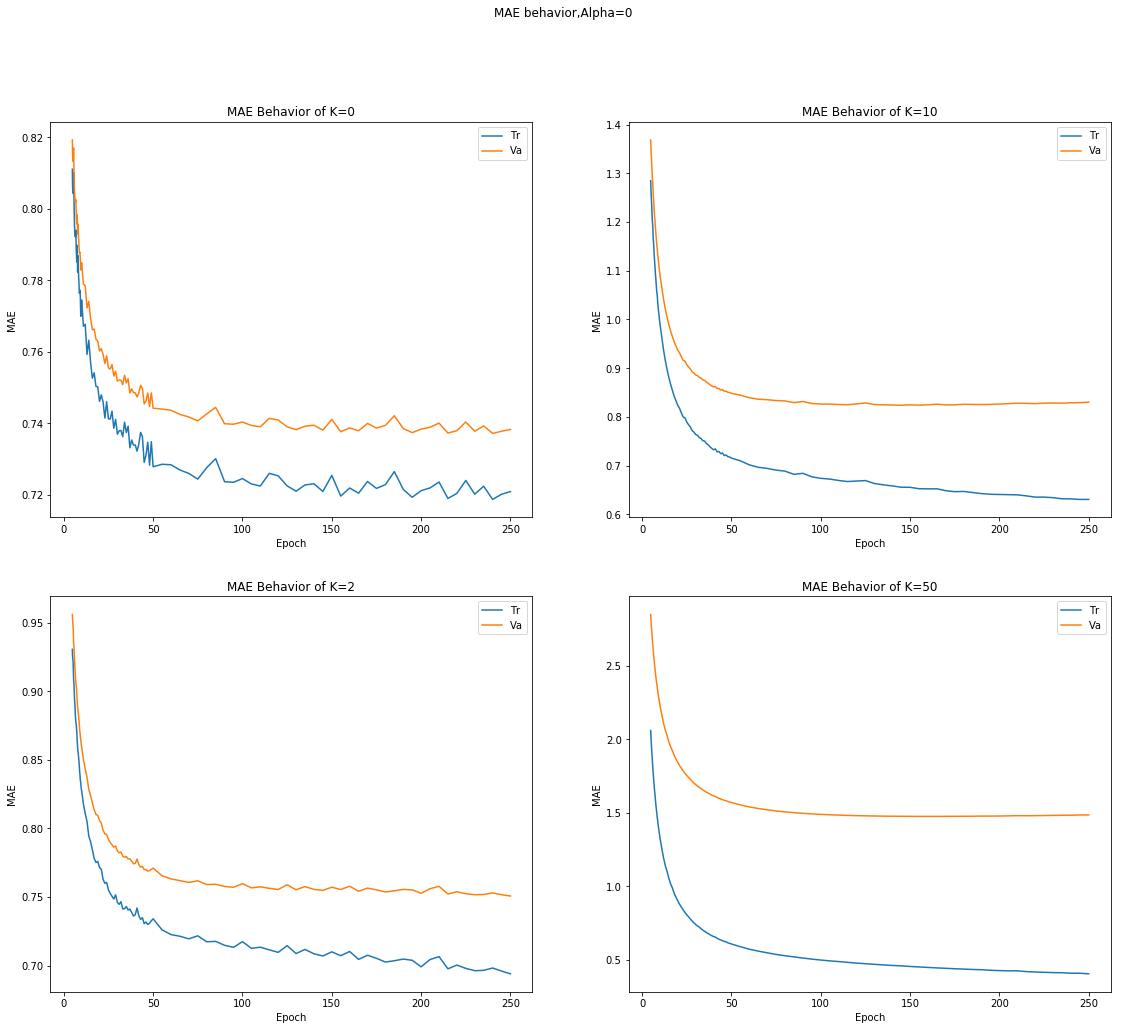

In [16]:
fig3a, axes = plt.subplots(nrows=2, ncols=2, figsize=(19,16))
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('Epoch')
        axes[i,j].set_ylabel('MAE')
        axes[i,j].set_title('MAE Behavior of K=' + str(int(K[i+2*j])))
        axes[i,j].plot(model3[i+2*j].trace_epoch[50:], model3[i+2*j].trace_mae_train[50:], label='Tr')
        axes[i,j].plot(model3[i+2*j].trace_epoch[50:], model3[i+2*j].trace_mae_valid[50:], label='Va')
        axes[i,j].legend()
        
fig3a.suptitle('MAE behavior,'+ 'Alpha='+str(0))

In [7]:
### 3b
K=[0,2,10,50]
a=np.logspace(-10,2)
tr_error=[];
va_error=[];
for i in range(4):
    te=[]; ve=[];
    for j in range(int(a.size)):
        train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
        model3b = CFV(n_epochs=250, step_size=0.5, n_factors=K[i], alpha=a[j])
        model3b.init_parameter_dict(n_users, n_items, train_tuple)
        model3b.fit(train_tuple, valid_tuple)
        te.append(model3b.trace_mae_train[-1])
        ve.append(model3b.trace_mae_valid[-1])
    tr_error.append(te)
    va_error.append(ve)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


epoch       0.000 | loss_total     1.51000 | train_MAE     1.00329 | valid_MAE     0.98860 | grad_wrt_mu     1.10400 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00102 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.013 | loss_total     1.18425 | train_MAE     0.94118 | valid_MAE     0.94315 | grad_wrt_mu     0.05407 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.025 | loss_total     1.23642 | train_MAE     0.94350 | valid_MAE     0.94468 | grad_wrt_mu     0.12691 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.100 | loss_total     1.28887 | train_MAE     0.93832 | valid_MAE     0.94010 | grad_wrt_mu     0.01178 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.200 | loss_total     1.24523 | train_MAE     0

epoch       3.500 | loss_total     1.05346 | train_MAE     0.83228 | valid_MAE     0.83898 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.05000 | train_MAE     0.82554 | valid_MAE     0.83367 | grad_wrt_mu     0.08811 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.713 | loss_total     1.04548 | train_MAE     0.82518 | valid_MAE     0.83305 | grad_wrt_mu     0.02491 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.800 | loss_total     1.03940 | train_MAE     0.82053 | valid_MAE     0.82953 | grad_wrt_mu     0.15780 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.900 | loss_total     1.03498 | train_MAE     0

epoch      11.000 | loss_total     0.92762 | train_MAE     0.76720 | valid_MAE     0.77897 | grad_wrt_mu     0.02862 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      12.000 | loss_total     0.92124 | train_MAE     0.76775 | valid_MAE     0.77849 | grad_wrt_mu     0.10172 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     0.91580 | train_MAE     0.75929 | valid_MAE     0.77233 | grad_wrt_mu     0.12228 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total     0.91004 | train_MAE     0.76329 | valid_MAE     0.77414 | grad_wrt_mu     0.09511 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      15.000 | loss_total     0.90616 | train_MAE     0

epoch      46.000 | loss_total     0.85470 | train_MAE     0.73115 | valid_MAE     0.74628 | grad_wrt_mu     0.04127 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      47.000 | loss_total     0.85408 | train_MAE     0.73476 | valid_MAE     0.74853 | grad_wrt_mu     0.13682 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      48.000 | loss_total     0.85445 | train_MAE     0.72832 | valid_MAE     0.74472 | grad_wrt_mu     0.01835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total     0.85309 | train_MAE     0.73491 | valid_MAE     0.74855 | grad_wrt_mu     0.05835 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      50.000 | loss_total     0.85335 | train_MAE     0

epoch     205.000 | loss_total     0.83485 | train_MAE     0.72197 | valid_MAE     0.73893 | grad_wrt_mu     0.04312 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     210.000 | loss_total     0.83516 | train_MAE     0.72362 | valid_MAE     0.74010 | grad_wrt_mu     0.00006 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     215.000 | loss_total     0.83555 | train_MAE     0.71901 | valid_MAE     0.73732 | grad_wrt_mu     0.02826 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total     0.83569 | train_MAE     0.72044 | valid_MAE     0.73797 | grad_wrt_mu     0.09326 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     225.000 | loss_total     0.83609 | train_MAE     0

epoch       2.313 | loss_total     1.10901 | train_MAE     0.85416 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10340 | train_MAE     0.85521 | valid_MAE     0.86104 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09481 | train_MAE     0.84754 | valid_MAE     0.85501 | grad_wrt_mu     0.21281 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.08584 | train_MAE     0.84931 | valid_MAE     0.85550 | grad_wrt_mu     0.01054 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.713 | loss_total     1.07969 | train_MAE     0

epoch       7.750 | loss_total     0.95697 | train_MAE     0.78233 | valid_MAE     0.79307 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.000 | loss_total     0.95547 | train_MAE     0.78689 | valid_MAE     0.79575 | grad_wrt_mu     0.07275 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.250 | loss_total     0.95278 | train_MAE     0.78192 | valid_MAE     0.79211 | grad_wrt_mu     0.05404 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.500 | loss_total     0.94996 | train_MAE     0.77912 | valid_MAE     0.78987 | grad_wrt_mu     0.16585 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.750 | loss_total     0.94551 | train_MAE     0

epoch      36.000 | loss_total     0.86410 | train_MAE     0.73926 | valid_MAE     0.75249 | grad_wrt_mu     0.07517 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      37.000 | loss_total     0.86084 | train_MAE     0.73320 | valid_MAE     0.74851 | grad_wrt_mu     0.04684 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      38.000 | loss_total     0.86142 | train_MAE     0.73537 | valid_MAE     0.74967 | grad_wrt_mu     0.13923 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      39.000 | loss_total     0.86060 | train_MAE     0.73396 | valid_MAE     0.74864 | grad_wrt_mu     0.05647 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      40.000 | loss_total     0.85766 | train_MAE     0

epoch     155.000 | loss_total     0.83671 | train_MAE     0.71968 | valid_MAE     0.73769 | grad_wrt_mu     0.17096 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     160.000 | loss_total     0.83790 | train_MAE     0.72194 | valid_MAE     0.73876 | grad_wrt_mu     0.06339 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     165.000 | loss_total     0.83618 | train_MAE     0.72050 | valid_MAE     0.73796 | grad_wrt_mu     0.04445 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     170.000 | loss_total     0.83750 | train_MAE     0.72376 | valid_MAE     0.74001 | grad_wrt_mu     0.05757 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     175.000 | loss_total     0.83588 | train_MAE     0

epoch       1.500 | loss_total     1.14324 | train_MAE     0.88312 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.14687 | train_MAE     0.87463 | valid_MAE     0.88015 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04461 | train_MAE     0.87530 | valid_MAE     0.87986 | grad_wrt_mu     0.01924 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.15827 | train_MAE     0.87734 | valid_MAE     0.88074 | grad_wrt_mu     0.06841 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.900 | loss_total     1.07848 | train_MAE     0

epoch       5.000 | loss_total     1.00474 | train_MAE     0.80551 | valid_MAE     0.81475 | grad_wrt_mu     0.01192 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.00342 | train_MAE     0.80435 | valid_MAE     0.81329 | grad_wrt_mu     0.03114 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     0.99692 | train_MAE     0.81018 | valid_MAE     0.81704 | grad_wrt_mu     0.09949 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.750 | loss_total     0.98722 | train_MAE     0.80165 | valid_MAE     0.81015 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98528 | train_MAE     0

epoch      25.000 | loss_total     0.87675 | train_MAE     0.74130 | valid_MAE     0.75556 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.87433 | train_MAE     0.74123 | valid_MAE     0.75523 | grad_wrt_mu     0.06768 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.87508 | train_MAE     0.74343 | valid_MAE     0.75649 | grad_wrt_mu     0.09290 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      28.000 | loss_total     0.87280 | train_MAE     0.73868 | valid_MAE     0.75325 | grad_wrt_mu     0.03936 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87055 | train_MAE     0

epoch     100.000 | loss_total     0.84128 | train_MAE     0.72459 | valid_MAE     0.74040 | grad_wrt_mu     0.05481 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.84029 | train_MAE     0.72307 | valid_MAE     0.73944 | grad_wrt_mu     0.11299 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.83873 | train_MAE     0.72250 | valid_MAE     0.73906 | grad_wrt_mu     0.06225 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     115.000 | loss_total     0.83809 | train_MAE     0.72604 | valid_MAE     0.74142 | grad_wrt_mu     0.09327 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.83871 | train_MAE     0

epoch       0.613 | loss_total     1.22091 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18403 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16593 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10544 | train_MAE     0.90013 | valid_MAE     0.90420 | grad_wrt_mu     0.05050 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.23133 | train_MAE     0

epoch       4.800 | loss_total     1.00994 | train_MAE     0.81111 | valid_MAE     0.81928 | grad_wrt_mu     0.06458 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.00999 | train_MAE     0.80693 | valid_MAE     0.81604 | grad_wrt_mu     0.00297 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.00474 | train_MAE     0.80551 | valid_MAE     0.81475 | grad_wrt_mu     0.01192 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.00342 | train_MAE     0.80435 | valid_MAE     0.81329 | grad_wrt_mu     0.03114 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     0.99692 | train_MAE     0

epoch      23.000 | loss_total     0.88049 | train_MAE     0.74151 | valid_MAE     0.75676 | grad_wrt_mu     0.03459 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     0.87955 | train_MAE     0.74607 | valid_MAE     0.75888 | grad_wrt_mu     0.01843 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     0.87675 | train_MAE     0.74130 | valid_MAE     0.75556 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.87433 | train_MAE     0.74123 | valid_MAE     0.75523 | grad_wrt_mu     0.06768 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.87508 | train_MAE     0

epoch      90.000 | loss_total     0.84101 | train_MAE     0.72370 | valid_MAE     0.73991 | grad_wrt_mu     0.00200 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.84137 | train_MAE     0.72354 | valid_MAE     0.73979 | grad_wrt_mu     0.12761 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.84128 | train_MAE     0.72459 | valid_MAE     0.74040 | grad_wrt_mu     0.05481 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.84029 | train_MAE     0.72307 | valid_MAE     0.73944 | grad_wrt_mu     0.11299 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.83873 | train_MAE     0

epoch       0.500 | loss_total     1.16773 | train_MAE     0.91948 | valid_MAE     0.92203 | grad_wrt_mu     0.03562 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total     1.22091 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18403 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16593 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10544 | train_MAE     0

epoch       4.000 | loss_total     1.03267 | train_MAE     0.82059 | valid_MAE     0.82861 | grad_wrt_mu     0.00862 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total     1.02610 | train_MAE     0.82876 | valid_MAE     0.83428 | grad_wrt_mu     0.07809 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total     1.02423 | train_MAE     0.81982 | valid_MAE     0.82727 | grad_wrt_mu     0.06805 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     1.01943 | train_MAE     0.81799 | valid_MAE     0.82569 | grad_wrt_mu     0.04829 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     1.01877 | train_MAE     0

epoch      15.000 | loss_total     0.90616 | train_MAE     0.75708 | valid_MAE     0.76938 | grad_wrt_mu     0.02292 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total     0.90054 | train_MAE     0.75267 | valid_MAE     0.76619 | grad_wrt_mu     0.09806 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     0.89818 | train_MAE     0.75417 | valid_MAE     0.76643 | grad_wrt_mu     0.02591 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     0.89351 | train_MAE     0.75039 | valid_MAE     0.76358 | grad_wrt_mu     0.04501 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     0.89292 | train_MAE     0

epoch      50.000 | loss_total     0.85335 | train_MAE     0.72789 | valid_MAE     0.74427 | grad_wrt_mu     0.00319 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total     0.84981 | train_MAE     0.72858 | valid_MAE     0.74402 | grad_wrt_mu     0.02996 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.84875 | train_MAE     0.72844 | valid_MAE     0.74367 | grad_wrt_mu     0.00013 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.84711 | train_MAE     0.72698 | valid_MAE     0.74254 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.84536 | train_MAE     0

epoch     225.000 | loss_total     0.83609 | train_MAE     0.72406 | valid_MAE     0.74041 | grad_wrt_mu     0.06055 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total     0.83626 | train_MAE     0.72022 | valid_MAE     0.73782 | grad_wrt_mu     0.03629 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.83548 | train_MAE     0.72245 | valid_MAE     0.73930 | grad_wrt_mu     0.04084 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.83427 | train_MAE     0.71875 | valid_MAE     0.73720 | grad_wrt_mu     0.11416 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.83347 | train_MAE     0

epoch       3.100 | loss_total     1.06973 | train_MAE     0.84478 | valid_MAE     0.84972 | grad_wrt_mu     0.02963 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total     1.06426 | train_MAE     0.84280 | valid_MAE     0.84787 | grad_wrt_mu     0.18165 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.05984 | train_MAE     0.82821 | valid_MAE     0.83695 | grad_wrt_mu     0.20852 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05471 | train_MAE     0.83908 | valid_MAE     0.84426 | grad_wrt_mu     0.13867 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.500 | loss_total     1.05346 | train_MAE     0

epoch       9.000 | loss_total     0.94456 | train_MAE     0.77730 | valid_MAE     0.78790 | grad_wrt_mu     0.09808 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.250 | loss_total     0.93706 | train_MAE     0.77549 | valid_MAE     0.78642 | grad_wrt_mu     0.05634 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total     0.93487 | train_MAE     0.76997 | valid_MAE     0.78293 | grad_wrt_mu     0.08600 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total     0.93813 | train_MAE     0.77218 | valid_MAE     0.78361 | grad_wrt_mu     0.02026 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      10.000 | loss_total     0.93606 | train_MAE     0

epoch      41.000 | loss_total     0.85809 | train_MAE     0.73225 | valid_MAE     0.74742 | grad_wrt_mu     0.00389 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      42.000 | loss_total     0.85795 | train_MAE     0.73425 | valid_MAE     0.74853 | grad_wrt_mu     0.11890 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total     0.85770 | train_MAE     0.73750 | valid_MAE     0.75069 | grad_wrt_mu     0.12665 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total     0.85617 | train_MAE     0.73631 | valid_MAE     0.74977 | grad_wrt_mu     0.20931 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      45.000 | loss_total     0.85480 | train_MAE     0

epoch     180.000 | loss_total     0.83610 | train_MAE     0.72288 | valid_MAE     0.73946 | grad_wrt_mu     0.03048 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     185.000 | loss_total     0.83609 | train_MAE     0.72654 | valid_MAE     0.74216 | grad_wrt_mu     0.11810 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total     0.83599 | train_MAE     0.72156 | valid_MAE     0.73859 | grad_wrt_mu     0.03749 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total     0.83722 | train_MAE     0.71934 | valid_MAE     0.73743 | grad_wrt_mu     0.12574 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     200.000 | loss_total     0.83520 | train_MAE     0

epoch       2.200 | loss_total     1.11553 | train_MAE     0.85718 | valid_MAE     0.86368 | grad_wrt_mu     0.03980 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     1.10901 | train_MAE     0.85416 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10340 | train_MAE     0.85521 | valid_MAE     0.86104 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09481 | train_MAE     0.84754 | valid_MAE     0.85501 | grad_wrt_mu     0.21281 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.08584 | train_MAE     0

epoch       6.750 | loss_total     0.97396 | train_MAE     0.79402 | valid_MAE     0.80258 | grad_wrt_mu     0.08394 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.000 | loss_total     0.96818 | train_MAE     0.78820 | valid_MAE     0.79828 | grad_wrt_mu     0.02421 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     0.96615 | train_MAE     0.78516 | valid_MAE     0.79586 | grad_wrt_mu     0.05963 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     0.96318 | train_MAE     0.78978 | valid_MAE     0.79835 | grad_wrt_mu     0.07433 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total     0.95697 | train_MAE     0

epoch      32.000 | loss_total     0.86685 | train_MAE     0.73804 | valid_MAE     0.75209 | grad_wrt_mu     0.05251 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      33.000 | loss_total     0.86469 | train_MAE     0.73631 | valid_MAE     0.75085 | grad_wrt_mu     0.13308 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     0.86449 | train_MAE     0.74036 | valid_MAE     0.75349 | grad_wrt_mu     0.01602 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     0.86280 | train_MAE     0.73743 | valid_MAE     0.75132 | grad_wrt_mu     0.11409 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total     0.86410 | train_MAE     0

epoch     135.000 | loss_total     0.83875 | train_MAE     0.72279 | valid_MAE     0.73924 | grad_wrt_mu     0.04350 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     140.000 | loss_total     0.83865 | train_MAE     0.72314 | valid_MAE     0.73948 | grad_wrt_mu     0.02446 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     0.83714 | train_MAE     0.72097 | valid_MAE     0.73813 | grad_wrt_mu     0.01944 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     0.83727 | train_MAE     0.72548 | valid_MAE     0.74113 | grad_wrt_mu     0.08504 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total     0.83671 | train_MAE     0

epoch       1.500 | loss_total     1.14324 | train_MAE     0.88312 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.14687 | train_MAE     0.87463 | valid_MAE     0.88015 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04461 | train_MAE     0.87530 | valid_MAE     0.87986 | grad_wrt_mu     0.01924 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.15827 | train_MAE     0.87734 | valid_MAE     0.88074 | grad_wrt_mu     0.06841 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.900 | loss_total     1.07848 | train_MAE     0

epoch       5.750 | loss_total     0.98722 | train_MAE     0.80165 | valid_MAE     0.81015 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98528 | train_MAE     0.79511 | valid_MAE     0.80511 | grad_wrt_mu     0.00103 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.250 | loss_total     0.97880 | train_MAE     0.79299 | valid_MAE     0.80312 | grad_wrt_mu     0.00368 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.500 | loss_total     0.97513 | train_MAE     0.79218 | valid_MAE     0.80199 | grad_wrt_mu     0.04776 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.750 | loss_total     0.97396 | train_MAE     0

epoch      28.000 | loss_total     0.87280 | train_MAE     0.73868 | valid_MAE     0.75325 | grad_wrt_mu     0.03936 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87055 | train_MAE     0.74115 | valid_MAE     0.75461 | grad_wrt_mu     0.08179 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      30.000 | loss_total     0.87070 | train_MAE     0.73701 | valid_MAE     0.75186 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      31.000 | loss_total     0.86799 | train_MAE     0.73794 | valid_MAE     0.75217 | grad_wrt_mu     0.06630 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      32.000 | loss_total     0.86685 | train_MAE     0

epoch     115.000 | loss_total     0.83809 | train_MAE     0.72604 | valid_MAE     0.74142 | grad_wrt_mu     0.09327 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.83871 | train_MAE     0.72535 | valid_MAE     0.74095 | grad_wrt_mu     0.00951 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     125.000 | loss_total     0.83641 | train_MAE     0.72253 | valid_MAE     0.73906 | grad_wrt_mu     0.09747 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     130.000 | loss_total     0.83624 | train_MAE     0.72105 | valid_MAE     0.73825 | grad_wrt_mu     0.08539 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     135.000 | loss_total     0.83875 | train_MAE     0

epoch       0.500 | loss_total     1.16773 | train_MAE     0.91948 | valid_MAE     0.92203 | grad_wrt_mu     0.03562 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total     1.22091 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18403 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16593 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10544 | train_MAE     0

epoch       4.000 | loss_total     1.03267 | train_MAE     0.82059 | valid_MAE     0.82861 | grad_wrt_mu     0.00862 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total     1.02610 | train_MAE     0.82876 | valid_MAE     0.83428 | grad_wrt_mu     0.07809 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total     1.02423 | train_MAE     0.81982 | valid_MAE     0.82727 | grad_wrt_mu     0.06805 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     1.01943 | train_MAE     0.81799 | valid_MAE     0.82569 | grad_wrt_mu     0.04829 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     1.01877 | train_MAE     0

epoch      15.000 | loss_total     0.90616 | train_MAE     0.75708 | valid_MAE     0.76938 | grad_wrt_mu     0.02292 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total     0.90054 | train_MAE     0.75267 | valid_MAE     0.76619 | grad_wrt_mu     0.09806 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     0.89818 | train_MAE     0.75417 | valid_MAE     0.76643 | grad_wrt_mu     0.02591 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     0.89351 | train_MAE     0.75039 | valid_MAE     0.76358 | grad_wrt_mu     0.04501 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     0.89292 | train_MAE     0

epoch      50.000 | loss_total     0.85335 | train_MAE     0.72789 | valid_MAE     0.74427 | grad_wrt_mu     0.00319 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total     0.84981 | train_MAE     0.72858 | valid_MAE     0.74402 | grad_wrt_mu     0.02996 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.84875 | train_MAE     0.72844 | valid_MAE     0.74367 | grad_wrt_mu     0.00013 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.84711 | train_MAE     0.72698 | valid_MAE     0.74254 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.84536 | train_MAE     0

epoch     225.000 | loss_total     0.83609 | train_MAE     0.72406 | valid_MAE     0.74041 | grad_wrt_mu     0.06055 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total     0.83626 | train_MAE     0.72022 | valid_MAE     0.73782 | grad_wrt_mu     0.03629 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.83548 | train_MAE     0.72245 | valid_MAE     0.73930 | grad_wrt_mu     0.04084 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.83427 | train_MAE     0.71875 | valid_MAE     0.73720 | grad_wrt_mu     0.11416 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.83347 | train_MAE     0

epoch       3.000 | loss_total     1.07030 | train_MAE     0.84430 | valid_MAE     0.84986 | grad_wrt_mu     0.00330 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total     1.06973 | train_MAE     0.84478 | valid_MAE     0.84972 | grad_wrt_mu     0.02963 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total     1.06426 | train_MAE     0.84280 | valid_MAE     0.84787 | grad_wrt_mu     0.18165 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.05984 | train_MAE     0.82821 | valid_MAE     0.83695 | grad_wrt_mu     0.20852 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05471 | train_MAE     0

epoch       8.750 | loss_total     0.94551 | train_MAE     0.77640 | valid_MAE     0.78766 | grad_wrt_mu     0.01564 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.000 | loss_total     0.94456 | train_MAE     0.77730 | valid_MAE     0.78790 | grad_wrt_mu     0.09808 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.250 | loss_total     0.93706 | train_MAE     0.77549 | valid_MAE     0.78642 | grad_wrt_mu     0.05634 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total     0.93487 | train_MAE     0.76997 | valid_MAE     0.78293 | grad_wrt_mu     0.08600 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total     0.93813 | train_MAE     0

epoch      40.000 | loss_total     0.85766 | train_MAE     0.73398 | valid_MAE     0.74856 | grad_wrt_mu     0.03569 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      41.000 | loss_total     0.85809 | train_MAE     0.73225 | valid_MAE     0.74742 | grad_wrt_mu     0.00389 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      42.000 | loss_total     0.85795 | train_MAE     0.73425 | valid_MAE     0.74853 | grad_wrt_mu     0.11890 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total     0.85770 | train_MAE     0.73750 | valid_MAE     0.75069 | grad_wrt_mu     0.12665 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total     0.85617 | train_MAE     0

epoch     175.000 | loss_total     0.83588 | train_MAE     0.72182 | valid_MAE     0.73870 | grad_wrt_mu     0.03482 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     180.000 | loss_total     0.83610 | train_MAE     0.72288 | valid_MAE     0.73946 | grad_wrt_mu     0.03048 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     185.000 | loss_total     0.83609 | train_MAE     0.72654 | valid_MAE     0.74216 | grad_wrt_mu     0.11810 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total     0.83599 | train_MAE     0.72156 | valid_MAE     0.73859 | grad_wrt_mu     0.03749 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total     0.83722 | train_MAE     0

epoch       2.313 | loss_total     1.10901 | train_MAE     0.85416 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10340 | train_MAE     0.85521 | valid_MAE     0.86104 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09481 | train_MAE     0.84754 | valid_MAE     0.85501 | grad_wrt_mu     0.21281 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.08584 | train_MAE     0.84931 | valid_MAE     0.85550 | grad_wrt_mu     0.01054 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.713 | loss_total     1.07969 | train_MAE     0

epoch       7.000 | loss_total     0.96818 | train_MAE     0.78820 | valid_MAE     0.79828 | grad_wrt_mu     0.02421 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     0.96615 | train_MAE     0.78516 | valid_MAE     0.79586 | grad_wrt_mu     0.05963 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     0.96318 | train_MAE     0.78978 | valid_MAE     0.79835 | grad_wrt_mu     0.07433 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total     0.95697 | train_MAE     0.78233 | valid_MAE     0.79307 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.000 | loss_total     0.95547 | train_MAE     0

epoch      33.000 | loss_total     0.86469 | train_MAE     0.73631 | valid_MAE     0.75085 | grad_wrt_mu     0.13308 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     0.86449 | train_MAE     0.74036 | valid_MAE     0.75349 | grad_wrt_mu     0.01602 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     0.86280 | train_MAE     0.73743 | valid_MAE     0.75132 | grad_wrt_mu     0.11409 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total     0.86410 | train_MAE     0.73926 | valid_MAE     0.75249 | grad_wrt_mu     0.07517 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      37.000 | loss_total     0.86084 | train_MAE     0

epoch     140.000 | loss_total     0.83865 | train_MAE     0.72314 | valid_MAE     0.73948 | grad_wrt_mu     0.02446 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     0.83714 | train_MAE     0.72097 | valid_MAE     0.73813 | grad_wrt_mu     0.01944 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     0.83727 | train_MAE     0.72548 | valid_MAE     0.74113 | grad_wrt_mu     0.08504 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total     0.83671 | train_MAE     0.71968 | valid_MAE     0.73769 | grad_wrt_mu     0.17096 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     160.000 | loss_total     0.83790 | train_MAE     0

epoch       1.500 | loss_total     1.14324 | train_MAE     0.88312 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.14687 | train_MAE     0.87463 | valid_MAE     0.88015 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04461 | train_MAE     0.87530 | valid_MAE     0.87986 | grad_wrt_mu     0.01924 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.15827 | train_MAE     0.87734 | valid_MAE     0.88074 | grad_wrt_mu     0.06841 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.900 | loss_total     1.07848 | train_MAE     0

epoch       5.000 | loss_total     1.00474 | train_MAE     0.80551 | valid_MAE     0.81475 | grad_wrt_mu     0.01192 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.00342 | train_MAE     0.80435 | valid_MAE     0.81329 | grad_wrt_mu     0.03114 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     0.99692 | train_MAE     0.81018 | valid_MAE     0.81704 | grad_wrt_mu     0.09949 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.750 | loss_total     0.98722 | train_MAE     0.80165 | valid_MAE     0.81015 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98528 | train_MAE     0

epoch      25.000 | loss_total     0.87675 | train_MAE     0.74130 | valid_MAE     0.75556 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.87433 | train_MAE     0.74123 | valid_MAE     0.75523 | grad_wrt_mu     0.06768 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.87508 | train_MAE     0.74343 | valid_MAE     0.75649 | grad_wrt_mu     0.09290 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      28.000 | loss_total     0.87280 | train_MAE     0.73868 | valid_MAE     0.75325 | grad_wrt_mu     0.03936 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87055 | train_MAE     0

epoch     100.000 | loss_total     0.84128 | train_MAE     0.72459 | valid_MAE     0.74040 | grad_wrt_mu     0.05481 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.84029 | train_MAE     0.72307 | valid_MAE     0.73944 | grad_wrt_mu     0.11299 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.83873 | train_MAE     0.72250 | valid_MAE     0.73906 | grad_wrt_mu     0.06225 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     115.000 | loss_total     0.83809 | train_MAE     0.72604 | valid_MAE     0.74142 | grad_wrt_mu     0.09327 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.83871 | train_MAE     0

epoch       0.500 | loss_total     1.16773 | train_MAE     0.91948 | valid_MAE     0.92203 | grad_wrt_mu     0.03562 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total     1.22091 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18403 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16593 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10544 | train_MAE     0

epoch       4.100 | loss_total     1.02610 | train_MAE     0.82876 | valid_MAE     0.83428 | grad_wrt_mu     0.07809 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total     1.02423 | train_MAE     0.81982 | valid_MAE     0.82727 | grad_wrt_mu     0.06805 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     1.01943 | train_MAE     0.81799 | valid_MAE     0.82569 | grad_wrt_mu     0.04829 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     1.01877 | train_MAE     0.80830 | valid_MAE     0.81936 | grad_wrt_mu     0.21101 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.500 | loss_total     1.01631 | train_MAE     0

epoch      16.000 | loss_total     0.90054 | train_MAE     0.75267 | valid_MAE     0.76619 | grad_wrt_mu     0.09806 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     0.89818 | train_MAE     0.75417 | valid_MAE     0.76643 | grad_wrt_mu     0.02591 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     0.89351 | train_MAE     0.75039 | valid_MAE     0.76358 | grad_wrt_mu     0.04501 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     0.89292 | train_MAE     0.75027 | valid_MAE     0.76305 | grad_wrt_mu     0.08658 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      20.000 | loss_total     0.88675 | train_MAE     0

epoch      55.000 | loss_total     0.84981 | train_MAE     0.72858 | valid_MAE     0.74402 | grad_wrt_mu     0.02996 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.84875 | train_MAE     0.72844 | valid_MAE     0.74367 | grad_wrt_mu     0.00013 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.84711 | train_MAE     0.72698 | valid_MAE     0.74254 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.84536 | train_MAE     0.72602 | valid_MAE     0.74180 | grad_wrt_mu     0.05600 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      75.000 | loss_total     0.84372 | train_MAE     0

epoch     230.000 | loss_total     0.83626 | train_MAE     0.72022 | valid_MAE     0.73782 | grad_wrt_mu     0.03629 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.83548 | train_MAE     0.72245 | valid_MAE     0.73930 | grad_wrt_mu     0.04084 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.83427 | train_MAE     0.71875 | valid_MAE     0.73720 | grad_wrt_mu     0.11416 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.83347 | train_MAE     0.72019 | valid_MAE     0.73783 | grad_wrt_mu     0.13660 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     249.988 | loss_total     0.83526 | train_MAE     0

epoch       3.200 | loss_total     1.06426 | train_MAE     0.84280 | valid_MAE     0.84787 | grad_wrt_mu     0.18165 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.05984 | train_MAE     0.82821 | valid_MAE     0.83695 | grad_wrt_mu     0.20852 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05471 | train_MAE     0.83908 | valid_MAE     0.84426 | grad_wrt_mu     0.13867 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.500 | loss_total     1.05347 | train_MAE     0.83228 | valid_MAE     0.83898 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.05000 | train_MAE     0

epoch      10.000 | loss_total     0.93606 | train_MAE     0.77452 | valid_MAE     0.78492 | grad_wrt_mu     0.07267 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      11.000 | loss_total     0.92762 | train_MAE     0.76720 | valid_MAE     0.77897 | grad_wrt_mu     0.02862 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      12.000 | loss_total     0.92124 | train_MAE     0.76775 | valid_MAE     0.77849 | grad_wrt_mu     0.10172 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     0.91580 | train_MAE     0.75929 | valid_MAE     0.77233 | grad_wrt_mu     0.12228 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total     0.91004 | train_MAE     0

epoch      45.000 | loss_total     0.85480 | train_MAE     0.72910 | valid_MAE     0.74548 | grad_wrt_mu     0.04213 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      46.000 | loss_total     0.85470 | train_MAE     0.73115 | valid_MAE     0.74628 | grad_wrt_mu     0.04127 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      47.000 | loss_total     0.85408 | train_MAE     0.73476 | valid_MAE     0.74853 | grad_wrt_mu     0.13682 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      48.000 | loss_total     0.85445 | train_MAE     0.72832 | valid_MAE     0.74472 | grad_wrt_mu     0.01835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total     0.85309 | train_MAE     0

epoch     200.000 | loss_total     0.83520 | train_MAE     0.72120 | valid_MAE     0.73841 | grad_wrt_mu     0.03316 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     205.000 | loss_total     0.83485 | train_MAE     0.72197 | valid_MAE     0.73893 | grad_wrt_mu     0.04312 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     210.000 | loss_total     0.83516 | train_MAE     0.72362 | valid_MAE     0.74010 | grad_wrt_mu     0.00006 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     215.000 | loss_total     0.83555 | train_MAE     0.71901 | valid_MAE     0.73732 | grad_wrt_mu     0.02826 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total     0.83569 | train_MAE     0

epoch       2.200 | loss_total     1.11554 | train_MAE     0.85718 | valid_MAE     0.86368 | grad_wrt_mu     0.03980 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     1.10901 | train_MAE     0.85416 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10340 | train_MAE     0.85521 | valid_MAE     0.86104 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09481 | train_MAE     0.84754 | valid_MAE     0.85501 | grad_wrt_mu     0.21281 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.08584 | train_MAE     0

epoch       6.750 | loss_total     0.97396 | train_MAE     0.79402 | valid_MAE     0.80258 | grad_wrt_mu     0.08394 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.000 | loss_total     0.96818 | train_MAE     0.78820 | valid_MAE     0.79828 | grad_wrt_mu     0.02421 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     0.96615 | train_MAE     0.78516 | valid_MAE     0.79586 | grad_wrt_mu     0.05963 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     0.96318 | train_MAE     0.78978 | valid_MAE     0.79835 | grad_wrt_mu     0.07433 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total     0.95697 | train_MAE     0

epoch      32.000 | loss_total     0.86685 | train_MAE     0.73804 | valid_MAE     0.75209 | grad_wrt_mu     0.05251 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      33.000 | loss_total     0.86469 | train_MAE     0.73631 | valid_MAE     0.75085 | grad_wrt_mu     0.13308 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     0.86449 | train_MAE     0.74036 | valid_MAE     0.75349 | grad_wrt_mu     0.01602 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     0.86281 | train_MAE     0.73743 | valid_MAE     0.75132 | grad_wrt_mu     0.11409 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total     0.86410 | train_MAE     0

epoch     135.000 | loss_total     0.83875 | train_MAE     0.72279 | valid_MAE     0.73924 | grad_wrt_mu     0.04350 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     140.000 | loss_total     0.83865 | train_MAE     0.72314 | valid_MAE     0.73948 | grad_wrt_mu     0.02446 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     0.83715 | train_MAE     0.72097 | valid_MAE     0.73813 | grad_wrt_mu     0.01944 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     0.83727 | train_MAE     0.72548 | valid_MAE     0.74113 | grad_wrt_mu     0.08504 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total     0.83671 | train_MAE     0

epoch       1.500 | loss_total     1.14324 | train_MAE     0.88312 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.14687 | train_MAE     0.87463 | valid_MAE     0.88015 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04461 | train_MAE     0.87530 | valid_MAE     0.87986 | grad_wrt_mu     0.01924 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.15827 | train_MAE     0.87734 | valid_MAE     0.88074 | grad_wrt_mu     0.06841 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.900 | loss_total     1.07848 | train_MAE     0

epoch       5.000 | loss_total     1.00474 | train_MAE     0.80551 | valid_MAE     0.81475 | grad_wrt_mu     0.01192 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.00342 | train_MAE     0.80435 | valid_MAE     0.81329 | grad_wrt_mu     0.03114 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     0.99692 | train_MAE     0.81018 | valid_MAE     0.81704 | grad_wrt_mu     0.09949 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.750 | loss_total     0.98722 | train_MAE     0.80165 | valid_MAE     0.81015 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98529 | train_MAE     0

epoch      25.000 | loss_total     0.87675 | train_MAE     0.74130 | valid_MAE     0.75556 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.87433 | train_MAE     0.74123 | valid_MAE     0.75523 | grad_wrt_mu     0.06768 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.87508 | train_MAE     0.74343 | valid_MAE     0.75649 | grad_wrt_mu     0.09290 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      28.000 | loss_total     0.87280 | train_MAE     0.73868 | valid_MAE     0.75325 | grad_wrt_mu     0.03936 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87055 | train_MAE     0

epoch     100.000 | loss_total     0.84128 | train_MAE     0.72459 | valid_MAE     0.74040 | grad_wrt_mu     0.05481 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.84029 | train_MAE     0.72307 | valid_MAE     0.73944 | grad_wrt_mu     0.11299 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.83873 | train_MAE     0.72250 | valid_MAE     0.73906 | grad_wrt_mu     0.06225 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     115.000 | loss_total     0.83809 | train_MAE     0.72604 | valid_MAE     0.74142 | grad_wrt_mu     0.09327 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.83871 | train_MAE     0

epoch       0.613 | loss_total     1.22091 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18403 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16593 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10544 | train_MAE     0.90013 | valid_MAE     0.90420 | grad_wrt_mu     0.05050 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.23134 | train_MAE     0

epoch       4.100 | loss_total     1.02610 | train_MAE     0.82876 | valid_MAE     0.83428 | grad_wrt_mu     0.07809 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total     1.02423 | train_MAE     0.81982 | valid_MAE     0.82727 | grad_wrt_mu     0.06805 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     1.01944 | train_MAE     0.81799 | valid_MAE     0.82569 | grad_wrt_mu     0.04829 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     1.01877 | train_MAE     0.80830 | valid_MAE     0.81936 | grad_wrt_mu     0.21101 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.500 | loss_total     1.01631 | train_MAE     0

epoch      16.000 | loss_total     0.90055 | train_MAE     0.75267 | valid_MAE     0.76619 | grad_wrt_mu     0.09806 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     0.89818 | train_MAE     0.75417 | valid_MAE     0.76643 | grad_wrt_mu     0.02591 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     0.89351 | train_MAE     0.75039 | valid_MAE     0.76358 | grad_wrt_mu     0.04501 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     0.89292 | train_MAE     0.75027 | valid_MAE     0.76305 | grad_wrt_mu     0.08658 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      20.000 | loss_total     0.88675 | train_MAE     0

epoch      55.000 | loss_total     0.84982 | train_MAE     0.72858 | valid_MAE     0.74403 | grad_wrt_mu     0.02996 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.84875 | train_MAE     0.72844 | valid_MAE     0.74367 | grad_wrt_mu     0.00013 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.84711 | train_MAE     0.72698 | valid_MAE     0.74254 | grad_wrt_mu     0.00214 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.84536 | train_MAE     0.72602 | valid_MAE     0.74180 | grad_wrt_mu     0.05600 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      75.000 | loss_total     0.84372 | train_MAE     0

epoch     230.000 | loss_total     0.83626 | train_MAE     0.72022 | valid_MAE     0.73782 | grad_wrt_mu     0.03629 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.83549 | train_MAE     0.72245 | valid_MAE     0.73930 | grad_wrt_mu     0.04084 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.83428 | train_MAE     0.71875 | valid_MAE     0.73720 | grad_wrt_mu     0.11416 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.83347 | train_MAE     0.72019 | valid_MAE     0.73783 | grad_wrt_mu     0.13660 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     249.988 | loss_total     0.83527 | train_MAE     0

epoch       3.200 | loss_total     1.06427 | train_MAE     0.84280 | valid_MAE     0.84787 | grad_wrt_mu     0.18165 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.05985 | train_MAE     0.82821 | valid_MAE     0.83695 | grad_wrt_mu     0.20852 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05471 | train_MAE     0.83908 | valid_MAE     0.84426 | grad_wrt_mu     0.13867 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.500 | loss_total     1.05347 | train_MAE     0.83228 | valid_MAE     0.83898 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.05000 | train_MAE     0

epoch      10.000 | loss_total     0.93606 | train_MAE     0.77452 | valid_MAE     0.78492 | grad_wrt_mu     0.07267 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      11.000 | loss_total     0.92762 | train_MAE     0.76720 | valid_MAE     0.77897 | grad_wrt_mu     0.02862 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      12.000 | loss_total     0.92125 | train_MAE     0.76775 | valid_MAE     0.77849 | grad_wrt_mu     0.10172 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     0.91580 | train_MAE     0.75929 | valid_MAE     0.77233 | grad_wrt_mu     0.12228 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total     0.91005 | train_MAE     0

epoch      45.000 | loss_total     0.85480 | train_MAE     0.72910 | valid_MAE     0.74548 | grad_wrt_mu     0.04213 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      46.000 | loss_total     0.85470 | train_MAE     0.73115 | valid_MAE     0.74628 | grad_wrt_mu     0.04127 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      47.000 | loss_total     0.85409 | train_MAE     0.73476 | valid_MAE     0.74853 | grad_wrt_mu     0.13682 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      48.000 | loss_total     0.85446 | train_MAE     0.72832 | valid_MAE     0.74472 | grad_wrt_mu     0.01835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total     0.85310 | train_MAE     0

epoch     200.000 | loss_total     0.83521 | train_MAE     0.72120 | valid_MAE     0.73841 | grad_wrt_mu     0.03316 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     205.000 | loss_total     0.83485 | train_MAE     0.72197 | valid_MAE     0.73893 | grad_wrt_mu     0.04312 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     210.000 | loss_total     0.83517 | train_MAE     0.72362 | valid_MAE     0.74010 | grad_wrt_mu     0.00006 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     215.000 | loss_total     0.83555 | train_MAE     0.71901 | valid_MAE     0.73732 | grad_wrt_mu     0.02826 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total     0.83569 | train_MAE     0

epoch       2.313 | loss_total     1.10902 | train_MAE     0.85416 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10341 | train_MAE     0.85521 | valid_MAE     0.86104 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09481 | train_MAE     0.84754 | valid_MAE     0.85501 | grad_wrt_mu     0.21281 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.08585 | train_MAE     0.84931 | valid_MAE     0.85550 | grad_wrt_mu     0.01054 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.713 | loss_total     1.07970 | train_MAE     0

epoch       7.750 | loss_total     0.95698 | train_MAE     0.78233 | valid_MAE     0.79307 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.000 | loss_total     0.95548 | train_MAE     0.78689 | valid_MAE     0.79575 | grad_wrt_mu     0.07275 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.250 | loss_total     0.95279 | train_MAE     0.78192 | valid_MAE     0.79211 | grad_wrt_mu     0.05404 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.500 | loss_total     0.94997 | train_MAE     0.77912 | valid_MAE     0.78987 | grad_wrt_mu     0.16585 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.750 | loss_total     0.94552 | train_MAE     0

epoch      36.000 | loss_total     0.86411 | train_MAE     0.73926 | valid_MAE     0.75249 | grad_wrt_mu     0.07517 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      37.000 | loss_total     0.86084 | train_MAE     0.73320 | valid_MAE     0.74851 | grad_wrt_mu     0.04684 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      38.000 | loss_total     0.86143 | train_MAE     0.73537 | valid_MAE     0.74967 | grad_wrt_mu     0.13923 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      39.000 | loss_total     0.86061 | train_MAE     0.73396 | valid_MAE     0.74864 | grad_wrt_mu     0.05647 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      40.000 | loss_total     0.85766 | train_MAE     0

epoch     155.000 | loss_total     0.83672 | train_MAE     0.71968 | valid_MAE     0.73769 | grad_wrt_mu     0.17096 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     160.000 | loss_total     0.83791 | train_MAE     0.72194 | valid_MAE     0.73876 | grad_wrt_mu     0.06339 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     165.000 | loss_total     0.83618 | train_MAE     0.72050 | valid_MAE     0.73796 | grad_wrt_mu     0.04445 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     170.000 | loss_total     0.83751 | train_MAE     0.72376 | valid_MAE     0.74001 | grad_wrt_mu     0.05757 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     175.000 | loss_total     0.83588 | train_MAE     0

epoch       1.400 | loss_total     1.08562 | train_MAE     0.89037 | valid_MAE     0.89319 | grad_wrt_mu     0.18479 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.500 | loss_total     1.14325 | train_MAE     0.88312 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.14688 | train_MAE     0.87463 | valid_MAE     0.88015 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04462 | train_MAE     0.87530 | valid_MAE     0.87986 | grad_wrt_mu     0.01924 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.15828 | train_MAE     0

epoch       5.250 | loss_total     1.00343 | train_MAE     0.80435 | valid_MAE     0.81329 | grad_wrt_mu     0.03114 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     0.99693 | train_MAE     0.81018 | valid_MAE     0.81704 | grad_wrt_mu     0.09949 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.750 | loss_total     0.98723 | train_MAE     0.80165 | valid_MAE     0.81015 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98530 | train_MAE     0.79511 | valid_MAE     0.80511 | grad_wrt_mu     0.00103 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.250 | loss_total     0.97881 | train_MAE     0

epoch      26.000 | loss_total     0.87434 | train_MAE     0.74123 | valid_MAE     0.75523 | grad_wrt_mu     0.06768 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.87509 | train_MAE     0.74343 | valid_MAE     0.75649 | grad_wrt_mu     0.09290 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      28.000 | loss_total     0.87281 | train_MAE     0.73868 | valid_MAE     0.75325 | grad_wrt_mu     0.03936 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87056 | train_MAE     0.74116 | valid_MAE     0.75461 | grad_wrt_mu     0.08179 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      30.000 | loss_total     0.87071 | train_MAE     0

epoch     105.000 | loss_total     0.84030 | train_MAE     0.72307 | valid_MAE     0.73944 | grad_wrt_mu     0.11299 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.83875 | train_MAE     0.72250 | valid_MAE     0.73906 | grad_wrt_mu     0.06225 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     115.000 | loss_total     0.83810 | train_MAE     0.72604 | valid_MAE     0.74142 | grad_wrt_mu     0.09327 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.83872 | train_MAE     0.72535 | valid_MAE     0.74095 | grad_wrt_mu     0.00951 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     125.000 | loss_total     0.83642 | train_MAE     0

epoch       0.613 | loss_total     1.22093 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18405 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16595 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10546 | train_MAE     0.90013 | valid_MAE     0.90420 | grad_wrt_mu     0.05050 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.23135 | train_MAE     0

epoch       4.400 | loss_total     1.01879 | train_MAE     0.80830 | valid_MAE     0.81936 | grad_wrt_mu     0.21101 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.500 | loss_total     1.01633 | train_MAE     0.81638 | valid_MAE     0.82392 | grad_wrt_mu     0.05812 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.613 | loss_total     1.01366 | train_MAE     0.81548 | valid_MAE     0.82299 | grad_wrt_mu     0.02005 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.713 | loss_total     1.01383 | train_MAE     0.80959 | valid_MAE     0.81850 | grad_wrt_mu     0.08464 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.00996 | train_MAE     0

epoch      19.000 | loss_total     0.89294 | train_MAE     0.75027 | valid_MAE     0.76305 | grad_wrt_mu     0.08658 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      20.000 | loss_total     0.88677 | train_MAE     0.74619 | valid_MAE     0.76027 | grad_wrt_mu     0.00354 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      21.000 | loss_total     0.88684 | train_MAE     0.74800 | valid_MAE     0.76093 | grad_wrt_mu     0.02491 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      22.000 | loss_total     0.88409 | train_MAE     0.74595 | valid_MAE     0.75928 | grad_wrt_mu     0.03653 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     0.88051 | train_MAE     0

epoch      70.000 | loss_total     0.84538 | train_MAE     0.72602 | valid_MAE     0.74180 | grad_wrt_mu     0.05599 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      75.000 | loss_total     0.84375 | train_MAE     0.72443 | valid_MAE     0.74072 | grad_wrt_mu     0.00937 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      80.000 | loss_total     0.84404 | train_MAE     0.72764 | valid_MAE     0.74266 | grad_wrt_mu     0.08137 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      85.000 | loss_total     0.84278 | train_MAE     0.73016 | valid_MAE     0.74450 | grad_wrt_mu     0.15392 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     0.84103 | train_MAE     0

epoch     245.000 | loss_total     0.83350 | train_MAE     0.72019 | valid_MAE     0.73783 | grad_wrt_mu     0.13660 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     249.988 | loss_total     0.83529 | train_MAE     0.72094 | valid_MAE     0.73832 | grad_wrt_mu     0.01858 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00056 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.000 | loss_total     1.51004 | train_MAE     1.00329 | valid_MAE     0.98860 | grad_wrt_mu     1.10400 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00102 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.013 | loss_total     1.18428 | train_MAE     0.94118 | valid_MAE     0.94315 | grad_wrt_mu     0.05407 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.025 | loss_total     1.23646 | train_MAE     0

epoch       3.313 | loss_total     1.05988 | train_MAE     0.82821 | valid_MAE     0.83695 | grad_wrt_mu     0.20852 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05474 | train_MAE     0.83908 | valid_MAE     0.84426 | grad_wrt_mu     0.13867 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.500 | loss_total     1.05350 | train_MAE     0.83228 | valid_MAE     0.83898 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.05004 | train_MAE     0.82554 | valid_MAE     0.83367 | grad_wrt_mu     0.08811 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.713 | loss_total     1.04551 | train_MAE     0

epoch      10.000 | loss_total     0.93610 | train_MAE     0.77452 | valid_MAE     0.78492 | grad_wrt_mu     0.07267 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      11.000 | loss_total     0.92766 | train_MAE     0.76720 | valid_MAE     0.77897 | grad_wrt_mu     0.02862 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      12.000 | loss_total     0.92128 | train_MAE     0.76775 | valid_MAE     0.77849 | grad_wrt_mu     0.10172 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     0.91584 | train_MAE     0.75929 | valid_MAE     0.77233 | grad_wrt_mu     0.12228 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total     0.91008 | train_MAE     0

epoch      45.000 | loss_total     0.85484 | train_MAE     0.72910 | valid_MAE     0.74549 | grad_wrt_mu     0.04213 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      46.000 | loss_total     0.85474 | train_MAE     0.73115 | valid_MAE     0.74628 | grad_wrt_mu     0.04127 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      47.000 | loss_total     0.85413 | train_MAE     0.73476 | valid_MAE     0.74854 | grad_wrt_mu     0.13682 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      48.000 | loss_total     0.85449 | train_MAE     0.72832 | valid_MAE     0.74472 | grad_wrt_mu     0.01835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total     0.85313 | train_MAE     0

epoch     200.000 | loss_total     0.83525 | train_MAE     0.72120 | valid_MAE     0.73841 | grad_wrt_mu     0.03316 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     205.000 | loss_total     0.83490 | train_MAE     0.72197 | valid_MAE     0.73893 | grad_wrt_mu     0.04312 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     210.000 | loss_total     0.83521 | train_MAE     0.72362 | valid_MAE     0.74010 | grad_wrt_mu     0.00007 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     215.000 | loss_total     0.83560 | train_MAE     0.71901 | valid_MAE     0.73732 | grad_wrt_mu     0.02827 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total     0.83573 | train_MAE     0

epoch       2.313 | loss_total     1.10908 | train_MAE     0.85416 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10347 | train_MAE     0.85521 | valid_MAE     0.86104 | grad_wrt_mu     0.00104 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09487 | train_MAE     0.84754 | valid_MAE     0.85501 | grad_wrt_mu     0.21281 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.08591 | train_MAE     0.84931 | valid_MAE     0.85550 | grad_wrt_mu     0.01054 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.713 | loss_total     1.07976 | train_MAE     0

epoch       7.750 | loss_total     0.95704 | train_MAE     0.78233 | valid_MAE     0.79307 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.000 | loss_total     0.95554 | train_MAE     0.78689 | valid_MAE     0.79575 | grad_wrt_mu     0.07275 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.250 | loss_total     0.95285 | train_MAE     0.78192 | valid_MAE     0.79211 | grad_wrt_mu     0.05404 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.500 | loss_total     0.95003 | train_MAE     0.77912 | valid_MAE     0.78987 | grad_wrt_mu     0.16585 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.750 | loss_total     0.94558 | train_MAE     0

epoch      36.000 | loss_total     0.86417 | train_MAE     0.73926 | valid_MAE     0.75250 | grad_wrt_mu     0.07517 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      37.000 | loss_total     0.86091 | train_MAE     0.73320 | valid_MAE     0.74851 | grad_wrt_mu     0.04684 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      38.000 | loss_total     0.86149 | train_MAE     0.73537 | valid_MAE     0.74967 | grad_wrt_mu     0.13923 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      39.000 | loss_total     0.86067 | train_MAE     0.73396 | valid_MAE     0.74864 | grad_wrt_mu     0.05647 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      40.000 | loss_total     0.85773 | train_MAE     0

epoch     155.000 | loss_total     0.83679 | train_MAE     0.71968 | valid_MAE     0.73769 | grad_wrt_mu     0.17097 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     160.000 | loss_total     0.83798 | train_MAE     0.72194 | valid_MAE     0.73876 | grad_wrt_mu     0.06339 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     165.000 | loss_total     0.83626 | train_MAE     0.72050 | valid_MAE     0.73796 | grad_wrt_mu     0.04445 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     170.000 | loss_total     0.83758 | train_MAE     0.72377 | valid_MAE     0.74001 | grad_wrt_mu     0.05757 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     175.000 | loss_total     0.83595 | train_MAE     0

epoch       1.400 | loss_total     1.08573 | train_MAE     0.89037 | valid_MAE     0.89319 | grad_wrt_mu     0.18479 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.500 | loss_total     1.14335 | train_MAE     0.88312 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.14698 | train_MAE     0.87463 | valid_MAE     0.88015 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04472 | train_MAE     0.87530 | valid_MAE     0.87986 | grad_wrt_mu     0.01924 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.15838 | train_MAE     0

epoch       5.750 | loss_total     0.98734 | train_MAE     0.80165 | valid_MAE     0.81015 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98540 | train_MAE     0.79512 | valid_MAE     0.80511 | grad_wrt_mu     0.00103 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.250 | loss_total     0.97891 | train_MAE     0.79299 | valid_MAE     0.80312 | grad_wrt_mu     0.00368 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.500 | loss_total     0.97525 | train_MAE     0.79218 | valid_MAE     0.80199 | grad_wrt_mu     0.04776 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.750 | loss_total     0.97408 | train_MAE     0

epoch      28.000 | loss_total     0.87292 | train_MAE     0.73868 | valid_MAE     0.75325 | grad_wrt_mu     0.03936 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87067 | train_MAE     0.74116 | valid_MAE     0.75461 | grad_wrt_mu     0.08179 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      30.000 | loss_total     0.87082 | train_MAE     0.73701 | valid_MAE     0.75186 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      31.000 | loss_total     0.86811 | train_MAE     0.73794 | valid_MAE     0.75217 | grad_wrt_mu     0.06630 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      32.000 | loss_total     0.86698 | train_MAE     0

epoch     115.000 | loss_total     0.83823 | train_MAE     0.72604 | valid_MAE     0.74143 | grad_wrt_mu     0.09326 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.83885 | train_MAE     0.72535 | valid_MAE     0.74095 | grad_wrt_mu     0.00951 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     125.000 | loss_total     0.83654 | train_MAE     0.72254 | valid_MAE     0.73906 | grad_wrt_mu     0.09747 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     130.000 | loss_total     0.83637 | train_MAE     0.72105 | valid_MAE     0.73826 | grad_wrt_mu     0.08539 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     135.000 | loss_total     0.83889 | train_MAE     0

epoch       0.613 | loss_total     1.22111 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18423 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16613 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10564 | train_MAE     0.90013 | valid_MAE     0.90420 | grad_wrt_mu     0.05050 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.23153 | train_MAE     0

epoch       4.613 | loss_total     1.01385 | train_MAE     0.81548 | valid_MAE     0.82299 | grad_wrt_mu     0.02005 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.713 | loss_total     1.01401 | train_MAE     0.80960 | valid_MAE     0.81850 | grad_wrt_mu     0.08464 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.01014 | train_MAE     0.81111 | valid_MAE     0.81928 | grad_wrt_mu     0.06458 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.01019 | train_MAE     0.80694 | valid_MAE     0.81604 | grad_wrt_mu     0.00297 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.00494 | train_MAE     0

epoch      21.000 | loss_total     0.88704 | train_MAE     0.74800 | valid_MAE     0.76093 | grad_wrt_mu     0.02491 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      22.000 | loss_total     0.88428 | train_MAE     0.74595 | valid_MAE     0.75928 | grad_wrt_mu     0.03653 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     0.88071 | train_MAE     0.74151 | valid_MAE     0.75677 | grad_wrt_mu     0.03459 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     0.87977 | train_MAE     0.74607 | valid_MAE     0.75888 | grad_wrt_mu     0.01843 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     0.87697 | train_MAE     0

epoch      80.000 | loss_total     0.84426 | train_MAE     0.72764 | valid_MAE     0.74266 | grad_wrt_mu     0.08137 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      85.000 | loss_total     0.84299 | train_MAE     0.73016 | valid_MAE     0.74450 | grad_wrt_mu     0.15392 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     0.84125 | train_MAE     0.72370 | valid_MAE     0.73991 | grad_wrt_mu     0.00199 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.84161 | train_MAE     0.72355 | valid_MAE     0.73979 | grad_wrt_mu     0.12760 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.84152 | train_MAE     0

epoch       0.613 | loss_total     1.22126 | train_MAE     0.91865 | valid_MAE     0.92031 | grad_wrt_mu     0.03508 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18438 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.16628 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03942 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.10579 | train_MAE     0.90013 | valid_MAE     0.90420 | grad_wrt_mu     0.05050 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.23168 | train_MAE     0

epoch       4.200 | loss_total     1.02458 | train_MAE     0.81982 | valid_MAE     0.82727 | grad_wrt_mu     0.06806 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     1.01979 | train_MAE     0.81799 | valid_MAE     0.82569 | grad_wrt_mu     0.04829 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     1.01913 | train_MAE     0.80831 | valid_MAE     0.81936 | grad_wrt_mu     0.21101 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.500 | loss_total     1.01667 | train_MAE     0.81638 | valid_MAE     0.82392 | grad_wrt_mu     0.05812 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.613 | loss_total     1.01400 | train_MAE     0

epoch      17.000 | loss_total     0.89856 | train_MAE     0.75417 | valid_MAE     0.76644 | grad_wrt_mu     0.02591 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     0.89388 | train_MAE     0.75040 | valid_MAE     0.76359 | grad_wrt_mu     0.04501 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     0.89330 | train_MAE     0.75027 | valid_MAE     0.76305 | grad_wrt_mu     0.08658 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      20.000 | loss_total     0.88713 | train_MAE     0.74619 | valid_MAE     0.76027 | grad_wrt_mu     0.00355 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      21.000 | loss_total     0.88720 | train_MAE     0

epoch      60.000 | loss_total     0.84915 | train_MAE     0.72845 | valid_MAE     0.74368 | grad_wrt_mu     0.00014 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.84752 | train_MAE     0.72698 | valid_MAE     0.74254 | grad_wrt_mu     0.00213 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.84577 | train_MAE     0.72603 | valid_MAE     0.74180 | grad_wrt_mu     0.05599 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      75.000 | loss_total     0.84413 | train_MAE     0.72444 | valid_MAE     0.74072 | grad_wrt_mu     0.00937 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      80.000 | loss_total     0.84444 | train_MAE     0

epoch     235.000 | loss_total     0.83592 | train_MAE     0.72246 | valid_MAE     0.73931 | grad_wrt_mu     0.04083 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.83471 | train_MAE     0.71876 | valid_MAE     0.73721 | grad_wrt_mu     0.11418 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.83391 | train_MAE     0.72020 | valid_MAE     0.73783 | grad_wrt_mu     0.13659 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     249.988 | loss_total     0.83570 | train_MAE     0.72095 | valid_MAE     0.73833 | grad_wrt_mu     0.01861 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00056 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.000 | loss_total     1.51061 | train_MAE     1

epoch       3.200 | loss_total     1.06488 | train_MAE     0.84280 | valid_MAE     0.84787 | grad_wrt_mu     0.18165 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.06046 | train_MAE     0.82821 | valid_MAE     0.83696 | grad_wrt_mu     0.20852 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05533 | train_MAE     0.83908 | valid_MAE     0.84426 | grad_wrt_mu     0.13867 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.500 | loss_total     1.05409 | train_MAE     0.83229 | valid_MAE     0.83898 | grad_wrt_mu     0.00161 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.05062 | train_MAE     0

epoch      10.000 | loss_total     0.93670 | train_MAE     0.77453 | valid_MAE     0.78492 | grad_wrt_mu     0.07267 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      11.000 | loss_total     0.92826 | train_MAE     0.76721 | valid_MAE     0.77897 | grad_wrt_mu     0.02863 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      12.000 | loss_total     0.92189 | train_MAE     0.76775 | valid_MAE     0.77850 | grad_wrt_mu     0.10172 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     0.91645 | train_MAE     0.75930 | valid_MAE     0.77234 | grad_wrt_mu     0.12227 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total     0.91070 | train_MAE     0

epoch      45.000 | loss_total     0.85550 | train_MAE     0.72911 | valid_MAE     0.74549 | grad_wrt_mu     0.04212 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      46.000 | loss_total     0.85540 | train_MAE     0.73116 | valid_MAE     0.74629 | grad_wrt_mu     0.04127 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      47.000 | loss_total     0.85479 | train_MAE     0.73477 | valid_MAE     0.74854 | grad_wrt_mu     0.13682 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      48.000 | loss_total     0.85516 | train_MAE     0.72834 | valid_MAE     0.74473 | grad_wrt_mu     0.01835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total     0.85380 | train_MAE     0

epoch     200.000 | loss_total     0.83596 | train_MAE     0.72122 | valid_MAE     0.73842 | grad_wrt_mu     0.03314 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     205.000 | loss_total     0.83561 | train_MAE     0.72198 | valid_MAE     0.73894 | grad_wrt_mu     0.04315 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     210.000 | loss_total     0.83592 | train_MAE     0.72363 | valid_MAE     0.74011 | grad_wrt_mu     0.00011 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     215.000 | loss_total     0.83631 | train_MAE     0.71903 | valid_MAE     0.73733 | grad_wrt_mu     0.02828 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total     0.83645 | train_MAE     0

epoch       3.000 | loss_total     1.07138 | train_MAE     0.84431 | valid_MAE     0.84986 | grad_wrt_mu     0.00330 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total     1.07082 | train_MAE     0.84478 | valid_MAE     0.84972 | grad_wrt_mu     0.02963 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total     1.06535 | train_MAE     0.84280 | valid_MAE     0.84788 | grad_wrt_mu     0.18165 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.06094 | train_MAE     0.82821 | valid_MAE     0.83696 | grad_wrt_mu     0.20851 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.05580 | train_MAE     0

epoch       9.250 | loss_total     0.93819 | train_MAE     0.77550 | valid_MAE     0.78643 | grad_wrt_mu     0.05634 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total     0.93600 | train_MAE     0.76998 | valid_MAE     0.78294 | grad_wrt_mu     0.08600 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total     0.93926 | train_MAE     0.77219 | valid_MAE     0.78362 | grad_wrt_mu     0.02026 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      10.000 | loss_total     0.93719 | train_MAE     0.77453 | valid_MAE     0.78493 | grad_wrt_mu     0.07267 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      11.000 | loss_total     0.92875 | train_MAE     0

epoch      42.000 | loss_total     0.85918 | train_MAE     0.73427 | valid_MAE     0.74855 | grad_wrt_mu     0.11891 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total     0.85893 | train_MAE     0.73753 | valid_MAE     0.75070 | grad_wrt_mu     0.12665 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total     0.85740 | train_MAE     0.73634 | valid_MAE     0.74979 | grad_wrt_mu     0.20931 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      45.000 | loss_total     0.85603 | train_MAE     0.72912 | valid_MAE     0.74550 | grad_wrt_mu     0.04211 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      46.000 | loss_total     0.85593 | train_MAE     0

epoch     185.000 | loss_total     0.83742 | train_MAE     0.72656 | valid_MAE     0.74217 | grad_wrt_mu     0.11808 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total     0.83731 | train_MAE     0.72159 | valid_MAE     0.73861 | grad_wrt_mu     0.03747 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total     0.83855 | train_MAE     0.71937 | valid_MAE     0.73744 | grad_wrt_mu     0.12578 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     200.000 | loss_total     0.83653 | train_MAE     0.72123 | valid_MAE     0.73842 | grad_wrt_mu     0.03313 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     205.000 | loss_total     0.83618 | train_MAE     0

epoch       2.100 | loss_total     1.12336 | train_MAE     0.87006 | valid_MAE     0.87342 | grad_wrt_mu     0.11508 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.200 | loss_total     1.11744 | train_MAE     0.85718 | valid_MAE     0.86368 | grad_wrt_mu     0.03981 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     1.11092 | train_MAE     0.85417 | valid_MAE     0.86084 | grad_wrt_mu     0.06313 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.10531 | train_MAE     0.85522 | valid_MAE     0.86105 | grad_wrt_mu     0.00105 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.09671 | train_MAE     0

epoch       7.000 | loss_total     0.97014 | train_MAE     0.78821 | valid_MAE     0.79829 | grad_wrt_mu     0.02421 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     0.96811 | train_MAE     0.78518 | valid_MAE     0.79587 | grad_wrt_mu     0.05962 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     0.96514 | train_MAE     0.78980 | valid_MAE     0.79837 | grad_wrt_mu     0.07432 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total     0.95894 | train_MAE     0.78235 | valid_MAE     0.79308 | grad_wrt_mu     0.04130 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.000 | loss_total     0.95744 | train_MAE     0

epoch      33.000 | loss_total     0.86681 | train_MAE     0.73634 | valid_MAE     0.75088 | grad_wrt_mu     0.13313 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     0.86662 | train_MAE     0.74040 | valid_MAE     0.75352 | grad_wrt_mu     0.01607 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     0.86494 | train_MAE     0.73747 | valid_MAE     0.75135 | grad_wrt_mu     0.11411 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total     0.86624 | train_MAE     0.73929 | valid_MAE     0.75252 | grad_wrt_mu     0.07514 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      37.000 | loss_total     0.86297 | train_MAE     0

epoch     140.000 | loss_total     0.84094 | train_MAE     0.72319 | valid_MAE     0.73951 | grad_wrt_mu     0.02454 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     0.83944 | train_MAE     0.72101 | valid_MAE     0.73816 | grad_wrt_mu     0.01941 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     0.83957 | train_MAE     0.72552 | valid_MAE     0.74116 | grad_wrt_mu     0.08503 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total     0.83901 | train_MAE     0.71972 | valid_MAE     0.73771 | grad_wrt_mu     0.17105 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     160.000 | loss_total     0.84020 | train_MAE     0

epoch       1.500 | loss_total     1.14658 | train_MAE     0.88313 | valid_MAE     0.88729 | grad_wrt_mu     0.01171 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.15021 | train_MAE     0.87463 | valid_MAE     0.88016 | grad_wrt_mu     0.03859 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.04795 | train_MAE     0.87531 | valid_MAE     0.87986 | grad_wrt_mu     0.01925 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.16161 | train_MAE     0.87735 | valid_MAE     0.88075 | grad_wrt_mu     0.06842 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.900 | loss_total     1.08183 | train_MAE     0

epoch       5.000 | loss_total     1.00814 | train_MAE     0.80553 | valid_MAE     0.81477 | grad_wrt_mu     0.01193 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.00683 | train_MAE     0.80437 | valid_MAE     0.81331 | grad_wrt_mu     0.03115 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     1.00033 | train_MAE     0.81020 | valid_MAE     0.81707 | grad_wrt_mu     0.09950 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.750 | loss_total     0.99064 | train_MAE     0.80167 | valid_MAE     0.81017 | grad_wrt_mu     0.02464 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total     0.98871 | train_MAE     0

epoch      25.000 | loss_total     0.88041 | train_MAE     0.74135 | valid_MAE     0.75560 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.87800 | train_MAE     0.74128 | valid_MAE     0.75527 | grad_wrt_mu     0.06765 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.87876 | train_MAE     0.74349 | valid_MAE     0.75653 | grad_wrt_mu     0.09294 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      28.000 | loss_total     0.87648 | train_MAE     0.73873 | valid_MAE     0.75329 | grad_wrt_mu     0.03935 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total     0.87424 | train_MAE     0

epoch     100.000 | loss_total     0.84523 | train_MAE     0.72466 | valid_MAE     0.74046 | grad_wrt_mu     0.05461 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.84424 | train_MAE     0.72315 | valid_MAE     0.73949 | grad_wrt_mu     0.11301 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.84269 | train_MAE     0.72257 | valid_MAE     0.73911 | grad_wrt_mu     0.06225 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     115.000 | loss_total     0.84206 | train_MAE     0.72611 | valid_MAE     0.74148 | grad_wrt_mu     0.09312 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total     0.84268 | train_MAE     0

epoch       0.500 | loss_total     1.17357 | train_MAE     0.91948 | valid_MAE     0.92203 | grad_wrt_mu     0.03561 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total     1.22675 | train_MAE     0.91866 | valid_MAE     0.92032 | grad_wrt_mu     0.03509 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.18988 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07589 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.17177 | train_MAE     0.91111 | valid_MAE     0.91297 | grad_wrt_mu     0.03941 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.11129 | train_MAE     0

epoch       4.613 | loss_total     1.01961 | train_MAE     0.81552 | valid_MAE     0.82302 | grad_wrt_mu     0.02006 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.713 | loss_total     1.01977 | train_MAE     0.80963 | valid_MAE     0.81853 | grad_wrt_mu     0.08464 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.01591 | train_MAE     0.81114 | valid_MAE     0.81931 | grad_wrt_mu     0.06459 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.01597 | train_MAE     0.80697 | valid_MAE     0.81607 | grad_wrt_mu     0.00296 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.01071 | train_MAE     0

epoch      21.000 | loss_total     0.89317 | train_MAE     0.74808 | valid_MAE     0.76100 | grad_wrt_mu     0.02485 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      22.000 | loss_total     0.89043 | train_MAE     0.74603 | valid_MAE     0.75935 | grad_wrt_mu     0.03652 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     0.88687 | train_MAE     0.74159 | valid_MAE     0.75684 | grad_wrt_mu     0.03460 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     0.88595 | train_MAE     0.74616 | valid_MAE     0.75895 | grad_wrt_mu     0.01843 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     0.88316 | train_MAE     0

epoch      80.000 | loss_total     0.85082 | train_MAE     0.72777 | valid_MAE     0.74276 | grad_wrt_mu     0.08134 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      85.000 | loss_total     0.84957 | train_MAE     0.73028 | valid_MAE     0.74459 | grad_wrt_mu     0.15385 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     0.84784 | train_MAE     0.72383 | valid_MAE     0.74001 | grad_wrt_mu     0.00190 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.84821 | train_MAE     0.72368 | valid_MAE     0.73989 | grad_wrt_mu     0.12733 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.84813 | train_MAE     0

epoch       0.613 | loss_total     1.23118 | train_MAE     0.91866 | valid_MAE     0.92032 | grad_wrt_mu     0.03510 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.19430 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07589 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.17620 | train_MAE     0.91111 | valid_MAE     0.91298 | grad_wrt_mu     0.03940 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.11572 | train_MAE     0.90014 | valid_MAE     0.90421 | grad_wrt_mu     0.05048 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.24162 | train_MAE     0

epoch       4.713 | loss_total     1.02428 | train_MAE     0.80966 | valid_MAE     0.81856 | grad_wrt_mu     0.08463 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.02042 | train_MAE     0.81117 | valid_MAE     0.81934 | grad_wrt_mu     0.06460 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.02048 | train_MAE     0.80700 | valid_MAE     0.81609 | grad_wrt_mu     0.00296 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.01523 | train_MAE     0.80557 | valid_MAE     0.81481 | grad_wrt_mu     0.01195 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.01393 | train_MAE     0

epoch      22.000 | loss_total     0.89520 | train_MAE     0.74610 | valid_MAE     0.75941 | grad_wrt_mu     0.03651 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     0.89165 | train_MAE     0.74166 | valid_MAE     0.75690 | grad_wrt_mu     0.03462 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     0.89073 | train_MAE     0.74622 | valid_MAE     0.75901 | grad_wrt_mu     0.01842 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     0.88795 | train_MAE     0.74146 | valid_MAE     0.75569 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.88555 | train_MAE     0

epoch      85.000 | loss_total     0.85450 | train_MAE     0.73038 | valid_MAE     0.74466 | grad_wrt_mu     0.15379 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00060 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     0.85277 | train_MAE     0.72392 | valid_MAE     0.74008 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00057 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.85313 | train_MAE     0.72378 | valid_MAE     0.73996 | grad_wrt_mu     0.12712 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.85304 | train_MAE     0.72483 | valid_MAE     0.74058 | grad_wrt_mu     0.05418 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.85205 | train_MAE     0

epoch       0.613 | loss_total     1.23895 | train_MAE     0.91866 | valid_MAE     0.92032 | grad_wrt_mu     0.03511 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.20208 | train_MAE     0.91642 | valid_MAE     0.91774 | grad_wrt_mu     0.07591 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.18398 | train_MAE     0.91111 | valid_MAE     0.91298 | grad_wrt_mu     0.03939 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.12350 | train_MAE     0.90014 | valid_MAE     0.90421 | grad_wrt_mu     0.05047 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.24940 | train_MAE     0

epoch       4.800 | loss_total     1.02833 | train_MAE     0.81122 | valid_MAE     0.81938 | grad_wrt_mu     0.06461 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.02839 | train_MAE     0.80705 | valid_MAE     0.81614 | grad_wrt_mu     0.00295 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.02314 | train_MAE     0.80562 | valid_MAE     0.81486 | grad_wrt_mu     0.01197 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.02185 | train_MAE     0.80446 | valid_MAE     0.81340 | grad_wrt_mu     0.03119 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     1.01537 | train_MAE     0

epoch      23.000 | loss_total     0.89990 | train_MAE     0.74177 | valid_MAE     0.75699 | grad_wrt_mu     0.03464 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     0.89900 | train_MAE     0.74634 | valid_MAE     0.75912 | grad_wrt_mu     0.01842 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     0.89623 | train_MAE     0.74158 | valid_MAE     0.75579 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     0.89383 | train_MAE     0.74151 | valid_MAE     0.75547 | grad_wrt_mu     0.06753 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     0.89461 | train_MAE     0

epoch      90.000 | loss_total     0.86095 | train_MAE     0.72410 | valid_MAE     0.74021 | grad_wrt_mu     0.00171 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00058 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.86127 | train_MAE     0.72397 | valid_MAE     0.74010 | grad_wrt_mu     0.12674 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.86115 | train_MAE     0.72501 | valid_MAE     0.74071 | grad_wrt_mu     0.05371 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.86012 | train_MAE     0.72348 | valid_MAE     0.73973 | grad_wrt_mu     0.11306 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.85853 | train_MAE     0

epoch       0.613 | loss_total     1.25260 | train_MAE     0.91866 | valid_MAE     0.92032 | grad_wrt_mu     0.03513 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00085 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.21573 | train_MAE     0.91643 | valid_MAE     0.91775 | grad_wrt_mu     0.07593 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.19763 | train_MAE     0.91112 | valid_MAE     0.91299 | grad_wrt_mu     0.03937 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.13715 | train_MAE     0.90015 | valid_MAE     0.90422 | grad_wrt_mu     0.05045 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.26306 | train_MAE     0

epoch      15.000 | loss_total     0.93934 | train_MAE     0.75747 | valid_MAE     0.76972 | grad_wrt_mu     0.02276 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total     0.93377 | train_MAE     0.75306 | valid_MAE     0.76654 | grad_wrt_mu     0.09780 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     0.93147 | train_MAE     0.75458 | valid_MAE     0.76680 | grad_wrt_mu     0.02573 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     0.92684 | train_MAE     0.75082 | valid_MAE     0.76396 | grad_wrt_mu     0.04506 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     0.92630 | train_MAE     0

epoch      50.000 | loss_total     0.88711 | train_MAE     0.72852 | valid_MAE     0.74478 | grad_wrt_mu     0.00173 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total     0.88352 | train_MAE     0.72922 | valid_MAE     0.74457 | grad_wrt_mu     0.03057 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.88236 | train_MAE     0.72914 | valid_MAE     0.74423 | grad_wrt_mu     0.00115 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.88064 | train_MAE     0.72766 | valid_MAE     0.74310 | grad_wrt_mu     0.00146 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.87877 | train_MAE     0

epoch     225.000 | loss_total     0.86435 | train_MAE     0.72494 | valid_MAE     0.74091 | grad_wrt_mu     0.06172 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total     0.86435 | train_MAE     0.72100 | valid_MAE     0.73827 | grad_wrt_mu     0.03563 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.86340 | train_MAE     0.72330 | valid_MAE     0.73976 | grad_wrt_mu     0.03989 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.86202 | train_MAE     0.71948 | valid_MAE     0.73761 | grad_wrt_mu     0.11600 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00059 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.86108 | train_MAE     0

epoch       3.000 | loss_total     1.12621 | train_MAE     0.84452 | valid_MAE     0.85006 | grad_wrt_mu     0.00336 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total     1.12567 | train_MAE     0.84500 | valid_MAE     0.84992 | grad_wrt_mu     0.02979 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total     1.12022 | train_MAE     0.84302 | valid_MAE     0.84808 | grad_wrt_mu     0.18174 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.11582 | train_MAE     0.82844 | valid_MAE     0.83717 | grad_wrt_mu     0.20848 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.11070 | train_MAE     0

epoch       8.750 | loss_total     1.00229 | train_MAE     0.77692 | valid_MAE     0.78814 | grad_wrt_mu     0.01532 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.000 | loss_total     1.00136 | train_MAE     0.77783 | valid_MAE     0.78838 | grad_wrt_mu     0.09808 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.250 | loss_total     0.99388 | train_MAE     0.77603 | valid_MAE     0.78691 | grad_wrt_mu     0.05633 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total     0.99172 | train_MAE     0.77049 | valid_MAE     0.78341 | grad_wrt_mu     0.08596 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total     0.99500 | train_MAE     0

epoch      40.000 | loss_total     0.91405 | train_MAE     0.73502 | valid_MAE     0.74942 | grad_wrt_mu     0.03527 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      41.000 | loss_total     0.91442 | train_MAE     0.73327 | valid_MAE     0.74827 | grad_wrt_mu     0.00254 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      42.000 | loss_total     0.91422 | train_MAE     0.73538 | valid_MAE     0.74947 | grad_wrt_mu     0.11941 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total     0.91388 | train_MAE     0.73863 | valid_MAE     0.75163 | grad_wrt_mu     0.12692 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total     0.91231 | train_MAE     0

epoch     175.000 | loss_total     0.87927 | train_MAE     0.72310 | valid_MAE     0.73950 | grad_wrt_mu     0.02868 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     180.000 | loss_total     0.87905 | train_MAE     0.72430 | valid_MAE     0.74037 | grad_wrt_mu     0.03155 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     185.000 | loss_total     0.87854 | train_MAE     0.72801 | valid_MAE     0.74308 | grad_wrt_mu     0.11691 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total     0.87803 | train_MAE     0.72299 | valid_MAE     0.73947 | grad_wrt_mu     0.03666 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total     0.87884 | train_MAE     0

epoch       2.000 | loss_total     1.17149 | train_MAE     0.86784 | valid_MAE     0.87252 | grad_wrt_mu     0.16043 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.100 | loss_total     1.21907 | train_MAE     0.87028 | valid_MAE     0.87363 | grad_wrt_mu     0.11525 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.200 | loss_total     1.21314 | train_MAE     0.85742 | valid_MAE     0.86390 | grad_wrt_mu     0.03994 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     1.20662 | train_MAE     0.85442 | valid_MAE     0.86108 | grad_wrt_mu     0.06299 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.20102 | train_MAE     0

epoch       6.500 | loss_total     1.07293 | train_MAE     0.79293 | valid_MAE     0.80267 | grad_wrt_mu     0.04780 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.750 | loss_total     1.07177 | train_MAE     0.79483 | valid_MAE     0.80330 | grad_wrt_mu     0.08407 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.000 | loss_total     1.06601 | train_MAE     0.78900 | valid_MAE     0.79900 | grad_wrt_mu     0.02393 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     1.06397 | train_MAE     0.78598 | valid_MAE     0.79660 | grad_wrt_mu     0.05882 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     1.06102 | train_MAE     0

epoch      31.000 | loss_total     0.96117 | train_MAE     0.73961 | valid_MAE     0.75360 | grad_wrt_mu     0.06580 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      32.000 | loss_total     0.95976 | train_MAE     0.73979 | valid_MAE     0.75357 | grad_wrt_mu     0.05359 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      33.000 | loss_total     0.95730 | train_MAE     0.73801 | valid_MAE     0.75232 | grad_wrt_mu     0.13556 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     0.95685 | train_MAE     0.74224 | valid_MAE     0.75504 | grad_wrt_mu     0.01865 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     0.95487 | train_MAE     0

epoch     130.000 | loss_total     0.90142 | train_MAE     0.72349 | valid_MAE     0.73998 | grad_wrt_mu     0.08556 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     135.000 | loss_total     0.90274 | train_MAE     0.72548 | valid_MAE     0.74115 | grad_wrt_mu     0.04437 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     140.000 | loss_total     0.90158 | train_MAE     0.72561 | valid_MAE     0.74124 | grad_wrt_mu     0.02842 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     0.89886 | train_MAE     0.72350 | valid_MAE     0.73986 | grad_wrt_mu     0.01769 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     0.89800 | train_MAE     0

epoch       1.400 | loss_total     1.25602 | train_MAE     0.89058 | valid_MAE     0.89339 | grad_wrt_mu     0.18508 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00085 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.500 | loss_total     1.31360 | train_MAE     0.88336 | valid_MAE     0.88751 | grad_wrt_mu     0.01147 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.613 | loss_total     1.31703 | train_MAE     0.87489 | valid_MAE     0.88040 | grad_wrt_mu     0.03829 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.713 | loss_total     1.21480 | train_MAE     0.87559 | valid_MAE     0.88013 | grad_wrt_mu     0.01946 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.800 | loss_total     1.32839 | train_MAE     0

epoch       4.900 | loss_total     1.17855 | train_MAE     0.80800 | valid_MAE     0.81702 | grad_wrt_mu     0.00280 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.17321 | train_MAE     0.80660 | valid_MAE     0.81576 | grad_wrt_mu     0.01242 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.17177 | train_MAE     0.80547 | valid_MAE     0.81433 | grad_wrt_mu     0.03160 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     1.16507 | train_MAE     0.81138 | valid_MAE     0.81816 | grad_wrt_mu     0.09991 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.750 | loss_total     1.15520 | train_MAE     0

epoch      24.000 | loss_total     1.03110 | train_MAE     0.74871 | valid_MAE     0.76120 | grad_wrt_mu     0.01844 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     1.02734 | train_MAE     0.74398 | valid_MAE     0.75787 | grad_wrt_mu     0.04831 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     1.02392 | train_MAE     0.74393 | valid_MAE     0.75759 | grad_wrt_mu     0.06630 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00069 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     1.02373 | train_MAE     0.74630 | valid_MAE     0.75895 | grad_wrt_mu     0.09461 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      28.000 | loss_total     1.02045 | train_MAE     0

epoch      95.000 | loss_total     0.93596 | train_MAE     0.72795 | valid_MAE     0.74332 | grad_wrt_mu     0.12011 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.93303 | train_MAE     0.72909 | valid_MAE     0.74396 | grad_wrt_mu     0.04515 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00070 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.92925 | train_MAE     0.72742 | valid_MAE     0.74287 | grad_wrt_mu     0.11357 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     0.92509 | train_MAE     0.72688 | valid_MAE     0.74248 | grad_wrt_mu     0.06241 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     115.000 | loss_total     0.92192 | train_MAE     0

epoch       0.613 | loss_total     1.52024 | train_MAE     0.91875 | valid_MAE     0.92040 | grad_wrt_mu     0.03556 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00099 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.48292 | train_MAE     0.91654 | valid_MAE     0.91785 | grad_wrt_mu     0.07638 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.46444 | train_MAE     0.91125 | valid_MAE     0.91311 | grad_wrt_mu     0.03896 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00097 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.40356 | train_MAE     0.90031 | valid_MAE     0.90437 | grad_wrt_mu     0.05004 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.52911 | train_MAE     0

epoch       4.613 | loss_total     1.30085 | train_MAE     0.81731 | valid_MAE     0.82468 | grad_wrt_mu     0.02048 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00085 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.713 | loss_total     1.30070 | train_MAE     0.81140 | valid_MAE     0.82017 | grad_wrt_mu     0.08420 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.29652 | train_MAE     0.81298 | valid_MAE     0.82102 | grad_wrt_mu     0.06509 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.29625 | train_MAE     0.80880 | valid_MAE     0.81777 | grad_wrt_mu     0.00267 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.29064 | train_MAE     0

epoch      21.000 | loss_total     1.12076 | train_MAE     0.75247 | valid_MAE     0.76481 | grad_wrt_mu     0.02187 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      22.000 | loss_total     1.11498 | train_MAE     0.75040 | valid_MAE     0.76318 | grad_wrt_mu     0.03603 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     1.10852 | train_MAE     0.74594 | valid_MAE     0.76077 | grad_wrt_mu     0.03545 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     1.10459 | train_MAE     0.75077 | valid_MAE     0.76298 | grad_wrt_mu     0.01849 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     1.09892 | train_MAE     0

epoch      80.000 | loss_total     0.96149 | train_MAE     0.73520 | valid_MAE     0.74894 | grad_wrt_mu     0.07952 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      85.000 | loss_total     0.95445 | train_MAE     0.73778 | valid_MAE     0.75067 | grad_wrt_mu     0.15098 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     0.94800 | train_MAE     0.73135 | valid_MAE     0.74632 | grad_wrt_mu     0.00168 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00064 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.94355 | train_MAE     0.73161 | valid_MAE     0.74642 | grad_wrt_mu     0.11541 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.93935 | train_MAE     0

epoch       0.613 | loss_total     1.74252 | train_MAE     0.91883 | valid_MAE     0.92047 | grad_wrt_mu     0.03591 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00110 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     1.70414 | train_MAE     0.91664 | valid_MAE     0.91794 | grad_wrt_mu     0.07676 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00105 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     1.68476 | train_MAE     0.91137 | valid_MAE     0.91321 | grad_wrt_mu     0.03861 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00109 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.62287 | train_MAE     0.90044 | valid_MAE     0.90449 | grad_wrt_mu     0.04969 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00104 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.74745 | train_MAE     0

epoch       4.713 | loss_total     1.48975 | train_MAE     0.81275 | valid_MAE     0.82144 | grad_wrt_mu     0.08389 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.48481 | train_MAE     0.81439 | valid_MAE     0.82233 | grad_wrt_mu     0.06545 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.48369 | train_MAE     0.81021 | valid_MAE     0.81908 | grad_wrt_mu     0.00247 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00098 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.47721 | train_MAE     0.80886 | valid_MAE     0.81787 | grad_wrt_mu     0.01343 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.47308 | train_MAE     0

epoch      22.000 | loss_total     1.19447 | train_MAE     0.75389 | valid_MAE     0.76633 | grad_wrt_mu     0.03576 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     1.18373 | train_MAE     0.74940 | valid_MAE     0.76391 | grad_wrt_mu     0.03608 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     1.17560 | train_MAE     0.75446 | valid_MAE     0.76618 | grad_wrt_mu     0.01865 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     1.16597 | train_MAE     0.74980 | valid_MAE     0.76313 | grad_wrt_mu     0.04839 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     1.15680 | train_MAE     0

epoch      85.000 | loss_total     0.95089 | train_MAE     0.74399 | valid_MAE     0.75609 | grad_wrt_mu     0.14972 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     0.94518 | train_MAE     0.73754 | valid_MAE     0.75172 | grad_wrt_mu     0.00336 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     0.94141 | train_MAE     0.73810 | valid_MAE     0.75202 | grad_wrt_mu     0.10864 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     0.93827 | train_MAE     0.73950 | valid_MAE     0.75287 | grad_wrt_mu     0.02968 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00072 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     0.93453 | train_MAE     0

epoch       0.500 | loss_total     2.07626 | train_MAE     0.91971 | valid_MAE     0.92224 | grad_wrt_mu     0.03418 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00129 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total     2.12400 | train_MAE     0.91897 | valid_MAE     0.92059 | grad_wrt_mu     0.03654 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00131 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     2.08233 | train_MAE     0.91680 | valid_MAE     0.91809 | grad_wrt_mu     0.07742 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00126 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total     2.06011 | train_MAE     0.91156 | valid_MAE     0.91339 | grad_wrt_mu     0.03801 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00130 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total     1.99503 | train_MAE     0

epoch       4.100 | loss_total     1.80455 | train_MAE     0.83384 | valid_MAE     0.83896 | grad_wrt_mu     0.07945 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00116 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total     1.79888 | train_MAE     0.82484 | valid_MAE     0.83196 | grad_wrt_mu     0.06988 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00114 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     1.78986 | train_MAE     0.82322 | valid_MAE     0.83055 | grad_wrt_mu     0.04979 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00117 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     1.78599 | train_MAE     0.81313 | valid_MAE     0.82383 | grad_wrt_mu     0.21156 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00114 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.500 | loss_total     1.77994 | train_MAE     0

epoch      16.000 | loss_total     1.34818 | train_MAE     0.76465 | valid_MAE     0.77699 | grad_wrt_mu     0.09155 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     1.32681 | train_MAE     0.76685 | valid_MAE     0.77785 | grad_wrt_mu     0.02076 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     1.30384 | train_MAE     0.76338 | valid_MAE     0.77527 | grad_wrt_mu     0.04587 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     1.28624 | train_MAE     0.76354 | valid_MAE     0.77500 | grad_wrt_mu     0.08663 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00096 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      20.000 | loss_total     1.26401 | train_MAE     0

epoch      55.000 | loss_total     0.99222 | train_MAE     0.74948 | valid_MAE     0.76242 | grad_wrt_mu     0.04383 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     0.98221 | train_MAE     0.75102 | valid_MAE     0.76321 | grad_wrt_mu     0.02181 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     0.97434 | train_MAE     0.74937 | valid_MAE     0.76211 | grad_wrt_mu     0.00929 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     0.96787 | train_MAE     0.74879 | valid_MAE     0.76177 | grad_wrt_mu     0.04122 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      75.000 | loss_total     0.96291 | train_MAE     0

epoch     230.000 | loss_total     0.95107 | train_MAE     0.74812 | valid_MAE     0.76106 | grad_wrt_mu     0.02732 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     0.95035 | train_MAE     0.75099 | valid_MAE     0.76284 | grad_wrt_mu     0.02311 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00068 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     0.94937 | train_MAE     0.74560 | valid_MAE     0.75999 | grad_wrt_mu     0.14750 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     0.94857 | train_MAE     0.74734 | valid_MAE     0.76064 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     249.988 | loss_total     0.95056 | train_MAE     0

epoch       3.000 | loss_total     2.36760 | train_MAE     0.85055 | valid_MAE     0.85566 | grad_wrt_mu     0.00468 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00147 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total     2.35530 | train_MAE     0.85121 | valid_MAE     0.85569 | grad_wrt_mu     0.03399 | grad_wrt_b_per_user     0.00176 | grad_wrt_c_per_item     0.00147 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total     2.33828 | train_MAE     0.84937 | valid_MAE     0.85398 | grad_wrt_mu     0.18399 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00144 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     2.32094 | train_MAE     0.83478 | valid_MAE     0.84315 | grad_wrt_mu     0.20773 | grad_wrt_b_per_user     0.00187 | grad_wrt_c_per_item     0.00151 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     2.30583 | train_MAE     0

epoch       8.750 | loss_total     1.72899 | train_MAE     0.79185 | valid_MAE     0.80168 | grad_wrt_mu     0.00785 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00123 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.000 | loss_total     1.71172 | train_MAE     0.79290 | valid_MAE     0.80205 | grad_wrt_mu     0.09746 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00118 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.250 | loss_total     1.68800 | train_MAE     0.79151 | valid_MAE     0.80090 | grad_wrt_mu     0.05516 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00121 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total     1.67050 | train_MAE     0.78553 | valid_MAE     0.79722 | grad_wrt_mu     0.08524 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00120 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total     1.65863 | train_MAE     0

epoch      40.000 | loss_total     1.02155 | train_MAE     0.76634 | valid_MAE     0.77754 | grad_wrt_mu     0.02566 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      41.000 | loss_total     1.01973 | train_MAE     0.76461 | valid_MAE     0.77648 | grad_wrt_mu     0.02067 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      42.000 | loss_total     1.01770 | train_MAE     0.76888 | valid_MAE     0.77915 | grad_wrt_mu     0.12705 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total     1.01521 | train_MAE     0.77188 | valid_MAE     0.78126 | grad_wrt_mu     0.12744 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total     1.01268 | train_MAE     0

epoch     175.000 | loss_total     0.99088 | train_MAE     0.76357 | valid_MAE     0.77544 | grad_wrt_mu     0.03638 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     180.000 | loss_total     0.99113 | train_MAE     0.76583 | valid_MAE     0.77684 | grad_wrt_mu     0.02753 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00071 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     185.000 | loss_total     0.99078 | train_MAE     0.76986 | valid_MAE     0.77962 | grad_wrt_mu     0.09308 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total     0.99135 | train_MAE     0.76564 | valid_MAE     0.77672 | grad_wrt_mu     0.02588 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total     0.99250 | train_MAE     0

epoch       2.200 | loss_total     3.27516 | train_MAE     0.86392 | valid_MAE     0.86998 | grad_wrt_mu     0.04305 | grad_wrt_b_per_user     0.00230 | grad_wrt_c_per_item     0.00211 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     3.22855 | train_MAE     0.86149 | valid_MAE     0.86767 | grad_wrt_mu     0.05978 | grad_wrt_b_per_user     0.00233 | grad_wrt_c_per_item     0.00210 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     3.19228 | train_MAE     0.86306 | valid_MAE     0.86835 | grad_wrt_mu     0.00756 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00204 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     3.14926 | train_MAE     0.85574 | valid_MAE     0.86263 | grad_wrt_mu     0.20993 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00210 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     3.10240 | train_MAE     0

epoch       6.750 | loss_total     2.01632 | train_MAE     0.81707 | valid_MAE     0.82386 | grad_wrt_mu     0.08560 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00148 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.000 | loss_total     1.97222 | train_MAE     0.81135 | valid_MAE     0.81951 | grad_wrt_mu     0.01837 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00155 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     1.93281 | train_MAE     0.80885 | valid_MAE     0.81742 | grad_wrt_mu     0.04047 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00147 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     1.89505 | train_MAE     0.81409 | valid_MAE     0.82093 | grad_wrt_mu     0.07052 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00144 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total     1.85444 | train_MAE     0

epoch      32.000 | loss_total     1.04891 | train_MAE     0.78895 | valid_MAE     0.79796 | grad_wrt_mu     0.07182 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      33.000 | loss_total     1.04565 | train_MAE     0.78649 | valid_MAE     0.79640 | grad_wrt_mu     0.17249 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     1.04568 | train_MAE     0.79342 | valid_MAE     0.80117 | grad_wrt_mu     0.06061 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     1.04356 | train_MAE     0.78899 | valid_MAE     0.79794 | grad_wrt_mu     0.13440 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00073 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total     1.04434 | train_MAE     0

epoch     135.000 | loss_total     1.03816 | train_MAE     0.78949 | valid_MAE     0.79818 | grad_wrt_mu     0.05492 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00080 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     140.000 | loss_total     1.03921 | train_MAE     0.78682 | valid_MAE     0.79643 | grad_wrt_mu     0.07094 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     1.03685 | train_MAE     0.78590 | valid_MAE     0.79587 | grad_wrt_mu     0.00486 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     1.03795 | train_MAE     0.79044 | valid_MAE     0.79882 | grad_wrt_mu     0.09436 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00075 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total     1.03817 | train_MAE     0

epoch       1.100 | loss_total     4.68882 | train_MAE     0.90185 | valid_MAE     0.90475 | grad_wrt_mu     0.05186 | grad_wrt_b_per_user     0.00351 | grad_wrt_c_per_item     0.00340 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.200 | loss_total     4.72261 | train_MAE     0.89497 | valid_MAE     0.89907 | grad_wrt_mu     0.00017 | grad_wrt_b_per_user     0.00343 | grad_wrt_c_per_item     0.00337 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.313 | loss_total     4.56331 | train_MAE     0.89665 | valid_MAE     0.89957 | grad_wrt_mu     0.01967 | grad_wrt_b_per_user     0.00339 | grad_wrt_c_per_item     0.00333 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.400 | loss_total     4.39892 | train_MAE     0.89610 | valid_MAE     0.89859 | grad_wrt_mu     0.19187 | grad_wrt_b_per_user     0.00311 | grad_wrt_c_per_item     0.00319 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.500 | loss_total     4.35981 | train_MAE     0

epoch       4.800 | loss_total     2.44536 | train_MAE     0.84001 | valid_MAE     0.84633 | grad_wrt_mu     0.06902 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00205 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     2.40629 | train_MAE     0.83599 | valid_MAE     0.84325 | grad_wrt_mu     0.00145 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00206 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     2.36263 | train_MAE     0.83537 | valid_MAE     0.84266 | grad_wrt_mu     0.02154 | grad_wrt_b_per_user     0.00216 | grad_wrt_c_per_item     0.00199 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     2.27232 | train_MAE     0.83524 | valid_MAE     0.84225 | grad_wrt_mu     0.03951 | grad_wrt_b_per_user     0.00217 | grad_wrt_c_per_item     0.00195 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     2.18222 | train_MAE     0

epoch      23.000 | loss_total     1.09036 | train_MAE     0.80938 | valid_MAE     0.81901 | grad_wrt_mu     0.04233 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     1.08969 | train_MAE     0.81704 | valid_MAE     0.82418 | grad_wrt_mu     0.02569 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     1.08817 | train_MAE     0.81339 | valid_MAE     0.82158 | grad_wrt_mu     0.04919 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     1.08628 | train_MAE     0.81366 | valid_MAE     0.82177 | grad_wrt_mu     0.04634 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     1.08864 | train_MAE     0

epoch      90.000 | loss_total     1.08619 | train_MAE     0.81219 | valid_MAE     0.82073 | grad_wrt_mu     0.00708 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00076 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     1.08591 | train_MAE     0.81439 | valid_MAE     0.82227 | grad_wrt_mu     0.06870 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00078 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     1.08707 | train_MAE     0.81730 | valid_MAE     0.82436 | grad_wrt_mu     0.03437 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     1.08630 | train_MAE     0.81335 | valid_MAE     0.82155 | grad_wrt_mu     0.11151 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     1.08535 | train_MAE     0

epoch       0.313 | loss_total     8.77296 | train_MAE     0.93073 | valid_MAE     0.93228 | grad_wrt_mu     0.03866 | grad_wrt_b_per_user     0.00622 | grad_wrt_c_per_item     0.00626 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.400 | loss_total     8.44297 | train_MAE     0.92487 | valid_MAE     0.92723 | grad_wrt_mu     0.04044 | grad_wrt_b_per_user     0.00619 | grad_wrt_c_per_item     0.00618 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.500 | loss_total     7.96639 | train_MAE     0.92161 | valid_MAE     0.92393 | grad_wrt_mu     0.02339 | grad_wrt_b_per_user     0.00600 | grad_wrt_c_per_item     0.00597 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total     7.61986 | train_MAE     0.92144 | valid_MAE     0.92283 | grad_wrt_mu     0.04713 | grad_wrt_b_per_user     0.00578 | grad_wrt_c_per_item     0.00577 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total     7.24788 | train_MAE     0

epoch       4.000 | loss_total     2.48262 | train_MAE     0.85890 | valid_MAE     0.86468 | grad_wrt_mu     0.00652 | grad_wrt_b_per_user     0.00265 | grad_wrt_c_per_item     0.00245 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total     2.40768 | train_MAE     0.86939 | valid_MAE     0.87211 | grad_wrt_mu     0.08303 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00238 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total     2.34075 | train_MAE     0.86055 | valid_MAE     0.86552 | grad_wrt_mu     0.07642 | grad_wrt_b_per_user     0.00246 | grad_wrt_c_per_item     0.00234 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total     2.26719 | train_MAE     0.86035 | valid_MAE     0.86533 | grad_wrt_mu     0.05428 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00230 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total     2.21633 | train_MAE     0

epoch      15.000 | loss_total     1.13646 | train_MAE     0.84720 | valid_MAE     0.85286 | grad_wrt_mu     0.00949 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total     1.13354 | train_MAE     0.84300 | valid_MAE     0.84993 | grad_wrt_mu     0.07018 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total     1.13467 | train_MAE     0.84828 | valid_MAE     0.85362 | grad_wrt_mu     0.00206 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total     1.13185 | train_MAE     0.84576 | valid_MAE     0.85182 | grad_wrt_mu     0.04368 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total     1.13467 | train_MAE     0

epoch      50.000 | loss_total     1.13428 | train_MAE     0.84349 | valid_MAE     0.85025 | grad_wrt_mu     0.04983 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total     1.13256 | train_MAE     0.84367 | valid_MAE     0.85036 | grad_wrt_mu     0.07305 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00087 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total     1.13276 | train_MAE     0.84932 | valid_MAE     0.85440 | grad_wrt_mu     0.07113 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total     1.13276 | train_MAE     0.84434 | valid_MAE     0.85083 | grad_wrt_mu     0.00567 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00082 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total     1.13216 | train_MAE     0

epoch     225.000 | loss_total     1.13329 | train_MAE     0.85138 | valid_MAE     0.85589 | grad_wrt_mu     0.06892 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total     1.13371 | train_MAE     0.84549 | valid_MAE     0.85166 | grad_wrt_mu     0.02246 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total     1.13271 | train_MAE     0.84945 | valid_MAE     0.85453 | grad_wrt_mu     0.01365 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total     1.13242 | train_MAE     0.83869 | valid_MAE     0.84688 | grad_wrt_mu     0.19903 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00079 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total     1.13100 | train_MAE     0

epoch       3.000 | loss_total     2.65964 | train_MAE     0.88784 | valid_MAE     0.89081 | grad_wrt_mu     0.00391 | grad_wrt_b_per_user     0.00308 | grad_wrt_c_per_item     0.00295 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total     2.52785 | train_MAE     0.88979 | valid_MAE     0.89209 | grad_wrt_mu     0.04987 | grad_wrt_b_per_user     0.00291 | grad_wrt_c_per_item     0.00282 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total     2.40386 | train_MAE     0.88874 | valid_MAE     0.89121 | grad_wrt_mu     0.18792 | grad_wrt_b_per_user     0.00275 | grad_wrt_c_per_item     0.00266 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     2.27875 | train_MAE     0.87423 | valid_MAE     0.88038 | grad_wrt_mu     0.21235 | grad_wrt_b_per_user     0.00291 | grad_wrt_c_per_item     0.00269 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     2.18841 | train_MAE     0

epoch       9.000 | loss_total     1.17845 | train_MAE     0.87625 | valid_MAE     0.88050 | grad_wrt_mu     0.08938 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00085 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.250 | loss_total     1.17108 | train_MAE     0.87646 | valid_MAE     0.88064 | grad_wrt_mu     0.04123 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total     1.17176 | train_MAE     0.86783 | valid_MAE     0.87427 | grad_wrt_mu     0.08554 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total     1.17646 | train_MAE     0.87474 | valid_MAE     0.87944 | grad_wrt_mu     0.01429 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      10.000 | loss_total     1.17546 | train_MAE     0

epoch      41.000 | loss_total     1.17305 | train_MAE     0.87323 | valid_MAE     0.87822 | grad_wrt_mu     0.03567 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00087 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      42.000 | loss_total     1.17423 | train_MAE     0.88045 | valid_MAE     0.88350 | grad_wrt_mu     0.13602 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total     1.17340 | train_MAE     0.88159 | valid_MAE     0.88438 | grad_wrt_mu     0.10717 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total     1.17375 | train_MAE     0.88026 | valid_MAE     0.88341 | grad_wrt_mu     0.20275 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      45.000 | loss_total     1.17323 | train_MAE     0

epoch     180.000 | loss_total     1.17341 | train_MAE     0.87503 | valid_MAE     0.87957 | grad_wrt_mu     0.00499 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     185.000 | loss_total     1.17297 | train_MAE     0.87925 | valid_MAE     0.88266 | grad_wrt_mu     0.05507 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total     1.17398 | train_MAE     0.87663 | valid_MAE     0.88073 | grad_wrt_mu     0.02598 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total     1.17443 | train_MAE     0.86916 | valid_MAE     0.87530 | grad_wrt_mu     0.13027 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00083 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     200.000 | loss_total     1.17326 | train_MAE     0

epoch       2.000 | loss_total     2.14388 | train_MAE     0.90442 | valid_MAE     0.90734 | grad_wrt_mu     0.15946 | grad_wrt_b_per_user     0.00386 | grad_wrt_c_per_item     0.00388 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.100 | loss_total     3.28017 | train_MAE     0.90960 | valid_MAE     0.91101 | grad_wrt_mu     0.12585 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00358 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.200 | loss_total     2.95942 | train_MAE     0.89865 | valid_MAE     0.90294 | grad_wrt_mu     0.04424 | grad_wrt_b_per_user     0.00346 | grad_wrt_c_per_item     0.00337 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     2.65788 | train_MAE     0.89864 | valid_MAE     0.90282 | grad_wrt_mu     0.05847 | grad_wrt_b_per_user     0.00327 | grad_wrt_c_per_item     0.00312 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     2.45870 | train_MAE     0

epoch      29.000 | loss_total     1.20653 | train_MAE     0.90093 | valid_MAE     0.90358 | grad_wrt_mu     0.07706 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00084 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      30.000 | loss_total     1.20739 | train_MAE     0.89465 | valid_MAE     0.89902 | grad_wrt_mu     0.03816 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      31.000 | loss_total     1.20636 | train_MAE     0.89793 | valid_MAE     0.90147 | grad_wrt_mu     0.08245 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      32.000 | loss_total     1.20605 | train_MAE     0.90192 | valid_MAE     0.90444 | grad_wrt_mu     0.10327 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      33.000 | loss_total     1.20379 | train_MAE     0

epoch     120.000 | loss_total     1.20591 | train_MAE     0.90226 | valid_MAE     0.90465 | grad_wrt_mu     0.02746 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     125.000 | loss_total     1.20398 | train_MAE     0.89941 | valid_MAE     0.90254 | grad_wrt_mu     0.18460 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00081 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     130.000 | loss_total     1.20388 | train_MAE     0.89479 | valid_MAE     0.89915 | grad_wrt_mu     0.05385 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     135.000 | loss_total     1.20640 | train_MAE     0.90310 | valid_MAE     0.90522 | grad_wrt_mu     0.05943 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     140.000 | loss_total     1.20812 | train_MAE     0

epoch       0.900 | loss_total     4.50212 | train_MAE     0.91824 | valid_MAE     0.92130 | grad_wrt_mu     0.02996 | grad_wrt_b_per_user     0.00973 | grad_wrt_c_per_item     0.00970 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     3.78323 | train_MAE     0.91685 | valid_MAE     0.92018 | grad_wrt_mu     0.07813 | grad_wrt_b_per_user     0.00844 | grad_wrt_c_per_item     0.00839 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.100 | loss_total     2.98894 | train_MAE     0.92156 | valid_MAE     0.92346 | grad_wrt_mu     0.04517 | grad_wrt_b_per_user     0.00726 | grad_wrt_c_per_item     0.00722 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.200 | loss_total     2.65785 | train_MAE     0.91711 | valid_MAE     0.92009 | grad_wrt_mu     0.00997 | grad_wrt_b_per_user     0.00624 | grad_wrt_c_per_item     0.00622 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.313 | loss_total     2.24797 | train_MAE     0

epoch       4.500 | loss_total     1.23011 | train_MAE     0.91753 | valid_MAE     0.91949 | grad_wrt_mu     0.04866 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.613 | loss_total     1.23106 | train_MAE     0.91886 | valid_MAE     0.92047 | grad_wrt_mu     0.01450 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.713 | loss_total     1.23421 | train_MAE     0.91227 | valid_MAE     0.91560 | grad_wrt_mu     0.08613 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00085 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.800 | loss_total     1.23099 | train_MAE     0.91600 | valid_MAE     0.91835 | grad_wrt_mu     0.06339 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00087 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.23353 | train_MAE     0

epoch      20.000 | loss_total     1.22865 | train_MAE     0.90907 | valid_MAE     0.91325 | grad_wrt_mu     0.07622 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      21.000 | loss_total     1.22955 | train_MAE     0.91758 | valid_MAE     0.91949 | grad_wrt_mu     0.02075 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      22.000 | loss_total     1.22945 | train_MAE     0.91461 | valid_MAE     0.91725 | grad_wrt_mu     0.03794 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      23.000 | loss_total     1.22882 | train_MAE     0.90833 | valid_MAE     0.91276 | grad_wrt_mu     0.03696 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00087 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     1.22952 | train_MAE     0

epoch      75.000 | loss_total     1.22916 | train_MAE     0.91127 | valid_MAE     0.91497 | grad_wrt_mu     0.01136 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      80.000 | loss_total     1.23034 | train_MAE     0.91761 | valid_MAE     0.91957 | grad_wrt_mu     0.04162 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      85.000 | loss_total     1.22909 | train_MAE     0.92238 | valid_MAE     0.92303 | grad_wrt_mu     0.17801 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00087 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      90.000 | loss_total     1.22998 | train_MAE     0.91165 | valid_MAE     0.91522 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00085 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     1.22905 | train_MAE     0

epoch     249.988 | loss_total     1.23011 | train_MAE     0.91013 | valid_MAE     0.91413 | grad_wrt_mu     0.13301 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00086 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.000 | loss_total    86.46089 | train_MAE     1.00329 | valid_MAE     0.98860 | grad_wrt_mu     1.10400 | grad_wrt_b_per_user     0.06358 | grad_wrt_c_per_item     0.06409 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.013 | loss_total    80.79369 | train_MAE     0.94836 | valid_MAE     0.94838 | grad_wrt_mu     0.07543 | grad_wrt_b_per_user     0.06261 | grad_wrt_c_per_item     0.06263 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.025 | loss_total    75.79063 | train_MAE     0.95045 | valid_MAE     0.94974 | grad_wrt_mu     0.25190 | grad_wrt_b_per_user     0.06040 | grad_wrt_c_per_item     0.06050 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.100 | loss_total    51.54999 | train_MAE     0

epoch       3.200 | loss_total     1.24827 | train_MAE     0.93217 | valid_MAE     0.93268 | grad_wrt_mu     0.18213 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total     1.24812 | train_MAE     0.91818 | valid_MAE     0.92243 | grad_wrt_mu     0.22446 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total     1.24627 | train_MAE     0.93370 | valid_MAE     0.93385 | grad_wrt_mu     0.15581 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.500 | loss_total     1.24819 | train_MAE     0.92904 | valid_MAE     0.93053 | grad_wrt_mu     0.00155 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.613 | loss_total     1.24803 | train_MAE     0

epoch       9.750 | loss_total     1.24614 | train_MAE     0.92627 | valid_MAE     0.92848 | grad_wrt_mu     0.01224 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      10.000 | loss_total     1.24497 | train_MAE     0.93113 | valid_MAE     0.93199 | grad_wrt_mu     0.08687 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      11.000 | loss_total     1.24503 | train_MAE     0.92825 | valid_MAE     0.92983 | grad_wrt_mu     0.10722 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      12.000 | loss_total     1.24534 | train_MAE     0.93195 | valid_MAE     0.93251 | grad_wrt_mu     0.11926 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      13.000 | loss_total     1.24527 | train_MAE     0

epoch      44.000 | loss_total     1.24515 | train_MAE     0.93167 | valid_MAE     0.93236 | grad_wrt_mu     0.19570 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00095 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      45.000 | loss_total     1.24509 | train_MAE     0.91944 | valid_MAE     0.92342 | grad_wrt_mu     0.01210 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      46.000 | loss_total     1.24473 | train_MAE     0.92734 | valid_MAE     0.92926 | grad_wrt_mu     0.05232 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      47.000 | loss_total     1.24470 | train_MAE     0.93177 | valid_MAE     0.93243 | grad_wrt_mu     0.16666 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      48.000 | loss_total     1.24561 | train_MAE     0

epoch     195.000 | loss_total     1.24574 | train_MAE     0.92006 | valid_MAE     0.92396 | grad_wrt_mu     0.13004 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     200.000 | loss_total     1.24484 | train_MAE     0.92637 | valid_MAE     0.92848 | grad_wrt_mu     0.01514 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     205.000 | loss_total     1.24569 | train_MAE     0.92868 | valid_MAE     0.93019 | grad_wrt_mu     0.09484 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     210.000 | loss_total     1.24377 | train_MAE     0.93134 | valid_MAE     0.93214 | grad_wrt_mu     0.09740 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00088 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     215.000 | loss_total     1.24521 | train_MAE     0

epoch       2.200 | loss_total     1.25931 | train_MAE     0.92950 | valid_MAE     0.93247 | grad_wrt_mu     0.03612 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.313 | loss_total     1.25942 | train_MAE     0.93023 | valid_MAE     0.93298 | grad_wrt_mu     0.06730 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00095 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.400 | loss_total     1.25811 | train_MAE     0.93413 | valid_MAE     0.93586 | grad_wrt_mu     0.03130 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.500 | loss_total     1.25504 | train_MAE     0.92931 | valid_MAE     0.93228 | grad_wrt_mu     0.21939 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total     1.25299 | train_MAE     0

epoch       6.750 | loss_total     1.25409 | train_MAE     0.93936 | valid_MAE     0.93949 | grad_wrt_mu     0.06914 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.000 | loss_total     1.25476 | train_MAE     0.93421 | valid_MAE     0.93596 | grad_wrt_mu     0.00764 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.250 | loss_total     1.25592 | train_MAE     0.93327 | valid_MAE     0.93521 | grad_wrt_mu     0.02322 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.500 | loss_total     1.26046 | train_MAE     0.93904 | valid_MAE     0.93930 | grad_wrt_mu     0.04562 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total     1.25359 | train_MAE     0

epoch      32.000 | loss_total     1.25520 | train_MAE     0.93771 | valid_MAE     0.93845 | grad_wrt_mu     0.11441 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00096 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      33.000 | loss_total     1.25259 | train_MAE     0.93295 | valid_MAE     0.93494 | grad_wrt_mu     0.21396 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      34.000 | loss_total     1.25562 | train_MAE     0.94237 | valid_MAE     0.94183 | grad_wrt_mu     0.12509 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      35.000 | loss_total     1.25447 | train_MAE     0.93608 | valid_MAE     0.93726 | grad_wrt_mu     0.16411 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total     1.25577 | train_MAE     0

epoch     135.000 | loss_total     1.25537 | train_MAE     0.93876 | valid_MAE     0.93916 | grad_wrt_mu     0.06174 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00097 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     140.000 | loss_total     1.25729 | train_MAE     0.93259 | valid_MAE     0.93465 | grad_wrt_mu     0.13415 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00095 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     145.000 | loss_total     1.25372 | train_MAE     0.93432 | valid_MAE     0.93593 | grad_wrt_mu     0.02594 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     150.000 | loss_total     1.25532 | train_MAE     0.93950 | valid_MAE     0.93971 | grad_wrt_mu     0.12899 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total     1.25595 | train_MAE     0

epoch       0.900 | loss_total     1.18752 | train_MAE     0.93410 | valid_MAE     0.93679 | grad_wrt_mu     0.04797 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00095 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total     1.33491 | train_MAE     0.93380 | valid_MAE     0.93666 | grad_wrt_mu     0.10600 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00095 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.100 | loss_total     1.18376 | train_MAE     0.93941 | valid_MAE     0.94072 | grad_wrt_mu     0.06129 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.200 | loss_total     1.31841 | train_MAE     0.93575 | valid_MAE     0.93803 | grad_wrt_mu     0.00069 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00097 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.313 | loss_total     1.31285 | train_MAE     0

epoch       4.800 | loss_total     1.26293 | train_MAE     0.93906 | valid_MAE     0.94038 | grad_wrt_mu     0.06028 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.900 | loss_total     1.26552 | train_MAE     0.93560 | valid_MAE     0.93785 | grad_wrt_mu     0.01425 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00097 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.000 | loss_total     1.26037 | train_MAE     0.93660 | valid_MAE     0.93861 | grad_wrt_mu     0.03664 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00090 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.250 | loss_total     1.26799 | train_MAE     0.93668 | valid_MAE     0.93871 | grad_wrt_mu     0.05143 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00096 | grad_wrt_U         nan | grad_wrt_V         nan
epoch       5.500 | loss_total     1.26361 | train_MAE     0

epoch      23.000 | loss_total     1.26033 | train_MAE     0.93150 | valid_MAE     0.93487 | grad_wrt_mu     0.03377 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00092 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      24.000 | loss_total     1.26114 | train_MAE     0.93972 | valid_MAE     0.94091 | grad_wrt_mu     0.04852 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      25.000 | loss_total     1.26110 | train_MAE     0.93763 | valid_MAE     0.93927 | grad_wrt_mu     0.03774 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00099 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      26.000 | loss_total     1.25886 | train_MAE     0.93744 | valid_MAE     0.93924 | grad_wrt_mu     0.03593 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00091 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      27.000 | loss_total     1.26185 | train_MAE     0

epoch      90.000 | loss_total     1.26166 | train_MAE     0.93451 | valid_MAE     0.93710 | grad_wrt_mu     0.00862 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00089 | grad_wrt_U         nan | grad_wrt_V         nan
epoch      95.000 | loss_total     1.26053 | train_MAE     0.93822 | valid_MAE     0.93974 | grad_wrt_mu     0.03259 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00093 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     100.000 | loss_total     1.26233 | train_MAE     0.94315 | valid_MAE     0.94343 | grad_wrt_mu     0.09047 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00096 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     105.000 | loss_total     1.26132 | train_MAE     0.93694 | valid_MAE     0.93878 | grad_wrt_mu     0.09381 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00094 | grad_wrt_U         nan | grad_wrt_V         nan
epoch     110.000 | loss_total     1.26020 | train_MAE     0

epoch       0.313 | loss_total     3.04742 | train_MAE     1.34234 | valid_MAE     1.34971 | grad_wrt_mu     0.10750 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       0.400 | loss_total     2.85739 | train_MAE     1.32294 | valid_MAE     1.33158 | grad_wrt_mu     0.20968 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       0.500 | loss_total     2.85364 | train_MAE     1.30121 | valid_MAE     1.31124 | grad_wrt_mu     0.06560 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00214 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.70993 | train_MAE     1.28476 | valid_MAE     1.29354 | grad_wrt_mu     0.04287 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00209 | grad_wrt_V     0.00106
epoch       0.713 | loss_total     2.75076 | train_MAE     1

epoch       3.900 | loss_total     1.60790 | train_MAE     0.96653 | valid_MAE     0.99013 | grad_wrt_mu     0.06008 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00112 | grad_wrt_V     0.00054
epoch       4.000 | loss_total     1.58888 | train_MAE     0.96232 | valid_MAE     0.98599 | grad_wrt_mu     0.01303 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57100 | train_MAE     0.95794 | valid_MAE     0.98173 | grad_wrt_mu     0.01114 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55426 | train_MAE     0.96013 | valid_MAE     0.98246 | grad_wrt_mu     0.19754 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.53601 | train_MAE     0

epoch      14.000 | loss_total     1.02278 | train_MAE     0.79440 | valid_MAE     0.82836 | grad_wrt_mu     0.03411 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00026
epoch      15.000 | loss_total     1.00818 | train_MAE     0.79026 | valid_MAE     0.82394 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99412 | train_MAE     0.78450 | valid_MAE     0.81875 | grad_wrt_mu     0.04227 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98158 | train_MAE     0.77827 | valid_MAE     0.81369 | grad_wrt_mu     0.09865 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00024
epoch      18.000 | loss_total     0.97025 | train_MAE     0

epoch      49.000 | loss_total     0.85509 | train_MAE     0.73262 | valid_MAE     0.77016 | grad_wrt_mu     0.07887 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      50.000 | loss_total     0.85479 | train_MAE     0.73412 | valid_MAE     0.77105 | grad_wrt_mu     0.08836 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84884 | train_MAE     0.72607 | valid_MAE     0.76550 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84361 | train_MAE     0.72259 | valid_MAE     0.76323 | grad_wrt_mu     0.17516 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83980 | train_MAE     0

epoch     220.000 | loss_total     0.78584 | train_MAE     0.70038 | valid_MAE     0.75385 | grad_wrt_mu     0.02539 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     225.000 | loss_total     0.78564 | train_MAE     0.69796 | valid_MAE     0.75243 | grad_wrt_mu     0.00283 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78387 | train_MAE     0.69627 | valid_MAE     0.75167 | grad_wrt_mu     0.06643 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78304 | train_MAE     0.69652 | valid_MAE     0.75183 | grad_wrt_mu     0.04975 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78209 | train_MAE     0

epoch       2.900 | loss_total     1.84027 | train_MAE     1.02319 | valid_MAE     1.04358 | grad_wrt_mu     0.15209 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00119 | grad_wrt_V     0.00065
epoch       3.000 | loss_total     1.81103 | train_MAE     1.02188 | valid_MAE     1.04104 | grad_wrt_mu     0.04121 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00118 | grad_wrt_V     0.00062
epoch       3.100 | loss_total     1.78582 | train_MAE     1.01132 | valid_MAE     1.03192 | grad_wrt_mu     0.18626 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.75878 | train_MAE     1.00478 | valid_MAE     1.02583 | grad_wrt_mu     0.04165 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       3.313 | loss_total     1.73388 | train_MAE     0

epoch       8.750 | loss_total     1.16313 | train_MAE     0.84403 | valid_MAE     0.87457 | grad_wrt_mu     0.01811 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00070 | grad_wrt_V     0.00035
epoch       9.000 | loss_total     1.15458 | train_MAE     0.83973 | valid_MAE     0.87085 | grad_wrt_mu     0.04073 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00072 | grad_wrt_V     0.00034
epoch       9.250 | loss_total     1.14703 | train_MAE     0.83550 | valid_MAE     0.86740 | grad_wrt_mu     0.17922 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00035
epoch       9.500 | loss_total     1.13917 | train_MAE     0.83306 | valid_MAE     0.86490 | grad_wrt_mu     0.10528 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch       9.750 | loss_total     1.12777 | train_MAE     0

epoch      40.000 | loss_total     0.87080 | train_MAE     0.73706 | valid_MAE     0.77448 | grad_wrt_mu     0.07283 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch      41.000 | loss_total     0.86627 | train_MAE     0.74200 | valid_MAE     0.77771 | grad_wrt_mu     0.05048 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch      42.000 | loss_total     0.86610 | train_MAE     0.73644 | valid_MAE     0.77365 | grad_wrt_mu     0.13636 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      43.000 | loss_total     0.86550 | train_MAE     0.73369 | valid_MAE     0.77179 | grad_wrt_mu     0.03083 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      44.000 | loss_total     0.86201 | train_MAE     0

epoch     175.000 | loss_total     0.79772 | train_MAE     0.70530 | valid_MAE     0.75522 | grad_wrt_mu     0.19329 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch     180.000 | loss_total     0.79688 | train_MAE     0.70257 | valid_MAE     0.75369 | grad_wrt_mu     0.10119 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     185.000 | loss_total     0.79617 | train_MAE     0.70353 | valid_MAE     0.75455 | grad_wrt_mu     0.06913 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00018
epoch     190.000 | loss_total     0.79465 | train_MAE     0.70475 | valid_MAE     0.75555 | grad_wrt_mu     0.09139 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     195.000 | loss_total     0.79291 | train_MAE     0

epoch       5.250 | loss_total     1.40948 | train_MAE     0.92094 | valid_MAE     0.94622 | grad_wrt_mu     0.27169 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00046
epoch       5.500 | loss_total     1.37594 | train_MAE     0.90880 | valid_MAE     0.93599 | grad_wrt_mu     0.02496 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00090 | grad_wrt_V     0.00042
epoch       5.750 | loss_total     1.34948 | train_MAE     0.90386 | valid_MAE     0.93060 | grad_wrt_mu     0.09548 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00086 | grad_wrt_V     0.00041
epoch       6.000 | loss_total     1.33723 | train_MAE     0.89438 | valid_MAE     0.92244 | grad_wrt_mu     0.08723 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00081 | grad_wrt_V     0.00042
epoch       6.250 | loss_total     1.32099 | train_MAE     0

epoch      26.000 | loss_total     0.91398 | train_MAE     0.75255 | valid_MAE     0.78978 | grad_wrt_mu     0.17035 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00020
epoch      27.000 | loss_total     0.90832 | train_MAE     0.75053 | valid_MAE     0.78803 | grad_wrt_mu     0.04122 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch      28.000 | loss_total     0.90420 | train_MAE     0.74852 | valid_MAE     0.78639 | grad_wrt_mu     0.10943 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      29.000 | loss_total     0.90070 | train_MAE     0.75157 | valid_MAE     0.78716 | grad_wrt_mu     0.09192 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch      30.000 | loss_total     0.89906 | train_MAE     0

epoch     105.000 | loss_total     0.81857 | train_MAE     0.71257 | valid_MAE     0.75667 | grad_wrt_mu     0.13147 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.81711 | train_MAE     0.71341 | valid_MAE     0.75741 | grad_wrt_mu     0.11577 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     115.000 | loss_total     0.81577 | train_MAE     0.71145 | valid_MAE     0.75632 | grad_wrt_mu     0.03413 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.81449 | train_MAE     0.70964 | valid_MAE     0.75544 | grad_wrt_mu     0.12064 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch     125.000 | loss_total     0.81156 | train_MAE     0

epoch       0.500 | loss_total     2.85364 | train_MAE     1.30121 | valid_MAE     1.31124 | grad_wrt_mu     0.06560 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00214 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.70993 | train_MAE     1.28476 | valid_MAE     1.29354 | grad_wrt_mu     0.04287 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00209 | grad_wrt_V     0.00106
epoch       0.713 | loss_total     2.75076 | train_MAE     1.26225 | valid_MAE     1.27285 | grad_wrt_mu     0.16941 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00197 | grad_wrt_V     0.00109
epoch       0.800 | loss_total     2.43454 | train_MAE     1.24766 | valid_MAE     1.25850 | grad_wrt_mu     0.13238 | grad_wrt_b_per_user     0.00186 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00178 | grad_wrt_V     0.00095
epoch       0.900 | loss_total     2.72609 | train_MAE     1

epoch       4.000 | loss_total     1.58888 | train_MAE     0.96232 | valid_MAE     0.98599 | grad_wrt_mu     0.01303 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57100 | train_MAE     0.95794 | valid_MAE     0.98173 | grad_wrt_mu     0.01114 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55426 | train_MAE     0.96013 | valid_MAE     0.98246 | grad_wrt_mu     0.19754 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.53601 | train_MAE     0.95236 | valid_MAE     0.97548 | grad_wrt_mu     0.08560 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00102 | grad_wrt_V     0.00050
epoch       4.400 | loss_total     1.52269 | train_MAE     0

epoch      15.000 | loss_total     1.00818 | train_MAE     0.79026 | valid_MAE     0.82394 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99412 | train_MAE     0.78450 | valid_MAE     0.81875 | grad_wrt_mu     0.04227 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98158 | train_MAE     0.77827 | valid_MAE     0.81369 | grad_wrt_mu     0.09865 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00024
epoch      18.000 | loss_total     0.97025 | train_MAE     0.77518 | valid_MAE     0.81030 | grad_wrt_mu     0.01727 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00059 | grad_wrt_V     0.00024
epoch      19.000 | loss_total     0.96009 | train_MAE     0

epoch      50.000 | loss_total     0.85479 | train_MAE     0.73412 | valid_MAE     0.77105 | grad_wrt_mu     0.08836 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84884 | train_MAE     0.72607 | valid_MAE     0.76550 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84361 | train_MAE     0.72259 | valid_MAE     0.76323 | grad_wrt_mu     0.17516 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83980 | train_MAE     0.72139 | valid_MAE     0.76193 | grad_wrt_mu     0.04954 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      70.000 | loss_total     0.83503 | train_MAE     0

epoch     225.000 | loss_total     0.78564 | train_MAE     0.69796 | valid_MAE     0.75243 | grad_wrt_mu     0.00283 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78387 | train_MAE     0.69627 | valid_MAE     0.75167 | grad_wrt_mu     0.06643 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78304 | train_MAE     0.69652 | valid_MAE     0.75183 | grad_wrt_mu     0.04975 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78209 | train_MAE     0.69823 | valid_MAE     0.75300 | grad_wrt_mu     0.12015 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.78144 | train_MAE     0

epoch       3.000 | loss_total     1.81103 | train_MAE     1.02188 | valid_MAE     1.04104 | grad_wrt_mu     0.04121 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00118 | grad_wrt_V     0.00062
epoch       3.100 | loss_total     1.78582 | train_MAE     1.01132 | valid_MAE     1.03192 | grad_wrt_mu     0.18626 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.75878 | train_MAE     1.00478 | valid_MAE     1.02583 | grad_wrt_mu     0.04165 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       3.313 | loss_total     1.73388 | train_MAE     0.99642 | valid_MAE     1.01857 | grad_wrt_mu     0.21692 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00115 | grad_wrt_V     0.00055
epoch       3.400 | loss_total     1.71590 | train_MAE     0

epoch       9.000 | loss_total     1.15458 | train_MAE     0.83973 | valid_MAE     0.87085 | grad_wrt_mu     0.04073 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00072 | grad_wrt_V     0.00034
epoch       9.250 | loss_total     1.14703 | train_MAE     0.83550 | valid_MAE     0.86740 | grad_wrt_mu     0.17922 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00035
epoch       9.500 | loss_total     1.13917 | train_MAE     0.83306 | valid_MAE     0.86490 | grad_wrt_mu     0.10528 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch       9.750 | loss_total     1.12777 | train_MAE     0.82929 | valid_MAE     0.86180 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00074 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.11839 | train_MAE     0

epoch      41.000 | loss_total     0.86627 | train_MAE     0.74200 | valid_MAE     0.77771 | grad_wrt_mu     0.05048 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch      42.000 | loss_total     0.86610 | train_MAE     0.73644 | valid_MAE     0.77365 | grad_wrt_mu     0.13636 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      43.000 | loss_total     0.86550 | train_MAE     0.73369 | valid_MAE     0.77179 | grad_wrt_mu     0.03083 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      44.000 | loss_total     0.86201 | train_MAE     0.73493 | valid_MAE     0.77232 | grad_wrt_mu     0.01082 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      45.000 | loss_total     0.86171 | train_MAE     0

epoch     180.000 | loss_total     0.79688 | train_MAE     0.70257 | valid_MAE     0.75369 | grad_wrt_mu     0.10119 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     185.000 | loss_total     0.79617 | train_MAE     0.70353 | valid_MAE     0.75455 | grad_wrt_mu     0.06913 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00018
epoch     190.000 | loss_total     0.79465 | train_MAE     0.70475 | valid_MAE     0.75555 | grad_wrt_mu     0.09139 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     195.000 | loss_total     0.79291 | train_MAE     0.70386 | valid_MAE     0.75519 | grad_wrt_mu     0.01597 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     200.000 | loss_total     0.79237 | train_MAE     0

epoch       2.100 | loss_total     2.12884 | train_MAE     1.08692 | valid_MAE     1.10450 | grad_wrt_mu     0.06332 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00128 | grad_wrt_V     0.00068
epoch       2.200 | loss_total     2.08113 | train_MAE     1.07411 | valid_MAE     1.09383 | grad_wrt_mu     0.20926 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00141 | grad_wrt_V     0.00072
epoch       2.313 | loss_total     2.04177 | train_MAE     1.06604 | valid_MAE     1.08516 | grad_wrt_mu     0.05537 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00132 | grad_wrt_V     0.00068
epoch       2.400 | loss_total     2.00447 | train_MAE     1.06066 | valid_MAE     1.07931 | grad_wrt_mu     0.05686 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00135 | grad_wrt_V     0.00069
epoch       2.500 | loss_total     1.96852 | train_MAE     1

epoch       6.750 | loss_total     1.28185 | train_MAE     0.87761 | valid_MAE     0.90651 | grad_wrt_mu     0.02573 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00084 | grad_wrt_V     0.00042
epoch       7.000 | loss_total     1.26146 | train_MAE     0.87546 | valid_MAE     0.90377 | grad_wrt_mu     0.07009 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00087 | grad_wrt_V     0.00042
epoch       7.250 | loss_total     1.23881 | train_MAE     0.87092 | valid_MAE     0.89942 | grad_wrt_mu     0.05899 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00081 | grad_wrt_V     0.00037
epoch       7.500 | loss_total     1.22871 | train_MAE     0.86414 | valid_MAE     0.89342 | grad_wrt_mu     0.15064 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00081 | grad_wrt_V     0.00039
epoch       7.750 | loss_total     1.22042 | train_MAE     0

epoch      32.000 | loss_total     0.89085 | train_MAE     0.74656 | valid_MAE     0.78276 | grad_wrt_mu     0.00122 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00045 | grad_wrt_V     0.00017
epoch      33.000 | loss_total     0.88750 | train_MAE     0.74128 | valid_MAE     0.77975 | grad_wrt_mu     0.16363 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00015
epoch      34.000 | loss_total     0.88493 | train_MAE     0.74152 | valid_MAE     0.77900 | grad_wrt_mu     0.05376 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00050 | grad_wrt_V     0.00018
epoch      35.000 | loss_total     0.88076 | train_MAE     0.74309 | valid_MAE     0.77958 | grad_wrt_mu     0.00141 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch      36.000 | loss_total     0.87983 | train_MAE     0

epoch     135.000 | loss_total     0.80938 | train_MAE     0.71179 | valid_MAE     0.75757 | grad_wrt_mu     0.06200 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     140.000 | loss_total     0.80878 | train_MAE     0.70860 | valid_MAE     0.75558 | grad_wrt_mu     0.02515 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     145.000 | loss_total     0.80675 | train_MAE     0.70704 | valid_MAE     0.75482 | grad_wrt_mu     0.12398 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00039 | grad_wrt_V     0.00014
epoch     150.000 | loss_total     0.80476 | train_MAE     0.71002 | valid_MAE     0.75714 | grad_wrt_mu     0.06532 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch     155.000 | loss_total     0.80352 | train_MAE     0

epoch       1.100 | loss_total     2.14411 | train_MAE     1.20017 | valid_MAE     1.21317 | grad_wrt_mu     0.03465 | grad_wrt_b_per_user     0.00177 | grad_wrt_c_per_item     0.00106 | grad_wrt_U     0.00160 | grad_wrt_V     0.00090
epoch       1.200 | loss_total     2.38806 | train_MAE     1.18551 | valid_MAE     1.19926 | grad_wrt_mu     0.10682 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00176 | grad_wrt_V     0.00093
epoch       1.313 | loss_total     2.25326 | train_MAE     1.16896 | valid_MAE     1.18411 | grad_wrt_mu     0.04712 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00161 | grad_wrt_V     0.00089
epoch       1.400 | loss_total     2.17369 | train_MAE     1.16037 | valid_MAE     1.17494 | grad_wrt_mu     0.02567 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00163 | grad_wrt_V     0.00087
epoch       1.500 | loss_total     2.22939 | train_MAE     1

epoch       4.613 | loss_total     1.49090 | train_MAE     0.93702 | valid_MAE     0.96240 | grad_wrt_mu     0.07563 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00100 | grad_wrt_V     0.00051
epoch       4.713 | loss_total     1.48409 | train_MAE     0.93452 | valid_MAE     0.95940 | grad_wrt_mu     0.17051 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00103 | grad_wrt_V     0.00051
epoch       4.800 | loss_total     1.46601 | train_MAE     0.93059 | valid_MAE     0.95605 | grad_wrt_mu     0.01668 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00097 | grad_wrt_V     0.00047
epoch       4.900 | loss_total     1.45317 | train_MAE     0.92601 | valid_MAE     0.95303 | grad_wrt_mu     0.21957 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00101 | grad_wrt_V     0.00052
epoch       5.000 | loss_total     1.43774 | train_MAE     0

epoch      21.000 | loss_total     0.94443 | train_MAE     0.77016 | valid_MAE     0.80396 | grad_wrt_mu     0.14652 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00054 | grad_wrt_V     0.00021
epoch      22.000 | loss_total     0.93609 | train_MAE     0.76284 | valid_MAE     0.79859 | grad_wrt_mu     0.00378 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch      23.000 | loss_total     0.93063 | train_MAE     0.75996 | valid_MAE     0.79606 | grad_wrt_mu     0.01991 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00049 | grad_wrt_V     0.00019
epoch      24.000 | loss_total     0.92363 | train_MAE     0.76061 | valid_MAE     0.79559 | grad_wrt_mu     0.00362 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00047 | grad_wrt_V     0.00018
epoch      25.000 | loss_total     0.92060 | train_MAE     0

epoch      80.000 | loss_total     0.82962 | train_MAE     0.71736 | valid_MAE     0.75909 | grad_wrt_mu     0.01157 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00015
epoch      85.000 | loss_total     0.82689 | train_MAE     0.71764 | valid_MAE     0.75928 | grad_wrt_mu     0.01021 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00038 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.82512 | train_MAE     0.71479 | valid_MAE     0.75770 | grad_wrt_mu     0.03254 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      95.000 | loss_total     0.82133 | train_MAE     0.71329 | valid_MAE     0.75709 | grad_wrt_mu     0.02839 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00013
epoch     100.000 | loss_total     0.82127 | train_MAE     0

epoch       0.313 | loss_total     3.04742 | train_MAE     1.34234 | valid_MAE     1.34971 | grad_wrt_mu     0.10750 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       0.400 | loss_total     2.85739 | train_MAE     1.32294 | valid_MAE     1.33158 | grad_wrt_mu     0.20968 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       0.500 | loss_total     2.85364 | train_MAE     1.30121 | valid_MAE     1.31124 | grad_wrt_mu     0.06560 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00214 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.70993 | train_MAE     1.28476 | valid_MAE     1.29354 | grad_wrt_mu     0.04287 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00209 | grad_wrt_V     0.00106
epoch       0.713 | loss_total     2.75076 | train_MAE     1

epoch       4.000 | loss_total     1.58888 | train_MAE     0.96232 | valid_MAE     0.98599 | grad_wrt_mu     0.01303 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57100 | train_MAE     0.95794 | valid_MAE     0.98173 | grad_wrt_mu     0.01114 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55426 | train_MAE     0.96013 | valid_MAE     0.98246 | grad_wrt_mu     0.19754 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.53601 | train_MAE     0.95236 | valid_MAE     0.97548 | grad_wrt_mu     0.08560 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00102 | grad_wrt_V     0.00050
epoch       4.400 | loss_total     1.52269 | train_MAE     0

epoch      15.000 | loss_total     1.00818 | train_MAE     0.79026 | valid_MAE     0.82394 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99412 | train_MAE     0.78450 | valid_MAE     0.81875 | grad_wrt_mu     0.04227 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98158 | train_MAE     0.77827 | valid_MAE     0.81369 | grad_wrt_mu     0.09865 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00024
epoch      18.000 | loss_total     0.97025 | train_MAE     0.77518 | valid_MAE     0.81030 | grad_wrt_mu     0.01727 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00059 | grad_wrt_V     0.00024
epoch      19.000 | loss_total     0.96009 | train_MAE     0

epoch      50.000 | loss_total     0.85479 | train_MAE     0.73412 | valid_MAE     0.77105 | grad_wrt_mu     0.08836 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84884 | train_MAE     0.72607 | valid_MAE     0.76550 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84361 | train_MAE     0.72259 | valid_MAE     0.76323 | grad_wrt_mu     0.17516 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83980 | train_MAE     0.72139 | valid_MAE     0.76193 | grad_wrt_mu     0.04954 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      70.000 | loss_total     0.83503 | train_MAE     0

epoch     225.000 | loss_total     0.78564 | train_MAE     0.69796 | valid_MAE     0.75243 | grad_wrt_mu     0.00283 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78387 | train_MAE     0.69627 | valid_MAE     0.75167 | grad_wrt_mu     0.06643 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78304 | train_MAE     0.69652 | valid_MAE     0.75183 | grad_wrt_mu     0.04975 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78209 | train_MAE     0.69823 | valid_MAE     0.75300 | grad_wrt_mu     0.12015 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.78144 | train_MAE     0

epoch       3.000 | loss_total     1.81103 | train_MAE     1.02188 | valid_MAE     1.04104 | grad_wrt_mu     0.04121 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00118 | grad_wrt_V     0.00062
epoch       3.100 | loss_total     1.78582 | train_MAE     1.01132 | valid_MAE     1.03192 | grad_wrt_mu     0.18626 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.75878 | train_MAE     1.00478 | valid_MAE     1.02583 | grad_wrt_mu     0.04165 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       3.313 | loss_total     1.73388 | train_MAE     0.99642 | valid_MAE     1.01857 | grad_wrt_mu     0.21692 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00115 | grad_wrt_V     0.00055
epoch       3.400 | loss_total     1.71590 | train_MAE     0

epoch       9.000 | loss_total     1.15458 | train_MAE     0.83973 | valid_MAE     0.87085 | grad_wrt_mu     0.04073 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00072 | grad_wrt_V     0.00034
epoch       9.250 | loss_total     1.14703 | train_MAE     0.83550 | valid_MAE     0.86740 | grad_wrt_mu     0.17922 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00035
epoch       9.500 | loss_total     1.13917 | train_MAE     0.83306 | valid_MAE     0.86490 | grad_wrt_mu     0.10528 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch       9.750 | loss_total     1.12777 | train_MAE     0.82929 | valid_MAE     0.86180 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00074 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.11839 | train_MAE     0

epoch      41.000 | loss_total     0.86627 | train_MAE     0.74200 | valid_MAE     0.77771 | grad_wrt_mu     0.05048 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch      42.000 | loss_total     0.86610 | train_MAE     0.73644 | valid_MAE     0.77365 | grad_wrt_mu     0.13636 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      43.000 | loss_total     0.86550 | train_MAE     0.73369 | valid_MAE     0.77179 | grad_wrt_mu     0.03083 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      44.000 | loss_total     0.86201 | train_MAE     0.73493 | valid_MAE     0.77232 | grad_wrt_mu     0.01082 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      45.000 | loss_total     0.86171 | train_MAE     0

epoch     180.000 | loss_total     0.79688 | train_MAE     0.70257 | valid_MAE     0.75369 | grad_wrt_mu     0.10119 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     185.000 | loss_total     0.79617 | train_MAE     0.70353 | valid_MAE     0.75455 | grad_wrt_mu     0.06913 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00018
epoch     190.000 | loss_total     0.79465 | train_MAE     0.70475 | valid_MAE     0.75555 | grad_wrt_mu     0.09139 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     195.000 | loss_total     0.79291 | train_MAE     0.70386 | valid_MAE     0.75519 | grad_wrt_mu     0.01597 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     200.000 | loss_total     0.79237 | train_MAE     0

epoch       2.000 | loss_total     1.87544 | train_MAE     1.09776 | valid_MAE     1.11439 | grad_wrt_mu     0.08182 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00141 | grad_wrt_V     0.00073
epoch       2.100 | loss_total     2.12884 | train_MAE     1.08692 | valid_MAE     1.10450 | grad_wrt_mu     0.06332 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00128 | grad_wrt_V     0.00068
epoch       2.200 | loss_total     2.08113 | train_MAE     1.07411 | valid_MAE     1.09383 | grad_wrt_mu     0.20926 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00141 | grad_wrt_V     0.00072
epoch       2.313 | loss_total     2.04177 | train_MAE     1.06604 | valid_MAE     1.08516 | grad_wrt_mu     0.05537 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00132 | grad_wrt_V     0.00068
epoch       2.400 | loss_total     2.00447 | train_MAE     1

epoch       6.250 | loss_total     1.32099 | train_MAE     0.88997 | valid_MAE     0.91785 | grad_wrt_mu     0.00746 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00085 | grad_wrt_V     0.00043
epoch       6.500 | loss_total     1.30197 | train_MAE     0.88222 | valid_MAE     0.91117 | grad_wrt_mu     0.04257 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00085 | grad_wrt_V     0.00041
epoch       6.750 | loss_total     1.28185 | train_MAE     0.87761 | valid_MAE     0.90651 | grad_wrt_mu     0.02573 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00084 | grad_wrt_V     0.00042
epoch       7.000 | loss_total     1.26146 | train_MAE     0.87546 | valid_MAE     0.90377 | grad_wrt_mu     0.07009 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00087 | grad_wrt_V     0.00042
epoch       7.250 | loss_total     1.23881 | train_MAE     0

epoch      30.000 | loss_total     0.89906 | train_MAE     0.74609 | valid_MAE     0.78359 | grad_wrt_mu     0.02609 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00053 | grad_wrt_V     0.00021
epoch      31.000 | loss_total     0.89268 | train_MAE     0.74466 | valid_MAE     0.78228 | grad_wrt_mu     0.08733 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00048 | grad_wrt_V     0.00018
epoch      32.000 | loss_total     0.89085 | train_MAE     0.74656 | valid_MAE     0.78276 | grad_wrt_mu     0.00122 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00045 | grad_wrt_V     0.00017
epoch      33.000 | loss_total     0.88750 | train_MAE     0.74128 | valid_MAE     0.77975 | grad_wrt_mu     0.16363 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00015
epoch      34.000 | loss_total     0.88493 | train_MAE     0

epoch     125.000 | loss_total     0.81156 | train_MAE     0.71452 | valid_MAE     0.75896 | grad_wrt_mu     0.03326 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     130.000 | loss_total     0.81082 | train_MAE     0.70877 | valid_MAE     0.75527 | grad_wrt_mu     0.03202 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00015
epoch     135.000 | loss_total     0.80938 | train_MAE     0.71179 | valid_MAE     0.75757 | grad_wrt_mu     0.06200 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     140.000 | loss_total     0.80878 | train_MAE     0.70860 | valid_MAE     0.75558 | grad_wrt_mu     0.02515 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     145.000 | loss_total     0.80675 | train_MAE     0

epoch       4.500 | loss_total     1.51454 | train_MAE     0.94414 | valid_MAE     0.96812 | grad_wrt_mu     0.03966 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       4.613 | loss_total     1.49090 | train_MAE     0.93702 | valid_MAE     0.96240 | grad_wrt_mu     0.07563 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00100 | grad_wrt_V     0.00051
epoch       4.713 | loss_total     1.48409 | train_MAE     0.93452 | valid_MAE     0.95940 | grad_wrt_mu     0.17051 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00103 | grad_wrt_V     0.00051
epoch       4.800 | loss_total     1.46601 | train_MAE     0.93059 | valid_MAE     0.95605 | grad_wrt_mu     0.01668 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00097 | grad_wrt_V     0.00047
epoch       4.900 | loss_total     1.45318 | train_MAE     0

epoch      20.000 | loss_total     0.95198 | train_MAE     0.77149 | valid_MAE     0.80566 | grad_wrt_mu     0.05156 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00049 | grad_wrt_V     0.00022
epoch      21.000 | loss_total     0.94443 | train_MAE     0.77016 | valid_MAE     0.80396 | grad_wrt_mu     0.14652 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00054 | grad_wrt_V     0.00021
epoch      22.000 | loss_total     0.93609 | train_MAE     0.76284 | valid_MAE     0.79859 | grad_wrt_mu     0.00378 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch      23.000 | loss_total     0.93063 | train_MAE     0.75996 | valid_MAE     0.79606 | grad_wrt_mu     0.01991 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00049 | grad_wrt_V     0.00019
epoch      24.000 | loss_total     0.92363 | train_MAE     0

epoch      75.000 | loss_total     0.83221 | train_MAE     0.72172 | valid_MAE     0.76181 | grad_wrt_mu     0.00565 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch      80.000 | loss_total     0.82962 | train_MAE     0.71736 | valid_MAE     0.75909 | grad_wrt_mu     0.01157 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00015
epoch      85.000 | loss_total     0.82689 | train_MAE     0.71764 | valid_MAE     0.75928 | grad_wrt_mu     0.01021 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00038 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.82512 | train_MAE     0.71479 | valid_MAE     0.75770 | grad_wrt_mu     0.03254 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      95.000 | loss_total     0.82133 | train_MAE     0

epoch     249.988 | loss_total     0.77968 | train_MAE     0.69398 | valid_MAE     0.75071 | grad_wrt_mu     0.06053 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch       0.000 | loss_total     3.64878 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00258 | grad_wrt_V     0.00136
epoch       0.013 | loss_total     3.63985 | train_MAE     1.42051 | valid_MAE     1.42304 | grad_wrt_mu     0.12090 | grad_wrt_b_per_user     0.00221 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00254 | grad_wrt_V     0.00142
epoch       0.025 | loss_total     3.51990 | train_MAE     1.41363 | valid_MAE     1.41728 | grad_wrt_mu     0.03585 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00245 | grad_wrt_V     0.00132
epoch       0.100 | loss_total     3.38766 | train_MAE     1

epoch       3.400 | loss_total     1.71590 | train_MAE     0.99231 | valid_MAE     1.01414 | grad_wrt_mu     0.13592 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00112 | grad_wrt_V     0.00057
epoch       3.500 | loss_total     1.68628 | train_MAE     0.98894 | valid_MAE     1.01042 | grad_wrt_mu     0.08286 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00107 | grad_wrt_V     0.00053
epoch       3.613 | loss_total     1.66908 | train_MAE     0.98104 | valid_MAE     1.00366 | grad_wrt_mu     0.11389 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00121 | grad_wrt_V     0.00061
epoch       3.713 | loss_total     1.64512 | train_MAE     0.97676 | valid_MAE     0.99935 | grad_wrt_mu     0.00879 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00108 | grad_wrt_V     0.00056
epoch       3.800 | loss_total     1.62977 | train_MAE     0

epoch       9.750 | loss_total     1.12777 | train_MAE     0.82929 | valid_MAE     0.86180 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00074 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.11839 | train_MAE     0.82758 | valid_MAE     0.85949 | grad_wrt_mu     0.01266 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00067 | grad_wrt_V     0.00028
epoch      11.000 | loss_total     1.08957 | train_MAE     0.81775 | valid_MAE     0.85018 | grad_wrt_mu     0.05579 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00060 | grad_wrt_V     0.00030
epoch      12.000 | loss_total     1.06348 | train_MAE     0.81091 | valid_MAE     0.84323 | grad_wrt_mu     0.04835 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00066 | grad_wrt_V     0.00030
epoch      13.000 | loss_total     1.04149 | train_MAE     0

epoch      44.000 | loss_total     0.86201 | train_MAE     0.73493 | valid_MAE     0.77232 | grad_wrt_mu     0.01082 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      45.000 | loss_total     0.86171 | train_MAE     0.73057 | valid_MAE     0.76988 | grad_wrt_mu     0.07234 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch      46.000 | loss_total     0.85931 | train_MAE     0.73177 | valid_MAE     0.77007 | grad_wrt_mu     0.03288 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00043 | grad_wrt_V     0.00016
epoch      47.000 | loss_total     0.85692 | train_MAE     0.72997 | valid_MAE     0.76894 | grad_wrt_mu     0.03348 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch      48.000 | loss_total     0.85738 | train_MAE     0

epoch     195.000 | loss_total     0.79291 | train_MAE     0.70386 | valid_MAE     0.75519 | grad_wrt_mu     0.01597 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     200.000 | loss_total     0.79237 | train_MAE     0.69911 | valid_MAE     0.75275 | grad_wrt_mu     0.19115 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     205.000 | loss_total     0.79054 | train_MAE     0.70441 | valid_MAE     0.75604 | grad_wrt_mu     0.06436 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     210.000 | loss_total     0.78922 | train_MAE     0.70655 | valid_MAE     0.75780 | grad_wrt_mu     0.08157 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch     215.000 | loss_total     0.78863 | train_MAE     0

epoch       2.200 | loss_total     2.08113 | train_MAE     1.07411 | valid_MAE     1.09383 | grad_wrt_mu     0.20926 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00141 | grad_wrt_V     0.00072
epoch       2.313 | loss_total     2.04178 | train_MAE     1.06604 | valid_MAE     1.08516 | grad_wrt_mu     0.05537 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00132 | grad_wrt_V     0.00068
epoch       2.400 | loss_total     2.00447 | train_MAE     1.06066 | valid_MAE     1.07931 | grad_wrt_mu     0.05686 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00135 | grad_wrt_V     0.00069
epoch       2.500 | loss_total     1.96852 | train_MAE     1.05086 | valid_MAE     1.07064 | grad_wrt_mu     0.13836 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00134 | grad_wrt_V     0.00072
epoch       2.613 | loss_total     1.93142 | train_MAE     1

epoch       7.000 | loss_total     1.26147 | train_MAE     0.87546 | valid_MAE     0.90377 | grad_wrt_mu     0.07009 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00087 | grad_wrt_V     0.00042
epoch       7.250 | loss_total     1.23881 | train_MAE     0.87092 | valid_MAE     0.89942 | grad_wrt_mu     0.05899 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00081 | grad_wrt_V     0.00037
epoch       7.500 | loss_total     1.22872 | train_MAE     0.86414 | valid_MAE     0.89342 | grad_wrt_mu     0.15064 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00081 | grad_wrt_V     0.00039
epoch       7.750 | loss_total     1.22042 | train_MAE     0.85916 | valid_MAE     0.88878 | grad_wrt_mu     0.09966 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00076 | grad_wrt_V     0.00034
epoch       8.000 | loss_total     1.20117 | train_MAE     0

epoch      33.000 | loss_total     0.88750 | train_MAE     0.74128 | valid_MAE     0.77975 | grad_wrt_mu     0.16363 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00015
epoch      34.000 | loss_total     0.88494 | train_MAE     0.74152 | valid_MAE     0.77900 | grad_wrt_mu     0.05376 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00050 | grad_wrt_V     0.00018
epoch      35.000 | loss_total     0.88076 | train_MAE     0.74309 | valid_MAE     0.77958 | grad_wrt_mu     0.00141 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch      36.000 | loss_total     0.87983 | train_MAE     0.74051 | valid_MAE     0.77770 | grad_wrt_mu     0.12372 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      37.000 | loss_total     0.87617 | train_MAE     0

epoch     140.000 | loss_total     0.80878 | train_MAE     0.70860 | valid_MAE     0.75558 | grad_wrt_mu     0.02515 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     145.000 | loss_total     0.80675 | train_MAE     0.70704 | valid_MAE     0.75482 | grad_wrt_mu     0.12398 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00039 | grad_wrt_V     0.00014
epoch     150.000 | loss_total     0.80476 | train_MAE     0.71002 | valid_MAE     0.75714 | grad_wrt_mu     0.06532 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch     155.000 | loss_total     0.80352 | train_MAE     0.70723 | valid_MAE     0.75547 | grad_wrt_mu     0.08712 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     160.000 | loss_total     0.80306 | train_MAE     0

epoch       1.100 | loss_total     2.14411 | train_MAE     1.20017 | valid_MAE     1.21317 | grad_wrt_mu     0.03465 | grad_wrt_b_per_user     0.00177 | grad_wrt_c_per_item     0.00106 | grad_wrt_U     0.00160 | grad_wrt_V     0.00090
epoch       1.200 | loss_total     2.38806 | train_MAE     1.18551 | valid_MAE     1.19926 | grad_wrt_mu     0.10682 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00176 | grad_wrt_V     0.00093
epoch       1.313 | loss_total     2.25326 | train_MAE     1.16896 | valid_MAE     1.18411 | grad_wrt_mu     0.04712 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00161 | grad_wrt_V     0.00089
epoch       1.400 | loss_total     2.17369 | train_MAE     1.16037 | valid_MAE     1.17494 | grad_wrt_mu     0.02567 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00163 | grad_wrt_V     0.00087
epoch       1.500 | loss_total     2.22940 | train_MAE     1

epoch       5.000 | loss_total     1.43774 | train_MAE     0.92461 | valid_MAE     0.95032 | grad_wrt_mu     0.04533 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00088 | grad_wrt_V     0.00045
epoch       5.250 | loss_total     1.40949 | train_MAE     0.92094 | valid_MAE     0.94622 | grad_wrt_mu     0.27169 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00046
epoch       5.500 | loss_total     1.37594 | train_MAE     0.90880 | valid_MAE     0.93599 | grad_wrt_mu     0.02496 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00090 | grad_wrt_V     0.00042
epoch       5.750 | loss_total     1.34949 | train_MAE     0.90386 | valid_MAE     0.93060 | grad_wrt_mu     0.09548 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00086 | grad_wrt_V     0.00041
epoch       6.000 | loss_total     1.33723 | train_MAE     0

epoch      25.000 | loss_total     0.92060 | train_MAE     0.75511 | valid_MAE     0.79178 | grad_wrt_mu     0.10834 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00055 | grad_wrt_V     0.00022
epoch      26.000 | loss_total     0.91398 | train_MAE     0.75255 | valid_MAE     0.78978 | grad_wrt_mu     0.17035 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00020
epoch      27.000 | loss_total     0.90832 | train_MAE     0.75053 | valid_MAE     0.78803 | grad_wrt_mu     0.04122 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch      28.000 | loss_total     0.90420 | train_MAE     0.74852 | valid_MAE     0.78639 | grad_wrt_mu     0.10943 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      29.000 | loss_total     0.90070 | train_MAE     0

epoch     100.000 | loss_total     0.82127 | train_MAE     0.71747 | valid_MAE     0.75975 | grad_wrt_mu     0.05791 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.81857 | train_MAE     0.71257 | valid_MAE     0.75667 | grad_wrt_mu     0.13147 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.81711 | train_MAE     0.71341 | valid_MAE     0.75741 | grad_wrt_mu     0.11577 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     115.000 | loss_total     0.81577 | train_MAE     0.71145 | valid_MAE     0.75632 | grad_wrt_mu     0.03413 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.81449 | train_MAE     0

epoch       0.200 | loss_total     3.10818 | train_MAE     1.37037 | valid_MAE     1.37582 | grad_wrt_mu     0.01831 | grad_wrt_b_per_user     0.00193 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00219 | grad_wrt_V     0.00123
epoch       0.313 | loss_total     3.04742 | train_MAE     1.34234 | valid_MAE     1.34971 | grad_wrt_mu     0.10750 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       0.400 | loss_total     2.85739 | train_MAE     1.32294 | valid_MAE     1.33158 | grad_wrt_mu     0.20968 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       0.500 | loss_total     2.85365 | train_MAE     1.30121 | valid_MAE     1.31124 | grad_wrt_mu     0.06560 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00214 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.70993 | train_MAE     1

epoch       3.713 | loss_total     1.64512 | train_MAE     0.97676 | valid_MAE     0.99935 | grad_wrt_mu     0.00879 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00108 | grad_wrt_V     0.00056
epoch       3.800 | loss_total     1.62977 | train_MAE     0.97800 | valid_MAE     0.99941 | grad_wrt_mu     0.25883 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00124 | grad_wrt_V     0.00063
epoch       3.900 | loss_total     1.60791 | train_MAE     0.96653 | valid_MAE     0.99013 | grad_wrt_mu     0.06008 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00112 | grad_wrt_V     0.00054
epoch       4.000 | loss_total     1.58888 | train_MAE     0.96232 | valid_MAE     0.98599 | grad_wrt_mu     0.01303 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57101 | train_MAE     0

epoch      12.000 | loss_total     1.06348 | train_MAE     0.81091 | valid_MAE     0.84323 | grad_wrt_mu     0.04835 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00066 | grad_wrt_V     0.00030
epoch      13.000 | loss_total     1.04149 | train_MAE     0.80499 | valid_MAE     0.83728 | grad_wrt_mu     0.08228 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00060 | grad_wrt_V     0.00027
epoch      14.000 | loss_total     1.02278 | train_MAE     0.79440 | valid_MAE     0.82836 | grad_wrt_mu     0.03411 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00026
epoch      15.000 | loss_total     1.00819 | train_MAE     0.79026 | valid_MAE     0.82394 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99412 | train_MAE     0

epoch      47.000 | loss_total     0.85692 | train_MAE     0.72997 | valid_MAE     0.76894 | grad_wrt_mu     0.03348 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch      48.000 | loss_total     0.85739 | train_MAE     0.73088 | valid_MAE     0.76919 | grad_wrt_mu     0.01906 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch      49.000 | loss_total     0.85510 | train_MAE     0.73262 | valid_MAE     0.77016 | grad_wrt_mu     0.07887 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      50.000 | loss_total     0.85479 | train_MAE     0.73412 | valid_MAE     0.77105 | grad_wrt_mu     0.08836 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84884 | train_MAE     0

epoch     210.000 | loss_total     0.78923 | train_MAE     0.70655 | valid_MAE     0.75780 | grad_wrt_mu     0.08157 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch     215.000 | loss_total     0.78863 | train_MAE     0.69763 | valid_MAE     0.75218 | grad_wrt_mu     0.08439 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     220.000 | loss_total     0.78585 | train_MAE     0.70038 | valid_MAE     0.75385 | grad_wrt_mu     0.02539 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     225.000 | loss_total     0.78564 | train_MAE     0.69796 | valid_MAE     0.75242 | grad_wrt_mu     0.00283 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78387 | train_MAE     0

epoch       2.613 | loss_total     1.93142 | train_MAE     1.04454 | valid_MAE     1.06370 | grad_wrt_mu     0.07277 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00126 | grad_wrt_V     0.00066
epoch       2.713 | loss_total     1.89906 | train_MAE     1.03731 | valid_MAE     1.05671 | grad_wrt_mu     0.02001 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00130 | grad_wrt_V     0.00067
epoch       2.800 | loss_total     1.86809 | train_MAE     1.02791 | valid_MAE     1.04933 | grad_wrt_mu     0.06300 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00126 | grad_wrt_V     0.00064
epoch       2.900 | loss_total     1.84027 | train_MAE     1.02319 | valid_MAE     1.04358 | grad_wrt_mu     0.15209 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00119 | grad_wrt_V     0.00065
epoch       3.000 | loss_total     1.81104 | train_MAE     1

epoch       7.750 | loss_total     1.22042 | train_MAE     0.85916 | valid_MAE     0.88878 | grad_wrt_mu     0.09966 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00076 | grad_wrt_V     0.00034
epoch       8.000 | loss_total     1.20117 | train_MAE     0.85541 | valid_MAE     0.88535 | grad_wrt_mu     0.01920 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00080 | grad_wrt_V     0.00038
epoch       8.250 | loss_total     1.19058 | train_MAE     0.85271 | valid_MAE     0.88256 | grad_wrt_mu     0.08601 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00073 | grad_wrt_V     0.00037
epoch       8.500 | loss_total     1.17481 | train_MAE     0.84877 | valid_MAE     0.87892 | grad_wrt_mu     0.07073 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00071 | grad_wrt_V     0.00033
epoch       8.750 | loss_total     1.16314 | train_MAE     0

epoch      36.000 | loss_total     0.87983 | train_MAE     0.74051 | valid_MAE     0.77770 | grad_wrt_mu     0.12372 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      37.000 | loss_total     0.87618 | train_MAE     0.74121 | valid_MAE     0.77787 | grad_wrt_mu     0.05770 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch      38.000 | loss_total     0.87429 | train_MAE     0.73882 | valid_MAE     0.77605 | grad_wrt_mu     0.06168 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch      39.000 | loss_total     0.87209 | train_MAE     0.73612 | valid_MAE     0.77428 | grad_wrt_mu     0.03510 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      40.000 | loss_total     0.87081 | train_MAE     0

epoch     155.000 | loss_total     0.80353 | train_MAE     0.70723 | valid_MAE     0.75547 | grad_wrt_mu     0.08712 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     160.000 | loss_total     0.80306 | train_MAE     0.71029 | valid_MAE     0.75788 | grad_wrt_mu     0.13832 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00015
epoch     165.000 | loss_total     0.80214 | train_MAE     0.70450 | valid_MAE     0.75419 | grad_wrt_mu     0.12131 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.79917 | train_MAE     0.70756 | valid_MAE     0.75649 | grad_wrt_mu     0.15017 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.79772 | train_MAE     0

epoch       1.613 | loss_total     2.01725 | train_MAE     1.13170 | valid_MAE     1.14904 | grad_wrt_mu     0.11065 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00146 | grad_wrt_V     0.00080
epoch       1.713 | loss_total     2.13574 | train_MAE     1.12472 | valid_MAE     1.14083 | grad_wrt_mu     0.02448 | grad_wrt_b_per_user     0.00181 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00154 | grad_wrt_V     0.00083
epoch       1.800 | loss_total     2.21300 | train_MAE     1.11467 | valid_MAE     1.13133 | grad_wrt_mu     0.03850 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00161 | grad_wrt_V     0.00083
epoch       1.900 | loss_total     1.82653 | train_MAE     1.10162 | valid_MAE     1.11992 | grad_wrt_mu     0.05013 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00131 | grad_wrt_V     0.00067
epoch       2.000 | loss_total     1.87545 | train_MAE     1

epoch       5.250 | loss_total     1.40950 | train_MAE     0.92093 | valid_MAE     0.94622 | grad_wrt_mu     0.27169 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00046
epoch       5.500 | loss_total     1.37595 | train_MAE     0.90880 | valid_MAE     0.93599 | grad_wrt_mu     0.02496 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00090 | grad_wrt_V     0.00042
epoch       5.750 | loss_total     1.34949 | train_MAE     0.90386 | valid_MAE     0.93060 | grad_wrt_mu     0.09548 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00086 | grad_wrt_V     0.00041
epoch       6.000 | loss_total     1.33724 | train_MAE     0.89438 | valid_MAE     0.92244 | grad_wrt_mu     0.08723 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00081 | grad_wrt_V     0.00042
epoch       6.250 | loss_total     1.32100 | train_MAE     0

epoch      26.000 | loss_total     0.91399 | train_MAE     0.75255 | valid_MAE     0.78978 | grad_wrt_mu     0.17035 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00020
epoch      27.000 | loss_total     0.90833 | train_MAE     0.75053 | valid_MAE     0.78803 | grad_wrt_mu     0.04122 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch      28.000 | loss_total     0.90421 | train_MAE     0.74852 | valid_MAE     0.78639 | grad_wrt_mu     0.10943 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      29.000 | loss_total     0.90071 | train_MAE     0.75157 | valid_MAE     0.78715 | grad_wrt_mu     0.09192 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch      30.000 | loss_total     0.89907 | train_MAE     0

epoch     105.000 | loss_total     0.81858 | train_MAE     0.71257 | valid_MAE     0.75667 | grad_wrt_mu     0.13147 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.81712 | train_MAE     0.71341 | valid_MAE     0.75741 | grad_wrt_mu     0.11577 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     115.000 | loss_total     0.81578 | train_MAE     0.71145 | valid_MAE     0.75632 | grad_wrt_mu     0.03413 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.81450 | train_MAE     0.70964 | valid_MAE     0.75544 | grad_wrt_mu     0.12064 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch     125.000 | loss_total     0.81157 | train_MAE     0

epoch       0.500 | loss_total     2.85367 | train_MAE     1.30121 | valid_MAE     1.31124 | grad_wrt_mu     0.06560 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00214 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.70996 | train_MAE     1.28476 | valid_MAE     1.29354 | grad_wrt_mu     0.04287 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00209 | grad_wrt_V     0.00106
epoch       0.713 | loss_total     2.75079 | train_MAE     1.26225 | valid_MAE     1.27285 | grad_wrt_mu     0.16941 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00197 | grad_wrt_V     0.00109
epoch       0.800 | loss_total     2.43457 | train_MAE     1.24766 | valid_MAE     1.25850 | grad_wrt_mu     0.13238 | grad_wrt_b_per_user     0.00186 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00178 | grad_wrt_V     0.00095
epoch       0.900 | loss_total     2.72612 | train_MAE     1

epoch       4.000 | loss_total     1.58890 | train_MAE     0.96232 | valid_MAE     0.98599 | grad_wrt_mu     0.01303 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57102 | train_MAE     0.95794 | valid_MAE     0.98173 | grad_wrt_mu     0.01114 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55429 | train_MAE     0.96012 | valid_MAE     0.98246 | grad_wrt_mu     0.19754 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.53603 | train_MAE     0.95236 | valid_MAE     0.97548 | grad_wrt_mu     0.08560 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00102 | grad_wrt_V     0.00050
epoch       4.400 | loss_total     1.52271 | train_MAE     0

epoch      15.000 | loss_total     1.00820 | train_MAE     0.79026 | valid_MAE     0.82394 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99414 | train_MAE     0.78450 | valid_MAE     0.81875 | grad_wrt_mu     0.04227 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98160 | train_MAE     0.77827 | valid_MAE     0.81369 | grad_wrt_mu     0.09865 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00024
epoch      18.000 | loss_total     0.97027 | train_MAE     0.77518 | valid_MAE     0.81029 | grad_wrt_mu     0.01727 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00059 | grad_wrt_V     0.00024
epoch      19.000 | loss_total     0.96011 | train_MAE     0

epoch      50.000 | loss_total     0.85481 | train_MAE     0.73412 | valid_MAE     0.77105 | grad_wrt_mu     0.08836 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84885 | train_MAE     0.72607 | valid_MAE     0.76550 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84362 | train_MAE     0.72259 | valid_MAE     0.76322 | grad_wrt_mu     0.17516 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83981 | train_MAE     0.72139 | valid_MAE     0.76193 | grad_wrt_mu     0.04954 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      70.000 | loss_total     0.83504 | train_MAE     0

epoch     225.000 | loss_total     0.78565 | train_MAE     0.69795 | valid_MAE     0.75242 | grad_wrt_mu     0.00283 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78388 | train_MAE     0.69626 | valid_MAE     0.75167 | grad_wrt_mu     0.06643 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78305 | train_MAE     0.69651 | valid_MAE     0.75182 | grad_wrt_mu     0.04976 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78210 | train_MAE     0.69822 | valid_MAE     0.75300 | grad_wrt_mu     0.12015 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.78145 | train_MAE     0

epoch       3.100 | loss_total     1.78586 | train_MAE     1.01132 | valid_MAE     1.03192 | grad_wrt_mu     0.18626 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.75882 | train_MAE     1.00477 | valid_MAE     1.02583 | grad_wrt_mu     0.04165 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       3.313 | loss_total     1.73392 | train_MAE     0.99642 | valid_MAE     1.01857 | grad_wrt_mu     0.21692 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00115 | grad_wrt_V     0.00055
epoch       3.400 | loss_total     1.71594 | train_MAE     0.99231 | valid_MAE     1.01414 | grad_wrt_mu     0.13592 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00112 | grad_wrt_V     0.00057
epoch       3.500 | loss_total     1.68632 | train_MAE     0

epoch       9.250 | loss_total     1.14706 | train_MAE     0.83550 | valid_MAE     0.86740 | grad_wrt_mu     0.17922 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00035
epoch       9.500 | loss_total     1.13921 | train_MAE     0.83306 | valid_MAE     0.86489 | grad_wrt_mu     0.10528 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch       9.750 | loss_total     1.12781 | train_MAE     0.82929 | valid_MAE     0.86180 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00074 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.11842 | train_MAE     0.82758 | valid_MAE     0.85949 | grad_wrt_mu     0.01266 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00067 | grad_wrt_V     0.00028
epoch      11.000 | loss_total     1.08961 | train_MAE     0

epoch      42.000 | loss_total     0.86613 | train_MAE     0.73644 | valid_MAE     0.77365 | grad_wrt_mu     0.13636 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      43.000 | loss_total     0.86553 | train_MAE     0.73369 | valid_MAE     0.77179 | grad_wrt_mu     0.03083 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      44.000 | loss_total     0.86204 | train_MAE     0.73493 | valid_MAE     0.77232 | grad_wrt_mu     0.01082 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      45.000 | loss_total     0.86174 | train_MAE     0.73057 | valid_MAE     0.76987 | grad_wrt_mu     0.07234 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch      46.000 | loss_total     0.85934 | train_MAE     0

epoch     185.000 | loss_total     0.79619 | train_MAE     0.70352 | valid_MAE     0.75454 | grad_wrt_mu     0.06913 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00018
epoch     190.000 | loss_total     0.79468 | train_MAE     0.70474 | valid_MAE     0.75554 | grad_wrt_mu     0.09139 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     195.000 | loss_total     0.79294 | train_MAE     0.70386 | valid_MAE     0.75518 | grad_wrt_mu     0.01597 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     200.000 | loss_total     0.79240 | train_MAE     0.69911 | valid_MAE     0.75275 | grad_wrt_mu     0.19115 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     205.000 | loss_total     0.79056 | train_MAE     0

epoch       2.200 | loss_total     2.08121 | train_MAE     1.07411 | valid_MAE     1.09382 | grad_wrt_mu     0.20926 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00141 | grad_wrt_V     0.00072
epoch       2.313 | loss_total     2.04185 | train_MAE     1.06604 | valid_MAE     1.08515 | grad_wrt_mu     0.05537 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00132 | grad_wrt_V     0.00068
epoch       2.400 | loss_total     2.00455 | train_MAE     1.06066 | valid_MAE     1.07931 | grad_wrt_mu     0.05686 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00135 | grad_wrt_V     0.00069
epoch       2.500 | loss_total     1.96859 | train_MAE     1.05085 | valid_MAE     1.07064 | grad_wrt_mu     0.13836 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00134 | grad_wrt_V     0.00072
epoch       2.613 | loss_total     1.93149 | train_MAE     1

epoch       6.750 | loss_total     1.28191 | train_MAE     0.87760 | valid_MAE     0.90651 | grad_wrt_mu     0.02574 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00084 | grad_wrt_V     0.00042
epoch       7.000 | loss_total     1.26153 | train_MAE     0.87545 | valid_MAE     0.90377 | grad_wrt_mu     0.07009 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00087 | grad_wrt_V     0.00042
epoch       7.250 | loss_total     1.23887 | train_MAE     0.87091 | valid_MAE     0.89942 | grad_wrt_mu     0.05899 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00081 | grad_wrt_V     0.00037
epoch       7.500 | loss_total     1.22878 | train_MAE     0.86414 | valid_MAE     0.89341 | grad_wrt_mu     0.15065 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00081 | grad_wrt_V     0.00039
epoch       7.750 | loss_total     1.22048 | train_MAE     0

epoch      32.000 | loss_total     0.89090 | train_MAE     0.74655 | valid_MAE     0.78275 | grad_wrt_mu     0.00122 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00045 | grad_wrt_V     0.00017
epoch      33.000 | loss_total     0.88755 | train_MAE     0.74128 | valid_MAE     0.77975 | grad_wrt_mu     0.16363 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00015
epoch      34.000 | loss_total     0.88499 | train_MAE     0.74152 | valid_MAE     0.77899 | grad_wrt_mu     0.05376 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00050 | grad_wrt_V     0.00018
epoch      35.000 | loss_total     0.88082 | train_MAE     0.74309 | valid_MAE     0.77958 | grad_wrt_mu     0.00141 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch      36.000 | loss_total     0.87988 | train_MAE     0

epoch     135.000 | loss_total     0.80943 | train_MAE     0.71178 | valid_MAE     0.75757 | grad_wrt_mu     0.06199 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     140.000 | loss_total     0.80883 | train_MAE     0.70860 | valid_MAE     0.75558 | grad_wrt_mu     0.02515 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     145.000 | loss_total     0.80680 | train_MAE     0.70704 | valid_MAE     0.75481 | grad_wrt_mu     0.12397 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00039 | grad_wrt_V     0.00014
epoch     150.000 | loss_total     0.80480 | train_MAE     0.71002 | valid_MAE     0.75714 | grad_wrt_mu     0.06532 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch     155.000 | loss_total     0.80357 | train_MAE     0

epoch       1.100 | loss_total     2.14426 | train_MAE     1.20017 | valid_MAE     1.21317 | grad_wrt_mu     0.03465 | grad_wrt_b_per_user     0.00177 | grad_wrt_c_per_item     0.00106 | grad_wrt_U     0.00160 | grad_wrt_V     0.00090
epoch       1.200 | loss_total     2.38820 | train_MAE     1.18550 | valid_MAE     1.19925 | grad_wrt_mu     0.10682 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00176 | grad_wrt_V     0.00093
epoch       1.313 | loss_total     2.25341 | train_MAE     1.16896 | valid_MAE     1.18410 | grad_wrt_mu     0.04712 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00161 | grad_wrt_V     0.00089
epoch       1.400 | loss_total     2.17383 | train_MAE     1.16036 | valid_MAE     1.17493 | grad_wrt_mu     0.02567 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00163 | grad_wrt_V     0.00087
epoch       1.500 | loss_total     2.22953 | train_MAE     1

epoch       4.800 | loss_total     1.46613 | train_MAE     0.93058 | valid_MAE     0.95605 | grad_wrt_mu     0.01668 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00097 | grad_wrt_V     0.00047
epoch       4.900 | loss_total     1.45329 | train_MAE     0.92600 | valid_MAE     0.95302 | grad_wrt_mu     0.21957 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00101 | grad_wrt_V     0.00052
epoch       5.000 | loss_total     1.43785 | train_MAE     0.92460 | valid_MAE     0.95031 | grad_wrt_mu     0.04533 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00088 | grad_wrt_V     0.00045
epoch       5.250 | loss_total     1.40960 | train_MAE     0.92093 | valid_MAE     0.94622 | grad_wrt_mu     0.27169 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00046
epoch       5.500 | loss_total     1.37605 | train_MAE     0

epoch      23.000 | loss_total     0.93073 | train_MAE     0.75996 | valid_MAE     0.79605 | grad_wrt_mu     0.01992 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00049 | grad_wrt_V     0.00019
epoch      24.000 | loss_total     0.92373 | train_MAE     0.76060 | valid_MAE     0.79559 | grad_wrt_mu     0.00363 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00047 | grad_wrt_V     0.00018
epoch      25.000 | loss_total     0.92070 | train_MAE     0.75511 | valid_MAE     0.79177 | grad_wrt_mu     0.10834 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00055 | grad_wrt_V     0.00022
epoch      26.000 | loss_total     0.91407 | train_MAE     0.75255 | valid_MAE     0.78977 | grad_wrt_mu     0.17035 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00020
epoch      27.000 | loss_total     0.90842 | train_MAE     0

epoch      90.000 | loss_total     0.82521 | train_MAE     0.71478 | valid_MAE     0.75769 | grad_wrt_mu     0.03254 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      95.000 | loss_total     0.82142 | train_MAE     0.71328 | valid_MAE     0.75709 | grad_wrt_mu     0.02839 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00013
epoch     100.000 | loss_total     0.82136 | train_MAE     0.71747 | valid_MAE     0.75974 | grad_wrt_mu     0.05791 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.81866 | train_MAE     0.71257 | valid_MAE     0.75666 | grad_wrt_mu     0.13148 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.81720 | train_MAE     0

epoch       0.313 | loss_total     3.04773 | train_MAE     1.34233 | valid_MAE     1.34971 | grad_wrt_mu     0.10750 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       0.400 | loss_total     2.85769 | train_MAE     1.32294 | valid_MAE     1.33158 | grad_wrt_mu     0.20968 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       0.500 | loss_total     2.85394 | train_MAE     1.30121 | valid_MAE     1.31123 | grad_wrt_mu     0.06560 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00214 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.71021 | train_MAE     1.28475 | valid_MAE     1.29354 | grad_wrt_mu     0.04287 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00209 | grad_wrt_V     0.00106
epoch       0.713 | loss_total     2.75104 | train_MAE     1

epoch       4.100 | loss_total     1.57121 | train_MAE     0.95793 | valid_MAE     0.98172 | grad_wrt_mu     0.01114 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55447 | train_MAE     0.96012 | valid_MAE     0.98245 | grad_wrt_mu     0.19754 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.53621 | train_MAE     0.95235 | valid_MAE     0.97547 | grad_wrt_mu     0.08560 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00102 | grad_wrt_V     0.00050
epoch       4.400 | loss_total     1.52289 | train_MAE     0.94719 | valid_MAE     0.97108 | grad_wrt_mu     0.09038 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00097 | grad_wrt_V     0.00050
epoch       4.500 | loss_total     1.51474 | train_MAE     0

epoch      16.000 | loss_total     0.99429 | train_MAE     0.78450 | valid_MAE     0.81874 | grad_wrt_mu     0.04227 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98175 | train_MAE     0.77827 | valid_MAE     0.81368 | grad_wrt_mu     0.09865 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00024
epoch      18.000 | loss_total     0.97042 | train_MAE     0.77518 | valid_MAE     0.81029 | grad_wrt_mu     0.01727 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00059 | grad_wrt_V     0.00024
epoch      19.000 | loss_total     0.96026 | train_MAE     0.77593 | valid_MAE     0.80950 | grad_wrt_mu     0.12926 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00056 | grad_wrt_V     0.00024
epoch      20.000 | loss_total     0.95215 | train_MAE     0

epoch      55.000 | loss_total     0.84900 | train_MAE     0.72607 | valid_MAE     0.76549 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84377 | train_MAE     0.72258 | valid_MAE     0.76321 | grad_wrt_mu     0.17516 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83996 | train_MAE     0.72139 | valid_MAE     0.76192 | grad_wrt_mu     0.04954 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      70.000 | loss_total     0.83519 | train_MAE     0.71951 | valid_MAE     0.76063 | grad_wrt_mu     0.12365 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch      75.000 | loss_total     0.83237 | train_MAE     0

epoch     230.000 | loss_total     0.78397 | train_MAE     0.69624 | valid_MAE     0.75163 | grad_wrt_mu     0.06642 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78314 | train_MAE     0.69649 | valid_MAE     0.75179 | grad_wrt_mu     0.04977 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78219 | train_MAE     0.69819 | valid_MAE     0.75296 | grad_wrt_mu     0.12010 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.78153 | train_MAE     0.69596 | valid_MAE     0.75163 | grad_wrt_mu     0.08128 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     249.988 | loss_total     0.77977 | train_MAE     0

epoch       2.800 | loss_total     1.86847 | train_MAE     1.02789 | valid_MAE     1.04931 | grad_wrt_mu     0.06299 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00126 | grad_wrt_V     0.00064
epoch       2.900 | loss_total     1.84066 | train_MAE     1.02318 | valid_MAE     1.04356 | grad_wrt_mu     0.15209 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00119 | grad_wrt_V     0.00065
epoch       3.000 | loss_total     1.81142 | train_MAE     1.02187 | valid_MAE     1.04103 | grad_wrt_mu     0.04121 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00118 | grad_wrt_V     0.00062
epoch       3.100 | loss_total     1.78620 | train_MAE     1.01131 | valid_MAE     1.03190 | grad_wrt_mu     0.18626 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.75916 | train_MAE     1

epoch       8.250 | loss_total     1.19090 | train_MAE     0.85269 | valid_MAE     0.88254 | grad_wrt_mu     0.08602 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00073 | grad_wrt_V     0.00037
epoch       8.500 | loss_total     1.17512 | train_MAE     0.84876 | valid_MAE     0.87891 | grad_wrt_mu     0.07073 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00071 | grad_wrt_V     0.00033
epoch       8.750 | loss_total     1.16346 | train_MAE     0.84402 | valid_MAE     0.87456 | grad_wrt_mu     0.01811 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00070 | grad_wrt_V     0.00035
epoch       9.000 | loss_total     1.15491 | train_MAE     0.83972 | valid_MAE     0.87083 | grad_wrt_mu     0.04073 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00072 | grad_wrt_V     0.00034
epoch       9.250 | loss_total     1.14735 | train_MAE     0

epoch      38.000 | loss_total     0.87458 | train_MAE     0.73881 | valid_MAE     0.77604 | grad_wrt_mu     0.06168 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch      39.000 | loss_total     0.87238 | train_MAE     0.73611 | valid_MAE     0.77427 | grad_wrt_mu     0.03510 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      40.000 | loss_total     0.87110 | train_MAE     0.73705 | valid_MAE     0.77447 | grad_wrt_mu     0.07285 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch      41.000 | loss_total     0.86656 | train_MAE     0.74200 | valid_MAE     0.77769 | grad_wrt_mu     0.05045 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch      42.000 | loss_total     0.86639 | train_MAE     0

epoch     165.000 | loss_total     0.80238 | train_MAE     0.70448 | valid_MAE     0.75415 | grad_wrt_mu     0.12133 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.79941 | train_MAE     0.70754 | valid_MAE     0.75645 | grad_wrt_mu     0.15015 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.79796 | train_MAE     0.70528 | valid_MAE     0.75518 | grad_wrt_mu     0.19331 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     180.000 | loss_total     0.79711 | train_MAE     0.70254 | valid_MAE     0.75365 | grad_wrt_mu     0.10117 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     185.000 | loss_total     0.79640 | train_MAE     0

epoch       1.613 | loss_total     2.01800 | train_MAE     1.13167 | valid_MAE     1.14902 | grad_wrt_mu     0.11064 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00146 | grad_wrt_V     0.00080
epoch       1.713 | loss_total     2.13647 | train_MAE     1.12470 | valid_MAE     1.14080 | grad_wrt_mu     0.02447 | grad_wrt_b_per_user     0.00181 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00154 | grad_wrt_V     0.00083
epoch       1.800 | loss_total     2.21369 | train_MAE     1.11464 | valid_MAE     1.13131 | grad_wrt_mu     0.03850 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00161 | grad_wrt_V     0.00083
epoch       1.900 | loss_total     1.82727 | train_MAE     1.10160 | valid_MAE     1.11989 | grad_wrt_mu     0.05012 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00131 | grad_wrt_V     0.00067
epoch       2.000 | loss_total     1.87617 | train_MAE     1

epoch       5.250 | loss_total     1.41010 | train_MAE     0.92091 | valid_MAE     0.94619 | grad_wrt_mu     0.27166 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00046
epoch       5.500 | loss_total     1.37655 | train_MAE     0.90877 | valid_MAE     0.93596 | grad_wrt_mu     0.02495 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00090 | grad_wrt_V     0.00042
epoch       5.750 | loss_total     1.35009 | train_MAE     0.90384 | valid_MAE     0.93057 | grad_wrt_mu     0.09546 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00086 | grad_wrt_V     0.00041
epoch       6.000 | loss_total     1.33783 | train_MAE     0.89436 | valid_MAE     0.92241 | grad_wrt_mu     0.08722 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00081 | grad_wrt_V     0.00042
epoch       6.250 | loss_total     1.32158 | train_MAE     0

epoch      26.000 | loss_total     0.91450 | train_MAE     0.75254 | valid_MAE     0.78975 | grad_wrt_mu     0.17034 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00020
epoch      27.000 | loss_total     0.90884 | train_MAE     0.75052 | valid_MAE     0.78800 | grad_wrt_mu     0.04120 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch      28.000 | loss_total     0.90472 | train_MAE     0.74851 | valid_MAE     0.78636 | grad_wrt_mu     0.10943 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      29.000 | loss_total     0.90122 | train_MAE     0.75156 | valid_MAE     0.78712 | grad_wrt_mu     0.09194 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch      30.000 | loss_total     0.89957 | train_MAE     0

epoch     105.000 | loss_total     0.81906 | train_MAE     0.71256 | valid_MAE     0.75662 | grad_wrt_mu     0.13150 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.81760 | train_MAE     0.71340 | valid_MAE     0.75737 | grad_wrt_mu     0.11569 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     115.000 | loss_total     0.81625 | train_MAE     0.71144 | valid_MAE     0.75627 | grad_wrt_mu     0.03412 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.81497 | train_MAE     0.70962 | valid_MAE     0.75539 | grad_wrt_mu     0.12064 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch     125.000 | loss_total     0.81203 | train_MAE     0

epoch       4.100 | loss_total     1.57213 | train_MAE     0.95789 | valid_MAE     0.98168 | grad_wrt_mu     0.01113 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55538 | train_MAE     0.96008 | valid_MAE     0.98241 | grad_wrt_mu     0.19754 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.53712 | train_MAE     0.95231 | valid_MAE     0.97543 | grad_wrt_mu     0.08558 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00102 | grad_wrt_V     0.00050
epoch       4.400 | loss_total     1.52380 | train_MAE     0.94715 | valid_MAE     0.97103 | grad_wrt_mu     0.09041 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00097 | grad_wrt_V     0.00050
epoch       4.500 | loss_total     1.51564 | train_MAE     0

epoch      16.000 | loss_total     0.99506 | train_MAE     0.78447 | valid_MAE     0.81870 | grad_wrt_mu     0.04225 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98252 | train_MAE     0.77824 | valid_MAE     0.81364 | grad_wrt_mu     0.09870 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00024
epoch      18.000 | loss_total     0.97119 | train_MAE     0.77515 | valid_MAE     0.81024 | grad_wrt_mu     0.01731 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00059 | grad_wrt_V     0.00024
epoch      19.000 | loss_total     0.96102 | train_MAE     0.77591 | valid_MAE     0.80945 | grad_wrt_mu     0.12924 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00056 | grad_wrt_V     0.00024
epoch      20.000 | loss_total     0.95291 | train_MAE     0

epoch      55.000 | loss_total     0.84972 | train_MAE     0.72605 | valid_MAE     0.76544 | grad_wrt_mu     0.14183 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84449 | train_MAE     0.72257 | valid_MAE     0.76316 | grad_wrt_mu     0.17515 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.84068 | train_MAE     0.72138 | valid_MAE     0.76187 | grad_wrt_mu     0.04954 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      70.000 | loss_total     0.83590 | train_MAE     0.71949 | valid_MAE     0.76057 | grad_wrt_mu     0.12365 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch      75.000 | loss_total     0.83308 | train_MAE     0

epoch     230.000 | loss_total     0.78441 | train_MAE     0.69611 | valid_MAE     0.75147 | grad_wrt_mu     0.06637 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     235.000 | loss_total     0.78356 | train_MAE     0.69636 | valid_MAE     0.75163 | grad_wrt_mu     0.04985 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78259 | train_MAE     0.69806 | valid_MAE     0.75280 | grad_wrt_mu     0.11986 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.78192 | train_MAE     0.69582 | valid_MAE     0.75146 | grad_wrt_mu     0.08120 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     249.988 | loss_total     0.78015 | train_MAE     0

epoch       3.100 | loss_total     1.78791 | train_MAE     1.01124 | valid_MAE     1.03183 | grad_wrt_mu     0.18624 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00061
epoch       3.200 | loss_total     1.76085 | train_MAE     1.00469 | valid_MAE     1.02574 | grad_wrt_mu     0.04166 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       3.313 | loss_total     1.73594 | train_MAE     0.99634 | valid_MAE     1.01848 | grad_wrt_mu     0.21690 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00115 | grad_wrt_V     0.00055
epoch       3.400 | loss_total     1.71794 | train_MAE     0.99223 | valid_MAE     1.01405 | grad_wrt_mu     0.13588 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00112 | grad_wrt_V     0.00057
epoch       3.500 | loss_total     1.68831 | train_MAE     0

epoch       9.250 | loss_total     1.14877 | train_MAE     0.83543 | valid_MAE     0.86731 | grad_wrt_mu     0.17922 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00035
epoch       9.500 | loss_total     1.14091 | train_MAE     0.83299 | valid_MAE     0.86480 | grad_wrt_mu     0.10529 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch       9.750 | loss_total     1.12950 | train_MAE     0.82923 | valid_MAE     0.86171 | grad_wrt_mu     0.05369 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00073 | grad_wrt_V     0.00034
epoch      10.000 | loss_total     1.12012 | train_MAE     0.82752 | valid_MAE     0.85940 | grad_wrt_mu     0.01267 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00067 | grad_wrt_V     0.00028
epoch      11.000 | loss_total     1.09129 | train_MAE     0

epoch      42.000 | loss_total     0.86766 | train_MAE     0.73641 | valid_MAE     0.77356 | grad_wrt_mu     0.13642 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      43.000 | loss_total     0.86705 | train_MAE     0.73366 | valid_MAE     0.77169 | grad_wrt_mu     0.03082 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      44.000 | loss_total     0.86356 | train_MAE     0.73490 | valid_MAE     0.77222 | grad_wrt_mu     0.01084 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch      45.000 | loss_total     0.86326 | train_MAE     0.73054 | valid_MAE     0.76977 | grad_wrt_mu     0.07232 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch      46.000 | loss_total     0.86086 | train_MAE     0

epoch     185.000 | loss_total     0.79734 | train_MAE     0.70338 | valid_MAE     0.75430 | grad_wrt_mu     0.06922 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00018
epoch     190.000 | loss_total     0.79579 | train_MAE     0.70458 | valid_MAE     0.75528 | grad_wrt_mu     0.09129 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch     195.000 | loss_total     0.79403 | train_MAE     0.70368 | valid_MAE     0.75491 | grad_wrt_mu     0.01605 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch     200.000 | loss_total     0.79346 | train_MAE     0.69893 | valid_MAE     0.75248 | grad_wrt_mu     0.19091 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     205.000 | loss_total     0.79159 | train_MAE     0

epoch       2.313 | loss_total     2.04573 | train_MAE     1.06590 | valid_MAE     1.08500 | grad_wrt_mu     0.05540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00132 | grad_wrt_V     0.00068
epoch       2.400 | loss_total     2.00839 | train_MAE     1.06051 | valid_MAE     1.07916 | grad_wrt_mu     0.05682 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00135 | grad_wrt_V     0.00070
epoch       2.500 | loss_total     1.97240 | train_MAE     1.05071 | valid_MAE     1.07049 | grad_wrt_mu     0.13835 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00134 | grad_wrt_V     0.00072
epoch       2.613 | loss_total     1.93525 | train_MAE     1.04440 | valid_MAE     1.06354 | grad_wrt_mu     0.07275 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00126 | grad_wrt_V     0.00066
epoch       2.713 | loss_total     1.90284 | train_MAE     1

epoch       7.000 | loss_total     1.26463 | train_MAE     0.87532 | valid_MAE     0.90361 | grad_wrt_mu     0.07011 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00087 | grad_wrt_V     0.00042
epoch       7.250 | loss_total     1.24197 | train_MAE     0.87078 | valid_MAE     0.89926 | grad_wrt_mu     0.05888 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00081 | grad_wrt_V     0.00038
epoch       7.500 | loss_total     1.23186 | train_MAE     0.86402 | valid_MAE     0.89325 | grad_wrt_mu     0.15068 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00081 | grad_wrt_V     0.00040
epoch       7.750 | loss_total     1.22354 | train_MAE     0.85904 | valid_MAE     0.88862 | grad_wrt_mu     0.09953 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00076 | grad_wrt_V     0.00034
epoch       8.000 | loss_total     1.20429 | train_MAE     0

epoch      33.000 | loss_total     0.89024 | train_MAE     0.74121 | valid_MAE     0.77958 | grad_wrt_mu     0.16359 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00043 | grad_wrt_V     0.00015
epoch      34.000 | loss_total     0.88767 | train_MAE     0.74146 | valid_MAE     0.77882 | grad_wrt_mu     0.05371 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00050 | grad_wrt_V     0.00018
epoch      35.000 | loss_total     0.88350 | train_MAE     0.74303 | valid_MAE     0.77941 | grad_wrt_mu     0.00142 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch      36.000 | loss_total     0.88255 | train_MAE     0.74045 | valid_MAE     0.77752 | grad_wrt_mu     0.12381 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00048 | grad_wrt_V     0.00017
epoch      37.000 | loss_total     0.87890 | train_MAE     0

epoch     140.000 | loss_total     0.81112 | train_MAE     0.70849 | valid_MAE     0.75527 | grad_wrt_mu     0.02524 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     145.000 | loss_total     0.80906 | train_MAE     0.70692 | valid_MAE     0.75450 | grad_wrt_mu     0.12381 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00038 | grad_wrt_V     0.00015
epoch     150.000 | loss_total     0.80702 | train_MAE     0.70989 | valid_MAE     0.75681 | grad_wrt_mu     0.06518 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch     155.000 | loss_total     0.80575 | train_MAE     0.70709 | valid_MAE     0.75514 | grad_wrt_mu     0.08725 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00040 | grad_wrt_V     0.00016
epoch     160.000 | loss_total     0.80524 | train_MAE     0

epoch       1.100 | loss_total     2.15201 | train_MAE     1.19997 | valid_MAE     1.21296 | grad_wrt_mu     0.03465 | grad_wrt_b_per_user     0.00177 | grad_wrt_c_per_item     0.00106 | grad_wrt_U     0.00160 | grad_wrt_V     0.00090
epoch       1.200 | loss_total     2.39538 | train_MAE     1.18529 | valid_MAE     1.19904 | grad_wrt_mu     0.10680 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00176 | grad_wrt_V     0.00093
epoch       1.313 | loss_total     2.26068 | train_MAE     1.16874 | valid_MAE     1.18388 | grad_wrt_mu     0.04711 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00161 | grad_wrt_V     0.00089
epoch       1.400 | loss_total     2.18089 | train_MAE     1.16014 | valid_MAE     1.17470 | grad_wrt_mu     0.02565 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00163 | grad_wrt_V     0.00088
epoch       1.500 | loss_total     2.23654 | train_MAE     1

epoch       4.800 | loss_total     1.47191 | train_MAE     0.93034 | valid_MAE     0.95577 | grad_wrt_mu     0.01679 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00097 | grad_wrt_V     0.00047
epoch       4.900 | loss_total     1.45905 | train_MAE     0.92576 | valid_MAE     0.95274 | grad_wrt_mu     0.21955 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00101 | grad_wrt_V     0.00052
epoch       5.000 | loss_total     1.44360 | train_MAE     0.92436 | valid_MAE     0.95003 | grad_wrt_mu     0.04519 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00088 | grad_wrt_V     0.00045
epoch       5.250 | loss_total     1.41529 | train_MAE     0.92068 | valid_MAE     0.94593 | grad_wrt_mu     0.27134 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00046
epoch       5.500 | loss_total     1.38170 | train_MAE     0

epoch      23.000 | loss_total     0.93552 | train_MAE     0.75982 | valid_MAE     0.79577 | grad_wrt_mu     0.01998 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch      24.000 | loss_total     0.92849 | train_MAE     0.76048 | valid_MAE     0.79531 | grad_wrt_mu     0.00386 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00018
epoch      25.000 | loss_total     0.92543 | train_MAE     0.75498 | valid_MAE     0.79149 | grad_wrt_mu     0.10809 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00055 | grad_wrt_V     0.00022
epoch      26.000 | loss_total     0.91881 | train_MAE     0.75242 | valid_MAE     0.78949 | grad_wrt_mu     0.17023 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00020
epoch      27.000 | loss_total     0.91314 | train_MAE     0

epoch      90.000 | loss_total     0.82947 | train_MAE     0.71470 | valid_MAE     0.75731 | grad_wrt_mu     0.03243 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      95.000 | loss_total     0.82565 | train_MAE     0.71320 | valid_MAE     0.75669 | grad_wrt_mu     0.02837 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00014
epoch     100.000 | loss_total     0.82554 | train_MAE     0.71739 | valid_MAE     0.75932 | grad_wrt_mu     0.05773 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.82280 | train_MAE     0.71246 | valid_MAE     0.75623 | grad_wrt_mu     0.13176 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.82130 | train_MAE     0

epoch       0.313 | loss_total     3.06378 | train_MAE     1.34217 | valid_MAE     1.34955 | grad_wrt_mu     0.10750 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       0.400 | loss_total     2.87331 | train_MAE     1.32274 | valid_MAE     1.33139 | grad_wrt_mu     0.20963 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       0.500 | loss_total     2.86904 | train_MAE     1.30098 | valid_MAE     1.31101 | grad_wrt_mu     0.06561 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00215 | grad_wrt_V     0.00113
epoch       0.613 | loss_total     2.72476 | train_MAE     1.28449 | valid_MAE     1.29328 | grad_wrt_mu     0.04285 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00210 | grad_wrt_V     0.00107
epoch       0.713 | loss_total     2.76523 | train_MAE     1

epoch       3.900 | loss_total     1.61864 | train_MAE     0.96608 | valid_MAE     0.98963 | grad_wrt_mu     0.06028 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00112 | grad_wrt_V     0.00055
epoch       4.000 | loss_total     1.59955 | train_MAE     0.96187 | valid_MAE     0.98549 | grad_wrt_mu     0.01306 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.58163 | train_MAE     0.95749 | valid_MAE     0.98123 | grad_wrt_mu     0.01108 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00055
epoch       4.200 | loss_total     1.56484 | train_MAE     0.95968 | valid_MAE     0.98195 | grad_wrt_mu     0.19762 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00109 | grad_wrt_V     0.00056
epoch       4.313 | loss_total     1.54652 | train_MAE     0

epoch      14.000 | loss_total     1.03164 | train_MAE     0.79410 | valid_MAE     0.82788 | grad_wrt_mu     0.03429 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00026
epoch      15.000 | loss_total     1.01698 | train_MAE     0.78996 | valid_MAE     0.82346 | grad_wrt_mu     0.05337 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     1.00285 | train_MAE     0.78421 | valid_MAE     0.81826 | grad_wrt_mu     0.04211 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.99025 | train_MAE     0.77799 | valid_MAE     0.81319 | grad_wrt_mu     0.09913 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      18.000 | loss_total     0.97887 | train_MAE     0

epoch      49.000 | loss_total     0.86290 | train_MAE     0.73246 | valid_MAE     0.76960 | grad_wrt_mu     0.07912 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00041 | grad_wrt_V     0.00018
epoch      50.000 | loss_total     0.86257 | train_MAE     0.73395 | valid_MAE     0.77049 | grad_wrt_mu     0.08789 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.85653 | train_MAE     0.72592 | valid_MAE     0.76493 | grad_wrt_mu     0.14185 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00039 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.85123 | train_MAE     0.72244 | valid_MAE     0.76265 | grad_wrt_mu     0.17504 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.84735 | train_MAE     0

epoch     220.000 | loss_total     0.78962 | train_MAE     0.69918 | valid_MAE     0.75222 | grad_wrt_mu     0.02566 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     225.000 | loss_total     0.78924 | train_MAE     0.69672 | valid_MAE     0.75081 | grad_wrt_mu     0.00244 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00018
epoch     230.000 | loss_total     0.78732 | train_MAE     0.69497 | valid_MAE     0.75002 | grad_wrt_mu     0.06590 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch     235.000 | loss_total     0.78630 | train_MAE     0.69518 | valid_MAE     0.75009 | grad_wrt_mu     0.05065 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00017
epoch     240.000 | loss_total     0.78521 | train_MAE     0

epoch       7.500 | loss_total     1.24541 | train_MAE     0.86346 | valid_MAE     0.89254 | grad_wrt_mu     0.15082 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00081 | grad_wrt_V     0.00040
epoch       7.750 | loss_total     1.23697 | train_MAE     0.85850 | valid_MAE     0.88792 | grad_wrt_mu     0.09899 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00077 | grad_wrt_V     0.00035
epoch       8.000 | loss_total     1.21770 | train_MAE     0.85473 | valid_MAE     0.88447 | grad_wrt_mu     0.01953 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00080 | grad_wrt_V     0.00039
epoch       8.250 | loss_total     1.20700 | train_MAE     0.85205 | valid_MAE     0.88168 | grad_wrt_mu     0.08629 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00038
epoch       8.500 | loss_total     1.19114 | train_MAE     0

epoch      35.000 | loss_total     0.89427 | train_MAE     0.74278 | valid_MAE     0.77867 | grad_wrt_mu     0.00145 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00044 | grad_wrt_V     0.00018
epoch      36.000 | loss_total     0.89327 | train_MAE     0.74019 | valid_MAE     0.77678 | grad_wrt_mu     0.12420 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00047 | grad_wrt_V     0.00018
epoch      37.000 | loss_total     0.88958 | train_MAE     0.74090 | valid_MAE     0.77695 | grad_wrt_mu     0.05752 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch      38.000 | loss_total     0.88764 | train_MAE     0.73852 | valid_MAE     0.77516 | grad_wrt_mu     0.06185 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00045 | grad_wrt_V     0.00019
epoch      39.000 | loss_total     0.88538 | train_MAE     0

epoch     150.000 | loss_total     0.81386 | train_MAE     0.70936 | valid_MAE     0.75554 | grad_wrt_mu     0.06464 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00040 | grad_wrt_V     0.00016
epoch     155.000 | loss_total     0.81237 | train_MAE     0.70656 | valid_MAE     0.75389 | grad_wrt_mu     0.08781 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00040 | grad_wrt_V     0.00016
epoch     160.000 | loss_total     0.81164 | train_MAE     0.70955 | valid_MAE     0.75619 | grad_wrt_mu     0.13756 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.81047 | train_MAE     0.70360 | valid_MAE     0.75246 | grad_wrt_mu     0.12211 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00040 | grad_wrt_V     0.00018
epoch     170.000 | loss_total     0.80727 | train_MAE     0

epoch       1.313 | loss_total     2.29321 | train_MAE     1.16775 | valid_MAE     1.18288 | grad_wrt_mu     0.04705 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00161 | grad_wrt_V     0.00090
epoch       1.400 | loss_total     2.21244 | train_MAE     1.15913 | valid_MAE     1.17367 | grad_wrt_mu     0.02557 | grad_wrt_b_per_user     0.00171 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00163 | grad_wrt_V     0.00089
epoch       1.500 | loss_total     2.26782 | train_MAE     1.14518 | valid_MAE     1.16086 | grad_wrt_mu     0.02803 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00166 | grad_wrt_V     0.00088
epoch       1.613 | loss_total     2.05642 | train_MAE     1.13040 | valid_MAE     1.14771 | grad_wrt_mu     0.11038 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00147 | grad_wrt_V     0.00082
epoch       1.713 | loss_total     2.17358 | train_MAE     1

epoch       5.250 | loss_total     1.44010 | train_MAE     0.91958 | valid_MAE     0.94466 | grad_wrt_mu     0.26980 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00093 | grad_wrt_V     0.00047
epoch       5.500 | loss_total     1.40628 | train_MAE     0.90748 | valid_MAE     0.93444 | grad_wrt_mu     0.02460 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00091 | grad_wrt_V     0.00043
epoch       5.750 | loss_total     1.37964 | train_MAE     0.90257 | valid_MAE     0.92906 | grad_wrt_mu     0.09478 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00087 | grad_wrt_V     0.00043
epoch       6.000 | loss_total     1.36708 | train_MAE     0.89312 | valid_MAE     0.92092 | grad_wrt_mu     0.08646 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00081 | grad_wrt_V     0.00044
epoch       6.250 | loss_total     1.35051 | train_MAE     0

epoch      26.000 | loss_total     0.93723 | train_MAE     0.75189 | valid_MAE     0.78828 | grad_wrt_mu     0.16972 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00021
epoch      27.000 | loss_total     0.93140 | train_MAE     0.74988 | valid_MAE     0.78652 | grad_wrt_mu     0.04037 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch      28.000 | loss_total     0.92712 | train_MAE     0.74787 | valid_MAE     0.78487 | grad_wrt_mu     0.10937 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00018
epoch      29.000 | loss_total     0.92347 | train_MAE     0.75097 | valid_MAE     0.78563 | grad_wrt_mu     0.09300 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00044 | grad_wrt_V     0.00020
epoch      30.000 | loss_total     0.92162 | train_MAE     0

epoch     105.000 | loss_total     0.83505 | train_MAE     0.71210 | valid_MAE     0.75468 | grad_wrt_mu     0.13282 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00017
epoch     110.000 | loss_total     0.83330 | train_MAE     0.71301 | valid_MAE     0.75545 | grad_wrt_mu     0.11235 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00040 | grad_wrt_V     0.00017
epoch     115.000 | loss_total     0.83162 | train_MAE     0.71093 | valid_MAE     0.75426 | grad_wrt_mu     0.03382 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch     120.000 | loss_total     0.82998 | train_MAE     0.70909 | valid_MAE     0.75338 | grad_wrt_mu     0.12031 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00038 | grad_wrt_V     0.00017
epoch     125.000 | loss_total     0.82672 | train_MAE     0

epoch       0.313 | loss_total     3.13593 | train_MAE     1.34145 | valid_MAE     1.34885 | grad_wrt_mu     0.10747 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00224 | grad_wrt_V     0.00124
epoch       0.400 | loss_total     2.94345 | train_MAE     1.32187 | valid_MAE     1.33052 | grad_wrt_mu     0.20942 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00118 | grad_wrt_U     0.00213 | grad_wrt_V     0.00122
epoch       0.500 | loss_total     2.93675 | train_MAE     1.29995 | valid_MAE     1.30998 | grad_wrt_mu     0.06565 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00217 | grad_wrt_V     0.00116
epoch       0.613 | loss_total     2.78988 | train_MAE     1.28332 | valid_MAE     1.29212 | grad_wrt_mu     0.04279 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00211 | grad_wrt_V     0.00109
epoch       0.713 | loss_total     2.82868 | train_MAE     1

epoch       3.900 | loss_total     1.66415 | train_MAE     0.96410 | valid_MAE     0.98745 | grad_wrt_mu     0.06116 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00113 | grad_wrt_V     0.00056
epoch       4.000 | loss_total     1.64472 | train_MAE     0.95990 | valid_MAE     0.98331 | grad_wrt_mu     0.01318 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00061
epoch       4.100 | loss_total     1.62658 | train_MAE     0.95554 | valid_MAE     0.97905 | grad_wrt_mu     0.01081 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00056
epoch       4.200 | loss_total     1.60948 | train_MAE     0.95773 | valid_MAE     0.97976 | grad_wrt_mu     0.19798 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00110 | grad_wrt_V     0.00058
epoch       4.313 | loss_total     1.59082 | train_MAE     0

epoch      14.000 | loss_total     1.06545 | train_MAE     0.79286 | valid_MAE     0.82589 | grad_wrt_mu     0.03501 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00028
epoch      15.000 | loss_total     1.05026 | train_MAE     0.78873 | valid_MAE     0.82146 | grad_wrt_mu     0.05293 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00026
epoch      16.000 | loss_total     1.03558 | train_MAE     0.78300 | valid_MAE     0.81625 | grad_wrt_mu     0.04152 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00028
epoch      17.000 | loss_total     1.02248 | train_MAE     0.77681 | valid_MAE     0.81118 | grad_wrt_mu     0.10116 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00057 | grad_wrt_V     0.00026
epoch      18.000 | loss_total     1.01062 | train_MAE     0

epoch      49.000 | loss_total     0.88644 | train_MAE     0.73193 | valid_MAE     0.76759 | grad_wrt_mu     0.07998 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      50.000 | loss_total     0.88592 | train_MAE     0.73338 | valid_MAE     0.76846 | grad_wrt_mu     0.08597 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.87911 | train_MAE     0.72544 | valid_MAE     0.76289 | grad_wrt_mu     0.14194 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch      60.000 | loss_total     0.87308 | train_MAE     0.72198 | valid_MAE     0.76062 | grad_wrt_mu     0.17456 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch      65.000 | loss_total     0.86854 | train_MAE     0

epoch     220.000 | loss_total     0.79556 | train_MAE     0.69579 | valid_MAE     0.74743 | grad_wrt_mu     0.02533 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch     225.000 | loss_total     0.79477 | train_MAE     0.69328 | valid_MAE     0.74591 | grad_wrt_mu     0.00144 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch     230.000 | loss_total     0.79256 | train_MAE     0.69144 | valid_MAE     0.74496 | grad_wrt_mu     0.06444 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch     235.000 | loss_total     0.79112 | train_MAE     0.69154 | valid_MAE     0.74485 | grad_wrt_mu     0.05356 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00043 | grad_wrt_V     0.00019
epoch     240.000 | loss_total     0.78971 | train_MAE     0

epoch       2.800 | loss_total     1.97350 | train_MAE     1.02361 | valid_MAE     1.04476 | grad_wrt_mu     0.06150 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00127 | grad_wrt_V     0.00068
epoch       2.900 | loss_total     1.94441 | train_MAE     1.01888 | valid_MAE     1.03898 | grad_wrt_mu     0.15211 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00121 | grad_wrt_V     0.00069
epoch       3.000 | loss_total     1.91410 | train_MAE     1.01761 | valid_MAE     1.03645 | grad_wrt_mu     0.04223 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00119 | grad_wrt_V     0.00066
epoch       3.100 | loss_total     1.88786 | train_MAE     1.00703 | valid_MAE     1.02730 | grad_wrt_mu     0.18523 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00120 | grad_wrt_V     0.00065
epoch       3.200 | loss_total     1.85993 | train_MAE     1

epoch       8.250 | loss_total     1.26926 | train_MAE     0.84929 | valid_MAE     0.87805 | grad_wrt_mu     0.08742 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00074 | grad_wrt_V     0.00040
epoch       8.500 | loss_total     1.25278 | train_MAE     0.84534 | valid_MAE     0.87441 | grad_wrt_mu     0.07118 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00072 | grad_wrt_V     0.00037
epoch       8.750 | loss_total     1.24078 | train_MAE     0.84074 | valid_MAE     0.87014 | grad_wrt_mu     0.01834 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00071 | grad_wrt_V     0.00038
epoch       9.000 | loss_total     1.23145 | train_MAE     0.83645 | valid_MAE     0.86639 | grad_wrt_mu     0.03992 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00072 | grad_wrt_V     0.00037
epoch       9.250 | loss_total     1.22313 | train_MAE     0

epoch      38.000 | loss_total     0.92420 | train_MAE     0.73759 | valid_MAE     0.77212 | grad_wrt_mu     0.06295 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00044 | grad_wrt_V     0.00020
epoch      39.000 | loss_total     0.92149 | train_MAE     0.73487 | valid_MAE     0.77027 | grad_wrt_mu     0.03673 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00041 | grad_wrt_V     0.00019
epoch      40.000 | loss_total     0.91981 | train_MAE     0.73592 | valid_MAE     0.77058 | grad_wrt_mu     0.07866 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00043 | grad_wrt_V     0.00018
epoch      41.000 | loss_total     0.91486 | train_MAE     0.74052 | valid_MAE     0.77356 | grad_wrt_mu     0.04497 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00042 | grad_wrt_V     0.00018
epoch      42.000 | loss_total     0.91434 | train_MAE     0

epoch     165.000 | loss_total     0.82469 | train_MAE     0.70122 | valid_MAE     0.74810 | grad_wrt_mu     0.12410 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch     170.000 | loss_total     0.82086 | train_MAE     0.70404 | valid_MAE     0.74999 | grad_wrt_mu     0.14797 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch     175.000 | loss_total     0.81834 | train_MAE     0.70140 | valid_MAE     0.74850 | grad_wrt_mu     0.19527 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch     180.000 | loss_total     0.81657 | train_MAE     0.69847 | valid_MAE     0.74691 | grad_wrt_mu     0.09211 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch     185.000 | loss_total     0.81511 | train_MAE     0

epoch       1.800 | loss_total     2.39772 | train_MAE     1.10762 | valid_MAE     1.12400 | grad_wrt_mu     0.03832 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00164 | grad_wrt_V     0.00090
epoch       1.900 | loss_total     2.02159 | train_MAE     1.09453 | valid_MAE     1.11252 | grad_wrt_mu     0.04739 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00135 | grad_wrt_V     0.00074
epoch       2.000 | loss_total     2.06677 | train_MAE     1.09052 | valid_MAE     1.10684 | grad_wrt_mu     0.08011 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00145 | grad_wrt_V     0.00080
epoch       2.100 | loss_total     2.32581 | train_MAE     1.07967 | valid_MAE     1.09690 | grad_wrt_mu     0.06315 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00132 | grad_wrt_V     0.00076
epoch       2.200 | loss_total     2.27512 | train_MAE     1

epoch       6.000 | loss_total     1.47603 | train_MAE     0.88791 | valid_MAE     0.91464 | grad_wrt_mu     0.08325 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00083 | grad_wrt_V     0.00048
epoch       6.250 | loss_total     1.45744 | train_MAE     0.88362 | valid_MAE     0.91007 | grad_wrt_mu     0.01155 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00086 | grad_wrt_V     0.00048
epoch       6.500 | loss_total     1.43708 | train_MAE     0.87587 | valid_MAE     0.90337 | grad_wrt_mu     0.04019 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00086 | grad_wrt_V     0.00047
epoch       6.750 | loss_total     1.41504 | train_MAE     0.87131 | valid_MAE     0.89870 | grad_wrt_mu     0.02992 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00085 | grad_wrt_V     0.00047
epoch       7.000 | loss_total     1.39317 | train_MAE     0

epoch      29.000 | loss_total     0.97938 | train_MAE     0.74911 | valid_MAE     0.78085 | grad_wrt_mu     0.09690 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      30.000 | loss_total     0.97645 | train_MAE     0.74360 | valid_MAE     0.77724 | grad_wrt_mu     0.02723 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00050 | grad_wrt_V     0.00023
epoch      31.000 | loss_total     0.96945 | train_MAE     0.74222 | valid_MAE     0.77596 | grad_wrt_mu     0.08761 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00046 | grad_wrt_V     0.00021
epoch      32.000 | loss_total     0.96655 | train_MAE     0.74408 | valid_MAE     0.77640 | grad_wrt_mu     0.00379 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      33.000 | loss_total     0.96225 | train_MAE     0

epoch     120.000 | loss_total     0.85671 | train_MAE     0.70823 | valid_MAE     0.74911 | grad_wrt_mu     0.11909 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00036 | grad_wrt_V     0.00018
epoch     125.000 | loss_total     0.85260 | train_MAE     0.71265 | valid_MAE     0.75219 | grad_wrt_mu     0.02409 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch     130.000 | loss_total     0.85055 | train_MAE     0.70697 | valid_MAE     0.74868 | grad_wrt_mu     0.03154 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00017
epoch     135.000 | loss_total     0.84785 | train_MAE     0.70940 | valid_MAE     0.75044 | grad_wrt_mu     0.05075 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00036 | grad_wrt_V     0.00018
epoch     140.000 | loss_total     0.84590 | train_MAE     0

epoch       0.800 | loss_total     2.83926 | train_MAE     1.23865 | valid_MAE     1.24949 | grad_wrt_mu     0.13006 | grad_wrt_b_per_user     0.00186 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00188 | grad_wrt_V     0.00111
epoch       0.900 | loss_total     3.11242 | train_MAE     1.22311 | valid_MAE     1.23424 | grad_wrt_mu     0.02145 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00199 | grad_wrt_V     0.00120
epoch       1.000 | loss_total     2.82024 | train_MAE     1.20285 | valid_MAE     1.21571 | grad_wrt_mu     0.05751 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00192 | grad_wrt_V     0.00115
epoch       1.100 | loss_total     2.52340 | train_MAE     1.18971 | valid_MAE     1.20263 | grad_wrt_mu     0.03451 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00108 | grad_wrt_U     0.00169 | grad_wrt_V     0.00104
epoch       1.200 | loss_total     2.73735 | train_MAE     1

epoch       4.400 | loss_total     1.76841 | train_MAE     0.93541 | valid_MAE     0.95774 | grad_wrt_mu     0.09730 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00101 | grad_wrt_V     0.00060
epoch       4.500 | loss_total     1.75721 | train_MAE     0.93220 | valid_MAE     0.95464 | grad_wrt_mu     0.03811 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00107 | grad_wrt_V     0.00066
epoch       4.613 | loss_total     1.73216 | train_MAE     0.92509 | valid_MAE     0.94896 | grad_wrt_mu     0.07852 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00103 | grad_wrt_V     0.00061
epoch       4.713 | loss_total     1.72253 | train_MAE     0.92270 | valid_MAE     0.94596 | grad_wrt_mu     0.16710 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00105 | grad_wrt_V     0.00060
epoch       4.800 | loss_total     1.70335 | train_MAE     0

epoch      19.000 | loss_total     1.09107 | train_MAE     0.77024 | valid_MAE     0.79943 | grad_wrt_mu     0.12393 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00053 | grad_wrt_V     0.00029
epoch      20.000 | loss_total     1.08022 | train_MAE     0.76617 | valid_MAE     0.79570 | grad_wrt_mu     0.05212 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00028
epoch      21.000 | loss_total     1.06958 | train_MAE     0.76493 | valid_MAE     0.79403 | grad_wrt_mu     0.14216 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00051 | grad_wrt_V     0.00026
epoch      22.000 | loss_total     1.05869 | train_MAE     0.75808 | valid_MAE     0.78884 | grad_wrt_mu     0.00426 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00025
epoch      23.000 | loss_total     1.05109 | train_MAE     0

epoch      70.000 | loss_total     0.91034 | train_MAE     0.71872 | valid_MAE     0.75322 | grad_wrt_mu     0.12159 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00035 | grad_wrt_V     0.00018
epoch      75.000 | loss_total     0.90532 | train_MAE     0.72086 | valid_MAE     0.75432 | grad_wrt_mu     0.00132 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      80.000 | loss_total     0.90078 | train_MAE     0.71689 | valid_MAE     0.75182 | grad_wrt_mu     0.00701 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00035 | grad_wrt_V     0.00018
epoch      85.000 | loss_total     0.89607 | train_MAE     0.71724 | valid_MAE     0.75202 | grad_wrt_mu     0.01569 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch      90.000 | loss_total     0.89252 | train_MAE     0

epoch     245.000 | loss_total     0.80429 | train_MAE     0.68612 | valid_MAE     0.73474 | grad_wrt_mu     0.06661 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00022
epoch     249.988 | loss_total     0.80207 | train_MAE     0.68425 | valid_MAE     0.73376 | grad_wrt_mu     0.06118 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00035 | grad_wrt_V     0.00023
epoch       0.000 | loss_total     4.60526 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00233 | grad_wrt_c_per_item     0.00141 | grad_wrt_U     0.00291 | grad_wrt_V     0.00171
epoch       0.013 | loss_total     4.58905 | train_MAE     1.42010 | valid_MAE     1.42264 | grad_wrt_mu     0.12114 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00133 | grad_wrt_U     0.00286 | grad_wrt_V     0.00177
epoch       0.025 | loss_total     4.46230 | train_MAE     1

epoch       3.400 | loss_total     2.14013 | train_MAE     0.97139 | valid_MAE     0.99149 | grad_wrt_mu     0.12401 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00119 | grad_wrt_V     0.00075
epoch       3.500 | loss_total     2.10535 | train_MAE     0.96820 | valid_MAE     0.98779 | grad_wrt_mu     0.07271 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00112 | grad_wrt_V     0.00070
epoch       3.613 | loss_total     2.08012 | train_MAE     0.96027 | valid_MAE     0.98106 | grad_wrt_mu     0.11159 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00124 | grad_wrt_V     0.00077
epoch       3.713 | loss_total     2.05159 | train_MAE     0.95610 | valid_MAE     0.97678 | grad_wrt_mu     0.01195 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00113 | grad_wrt_V     0.00073
epoch       3.800 | loss_total     2.03143 | train_MAE     0

epoch      10.000 | loss_total     1.36389 | train_MAE     0.81414 | valid_MAE     0.84133 | grad_wrt_mu     0.01495 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00068 | grad_wrt_V     0.00040
epoch      11.000 | loss_total     1.32295 | train_MAE     0.80526 | valid_MAE     0.83270 | grad_wrt_mu     0.05759 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00060 | grad_wrt_V     0.00040
epoch      12.000 | loss_total     1.28680 | train_MAE     0.79901 | valid_MAE     0.82622 | grad_wrt_mu     0.04393 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00064 | grad_wrt_V     0.00039
epoch      13.000 | loss_total     1.25582 | train_MAE     0.79398 | valid_MAE     0.82098 | grad_wrt_mu     0.08639 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00059 | grad_wrt_V     0.00036
epoch      14.000 | loss_total     1.22914 | train_MAE     0

epoch      45.000 | loss_total     0.98260 | train_MAE     0.72853 | valid_MAE     0.75948 | grad_wrt_mu     0.06568 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00037 | grad_wrt_V     0.00019
epoch      46.000 | loss_total     0.97908 | train_MAE     0.72996 | valid_MAE     0.75993 | grad_wrt_mu     0.03443 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00036 | grad_wrt_V     0.00019
epoch      47.000 | loss_total     0.97594 | train_MAE     0.72810 | valid_MAE     0.75877 | grad_wrt_mu     0.03532 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00034 | grad_wrt_V     0.00019
epoch      48.000 | loss_total     0.97497 | train_MAE     0.72930 | valid_MAE     0.75925 | grad_wrt_mu     0.02230 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00036 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.97195 | train_MAE     0

epoch     200.000 | loss_total     0.83111 | train_MAE     0.69113 | valid_MAE     0.73605 | grad_wrt_mu     0.15281 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00036 | grad_wrt_V     0.00021
epoch     205.000 | loss_total     0.82767 | train_MAE     0.69621 | valid_MAE     0.73873 | grad_wrt_mu     0.07048 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00020
epoch     210.000 | loss_total     0.82542 | train_MAE     0.69732 | valid_MAE     0.73956 | grad_wrt_mu     0.07013 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00038 | grad_wrt_V     0.00021
epoch     215.000 | loss_total     0.82348 | train_MAE     0.68871 | valid_MAE     0.73438 | grad_wrt_mu     0.08755 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00022
epoch     220.000 | loss_total     0.81975 | train_MAE     0

epoch       7.000 | loss_total     1.66475 | train_MAE     0.84971 | valid_MAE     0.87289 | grad_wrt_mu     0.07000 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00084 | grad_wrt_V     0.00058
epoch       7.250 | loss_total     1.63598 | train_MAE     0.84538 | valid_MAE     0.86865 | grad_wrt_mu     0.03604 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00082 | grad_wrt_V     0.00056
epoch       7.500 | loss_total     1.61765 | train_MAE     0.83992 | valid_MAE     0.86365 | grad_wrt_mu     0.15604 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00084 | grad_wrt_V     0.00057
epoch       7.750 | loss_total     1.60022 | train_MAE     0.83596 | valid_MAE     0.85979 | grad_wrt_mu     0.07786 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00076 | grad_wrt_V     0.00051
epoch       8.000 | loss_total     1.57526 | train_MAE     0

epoch      33.000 | loss_total     1.06905 | train_MAE     0.73707 | valid_MAE     0.76527 | grad_wrt_mu     0.15397 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00038 | grad_wrt_V     0.00021
epoch      34.000 | loss_total     1.06375 | train_MAE     0.73791 | valid_MAE     0.76502 | grad_wrt_mu     0.05275 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00041 | grad_wrt_V     0.00022
epoch      35.000 | loss_total     1.05768 | train_MAE     0.73989 | valid_MAE     0.76601 | grad_wrt_mu     0.00478 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00036 | grad_wrt_V     0.00021
epoch      36.000 | loss_total     1.05430 | train_MAE     0.73729 | valid_MAE     0.76412 | grad_wrt_mu     0.12951 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00039 | grad_wrt_V     0.00021
epoch      37.000 | loss_total     1.04875 | train_MAE     0

epoch     140.000 | loss_total     0.87933 | train_MAE     0.70721 | valid_MAE     0.74325 | grad_wrt_mu     0.02177 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00035 | grad_wrt_V     0.00020
epoch     145.000 | loss_total     0.87458 | train_MAE     0.70510 | valid_MAE     0.74206 | grad_wrt_mu     0.11846 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch     150.000 | loss_total     0.86946 | train_MAE     0.70750 | valid_MAE     0.74355 | grad_wrt_mu     0.06783 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00034 | grad_wrt_V     0.00019
epoch     155.000 | loss_total     0.86519 | train_MAE     0.70483 | valid_MAE     0.74186 | grad_wrt_mu     0.10234 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00033 | grad_wrt_V     0.00018
epoch     160.000 | loss_total     0.86178 | train_MAE     0

epoch       1.100 | loss_total     3.70454 | train_MAE     1.15007 | valid_MAE     1.16249 | grad_wrt_mu     0.03402 | grad_wrt_b_per_user     0.00181 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00206 | grad_wrt_V     0.00157
epoch       1.200 | loss_total     3.79980 | train_MAE     1.13436 | valid_MAE     1.14721 | grad_wrt_mu     0.10162 | grad_wrt_b_per_user     0.00183 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00214 | grad_wrt_V     0.00156
epoch       1.313 | loss_total     3.64240 | train_MAE     1.11640 | valid_MAE     1.13040 | grad_wrt_mu     0.04444 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00199 | grad_wrt_V     0.00150
epoch       1.400 | loss_total     3.49176 | train_MAE     1.10695 | valid_MAE     1.12031 | grad_wrt_mu     0.02120 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00197 | grad_wrt_V     0.00146
epoch       1.500 | loss_total     3.50484 | train_MAE     1

epoch       4.800 | loss_total     2.14902 | train_MAE     0.88550 | valid_MAE     0.90536 | grad_wrt_mu     0.03072 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00103 | grad_wrt_V     0.00075
epoch       4.900 | loss_total     2.12535 | train_MAE     0.88084 | valid_MAE     0.90220 | grad_wrt_mu     0.21769 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00103 | grad_wrt_V     0.00078
epoch       5.000 | loss_total     2.10063 | train_MAE     0.88031 | valid_MAE     0.90037 | grad_wrt_mu     0.01889 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00096 | grad_wrt_V     0.00074
epoch       5.250 | loss_total     2.04892 | train_MAE     0.87673 | valid_MAE     0.89645 | grad_wrt_mu     0.21739 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00097 | grad_wrt_V     0.00072
epoch       5.500 | loss_total     1.99467 | train_MAE     0

epoch      23.000 | loss_total     1.20622 | train_MAE     0.75090 | valid_MAE     0.77533 | grad_wrt_mu     0.02849 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00041 | grad_wrt_V     0.00027
epoch      24.000 | loss_total     1.19324 | train_MAE     0.75367 | valid_MAE     0.77650 | grad_wrt_mu     0.02291 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00040 | grad_wrt_V     0.00025
epoch      25.000 | loss_total     1.18396 | train_MAE     0.74781 | valid_MAE     0.77243 | grad_wrt_mu     0.09222 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00042 | grad_wrt_V     0.00027
epoch      26.000 | loss_total     1.17321 | train_MAE     0.74607 | valid_MAE     0.77098 | grad_wrt_mu     0.16263 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00038 | grad_wrt_V     0.00025
epoch      27.000 | loss_total     1.16254 | train_MAE     0

epoch      90.000 | loss_total     0.94018 | train_MAE     0.72079 | valid_MAE     0.74981 | grad_wrt_mu     0.02972 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00029 | grad_wrt_V     0.00017
epoch      95.000 | loss_total     0.93131 | train_MAE     0.71906 | valid_MAE     0.74906 | grad_wrt_mu     0.01408 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00029 | grad_wrt_V     0.00016
epoch     100.000 | loss_total     0.92563 | train_MAE     0.72323 | valid_MAE     0.75136 | grad_wrt_mu     0.03435 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00027 | grad_wrt_V     0.00017
epoch     105.000 | loss_total     0.91812 | train_MAE     0.71794 | valid_MAE     0.74818 | grad_wrt_mu     0.14401 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00029 | grad_wrt_V     0.00018
epoch     110.000 | loss_total     0.91226 | train_MAE     0

epoch       0.200 | loss_total     7.31144 | train_MAE     1.34066 | valid_MAE     1.34670 | grad_wrt_mu     0.01554 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00146 | grad_wrt_U     0.00366 | grad_wrt_V     0.00295
epoch       0.313 | loss_total     6.81668 | train_MAE     1.30031 | valid_MAE     1.30834 | grad_wrt_mu     0.10597 | grad_wrt_b_per_user     0.00210 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00353 | grad_wrt_V     0.00279
epoch       0.400 | loss_total     6.35491 | train_MAE     1.27313 | valid_MAE     1.28224 | grad_wrt_mu     0.19745 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00141 | grad_wrt_U     0.00330 | grad_wrt_V     0.00266
epoch       0.500 | loss_total     6.06739 | train_MAE     1.24415 | valid_MAE     1.25435 | grad_wrt_mu     0.06881 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00142 | grad_wrt_U     0.00321 | grad_wrt_V     0.00251
epoch       0.613 | loss_total     5.64775 | train_MAE     1

epoch       3.800 | loss_total     2.67230 | train_MAE     0.90633 | valid_MAE     0.92186 | grad_wrt_mu     0.25041 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00108 | grad_wrt_U     0.00130 | grad_wrt_V     0.00101
epoch       3.900 | loss_total     2.63098 | train_MAE     0.89583 | valid_MAE     0.91350 | grad_wrt_mu     0.08272 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00121 | grad_wrt_V     0.00096
epoch       4.000 | loss_total     2.59079 | train_MAE     0.89272 | valid_MAE     0.91023 | grad_wrt_mu     0.01258 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00118 | grad_wrt_V     0.00097
epoch       4.100 | loss_total     2.55497 | train_MAE     0.88905 | valid_MAE     0.90668 | grad_wrt_mu     0.00594 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00116 | grad_wrt_V     0.00093
epoch       4.200 | loss_total     2.51921 | train_MAE     0

epoch      13.000 | loss_total     1.50657 | train_MAE     0.78121 | valid_MAE     0.80137 | grad_wrt_mu     0.08849 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00052 | grad_wrt_V     0.00039
epoch      14.000 | loss_total     1.46853 | train_MAE     0.77322 | valid_MAE     0.79455 | grad_wrt_mu     0.04509 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00052 | grad_wrt_V     0.00037
epoch      15.000 | loss_total     1.43752 | train_MAE     0.77085 | valid_MAE     0.79187 | grad_wrt_mu     0.03784 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00049 | grad_wrt_V     0.00035
epoch      16.000 | loss_total     1.40735 | train_MAE     0.76656 | valid_MAE     0.78808 | grad_wrt_mu     0.04282 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00050 | grad_wrt_V     0.00035
epoch      17.000 | loss_total     1.38064 | train_MAE     0

epoch      48.000 | loss_total     1.04681 | train_MAE     0.73783 | valid_MAE     0.76055 | grad_wrt_mu     0.02886 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00027 | grad_wrt_V     0.00017
epoch      49.000 | loss_total     1.04149 | train_MAE     0.73996 | valid_MAE     0.76192 | grad_wrt_mu     0.07453 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00028 | grad_wrt_V     0.00018
epoch      50.000 | loss_total     1.03783 | train_MAE     0.74189 | valid_MAE     0.76321 | grad_wrt_mu     0.06092 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00028 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     1.01721 | train_MAE     0.73457 | valid_MAE     0.75823 | grad_wrt_mu     0.14604 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00027 | grad_wrt_V     0.00016
epoch      60.000 | loss_total     0.99951 | train_MAE     0

epoch     215.000 | loss_total     0.86614 | train_MAE     0.70529 | valid_MAE     0.73802 | grad_wrt_mu     0.07710 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00032 | grad_wrt_V     0.00020
epoch     220.000 | loss_total     0.86413 | train_MAE     0.70867 | valid_MAE     0.73985 | grad_wrt_mu     0.01213 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00032 | grad_wrt_V     0.00020
epoch     225.000 | loss_total     0.86406 | train_MAE     0.70551 | valid_MAE     0.73771 | grad_wrt_mu     0.02006 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00035 | grad_wrt_V     0.00021
epoch     230.000 | loss_total     0.86254 | train_MAE     0.70440 | valid_MAE     0.73702 | grad_wrt_mu     0.06719 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00032 | grad_wrt_V     0.00020
epoch     235.000 | loss_total     0.86180 | train_MAE     0

epoch       2.613 | loss_total     3.76309 | train_MAE     0.93231 | valid_MAE     0.94566 | grad_wrt_mu     0.05036 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00129 | grad_wrt_U     0.00155 | grad_wrt_V     0.00135
epoch       2.713 | loss_total     3.66229 | train_MAE     0.92634 | valid_MAE     0.93993 | grad_wrt_mu     0.04874 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00126 | grad_wrt_U     0.00154 | grad_wrt_V     0.00132
epoch       2.800 | loss_total     3.58115 | train_MAE     0.91832 | valid_MAE     0.93385 | grad_wrt_mu     0.02440 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00147 | grad_wrt_V     0.00128
epoch       2.900 | loss_total     3.49617 | train_MAE     0.91529 | valid_MAE     0.92963 | grad_wrt_mu     0.14277 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00129 | grad_wrt_U     0.00147 | grad_wrt_V     0.00127
epoch       3.000 | loss_total     3.41498 | train_MAE     0

epoch       8.000 | loss_total     1.96560 | train_MAE     0.80428 | valid_MAE     0.82262 | grad_wrt_mu     0.04879 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00071 | grad_wrt_V     0.00058
epoch       8.250 | loss_total     1.93893 | train_MAE     0.80403 | valid_MAE     0.82191 | grad_wrt_mu     0.09691 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00105 | grad_wrt_U     0.00066 | grad_wrt_V     0.00055
epoch       8.500 | loss_total     1.90827 | train_MAE     0.80149 | valid_MAE     0.81957 | grad_wrt_mu     0.05942 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00066 | grad_wrt_V     0.00053
epoch       8.750 | loss_total     1.88470 | train_MAE     0.79994 | valid_MAE     0.81789 | grad_wrt_mu     0.03863 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00063 | grad_wrt_V     0.00052
epoch       9.000 | loss_total     1.86196 | train_MAE     0

epoch      37.000 | loss_total     1.08863 | train_MAE     0.75190 | valid_MAE     0.77063 | grad_wrt_mu     0.04104 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00029 | grad_wrt_V     0.00018
epoch      38.000 | loss_total     1.08114 | train_MAE     0.75214 | valid_MAE     0.77069 | grad_wrt_mu     0.08846 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00027 | grad_wrt_V     0.00018
epoch      39.000 | loss_total     1.07317 | train_MAE     0.74821 | valid_MAE     0.76808 | grad_wrt_mu     0.05059 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00026 | grad_wrt_V     0.00018
epoch      40.000 | loss_total     1.06702 | train_MAE     0.74973 | valid_MAE     0.76892 | grad_wrt_mu     0.09166 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00026 | grad_wrt_V     0.00018
epoch      41.000 | loss_total     1.05816 | train_MAE     0

epoch     160.000 | loss_total     0.91886 | train_MAE     0.73357 | valid_MAE     0.75792 | grad_wrt_mu     0.13683 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00026 | grad_wrt_V     0.00018
epoch     165.000 | loss_total     0.91840 | train_MAE     0.72691 | valid_MAE     0.75333 | grad_wrt_mu     0.12070 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00027 | grad_wrt_V     0.00018
epoch     170.000 | loss_total     0.91553 | train_MAE     0.73043 | valid_MAE     0.75550 | grad_wrt_mu     0.12842 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00027 | grad_wrt_V     0.00018
epoch     175.000 | loss_total     0.91365 | train_MAE     0.72755 | valid_MAE     0.75340 | grad_wrt_mu     0.20667 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00028 | grad_wrt_V     0.00017
epoch     180.000 | loss_total     0.91333 | train_MAE     0

epoch       1.713 | loss_total     4.77528 | train_MAE     0.96131 | valid_MAE     0.97219 | grad_wrt_mu     0.02186 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00171 | grad_wrt_U     0.00223 | grad_wrt_V     0.00203
epoch       1.800 | loss_total     4.63502 | train_MAE     0.95319 | valid_MAE     0.96444 | grad_wrt_mu     0.04470 | grad_wrt_b_per_user     0.00201 | grad_wrt_c_per_item     0.00170 | grad_wrt_U     0.00216 | grad_wrt_V     0.00196
epoch       1.900 | loss_total     4.37215 | train_MAE     0.94315 | valid_MAE     0.95564 | grad_wrt_mu     0.00779 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00162 | grad_wrt_U     0.00199 | grad_wrt_V     0.00182
epoch       2.000 | loss_total     4.25538 | train_MAE     0.94072 | valid_MAE     0.95137 | grad_wrt_mu     0.05762 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00162 | grad_wrt_U     0.00197 | grad_wrt_V     0.00179
epoch       2.100 | loss_total     4.95380 | train_MAE     0

epoch       6.000 | loss_total     2.44442 | train_MAE     0.81966 | valid_MAE     0.83509 | grad_wrt_mu     0.02419 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00133 | grad_wrt_U     0.00078 | grad_wrt_V     0.00069
epoch       6.250 | loss_total     2.38984 | train_MAE     0.81879 | valid_MAE     0.83372 | grad_wrt_mu     0.04394 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00133 | grad_wrt_U     0.00077 | grad_wrt_V     0.00067
epoch       6.500 | loss_total     2.34010 | train_MAE     0.81320 | valid_MAE     0.82927 | grad_wrt_mu     0.01687 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00075 | grad_wrt_V     0.00063
epoch       6.750 | loss_total     2.28674 | train_MAE     0.81171 | valid_MAE     0.82755 | grad_wrt_mu     0.03609 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00072 | grad_wrt_V     0.00061
epoch       7.000 | loss_total     2.23964 | train_MAE     0

epoch      29.000 | loss_total     1.11144 | train_MAE     0.76896 | valid_MAE     0.78426 | grad_wrt_mu     0.14491 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00025 | grad_wrt_V     0.00018
epoch      30.000 | loss_total     1.10218 | train_MAE     0.76343 | valid_MAE     0.78068 | grad_wrt_mu     0.03726 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00028 | grad_wrt_V     0.00018
epoch      31.000 | loss_total     1.09024 | train_MAE     0.76285 | valid_MAE     0.78024 | grad_wrt_mu     0.11678 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00026 | grad_wrt_V     0.00017
epoch      32.000 | loss_total     1.08242 | train_MAE     0.76562 | valid_MAE     0.78171 | grad_wrt_mu     0.00008 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00025 | grad_wrt_V     0.00018
epoch      33.000 | loss_total     1.07388 | train_MAE     0

epoch     120.000 | loss_total     0.97745 | train_MAE     0.75252 | valid_MAE     0.77340 | grad_wrt_mu     0.13512 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00021 | grad_wrt_V     0.00014
epoch     125.000 | loss_total     0.97512 | train_MAE     0.76142 | valid_MAE     0.77928 | grad_wrt_mu     0.07399 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00021 | grad_wrt_V     0.00014
epoch     130.000 | loss_total     0.97413 | train_MAE     0.75181 | valid_MAE     0.77278 | grad_wrt_mu     0.04645 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00022 | grad_wrt_V     0.00014
epoch     135.000 | loss_total     0.97277 | train_MAE     0.75655 | valid_MAE     0.77575 | grad_wrt_mu     0.09205 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch     140.000 | loss_total     0.97158 | train_MAE     0

epoch       0.713 | loss_total     9.13727 | train_MAE     1.04703 | valid_MAE     1.05612 | grad_wrt_mu     0.12416 | grad_wrt_b_per_user     0.00271 | grad_wrt_c_per_item     0.00248 | grad_wrt_U     0.00443 | grad_wrt_V     0.00423
epoch       0.800 | loss_total     8.41390 | train_MAE     1.02924 | valid_MAE     1.03814 | grad_wrt_mu     0.08486 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00242 | grad_wrt_U     0.00404 | grad_wrt_V     0.00388
epoch       0.900 | loss_total     7.99947 | train_MAE     1.01485 | valid_MAE     1.02272 | grad_wrt_mu     0.08377 | grad_wrt_b_per_user     0.00277 | grad_wrt_c_per_item     0.00242 | grad_wrt_U     0.00378 | grad_wrt_V     0.00361
epoch       1.000 | loss_total     7.32219 | train_MAE     0.99349 | valid_MAE     1.00337 | grad_wrt_mu     0.02975 | grad_wrt_b_per_user     0.00260 | grad_wrt_c_per_item     0.00238 | grad_wrt_U     0.00349 | grad_wrt_V     0.00334
epoch       1.100 | loss_total     6.80910 | train_MAE     0

epoch       4.313 | loss_total     3.18683 | train_MAE     0.84210 | valid_MAE     0.85356 | grad_wrt_mu     0.05429 | grad_wrt_b_per_user     0.00204 | grad_wrt_c_per_item     0.00181 | grad_wrt_U     0.00096 | grad_wrt_V     0.00087
epoch       4.400 | loss_total     3.14572 | train_MAE     0.84104 | valid_MAE     0.85246 | grad_wrt_mu     0.17249 | grad_wrt_b_per_user     0.00188 | grad_wrt_c_per_item     0.00178 | grad_wrt_U     0.00095 | grad_wrt_V     0.00086
epoch       4.500 | loss_total     3.09840 | train_MAE     0.83737 | valid_MAE     0.84948 | grad_wrt_mu     0.04181 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00182 | grad_wrt_U     0.00094 | grad_wrt_V     0.00086
epoch       4.613 | loss_total     3.04121 | train_MAE     0.83211 | valid_MAE     0.84569 | grad_wrt_mu     0.07990 | grad_wrt_b_per_user     0.00204 | grad_wrt_c_per_item     0.00180 | grad_wrt_U     0.00091 | grad_wrt_V     0.00082
epoch       4.713 | loss_total     2.99618 | train_MAE     0

epoch      18.000 | loss_total     1.21664 | train_MAE     0.78667 | valid_MAE     0.80089 | grad_wrt_mu     0.06223 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00031 | grad_wrt_V     0.00023
epoch      19.000 | loss_total     1.19017 | train_MAE     0.79321 | valid_MAE     0.80534 | grad_wrt_mu     0.14053 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00029 | grad_wrt_V     0.00022
epoch      20.000 | loss_total     1.16956 | train_MAE     0.79034 | valid_MAE     0.80300 | grad_wrt_mu     0.06907 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00029 | grad_wrt_V     0.00021
epoch      21.000 | loss_total     1.14968 | train_MAE     0.79147 | valid_MAE     0.80372 | grad_wrt_mu     0.11358 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00028 | grad_wrt_V     0.00020
epoch      22.000 | loss_total     1.13305 | train_MAE     0

epoch      65.000 | loss_total     1.03727 | train_MAE     0.78066 | valid_MAE     0.79543 | grad_wrt_mu     0.04592 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch      70.000 | loss_total     1.03491 | train_MAE     0.78115 | valid_MAE     0.79574 | grad_wrt_mu     0.06827 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch      75.000 | loss_total     1.03475 | train_MAE     0.78396 | valid_MAE     0.79757 | grad_wrt_mu     0.01102 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch      80.000 | loss_total     1.03368 | train_MAE     0.78163 | valid_MAE     0.79611 | grad_wrt_mu     0.00072 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch      85.000 | loss_total     1.03334 | train_MAE     0

epoch     240.000 | loss_total     1.00354 | train_MAE     0.76664 | valid_MAE     0.78218 | grad_wrt_mu     0.12338 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00024 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     1.00352 | train_MAE     0.76460 | valid_MAE     0.78060 | grad_wrt_mu     0.08933 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00026 | grad_wrt_V     0.00017
epoch     249.988 | loss_total     1.00323 | train_MAE     0.76125 | valid_MAE     0.77838 | grad_wrt_mu     0.09900 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00024 | grad_wrt_V     0.00019
epoch       0.000 | loss_total    53.18954 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00421 | grad_wrt_c_per_item     0.00414 | grad_wrt_U     0.02118 | grad_wrt_V     0.02145
epoch       0.013 | loss_total    48.81474 | train_MAE     1

epoch       3.200 | loss_total     4.14953 | train_MAE     0.85487 | valid_MAE     0.86579 | grad_wrt_mu     0.06273 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00255 | grad_wrt_U     0.00112 | grad_wrt_V     0.00108
epoch       3.313 | loss_total     4.02075 | train_MAE     0.85155 | valid_MAE     0.86298 | grad_wrt_mu     0.17729 | grad_wrt_b_per_user     0.00278 | grad_wrt_c_per_item     0.00256 | grad_wrt_U     0.00111 | grad_wrt_V     0.00103
epoch       3.400 | loss_total     3.92762 | train_MAE     0.85197 | valid_MAE     0.86279 | grad_wrt_mu     0.05763 | grad_wrt_b_per_user     0.00258 | grad_wrt_c_per_item     0.00245 | grad_wrt_U     0.00108 | grad_wrt_V     0.00102
epoch       3.500 | loss_total     3.82005 | train_MAE     0.85426 | valid_MAE     0.86402 | grad_wrt_mu     0.01106 | grad_wrt_b_per_user     0.00260 | grad_wrt_c_per_item     0.00242 | grad_wrt_U     0.00103 | grad_wrt_V     0.00097
epoch       3.613 | loss_total     3.70976 | train_MAE     0

epoch       9.500 | loss_total     1.51049 | train_MAE     0.81760 | valid_MAE     0.82896 | grad_wrt_mu     0.13520 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00134 | grad_wrt_U     0.00043 | grad_wrt_V     0.00036
epoch       9.750 | loss_total     1.48056 | train_MAE     0.81668 | valid_MAE     0.82828 | grad_wrt_mu     0.06736 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00041 | grad_wrt_V     0.00033
epoch      10.000 | loss_total     1.45308 | train_MAE     0.81849 | valid_MAE     0.82927 | grad_wrt_mu     0.01126 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00040 | grad_wrt_V     0.00032
epoch      11.000 | loss_total     1.36556 | train_MAE     0.81778 | valid_MAE     0.82836 | grad_wrt_mu     0.06756 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00112 | grad_wrt_U     0.00035 | grad_wrt_V     0.00030
epoch      12.000 | loss_total     1.29966 | train_MAE     0

epoch      43.000 | loss_total     1.08983 | train_MAE     0.81192 | valid_MAE     0.82240 | grad_wrt_mu     0.01247 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00015 | grad_wrt_V     0.00011
epoch      44.000 | loss_total     1.08779 | train_MAE     0.81535 | valid_MAE     0.82489 | grad_wrt_mu     0.01982 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00015 | grad_wrt_V     0.00011
epoch      45.000 | loss_total     1.08893 | train_MAE     0.80891 | valid_MAE     0.82038 | grad_wrt_mu     0.02977 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00016 | grad_wrt_V     0.00011
epoch      46.000 | loss_total     1.08703 | train_MAE     0.81209 | valid_MAE     0.82252 | grad_wrt_mu     0.03159 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch      47.000 | loss_total     1.08801 | train_MAE     0

epoch     190.000 | loss_total     1.06291 | train_MAE     0.80314 | valid_MAE     0.81393 | grad_wrt_mu     0.12480 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00021 | grad_wrt_V     0.00014
epoch     195.000 | loss_total     1.06223 | train_MAE     0.80281 | valid_MAE     0.81351 | grad_wrt_mu     0.03059 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00021 | grad_wrt_V     0.00015
epoch     200.000 | loss_total     1.06223 | train_MAE     0.79387 | valid_MAE     0.80726 | grad_wrt_mu     0.14379 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00022 | grad_wrt_V     0.00015
epoch     205.000 | loss_total     1.06049 | train_MAE     0.80038 | valid_MAE     0.81143 | grad_wrt_mu     0.05620 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00021 | grad_wrt_V     0.00013
epoch     210.000 | loss_total     1.06006 | train_MAE     0

epoch       2.313 | loss_total     5.68393 | train_MAE     0.87531 | valid_MAE     0.88396 | grad_wrt_mu     0.09818 | grad_wrt_b_per_user     0.00391 | grad_wrt_c_per_item     0.00375 | grad_wrt_U     0.00144 | grad_wrt_V     0.00140
epoch       2.400 | loss_total     5.43520 | train_MAE     0.87431 | valid_MAE     0.88293 | grad_wrt_mu     0.02229 | grad_wrt_b_per_user     0.00367 | grad_wrt_c_per_item     0.00361 | grad_wrt_U     0.00138 | grad_wrt_V     0.00133
epoch       2.500 | loss_total     5.18024 | train_MAE     0.86988 | valid_MAE     0.87933 | grad_wrt_mu     0.10346 | grad_wrt_b_per_user     0.00366 | grad_wrt_c_per_item     0.00359 | grad_wrt_U     0.00134 | grad_wrt_V     0.00128
epoch       2.613 | loss_total     4.91096 | train_MAE     0.87448 | valid_MAE     0.88207 | grad_wrt_mu     0.00627 | grad_wrt_b_per_user     0.00350 | grad_wrt_c_per_item     0.00346 | grad_wrt_U     0.00123 | grad_wrt_V     0.00120
epoch       2.713 | loss_total     4.68683 | train_MAE     0

epoch      32.000 | loss_total     1.13813 | train_MAE     0.84531 | valid_MAE     0.85262 | grad_wrt_mu     0.02837 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch      33.000 | loss_total     1.13762 | train_MAE     0.83949 | valid_MAE     0.84857 | grad_wrt_mu     0.08617 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch      34.000 | loss_total     1.13691 | train_MAE     0.84393 | valid_MAE     0.85172 | grad_wrt_mu     0.09189 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch      35.000 | loss_total     1.13570 | train_MAE     0.84606 | valid_MAE     0.85322 | grad_wrt_mu     0.04919 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00014 | grad_wrt_V     0.00010
epoch      36.000 | loss_total     1.13592 | train_MAE     0

epoch     135.000 | loss_total     1.12273 | train_MAE     0.84438 | valid_MAE     0.85150 | grad_wrt_mu     0.12896 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch     140.000 | loss_total     1.12134 | train_MAE     0.83764 | valid_MAE     0.84640 | grad_wrt_mu     0.03646 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch     145.000 | loss_total     1.11994 | train_MAE     0.83634 | valid_MAE     0.84531 | grad_wrt_mu     0.07976 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     150.000 | loss_total     1.11920 | train_MAE     0.84231 | valid_MAE     0.84940 | grad_wrt_mu     0.12219 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     155.000 | loss_total     1.11767 | train_MAE     0

epoch       1.313 | loss_total     6.99772 | train_MAE     0.90108 | valid_MAE     0.90765 | grad_wrt_mu     0.03475 | grad_wrt_b_per_user     0.00644 | grad_wrt_c_per_item     0.00641 | grad_wrt_U     0.00240 | grad_wrt_V     0.00238
epoch       1.400 | loss_total     6.43110 | train_MAE     0.90203 | valid_MAE     0.90783 | grad_wrt_mu     0.01127 | grad_wrt_b_per_user     0.00615 | grad_wrt_c_per_item     0.00612 | grad_wrt_U     0.00220 | grad_wrt_V     0.00219
epoch       1.500 | loss_total     5.94044 | train_MAE     0.89807 | valid_MAE     0.90440 | grad_wrt_mu     0.01082 | grad_wrt_b_per_user     0.00584 | grad_wrt_c_per_item     0.00584 | grad_wrt_U     0.00207 | grad_wrt_V     0.00204
epoch       1.613 | loss_total     5.49246 | train_MAE     0.89465 | valid_MAE     0.90142 | grad_wrt_mu     0.06043 | grad_wrt_b_per_user     0.00564 | grad_wrt_c_per_item     0.00559 | grad_wrt_U     0.00189 | grad_wrt_V     0.00186
epoch       1.713 | loss_total     5.18936 | train_MAE     0

epoch       4.900 | loss_total     1.58127 | train_MAE     0.87020 | valid_MAE     0.87792 | grad_wrt_mu     0.24904 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00158 | grad_wrt_U     0.00053 | grad_wrt_V     0.00049
epoch       5.000 | loss_total     1.55083 | train_MAE     0.87834 | valid_MAE     0.88382 | grad_wrt_mu     0.07185 | grad_wrt_b_per_user     0.00176 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00051 | grad_wrt_V     0.00047
epoch       5.250 | loss_total     1.48953 | train_MAE     0.87878 | valid_MAE     0.88408 | grad_wrt_mu     0.12506 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00049 | grad_wrt_V     0.00045
epoch       5.500 | loss_total     1.43006 | train_MAE     0.87209 | valid_MAE     0.87906 | grad_wrt_mu     0.02157 | grad_wrt_b_per_user     0.00157 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00046 | grad_wrt_V     0.00042
epoch       5.750 | loss_total     1.39565 | train_MAE     0

epoch      24.000 | loss_total     1.17915 | train_MAE     0.87778 | valid_MAE     0.88233 | grad_wrt_mu     0.03463 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00014 | grad_wrt_V     0.00010
epoch      25.000 | loss_total     1.17965 | train_MAE     0.87335 | valid_MAE     0.87908 | grad_wrt_mu     0.06806 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00014 | grad_wrt_V     0.00010
epoch      26.000 | loss_total     1.17858 | train_MAE     0.87312 | valid_MAE     0.87895 | grad_wrt_mu     0.16498 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00013 | grad_wrt_V     0.00010
epoch      27.000 | loss_total     1.17738 | train_MAE     0.86910 | valid_MAE     0.87596 | grad_wrt_mu     0.05865 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00013 | grad_wrt_V     0.00009
epoch      28.000 | loss_total     1.17741 | train_MAE     0

epoch      95.000 | loss_total     1.17099 | train_MAE     0.86956 | valid_MAE     0.87636 | grad_wrt_mu     0.07830 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     100.000 | loss_total     1.17124 | train_MAE     0.87627 | valid_MAE     0.88125 | grad_wrt_mu     0.01903 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     105.000 | loss_total     1.16907 | train_MAE     0.86925 | valid_MAE     0.87607 | grad_wrt_mu     0.14189 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch     110.000 | loss_total     1.16927 | train_MAE     0.87846 | valid_MAE     0.88278 | grad_wrt_mu     0.04365 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch     115.000 | loss_total     1.16868 | train_MAE     0

epoch       0.100 | loss_total    58.99967 | train_MAE     1.06297 | valid_MAE     1.06710 | grad_wrt_mu     0.18582 | grad_wrt_b_per_user     0.01908 | grad_wrt_c_per_item     0.01916 | grad_wrt_U     0.02889 | grad_wrt_V     0.02904
epoch       0.200 | loss_total    36.49854 | train_MAE     0.98031 | valid_MAE     0.98547 | grad_wrt_mu     0.04374 | grad_wrt_b_per_user     0.01768 | grad_wrt_c_per_item     0.01769 | grad_wrt_U     0.01630 | grad_wrt_V     0.01638
epoch       0.313 | loss_total    26.06640 | train_MAE     0.94107 | valid_MAE     0.94781 | grad_wrt_mu     0.09042 | grad_wrt_b_per_user     0.01623 | grad_wrt_c_per_item     0.01617 | grad_wrt_U     0.01064 | grad_wrt_V     0.01066
epoch       0.400 | loss_total    21.24952 | train_MAE     0.92932 | valid_MAE     0.93580 | grad_wrt_mu     0.05669 | grad_wrt_b_per_user     0.01504 | grad_wrt_c_per_item     0.01501 | grad_wrt_U     0.00821 | grad_wrt_V     0.00824
epoch       0.500 | loss_total    17.45056 | train_MAE     0

epoch       3.713 | loss_total     1.52923 | train_MAE     0.89641 | valid_MAE     0.90148 | grad_wrt_mu     0.06693 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00057 | grad_wrt_V     0.00055
epoch       3.800 | loss_total     1.50239 | train_MAE     0.90472 | valid_MAE     0.90749 | grad_wrt_mu     0.23262 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00058 | grad_wrt_V     0.00054
epoch       3.900 | loss_total     1.47482 | train_MAE     0.89620 | valid_MAE     0.90123 | grad_wrt_mu     0.08037 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00055 | grad_wrt_V     0.00051
epoch       4.000 | loss_total     1.44911 | train_MAE     0.89579 | valid_MAE     0.90089 | grad_wrt_mu     0.01390 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00054 | grad_wrt_V     0.00051
epoch       4.100 | loss_total     1.42736 | train_MAE     0

epoch      12.000 | loss_total     1.22199 | train_MAE     0.89971 | valid_MAE     0.90321 | grad_wrt_mu     0.02304 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00018 | grad_wrt_V     0.00014
epoch      13.000 | loss_total     1.21935 | train_MAE     0.90097 | valid_MAE     0.90416 | grad_wrt_mu     0.09897 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00016 | grad_wrt_V     0.00013
epoch      14.000 | loss_total     1.21595 | train_MAE     0.89766 | valid_MAE     0.90170 | grad_wrt_mu     0.04459 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00015 | grad_wrt_V     0.00012
epoch      15.000 | loss_total     1.21790 | train_MAE     0.89856 | valid_MAE     0.90237 | grad_wrt_mu     0.00885 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00015 | grad_wrt_V     0.00012
epoch      16.000 | loss_total     1.21477 | train_MAE     0

epoch      47.000 | loss_total     1.20655 | train_MAE     0.89233 | valid_MAE     0.89779 | grad_wrt_mu     0.01932 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      48.000 | loss_total     1.20726 | train_MAE     0.89751 | valid_MAE     0.90158 | grad_wrt_mu     0.00649 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      49.000 | loss_total     1.20621 | train_MAE     0.90067 | valid_MAE     0.90396 | grad_wrt_mu     0.04326 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      50.000 | loss_total     1.20619 | train_MAE     0.90313 | valid_MAE     0.90575 | grad_wrt_mu     0.01310 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      55.000 | loss_total     1.20684 | train_MAE     0

epoch     210.000 | loss_total     1.19494 | train_MAE     0.89591 | valid_MAE     0.89867 | grad_wrt_mu     0.05689 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00013 | grad_wrt_V     0.00009
epoch     215.000 | loss_total     1.19480 | train_MAE     0.88769 | valid_MAE     0.89262 | grad_wrt_mu     0.00843 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch     220.000 | loss_total     1.19468 | train_MAE     0.89155 | valid_MAE     0.89552 | grad_wrt_mu     0.04604 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00013 | grad_wrt_V     0.00009
epoch     225.000 | loss_total     1.19582 | train_MAE     0.88716 | valid_MAE     0.89221 | grad_wrt_mu     0.03914 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch     230.000 | loss_total     1.19529 | train_MAE     0

epoch       2.613 | loss_total     1.61732 | train_MAE     0.91630 | valid_MAE     0.91925 | grad_wrt_mu     0.00489 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00070 | grad_wrt_V     0.00068
epoch       2.713 | loss_total     1.55817 | train_MAE     0.91609 | valid_MAE     0.91909 | grad_wrt_mu     0.02823 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00068 | grad_wrt_V     0.00065
epoch       2.800 | loss_total     1.51953 | train_MAE     0.90721 | valid_MAE     0.91260 | grad_wrt_mu     0.01361 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00065 | grad_wrt_V     0.00063
epoch       2.900 | loss_total     1.48504 | train_MAE     0.91376 | valid_MAE     0.91731 | grad_wrt_mu     0.10740 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00063 | grad_wrt_V     0.00060
epoch       3.000 | loss_total     1.45542 | train_MAE     0

epoch       8.000 | loss_total     1.25058 | train_MAE     0.91329 | valid_MAE     0.91679 | grad_wrt_mu     0.08479 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       8.250 | loss_total     1.25211 | train_MAE     0.91640 | valid_MAE     0.91907 | grad_wrt_mu     0.09532 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00019 | grad_wrt_V     0.00017
epoch       8.500 | loss_total     1.24672 | train_MAE     0.91529 | valid_MAE     0.91828 | grad_wrt_mu     0.06604 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00019 | grad_wrt_V     0.00016
epoch       8.750 | loss_total     1.24547 | train_MAE     0.91784 | valid_MAE     0.92001 | grad_wrt_mu     0.09002 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00018 | grad_wrt_V     0.00016
epoch       9.000 | loss_total     1.24644 | train_MAE     0

epoch      37.000 | loss_total     1.23000 | train_MAE     0.91738 | valid_MAE     0.91959 | grad_wrt_mu     0.00867 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      38.000 | loss_total     1.23033 | train_MAE     0.92181 | valid_MAE     0.92279 | grad_wrt_mu     0.11275 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      39.000 | loss_total     1.22929 | train_MAE     0.91131 | valid_MAE     0.91517 | grad_wrt_mu     0.00892 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00006 | grad_wrt_V     0.00005
epoch      40.000 | loss_total     1.22941 | train_MAE     0.91573 | valid_MAE     0.91831 | grad_wrt_mu     0.08129 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00006 | grad_wrt_V     0.00005
epoch      41.000 | loss_total     1.22979 | train_MAE     0

epoch     160.000 | loss_total     1.22350 | train_MAE     0.91494 | valid_MAE     0.91688 | grad_wrt_mu     0.16313 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00009 | grad_wrt_V     0.00007
epoch     165.000 | loss_total     1.22399 | train_MAE     0.90836 | valid_MAE     0.91212 | grad_wrt_mu     0.08991 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch     170.000 | loss_total     1.22263 | train_MAE     0.91544 | valid_MAE     0.91727 | grad_wrt_mu     0.14029 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch     175.000 | loss_total     1.22023 | train_MAE     0.91285 | valid_MAE     0.91532 | grad_wrt_mu     0.25685 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     180.000 | loss_total     1.22385 | train_MAE     0

epoch       1.713 | loss_total     1.59099 | train_MAE     0.92671 | valid_MAE     0.92935 | grad_wrt_mu     0.08172 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00098 | grad_wrt_V     0.00096
epoch       1.800 | loss_total     1.50424 | train_MAE     0.92477 | valid_MAE     0.92779 | grad_wrt_mu     0.08423 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00091 | grad_wrt_V     0.00090
epoch       1.900 | loss_total     1.44600 | train_MAE     0.92390 | valid_MAE     0.92725 | grad_wrt_mu     0.01961 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00084 | grad_wrt_V     0.00083
epoch       2.000 | loss_total     1.37205 | train_MAE     0.93114 | valid_MAE     0.93252 | grad_wrt_mu     0.06169 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00080 | grad_wrt_V     0.00078
epoch       2.100 | loss_total     1.56671 | train_MAE     0

epoch       5.500 | loss_total     1.26547 | train_MAE     0.92202 | valid_MAE     0.92554 | grad_wrt_mu     0.02599 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00023 | grad_wrt_V     0.00020
epoch       5.750 | loss_total     1.26983 | train_MAE     0.92900 | valid_MAE     0.93058 | grad_wrt_mu     0.05091 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00022 | grad_wrt_V     0.00020
epoch       6.000 | loss_total     1.26929 | train_MAE     0.92630 | valid_MAE     0.92871 | grad_wrt_mu     0.01687 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00021 | grad_wrt_V     0.00019
epoch       6.250 | loss_total     1.26856 | train_MAE     0.92846 | valid_MAE     0.93023 | grad_wrt_mu     0.05210 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       6.500 | loss_total     1.26910 | train_MAE     0

epoch      27.000 | loss_total     1.24536 | train_MAE     0.92128 | valid_MAE     0.92494 | grad_wrt_mu     0.05036 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      28.000 | loss_total     1.24582 | train_MAE     0.91953 | valid_MAE     0.92358 | grad_wrt_mu     0.08689 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      29.000 | loss_total     1.24535 | train_MAE     0.93050 | valid_MAE     0.93162 | grad_wrt_mu     0.18844 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      30.000 | loss_total     1.24693 | train_MAE     0.92488 | valid_MAE     0.92762 | grad_wrt_mu     0.03766 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      31.000 | loss_total     1.24478 | train_MAE     0

epoch     110.000 | loss_total     1.24294 | train_MAE     0.93197 | valid_MAE     0.93258 | grad_wrt_mu     0.04512 | grad_wrt_b_per_user     0.00150 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     115.000 | loss_total     1.24298 | train_MAE     0.92365 | valid_MAE     0.92639 | grad_wrt_mu     0.05668 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     120.000 | loss_total     1.24253 | train_MAE     0.92102 | valid_MAE     0.92440 | grad_wrt_mu     0.15228 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     125.000 | loss_total     1.24222 | train_MAE     0.93393 | valid_MAE     0.93371 | grad_wrt_mu     0.14747 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch     130.000 | loss_total     1.24157 | train_MAE     0

epoch       0.713 | loss_total     2.12376 | train_MAE     0.93399 | valid_MAE     0.93621 | grad_wrt_mu     0.05700 | grad_wrt_b_per_user     0.00419 | grad_wrt_c_per_item     0.00409 | grad_wrt_U     0.00243 | grad_wrt_V     0.00242
epoch       0.800 | loss_total     1.86494 | train_MAE     0.93500 | valid_MAE     0.93685 | grad_wrt_mu     0.02179 | grad_wrt_b_per_user     0.00302 | grad_wrt_c_per_item     0.00284 | grad_wrt_U     0.00208 | grad_wrt_V     0.00207
epoch       0.900 | loss_total     1.80533 | train_MAE     0.94151 | valid_MAE     0.94156 | grad_wrt_mu     0.10898 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00195 | grad_wrt_U     0.00179 | grad_wrt_V     0.00177
epoch       1.000 | loss_total     1.54288 | train_MAE     0.93308 | valid_MAE     0.93547 | grad_wrt_mu     0.00348 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00142 | grad_wrt_U     0.00155 | grad_wrt_V     0.00154
epoch       1.100 | loss_total     1.49709 | train_MAE     0

epoch       4.500 | loss_total     1.28540 | train_MAE     0.93206 | valid_MAE     0.93436 | grad_wrt_mu     0.08774 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00022 | grad_wrt_V     0.00021
epoch       4.613 | loss_total     1.28234 | train_MAE     0.92764 | valid_MAE     0.93122 | grad_wrt_mu     0.06568 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00021 | grad_wrt_V     0.00020
epoch       4.713 | loss_total     1.28280 | train_MAE     0.92945 | valid_MAE     0.93243 | grad_wrt_mu     0.15033 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00021 | grad_wrt_V     0.00019
epoch       4.800 | loss_total     1.27948 | train_MAE     0.93223 | valid_MAE     0.93452 | grad_wrt_mu     0.03302 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       4.900 | loss_total     1.27675 | train_MAE     0

epoch      20.000 | loss_total     1.25708 | train_MAE     0.93544 | valid_MAE     0.93681 | grad_wrt_mu     0.06984 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      21.000 | loss_total     1.25610 | train_MAE     0.93775 | valid_MAE     0.93853 | grad_wrt_mu     0.07883 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      22.000 | loss_total     1.25404 | train_MAE     0.93042 | valid_MAE     0.93320 | grad_wrt_mu     0.02525 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      23.000 | loss_total     1.25629 | train_MAE     0.92840 | valid_MAE     0.93167 | grad_wrt_mu     0.15106 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      24.000 | loss_total     1.25556 | train_MAE     0

epoch      75.000 | loss_total     1.25538 | train_MAE     0.93474 | valid_MAE     0.93632 | grad_wrt_mu     0.00792 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch      80.000 | loss_total     1.25391 | train_MAE     0.93362 | valid_MAE     0.93541 | grad_wrt_mu     0.03047 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch      85.000 | loss_total     1.25470 | train_MAE     0.93521 | valid_MAE     0.93663 | grad_wrt_mu     0.04106 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch      90.000 | loss_total     1.25366 | train_MAE     0.92943 | valid_MAE     0.93234 | grad_wrt_mu     0.03415 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch      95.000 | loss_total     1.25383 | train_MAE     0

epoch     249.988 | loss_total     1.25312 | train_MAE     0.92961 | valid_MAE     0.93212 | grad_wrt_mu     0.09934 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch       0.000 | loss_total  2569.59985 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.19902 | grad_wrt_c_per_item     0.19945 | grad_wrt_U     0.98682 | grad_wrt_V     1.05492
epoch       0.013 | loss_total  2927.43860 | train_MAE     1.02335 | valid_MAE     1.01815 | grad_wrt_mu     0.61751 | grad_wrt_b_per_user     0.17944 | grad_wrt_c_per_item     0.17969 | grad_wrt_U     0.20955 | grad_wrt_V     0.69333
epoch       0.025 | loss_total  53907202.74290 | train_MAE     1.06511 | valid_MAE     1.07477 | grad_wrt_mu     0.22765 | grad_wrt_b_per_user     0.16191 | grad_wrt_c_per_item     0.16195 | grad_wrt_U     7.75136 | grad_wrt_V   780.53989
epoch       0.100 | loss_total         nan | train_MAE  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\xush4\Documents\comp135-19s-assignments-master\project3\AbstractBaseCollabFilterSGD.py:219: RuntimeWarning: invalid value encountered in subtract
  arr[:] = arr - self.step_size * grad_dict[key]



epoch       0.313 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.400 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total         nan | train_MAE     

epoch       3.900 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total         nan | train_MAE      

epoch      14.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      15.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total         nan | train_MAE      

epoch      49.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      50.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total         nan | train_MAE      

epoch     220.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     225.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total         nan | train_MAE      

epoch       2.613 | loss_total     4.96090 | train_MAE     1.60188 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81752 | train_MAE     1.58016 | valid_MAE     1.64459 | grad_wrt_mu     0.11660 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70197 | train_MAE     1.57164 | valid_MAE     1.63649 | grad_wrt_mu     0.28908 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56684 | train_MAE     1.54908 | valid_MAE     1.61537 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45016 | train_MAE     1

epoch       7.750 | loss_total     2.09214 | train_MAE     1.08204 | valid_MAE     1.17639 | grad_wrt_mu     0.16153 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00091 | grad_wrt_V     0.00048
epoch       8.000 | loss_total     2.04176 | train_MAE     1.06676 | valid_MAE     1.16356 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99877 | train_MAE     1.05600 | valid_MAE     1.15254 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95710 | train_MAE     1.04945 | valid_MAE     1.14572 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.91975 | train_MAE     1

epoch      36.000 | loss_total     0.90507 | train_MAE     0.74555 | valid_MAE     0.87138 | grad_wrt_mu     0.02310 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00045 | grad_wrt_V     0.00021
epoch      37.000 | loss_total     0.89761 | train_MAE     0.74313 | valid_MAE     0.86945 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89092 | train_MAE     0.73876 | valid_MAE     0.86607 | grad_wrt_mu     0.00491 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88292 | train_MAE     0.73565 | valid_MAE     0.86369 | grad_wrt_mu     0.05708 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87721 | train_MAE     0

epoch     155.000 | loss_total     0.69761 | train_MAE     0.65283 | valid_MAE     0.82430 | grad_wrt_mu     0.07635 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00033 | grad_wrt_V     0.00014
epoch     160.000 | loss_total     0.69369 | train_MAE     0.65257 | valid_MAE     0.82504 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69239 | train_MAE     0.65268 | valid_MAE     0.82627 | grad_wrt_mu     0.04648 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.68925 | train_MAE     0.64877 | valid_MAE     0.82481 | grad_wrt_mu     0.08010 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68779 | train_MAE     0

epoch       1.313 | loss_total     6.05783 | train_MAE     1.95986 | valid_MAE     1.99748 | grad_wrt_mu     0.23004 | grad_wrt_b_per_user     0.00280 | grad_wrt_c_per_item     0.00165 | grad_wrt_U     0.00226 | grad_wrt_V     0.00133
epoch       1.400 | loss_total     6.38831 | train_MAE     1.92964 | valid_MAE     1.96950 | grad_wrt_mu     0.46316 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00238 | grad_wrt_V     0.00134
epoch       1.500 | loss_total     5.77276 | train_MAE     1.89307 | valid_MAE     1.93545 | grad_wrt_mu     0.02692 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00221 | grad_wrt_V     0.00126
epoch       1.613 | loss_total     5.46313 | train_MAE     1.85604 | valid_MAE     1.90092 | grad_wrt_mu     0.07915 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00211 | grad_wrt_V     0.00121
epoch       1.713 | loss_total     5.27117 | train_MAE     1

epoch       4.900 | loss_total     3.02375 | train_MAE     1.27927 | valid_MAE     1.36181 | grad_wrt_mu     0.18177 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00125 | grad_wrt_V     0.00068
epoch       5.000 | loss_total     2.96293 | train_MAE     1.26578 | valid_MAE     1.34972 | grad_wrt_mu     0.17308 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00124 | grad_wrt_V     0.00069
epoch       5.250 | loss_total     2.83049 | train_MAE     1.24504 | valid_MAE     1.32968 | grad_wrt_mu     0.02062 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00123 | grad_wrt_V     0.00066
epoch       5.500 | loss_total     2.73466 | train_MAE     1.22402 | valid_MAE     1.30996 | grad_wrt_mu     0.06190 | grad_wrt_b_per_user     0.00185 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00112 | grad_wrt_V     0.00063
epoch       5.750 | loss_total     2.64625 | train_MAE     1

epoch      24.000 | loss_total     1.04887 | train_MAE     0.79826 | valid_MAE     0.91460 | grad_wrt_mu     0.07053 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00056 | grad_wrt_V     0.00028
epoch      25.000 | loss_total     1.02960 | train_MAE     0.78963 | valid_MAE     0.90739 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00053 | grad_wrt_V     0.00025
epoch      26.000 | loss_total     1.01306 | train_MAE     0.78428 | valid_MAE     0.90288 | grad_wrt_mu     0.00659 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00023
epoch      27.000 | loss_total     0.99970 | train_MAE     0.77949 | valid_MAE     0.89893 | grad_wrt_mu     0.08787 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00052 | grad_wrt_V     0.00026
epoch      28.000 | loss_total     0.98435 | train_MAE     0

epoch      95.000 | loss_total     0.74366 | train_MAE     0.67718 | valid_MAE     0.82764 | grad_wrt_mu     0.08469 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch     100.000 | loss_total     0.73960 | train_MAE     0.67416 | valid_MAE     0.82656 | grad_wrt_mu     0.03120 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.73407 | train_MAE     0.67260 | valid_MAE     0.82644 | grad_wrt_mu     0.03408 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.72955 | train_MAE     0.66980 | valid_MAE     0.82565 | grad_wrt_mu     0.01400 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00035 | grad_wrt_V     0.00015
epoch     115.000 | loss_total     0.72532 | train_MAE     0

epoch       0.200 | loss_total     9.87165 | train_MAE     2.51107 | valid_MAE     2.50420 | grad_wrt_mu     0.19160 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00335 | grad_wrt_V     0.00191
epoch       0.313 | loss_total     8.69969 | train_MAE     2.44246 | valid_MAE     2.44148 | grad_wrt_mu     0.31437 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00301 | grad_wrt_V     0.00181
epoch       0.400 | loss_total     9.37082 | train_MAE     2.38739 | valid_MAE     2.39074 | grad_wrt_mu     0.08990 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00313 | grad_wrt_V     0.00183
epoch       0.500 | loss_total     9.55881 | train_MAE     2.32521 | valid_MAE     2.33359 | grad_wrt_mu     0.05148 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00324 | grad_wrt_V     0.00184
epoch       0.613 | loss_total     8.69989 | train_MAE     2

epoch       3.800 | loss_total     3.68375 | train_MAE     1.40143 | valid_MAE     1.47704 | grad_wrt_mu     0.00363 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00148 | grad_wrt_V     0.00083
epoch       3.900 | loss_total     3.60928 | train_MAE     1.38882 | valid_MAE     1.46474 | grad_wrt_mu     0.18759 | grad_wrt_b_per_user     0.00205 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00147 | grad_wrt_V     0.00082
epoch       4.000 | loss_total     3.53845 | train_MAE     1.37470 | valid_MAE     1.45220 | grad_wrt_mu     0.05051 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00075
epoch       4.100 | loss_total     3.45858 | train_MAE     1.36259 | valid_MAE     1.44063 | grad_wrt_mu     0.02101 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.200 | loss_total     3.40574 | train_MAE     1

epoch      13.000 | loss_total     1.45166 | train_MAE     0.91593 | valid_MAE     1.02156 | grad_wrt_mu     0.08817 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00072 | grad_wrt_V     0.00036
epoch      14.000 | loss_total     1.38653 | train_MAE     0.89731 | valid_MAE     1.00431 | grad_wrt_mu     0.12860 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00069 | grad_wrt_V     0.00035
epoch      15.000 | loss_total     1.33137 | train_MAE     0.88095 | valid_MAE     0.98921 | grad_wrt_mu     0.10847 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     1.28077 | train_MAE     0.86666 | valid_MAE     0.97606 | grad_wrt_mu     0.24576 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.23883 | train_MAE     0

epoch      48.000 | loss_total     0.83803 | train_MAE     0.71860 | valid_MAE     0.85062 | grad_wrt_mu     0.03999 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.83512 | train_MAE     0.71796 | valid_MAE     0.85015 | grad_wrt_mu     0.07795 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.82972 | train_MAE     0.71565 | valid_MAE     0.84848 | grad_wrt_mu     0.03866 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.81388 | train_MAE     0.71015 | valid_MAE     0.84483 | grad_wrt_mu     0.10860 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.80130 | train_MAE     0

epoch     215.000 | loss_total     0.66684 | train_MAE     0.63822 | valid_MAE     0.82801 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     220.000 | loss_total     0.66341 | train_MAE     0.63563 | valid_MAE     0.82741 | grad_wrt_mu     0.08024 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     225.000 | loss_total     0.66172 | train_MAE     0.63561 | valid_MAE     0.82843 | grad_wrt_mu     0.06009 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.65879 | train_MAE     0.63447 | valid_MAE     0.82871 | grad_wrt_mu     0.07129 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.65698 | train_MAE     0

epoch       2.613 | loss_total     4.96090 | train_MAE     1.60188 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81752 | train_MAE     1.58016 | valid_MAE     1.64459 | grad_wrt_mu     0.11660 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70197 | train_MAE     1.57164 | valid_MAE     1.63649 | grad_wrt_mu     0.28908 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56684 | train_MAE     1.54908 | valid_MAE     1.61537 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45016 | train_MAE     1

epoch       8.000 | loss_total     2.04176 | train_MAE     1.06676 | valid_MAE     1.16356 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99877 | train_MAE     1.05600 | valid_MAE     1.15254 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95710 | train_MAE     1.04945 | valid_MAE     1.14572 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.91975 | train_MAE     1.03476 | valid_MAE     1.13336 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86660 | train_MAE     1

epoch      37.000 | loss_total     0.89761 | train_MAE     0.74313 | valid_MAE     0.86945 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89092 | train_MAE     0.73876 | valid_MAE     0.86607 | grad_wrt_mu     0.00491 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88292 | train_MAE     0.73565 | valid_MAE     0.86369 | grad_wrt_mu     0.05708 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87721 | train_MAE     0.73279 | valid_MAE     0.86163 | grad_wrt_mu     0.08982 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87291 | train_MAE     0

epoch     160.000 | loss_total     0.69369 | train_MAE     0.65257 | valid_MAE     0.82504 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69239 | train_MAE     0.65268 | valid_MAE     0.82627 | grad_wrt_mu     0.04648 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.68925 | train_MAE     0.64877 | valid_MAE     0.82481 | grad_wrt_mu     0.08010 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68779 | train_MAE     0.64678 | valid_MAE     0.82495 | grad_wrt_mu     0.10941 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68464 | train_MAE     0

epoch       1.400 | loss_total     6.38831 | train_MAE     1.92964 | valid_MAE     1.96950 | grad_wrt_mu     0.46316 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00238 | grad_wrt_V     0.00134
epoch       1.500 | loss_total     5.77276 | train_MAE     1.89307 | valid_MAE     1.93545 | grad_wrt_mu     0.02692 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00221 | grad_wrt_V     0.00126
epoch       1.613 | loss_total     5.46313 | train_MAE     1.85604 | valid_MAE     1.90092 | grad_wrt_mu     0.07915 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00211 | grad_wrt_V     0.00121
epoch       1.713 | loss_total     5.27117 | train_MAE     1.82705 | valid_MAE     1.87492 | grad_wrt_mu     0.29378 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00161 | grad_wrt_U     0.00203 | grad_wrt_V     0.00120
epoch       1.800 | loss_total     5.54514 | train_MAE     1

epoch       4.900 | loss_total     3.02375 | train_MAE     1.27927 | valid_MAE     1.36181 | grad_wrt_mu     0.18177 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00125 | grad_wrt_V     0.00068
epoch       5.000 | loss_total     2.96293 | train_MAE     1.26578 | valid_MAE     1.34972 | grad_wrt_mu     0.17308 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00124 | grad_wrt_V     0.00069
epoch       5.250 | loss_total     2.83049 | train_MAE     1.24504 | valid_MAE     1.32968 | grad_wrt_mu     0.02062 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00123 | grad_wrt_V     0.00066
epoch       5.500 | loss_total     2.73466 | train_MAE     1.22402 | valid_MAE     1.30996 | grad_wrt_mu     0.06190 | grad_wrt_b_per_user     0.00185 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00112 | grad_wrt_V     0.00063
epoch       5.750 | loss_total     2.64625 | train_MAE     1

epoch      24.000 | loss_total     1.04887 | train_MAE     0.79826 | valid_MAE     0.91460 | grad_wrt_mu     0.07053 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00056 | grad_wrt_V     0.00028
epoch      25.000 | loss_total     1.02960 | train_MAE     0.78963 | valid_MAE     0.90739 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00053 | grad_wrt_V     0.00025
epoch      26.000 | loss_total     1.01306 | train_MAE     0.78428 | valid_MAE     0.90288 | grad_wrt_mu     0.00659 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00023
epoch      27.000 | loss_total     0.99970 | train_MAE     0.77949 | valid_MAE     0.89893 | grad_wrt_mu     0.08787 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00052 | grad_wrt_V     0.00026
epoch      28.000 | loss_total     0.98435 | train_MAE     0

epoch      95.000 | loss_total     0.74366 | train_MAE     0.67718 | valid_MAE     0.82764 | grad_wrt_mu     0.08469 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch     100.000 | loss_total     0.73960 | train_MAE     0.67416 | valid_MAE     0.82656 | grad_wrt_mu     0.03120 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.73407 | train_MAE     0.67260 | valid_MAE     0.82644 | grad_wrt_mu     0.03408 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.72955 | train_MAE     0.66980 | valid_MAE     0.82565 | grad_wrt_mu     0.01400 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00035 | grad_wrt_V     0.00015
epoch     115.000 | loss_total     0.72532 | train_MAE     0

epoch       0.200 | loss_total     9.87165 | train_MAE     2.51107 | valid_MAE     2.50420 | grad_wrt_mu     0.19160 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00335 | grad_wrt_V     0.00191
epoch       0.313 | loss_total     8.69969 | train_MAE     2.44246 | valid_MAE     2.44148 | grad_wrt_mu     0.31437 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00301 | grad_wrt_V     0.00181
epoch       0.400 | loss_total     9.37082 | train_MAE     2.38739 | valid_MAE     2.39074 | grad_wrt_mu     0.08990 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00313 | grad_wrt_V     0.00183
epoch       0.500 | loss_total     9.55881 | train_MAE     2.32521 | valid_MAE     2.33359 | grad_wrt_mu     0.05148 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00324 | grad_wrt_V     0.00184
epoch       0.613 | loss_total     8.69989 | train_MAE     2

epoch       3.800 | loss_total     3.68375 | train_MAE     1.40143 | valid_MAE     1.47704 | grad_wrt_mu     0.00363 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00148 | grad_wrt_V     0.00083
epoch       3.900 | loss_total     3.60928 | train_MAE     1.38882 | valid_MAE     1.46474 | grad_wrt_mu     0.18759 | grad_wrt_b_per_user     0.00205 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00147 | grad_wrt_V     0.00082
epoch       4.000 | loss_total     3.53845 | train_MAE     1.37470 | valid_MAE     1.45220 | grad_wrt_mu     0.05051 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00075
epoch       4.100 | loss_total     3.45858 | train_MAE     1.36259 | valid_MAE     1.44063 | grad_wrt_mu     0.02101 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.200 | loss_total     3.40574 | train_MAE     1

epoch      13.000 | loss_total     1.45166 | train_MAE     0.91593 | valid_MAE     1.02156 | grad_wrt_mu     0.08817 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00072 | grad_wrt_V     0.00036
epoch      14.000 | loss_total     1.38653 | train_MAE     0.89731 | valid_MAE     1.00431 | grad_wrt_mu     0.12860 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00069 | grad_wrt_V     0.00035
epoch      15.000 | loss_total     1.33137 | train_MAE     0.88095 | valid_MAE     0.98921 | grad_wrt_mu     0.10847 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     1.28077 | train_MAE     0.86666 | valid_MAE     0.97606 | grad_wrt_mu     0.24576 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.23883 | train_MAE     0

epoch      48.000 | loss_total     0.83803 | train_MAE     0.71860 | valid_MAE     0.85062 | grad_wrt_mu     0.03999 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.83512 | train_MAE     0.71796 | valid_MAE     0.85015 | grad_wrt_mu     0.07795 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.82972 | train_MAE     0.71565 | valid_MAE     0.84848 | grad_wrt_mu     0.03866 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.81388 | train_MAE     0.71015 | valid_MAE     0.84483 | grad_wrt_mu     0.10860 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.80130 | train_MAE     0

epoch     215.000 | loss_total     0.66684 | train_MAE     0.63822 | valid_MAE     0.82801 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     220.000 | loss_total     0.66341 | train_MAE     0.63563 | valid_MAE     0.82741 | grad_wrt_mu     0.08024 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     225.000 | loss_total     0.66172 | train_MAE     0.63561 | valid_MAE     0.82843 | grad_wrt_mu     0.06009 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.65879 | train_MAE     0.63447 | valid_MAE     0.82871 | grad_wrt_mu     0.07129 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.65698 | train_MAE     0

epoch       2.613 | loss_total     4.96090 | train_MAE     1.60188 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81752 | train_MAE     1.58016 | valid_MAE     1.64459 | grad_wrt_mu     0.11660 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70197 | train_MAE     1.57164 | valid_MAE     1.63649 | grad_wrt_mu     0.28908 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56684 | train_MAE     1.54908 | valid_MAE     1.61537 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45016 | train_MAE     1

epoch       8.000 | loss_total     2.04176 | train_MAE     1.06676 | valid_MAE     1.16356 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99877 | train_MAE     1.05600 | valid_MAE     1.15254 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95710 | train_MAE     1.04945 | valid_MAE     1.14572 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.91975 | train_MAE     1.03476 | valid_MAE     1.13336 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86660 | train_MAE     1

epoch      37.000 | loss_total     0.89761 | train_MAE     0.74313 | valid_MAE     0.86945 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89092 | train_MAE     0.73876 | valid_MAE     0.86607 | grad_wrt_mu     0.00491 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88292 | train_MAE     0.73565 | valid_MAE     0.86369 | grad_wrt_mu     0.05708 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87721 | train_MAE     0.73279 | valid_MAE     0.86163 | grad_wrt_mu     0.08982 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87291 | train_MAE     0

epoch     160.000 | loss_total     0.69369 | train_MAE     0.65257 | valid_MAE     0.82504 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69239 | train_MAE     0.65268 | valid_MAE     0.82627 | grad_wrt_mu     0.04648 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.68925 | train_MAE     0.64877 | valid_MAE     0.82480 | grad_wrt_mu     0.08010 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68779 | train_MAE     0.64678 | valid_MAE     0.82495 | grad_wrt_mu     0.10941 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68464 | train_MAE     0

epoch       1.400 | loss_total     6.38831 | train_MAE     1.92964 | valid_MAE     1.96950 | grad_wrt_mu     0.46316 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00238 | grad_wrt_V     0.00134
epoch       1.500 | loss_total     5.77276 | train_MAE     1.89307 | valid_MAE     1.93545 | grad_wrt_mu     0.02692 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00221 | grad_wrt_V     0.00126
epoch       1.613 | loss_total     5.46313 | train_MAE     1.85604 | valid_MAE     1.90092 | grad_wrt_mu     0.07915 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00211 | grad_wrt_V     0.00121
epoch       1.713 | loss_total     5.27117 | train_MAE     1.82705 | valid_MAE     1.87492 | grad_wrt_mu     0.29378 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00161 | grad_wrt_U     0.00203 | grad_wrt_V     0.00120
epoch       1.800 | loss_total     5.54514 | train_MAE     1

epoch       4.900 | loss_total     3.02375 | train_MAE     1.27927 | valid_MAE     1.36181 | grad_wrt_mu     0.18177 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00125 | grad_wrt_V     0.00068
epoch       5.000 | loss_total     2.96293 | train_MAE     1.26578 | valid_MAE     1.34972 | grad_wrt_mu     0.17308 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00124 | grad_wrt_V     0.00069
epoch       5.250 | loss_total     2.83050 | train_MAE     1.24504 | valid_MAE     1.32968 | grad_wrt_mu     0.02062 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00123 | grad_wrt_V     0.00066
epoch       5.500 | loss_total     2.73466 | train_MAE     1.22402 | valid_MAE     1.30996 | grad_wrt_mu     0.06190 | grad_wrt_b_per_user     0.00185 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00112 | grad_wrt_V     0.00063
epoch       5.750 | loss_total     2.64625 | train_MAE     1

epoch      24.000 | loss_total     1.04887 | train_MAE     0.79826 | valid_MAE     0.91460 | grad_wrt_mu     0.07053 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00056 | grad_wrt_V     0.00028
epoch      25.000 | loss_total     1.02960 | train_MAE     0.78963 | valid_MAE     0.90739 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00053 | grad_wrt_V     0.00025
epoch      26.000 | loss_total     1.01306 | train_MAE     0.78428 | valid_MAE     0.90288 | grad_wrt_mu     0.00659 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00023
epoch      27.000 | loss_total     0.99970 | train_MAE     0.77949 | valid_MAE     0.89893 | grad_wrt_mu     0.08787 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00052 | grad_wrt_V     0.00026
epoch      28.000 | loss_total     0.98435 | train_MAE     0

epoch      95.000 | loss_total     0.74366 | train_MAE     0.67718 | valid_MAE     0.82764 | grad_wrt_mu     0.08469 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch     100.000 | loss_total     0.73960 | train_MAE     0.67416 | valid_MAE     0.82656 | grad_wrt_mu     0.03120 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.73407 | train_MAE     0.67260 | valid_MAE     0.82644 | grad_wrt_mu     0.03408 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.72955 | train_MAE     0.66980 | valid_MAE     0.82565 | grad_wrt_mu     0.01400 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00035 | grad_wrt_V     0.00015
epoch     115.000 | loss_total     0.72532 | train_MAE     0

epoch       0.200 | loss_total     9.87166 | train_MAE     2.51107 | valid_MAE     2.50420 | grad_wrt_mu     0.19160 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00335 | grad_wrt_V     0.00191
epoch       0.313 | loss_total     8.69969 | train_MAE     2.44246 | valid_MAE     2.44148 | grad_wrt_mu     0.31437 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00301 | grad_wrt_V     0.00181
epoch       0.400 | loss_total     9.37083 | train_MAE     2.38739 | valid_MAE     2.39074 | grad_wrt_mu     0.08990 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00313 | grad_wrt_V     0.00183
epoch       0.500 | loss_total     9.55881 | train_MAE     2.32521 | valid_MAE     2.33359 | grad_wrt_mu     0.05148 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00324 | grad_wrt_V     0.00184
epoch       0.613 | loss_total     8.69989 | train_MAE     2

epoch      11.000 | loss_total     1.61797 | train_MAE     0.96454 | valid_MAE     1.06634 | grad_wrt_mu     0.08594 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00075 | grad_wrt_V     0.00039
epoch      12.000 | loss_total     1.52930 | train_MAE     0.93794 | valid_MAE     1.04183 | grad_wrt_mu     0.00690 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00073 | grad_wrt_V     0.00036
epoch      13.000 | loss_total     1.45166 | train_MAE     0.91593 | valid_MAE     1.02156 | grad_wrt_mu     0.08817 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00072 | grad_wrt_V     0.00036
epoch      14.000 | loss_total     1.38653 | train_MAE     0.89731 | valid_MAE     1.00431 | grad_wrt_mu     0.12860 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00069 | grad_wrt_V     0.00035
epoch      15.000 | loss_total     1.33137 | train_MAE     0

epoch      46.000 | loss_total     0.84635 | train_MAE     0.72082 | valid_MAE     0.85245 | grad_wrt_mu     0.13682 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00041 | grad_wrt_V     0.00019
epoch      47.000 | loss_total     0.84300 | train_MAE     0.72210 | valid_MAE     0.85321 | grad_wrt_mu     0.10566 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      48.000 | loss_total     0.83803 | train_MAE     0.71860 | valid_MAE     0.85062 | grad_wrt_mu     0.03999 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.83512 | train_MAE     0.71796 | valid_MAE     0.85015 | grad_wrt_mu     0.07795 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.82972 | train_MAE     0

epoch     205.000 | loss_total     0.67222 | train_MAE     0.64065 | valid_MAE     0.82740 | grad_wrt_mu     0.03423 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00036 | grad_wrt_V     0.00016
epoch     210.000 | loss_total     0.66875 | train_MAE     0.64026 | valid_MAE     0.82827 | grad_wrt_mu     0.01511 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     215.000 | loss_total     0.66685 | train_MAE     0.63822 | valid_MAE     0.82801 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     220.000 | loss_total     0.66341 | train_MAE     0.63563 | valid_MAE     0.82741 | grad_wrt_mu     0.08024 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     225.000 | loss_total     0.66172 | train_MAE     0

epoch       2.613 | loss_total     4.96090 | train_MAE     1.60187 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81752 | train_MAE     1.58016 | valid_MAE     1.64459 | grad_wrt_mu     0.11660 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70197 | train_MAE     1.57164 | valid_MAE     1.63649 | grad_wrt_mu     0.28908 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56685 | train_MAE     1.54908 | valid_MAE     1.61537 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45016 | train_MAE     1

epoch       8.000 | loss_total     2.04177 | train_MAE     1.06676 | valid_MAE     1.16356 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99877 | train_MAE     1.05600 | valid_MAE     1.15254 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95710 | train_MAE     1.04945 | valid_MAE     1.14572 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.91975 | train_MAE     1.03476 | valid_MAE     1.13336 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86660 | train_MAE     1

epoch      37.000 | loss_total     0.89762 | train_MAE     0.74313 | valid_MAE     0.86945 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89093 | train_MAE     0.73876 | valid_MAE     0.86607 | grad_wrt_mu     0.00491 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88292 | train_MAE     0.73565 | valid_MAE     0.86369 | grad_wrt_mu     0.05708 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87721 | train_MAE     0.73279 | valid_MAE     0.86163 | grad_wrt_mu     0.08982 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87291 | train_MAE     0

epoch     160.000 | loss_total     0.69369 | train_MAE     0.65257 | valid_MAE     0.82504 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69239 | train_MAE     0.65268 | valid_MAE     0.82627 | grad_wrt_mu     0.04648 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.68925 | train_MAE     0.64877 | valid_MAE     0.82480 | grad_wrt_mu     0.08010 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68779 | train_MAE     0.64678 | valid_MAE     0.82495 | grad_wrt_mu     0.10941 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68465 | train_MAE     0

epoch       1.400 | loss_total     6.38832 | train_MAE     1.92964 | valid_MAE     1.96950 | grad_wrt_mu     0.46316 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00238 | grad_wrt_V     0.00134
epoch       1.500 | loss_total     5.77277 | train_MAE     1.89307 | valid_MAE     1.93545 | grad_wrt_mu     0.02692 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00221 | grad_wrt_V     0.00126
epoch       1.613 | loss_total     5.46313 | train_MAE     1.85604 | valid_MAE     1.90092 | grad_wrt_mu     0.07915 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00211 | grad_wrt_V     0.00121
epoch       1.713 | loss_total     5.27117 | train_MAE     1.82705 | valid_MAE     1.87492 | grad_wrt_mu     0.29378 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00161 | grad_wrt_U     0.00203 | grad_wrt_V     0.00120
epoch       1.800 | loss_total     5.54514 | train_MAE     1

epoch      23.000 | loss_total     1.06563 | train_MAE     0.80011 | valid_MAE     0.91639 | grad_wrt_mu     0.06075 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00055 | grad_wrt_V     0.00026
epoch      24.000 | loss_total     1.04888 | train_MAE     0.79826 | valid_MAE     0.91460 | grad_wrt_mu     0.07052 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00056 | grad_wrt_V     0.00028
epoch      25.000 | loss_total     1.02960 | train_MAE     0.78963 | valid_MAE     0.90739 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00053 | grad_wrt_V     0.00025
epoch      26.000 | loss_total     1.01306 | train_MAE     0.78428 | valid_MAE     0.90288 | grad_wrt_mu     0.00659 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00023
epoch      27.000 | loss_total     0.99971 | train_MAE     0

epoch      90.000 | loss_total     0.75019 | train_MAE     0.68445 | valid_MAE     0.83171 | grad_wrt_mu     0.09832 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00036 | grad_wrt_V     0.00016
epoch      95.000 | loss_total     0.74366 | train_MAE     0.67718 | valid_MAE     0.82764 | grad_wrt_mu     0.08469 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch     100.000 | loss_total     0.73960 | train_MAE     0.67416 | valid_MAE     0.82656 | grad_wrt_mu     0.03120 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.73408 | train_MAE     0.67260 | valid_MAE     0.82644 | grad_wrt_mu     0.03408 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.72956 | train_MAE     0

epoch       0.200 | loss_total     9.87167 | train_MAE     2.51107 | valid_MAE     2.50420 | grad_wrt_mu     0.19160 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00335 | grad_wrt_V     0.00191
epoch       0.313 | loss_total     8.69970 | train_MAE     2.44246 | valid_MAE     2.44148 | grad_wrt_mu     0.31437 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00301 | grad_wrt_V     0.00181
epoch       0.400 | loss_total     9.37084 | train_MAE     2.38739 | valid_MAE     2.39074 | grad_wrt_mu     0.08990 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00313 | grad_wrt_V     0.00183
epoch       0.500 | loss_total     9.55883 | train_MAE     2.32521 | valid_MAE     2.33359 | grad_wrt_mu     0.05148 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00324 | grad_wrt_V     0.00184
epoch       0.613 | loss_total     8.69991 | train_MAE     2

epoch       3.800 | loss_total     3.68376 | train_MAE     1.40143 | valid_MAE     1.47704 | grad_wrt_mu     0.00363 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00148 | grad_wrt_V     0.00083
epoch       3.900 | loss_total     3.60929 | train_MAE     1.38882 | valid_MAE     1.46474 | grad_wrt_mu     0.18759 | grad_wrt_b_per_user     0.00205 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00147 | grad_wrt_V     0.00082
epoch       4.000 | loss_total     3.53846 | train_MAE     1.37470 | valid_MAE     1.45220 | grad_wrt_mu     0.05051 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00075
epoch       4.100 | loss_total     3.45859 | train_MAE     1.36259 | valid_MAE     1.44063 | grad_wrt_mu     0.02101 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.200 | loss_total     3.40575 | train_MAE     1

epoch      13.000 | loss_total     1.45167 | train_MAE     0.91593 | valid_MAE     1.02155 | grad_wrt_mu     0.08817 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00072 | grad_wrt_V     0.00036
epoch      14.000 | loss_total     1.38653 | train_MAE     0.89731 | valid_MAE     1.00431 | grad_wrt_mu     0.12860 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00069 | grad_wrt_V     0.00035
epoch      15.000 | loss_total     1.33138 | train_MAE     0.88095 | valid_MAE     0.98921 | grad_wrt_mu     0.10847 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     1.28077 | train_MAE     0.86666 | valid_MAE     0.97606 | grad_wrt_mu     0.24576 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.23884 | train_MAE     0

epoch      48.000 | loss_total     0.83803 | train_MAE     0.71860 | valid_MAE     0.85062 | grad_wrt_mu     0.03999 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.83513 | train_MAE     0.71796 | valid_MAE     0.85015 | grad_wrt_mu     0.07795 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.82972 | train_MAE     0.71565 | valid_MAE     0.84848 | grad_wrt_mu     0.03866 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.81389 | train_MAE     0.71015 | valid_MAE     0.84483 | grad_wrt_mu     0.10860 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.80131 | train_MAE     0

epoch     215.000 | loss_total     0.66685 | train_MAE     0.63822 | valid_MAE     0.82800 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     220.000 | loss_total     0.66341 | train_MAE     0.63563 | valid_MAE     0.82741 | grad_wrt_mu     0.08024 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     225.000 | loss_total     0.66173 | train_MAE     0.63560 | valid_MAE     0.82843 | grad_wrt_mu     0.06009 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.65879 | train_MAE     0.63447 | valid_MAE     0.82871 | grad_wrt_mu     0.07129 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.65698 | train_MAE     0

epoch       2.613 | loss_total     4.96091 | train_MAE     1.60187 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81754 | train_MAE     1.58016 | valid_MAE     1.64459 | grad_wrt_mu     0.11660 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70198 | train_MAE     1.57164 | valid_MAE     1.63649 | grad_wrt_mu     0.28908 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56686 | train_MAE     1.54908 | valid_MAE     1.61537 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45017 | train_MAE     1

epoch       8.000 | loss_total     2.04178 | train_MAE     1.06676 | valid_MAE     1.16356 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99878 | train_MAE     1.05600 | valid_MAE     1.15254 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95711 | train_MAE     1.04945 | valid_MAE     1.14572 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.91976 | train_MAE     1.03476 | valid_MAE     1.13336 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86661 | train_MAE     1

epoch      37.000 | loss_total     0.89762 | train_MAE     0.74313 | valid_MAE     0.86945 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89093 | train_MAE     0.73876 | valid_MAE     0.86607 | grad_wrt_mu     0.00491 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88293 | train_MAE     0.73565 | valid_MAE     0.86369 | grad_wrt_mu     0.05708 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87722 | train_MAE     0.73279 | valid_MAE     0.86163 | grad_wrt_mu     0.08982 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87292 | train_MAE     0

epoch     160.000 | loss_total     0.69370 | train_MAE     0.65257 | valid_MAE     0.82504 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69240 | train_MAE     0.65268 | valid_MAE     0.82626 | grad_wrt_mu     0.04648 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.68926 | train_MAE     0.64877 | valid_MAE     0.82480 | grad_wrt_mu     0.08010 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68780 | train_MAE     0.64678 | valid_MAE     0.82495 | grad_wrt_mu     0.10941 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68465 | train_MAE     0

epoch       1.400 | loss_total     6.38835 | train_MAE     1.92964 | valid_MAE     1.96950 | grad_wrt_mu     0.46316 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00238 | grad_wrt_V     0.00134
epoch       1.500 | loss_total     5.77279 | train_MAE     1.89307 | valid_MAE     1.93545 | grad_wrt_mu     0.02692 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00221 | grad_wrt_V     0.00126
epoch       1.613 | loss_total     5.46316 | train_MAE     1.85604 | valid_MAE     1.90092 | grad_wrt_mu     0.07915 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00211 | grad_wrt_V     0.00121
epoch       1.713 | loss_total     5.27120 | train_MAE     1.82705 | valid_MAE     1.87491 | grad_wrt_mu     0.29378 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00161 | grad_wrt_U     0.00203 | grad_wrt_V     0.00120
epoch       1.800 | loss_total     5.54517 | train_MAE     1

epoch      23.000 | loss_total     1.06565 | train_MAE     0.80011 | valid_MAE     0.91639 | grad_wrt_mu     0.06075 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00055 | grad_wrt_V     0.00026
epoch      24.000 | loss_total     1.04889 | train_MAE     0.79826 | valid_MAE     0.91460 | grad_wrt_mu     0.07052 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00056 | grad_wrt_V     0.00028
epoch      25.000 | loss_total     1.02962 | train_MAE     0.78963 | valid_MAE     0.90738 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00053 | grad_wrt_V     0.00025
epoch      26.000 | loss_total     1.01308 | train_MAE     0.78428 | valid_MAE     0.90288 | grad_wrt_mu     0.00659 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00023
epoch      27.000 | loss_total     0.99972 | train_MAE     0

epoch      90.000 | loss_total     0.75021 | train_MAE     0.68445 | valid_MAE     0.83171 | grad_wrt_mu     0.09832 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00036 | grad_wrt_V     0.00016
epoch      95.000 | loss_total     0.74368 | train_MAE     0.67718 | valid_MAE     0.82764 | grad_wrt_mu     0.08469 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch     100.000 | loss_total     0.73962 | train_MAE     0.67416 | valid_MAE     0.82656 | grad_wrt_mu     0.03120 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.73409 | train_MAE     0.67260 | valid_MAE     0.82644 | grad_wrt_mu     0.03408 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.72957 | train_MAE     0

epoch       0.200 | loss_total     9.87173 | train_MAE     2.51107 | valid_MAE     2.50420 | grad_wrt_mu     0.19160 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00335 | grad_wrt_V     0.00191
epoch       0.313 | loss_total     8.69977 | train_MAE     2.44246 | valid_MAE     2.44148 | grad_wrt_mu     0.31437 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00301 | grad_wrt_V     0.00181
epoch       0.400 | loss_total     9.37090 | train_MAE     2.38739 | valid_MAE     2.39074 | grad_wrt_mu     0.08990 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00313 | grad_wrt_V     0.00183
epoch       0.500 | loss_total     9.55888 | train_MAE     2.32521 | valid_MAE     2.33359 | grad_wrt_mu     0.05148 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00324 | grad_wrt_V     0.00184
epoch       0.613 | loss_total     8.69996 | train_MAE     2

epoch       3.800 | loss_total     3.68380 | train_MAE     1.40143 | valid_MAE     1.47704 | grad_wrt_mu     0.00363 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00148 | grad_wrt_V     0.00083
epoch       3.900 | loss_total     3.60933 | train_MAE     1.38882 | valid_MAE     1.46474 | grad_wrt_mu     0.18759 | grad_wrt_b_per_user     0.00205 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00147 | grad_wrt_V     0.00082
epoch       4.000 | loss_total     3.53850 | train_MAE     1.37470 | valid_MAE     1.45220 | grad_wrt_mu     0.05051 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00075
epoch       4.100 | loss_total     3.45863 | train_MAE     1.36259 | valid_MAE     1.44063 | grad_wrt_mu     0.02101 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.200 | loss_total     3.40579 | train_MAE     1

epoch      13.000 | loss_total     1.45170 | train_MAE     0.91593 | valid_MAE     1.02155 | grad_wrt_mu     0.08817 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00072 | grad_wrt_V     0.00036
epoch      14.000 | loss_total     1.38657 | train_MAE     0.89731 | valid_MAE     1.00431 | grad_wrt_mu     0.12860 | grad_wrt_b_per_user     0.00141 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00069 | grad_wrt_V     0.00035
epoch      15.000 | loss_total     1.33141 | train_MAE     0.88095 | valid_MAE     0.98921 | grad_wrt_mu     0.10847 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     1.28080 | train_MAE     0.86666 | valid_MAE     0.97606 | grad_wrt_mu     0.24576 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.23887 | train_MAE     0

epoch      48.000 | loss_total     0.83806 | train_MAE     0.71860 | valid_MAE     0.85062 | grad_wrt_mu     0.03999 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.83516 | train_MAE     0.71796 | valid_MAE     0.85015 | grad_wrt_mu     0.07795 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.82975 | train_MAE     0.71565 | valid_MAE     0.84848 | grad_wrt_mu     0.03865 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.81392 | train_MAE     0.71015 | valid_MAE     0.84483 | grad_wrt_mu     0.10860 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.80134 | train_MAE     0

epoch     215.000 | loss_total     0.66688 | train_MAE     0.63821 | valid_MAE     0.82800 | grad_wrt_mu     0.00183 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     220.000 | loss_total     0.66344 | train_MAE     0.63563 | valid_MAE     0.82740 | grad_wrt_mu     0.08024 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     225.000 | loss_total     0.66175 | train_MAE     0.63560 | valid_MAE     0.82842 | grad_wrt_mu     0.06008 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.65882 | train_MAE     0.63447 | valid_MAE     0.82870 | grad_wrt_mu     0.07129 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.65701 | train_MAE     0

epoch       2.613 | loss_total     4.96099 | train_MAE     1.60187 | valid_MAE     1.66471 | grad_wrt_mu     0.16856 | grad_wrt_b_per_user     0.00252 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00180 | grad_wrt_V     0.00105
epoch       2.713 | loss_total     4.81761 | train_MAE     1.58015 | valid_MAE     1.64459 | grad_wrt_mu     0.11660 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70206 | train_MAE     1.57164 | valid_MAE     1.63648 | grad_wrt_mu     0.28908 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56693 | train_MAE     1.54907 | valid_MAE     1.61536 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45025 | train_MAE     1

epoch       8.000 | loss_total     2.04184 | train_MAE     1.06676 | valid_MAE     1.16355 | grad_wrt_mu     0.11852 | grad_wrt_b_per_user     0.00166 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00095 | grad_wrt_V     0.00052
epoch       8.250 | loss_total     1.99884 | train_MAE     1.05600 | valid_MAE     1.15253 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95717 | train_MAE     1.04945 | valid_MAE     1.14572 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.91982 | train_MAE     1.03476 | valid_MAE     1.13336 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86667 | train_MAE     1

epoch      37.000 | loss_total     0.89768 | train_MAE     0.74313 | valid_MAE     0.86944 | grad_wrt_mu     0.13138 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      38.000 | loss_total     0.89099 | train_MAE     0.73875 | valid_MAE     0.86606 | grad_wrt_mu     0.00491 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88298 | train_MAE     0.73565 | valid_MAE     0.86368 | grad_wrt_mu     0.05708 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87727 | train_MAE     0.73278 | valid_MAE     0.86162 | grad_wrt_mu     0.08982 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87297 | train_MAE     0

epoch     160.000 | loss_total     0.69375 | train_MAE     0.65257 | valid_MAE     0.82503 | grad_wrt_mu     0.07596 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     165.000 | loss_total     0.69245 | train_MAE     0.65267 | valid_MAE     0.82625 | grad_wrt_mu     0.04648 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.68931 | train_MAE     0.64877 | valid_MAE     0.82479 | grad_wrt_mu     0.08011 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68785 | train_MAE     0.64678 | valid_MAE     0.82494 | grad_wrt_mu     0.10941 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68470 | train_MAE     0

epoch       1.400 | loss_total     6.38849 | train_MAE     1.92963 | valid_MAE     1.96949 | grad_wrt_mu     0.46316 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00238 | grad_wrt_V     0.00134
epoch       1.500 | loss_total     5.77294 | train_MAE     1.89307 | valid_MAE     1.93544 | grad_wrt_mu     0.02692 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00221 | grad_wrt_V     0.00126
epoch       1.613 | loss_total     5.46330 | train_MAE     1.85603 | valid_MAE     1.90092 | grad_wrt_mu     0.07915 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00211 | grad_wrt_V     0.00121
epoch       1.713 | loss_total     5.27134 | train_MAE     1.82704 | valid_MAE     1.87491 | grad_wrt_mu     0.29378 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00161 | grad_wrt_U     0.00203 | grad_wrt_V     0.00120
epoch       1.800 | loss_total     5.54530 | train_MAE     1

epoch       5.000 | loss_total     2.96307 | train_MAE     1.26578 | valid_MAE     1.34971 | grad_wrt_mu     0.17308 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00124 | grad_wrt_V     0.00069
epoch       5.250 | loss_total     2.83063 | train_MAE     1.24503 | valid_MAE     1.32968 | grad_wrt_mu     0.02062 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00123 | grad_wrt_V     0.00066
epoch       5.500 | loss_total     2.73480 | train_MAE     1.22401 | valid_MAE     1.30995 | grad_wrt_mu     0.06190 | grad_wrt_b_per_user     0.00185 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00112 | grad_wrt_V     0.00063
epoch       5.750 | loss_total     2.64638 | train_MAE     1.20233 | valid_MAE     1.29018 | grad_wrt_mu     0.19181 | grad_wrt_b_per_user     0.00187 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00120 | grad_wrt_V     0.00066
epoch       6.000 | loss_total     2.55437 | train_MAE     1

epoch      25.000 | loss_total     1.02971 | train_MAE     0.78962 | valid_MAE     0.90738 | grad_wrt_mu     0.00791 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00053 | grad_wrt_V     0.00025
epoch      26.000 | loss_total     1.01317 | train_MAE     0.78428 | valid_MAE     0.90288 | grad_wrt_mu     0.00659 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00023
epoch      27.000 | loss_total     0.99982 | train_MAE     0.77949 | valid_MAE     0.89892 | grad_wrt_mu     0.08787 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00052 | grad_wrt_V     0.00026
epoch      28.000 | loss_total     0.98446 | train_MAE     0.77222 | valid_MAE     0.89293 | grad_wrt_mu     0.08861 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00023
epoch      29.000 | loss_total     0.97239 | train_MAE     0

epoch     100.000 | loss_total     0.73971 | train_MAE     0.67416 | valid_MAE     0.82654 | grad_wrt_mu     0.03121 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     105.000 | loss_total     0.73418 | train_MAE     0.67260 | valid_MAE     0.82643 | grad_wrt_mu     0.03409 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.72966 | train_MAE     0.66979 | valid_MAE     0.82563 | grad_wrt_mu     0.01400 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00035 | grad_wrt_V     0.00015
epoch     115.000 | loss_total     0.72543 | train_MAE     0.66755 | valid_MAE     0.82512 | grad_wrt_mu     0.01433 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00032 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.72118 | train_MAE     0

epoch       0.400 | loss_total     9.37122 | train_MAE     2.38739 | valid_MAE     2.39073 | grad_wrt_mu     0.08990 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00313 | grad_wrt_V     0.00183
epoch       0.500 | loss_total     9.55919 | train_MAE     2.32521 | valid_MAE     2.33359 | grad_wrt_mu     0.05148 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00324 | grad_wrt_V     0.00184
epoch       0.613 | loss_total     8.70026 | train_MAE     2.26695 | valid_MAE     2.28071 | grad_wrt_mu     0.40579 | grad_wrt_b_per_user     0.00349 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00294 | grad_wrt_V     0.00172
epoch       0.713 | loss_total     8.40701 | train_MAE     2.21349 | valid_MAE     2.23140 | grad_wrt_mu     0.08175 | grad_wrt_b_per_user     0.00341 | grad_wrt_c_per_item     0.00199 | grad_wrt_U     0.00290 | grad_wrt_V     0.00167
epoch       0.800 | loss_total     8.20293 | train_MAE     2

epoch       4.000 | loss_total     3.53871 | train_MAE     1.37470 | valid_MAE     1.45219 | grad_wrt_mu     0.05051 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00075
epoch       4.100 | loss_total     3.45883 | train_MAE     1.36259 | valid_MAE     1.44062 | grad_wrt_mu     0.02101 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.200 | loss_total     3.40600 | train_MAE     1.35150 | valid_MAE     1.42954 | grad_wrt_mu     0.03977 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00112 | grad_wrt_U     0.00137 | grad_wrt_V     0.00076
epoch       4.313 | loss_total     3.33578 | train_MAE     1.33883 | valid_MAE     1.41731 | grad_wrt_mu     0.12563 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00131 | grad_wrt_V     0.00072
epoch       4.400 | loss_total     3.28193 | train_MAE     1

epoch      15.000 | loss_total     1.33158 | train_MAE     0.88095 | valid_MAE     0.98920 | grad_wrt_mu     0.10847 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     1.28097 | train_MAE     0.86666 | valid_MAE     0.97605 | grad_wrt_mu     0.24576 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.23904 | train_MAE     0.85423 | valid_MAE     0.96463 | grad_wrt_mu     0.06126 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00062 | grad_wrt_V     0.00030
epoch      18.000 | loss_total     1.20198 | train_MAE     0.84235 | valid_MAE     0.95396 | grad_wrt_mu     0.11575 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00058 | grad_wrt_V     0.00029
epoch      19.000 | loss_total     1.16956 | train_MAE     0

epoch      50.000 | loss_total     0.82991 | train_MAE     0.71565 | valid_MAE     0.84846 | grad_wrt_mu     0.03865 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.81408 | train_MAE     0.71015 | valid_MAE     0.84482 | grad_wrt_mu     0.10860 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.80150 | train_MAE     0.70182 | valid_MAE     0.83951 | grad_wrt_mu     0.05154 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      65.000 | loss_total     0.78771 | train_MAE     0.69683 | valid_MAE     0.83653 | grad_wrt_mu     0.10638 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00017
epoch      70.000 | loss_total     0.77875 | train_MAE     0

epoch     225.000 | loss_total     0.66189 | train_MAE     0.63559 | valid_MAE     0.82838 | grad_wrt_mu     0.06007 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.65896 | train_MAE     0.63446 | valid_MAE     0.82866 | grad_wrt_mu     0.07129 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.65714 | train_MAE     0.63221 | valid_MAE     0.82828 | grad_wrt_mu     0.11547 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.65459 | train_MAE     0.63198 | valid_MAE     0.82907 | grad_wrt_mu     0.03806 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.65140 | train_MAE     0

epoch       2.900 | loss_total     4.56733 | train_MAE     1.54906 | valid_MAE     1.61535 | grad_wrt_mu     0.30139 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45064 | train_MAE     1.52534 | valid_MAE     1.59321 | grad_wrt_mu     0.05572 | grad_wrt_b_per_user     0.00238 | grad_wrt_c_per_item     0.00137 | grad_wrt_U     0.00168 | grad_wrt_V     0.00095
epoch       3.100 | loss_total     4.35136 | train_MAE     1.50794 | valid_MAE     1.57719 | grad_wrt_mu     0.19615 | grad_wrt_b_per_user     0.00227 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00162 | grad_wrt_V     0.00089
epoch       3.200 | loss_total     4.24402 | train_MAE     1.49323 | valid_MAE     1.56304 | grad_wrt_mu     0.23404 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00159 | grad_wrt_V     0.00085
epoch       3.313 | loss_total     4.12810 | train_MAE     1

epoch       8.500 | loss_total     1.95749 | train_MAE     1.04944 | valid_MAE     1.14570 | grad_wrt_mu     0.06540 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.92014 | train_MAE     1.03475 | valid_MAE     1.13334 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86699 | train_MAE     1.02609 | valid_MAE     1.12462 | grad_wrt_mu     0.06367 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00085 | grad_wrt_V     0.00044
epoch       9.250 | loss_total     1.82775 | train_MAE     1.01595 | valid_MAE     1.11546 | grad_wrt_mu     0.23251 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00090 | grad_wrt_V     0.00047
epoch       9.500 | loss_total     1.79914 | train_MAE     1

epoch      39.000 | loss_total     0.88327 | train_MAE     0.73565 | valid_MAE     0.86366 | grad_wrt_mu     0.05709 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87756 | train_MAE     0.73278 | valid_MAE     0.86160 | grad_wrt_mu     0.08982 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87326 | train_MAE     0.73457 | valid_MAE     0.86269 | grad_wrt_mu     0.12173 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      42.000 | loss_total     0.86759 | train_MAE     0.72851 | valid_MAE     0.85821 | grad_wrt_mu     0.05631 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00043 | grad_wrt_V     0.00019
epoch      43.000 | loss_total     0.86103 | train_MAE     0

epoch     170.000 | loss_total     0.68957 | train_MAE     0.64876 | valid_MAE     0.82474 | grad_wrt_mu     0.08014 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68811 | train_MAE     0.64677 | valid_MAE     0.82488 | grad_wrt_mu     0.10942 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68496 | train_MAE     0.64724 | valid_MAE     0.82602 | grad_wrt_mu     0.01383 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch     185.000 | loss_total     0.68243 | train_MAE     0.64503 | valid_MAE     0.82568 | grad_wrt_mu     0.00622 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     190.000 | loss_total     0.67865 | train_MAE     0

epoch       1.713 | loss_total     5.27210 | train_MAE     1.82702 | valid_MAE     1.87489 | grad_wrt_mu     0.29378 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00161 | grad_wrt_U     0.00203 | grad_wrt_V     0.00120
epoch       1.800 | loss_total     5.54604 | train_MAE     1.80112 | valid_MAE     1.85080 | grad_wrt_mu     0.08755 | grad_wrt_b_per_user     0.00280 | grad_wrt_c_per_item     0.00162 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       1.900 | loss_total     5.75508 | train_MAE     1.77115 | valid_MAE     1.82279 | grad_wrt_mu     0.19322 | grad_wrt_b_per_user     0.00256 | grad_wrt_c_per_item     0.00165 | grad_wrt_U     0.00211 | grad_wrt_V     0.00123
epoch       2.000 | loss_total     4.83267 | train_MAE     1.74269 | valid_MAE     1.79617 | grad_wrt_mu     0.36044 | grad_wrt_b_per_user     0.00247 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00192 | grad_wrt_V     0.00112
epoch       2.100 | loss_total     5.80839 | train_MAE     1

epoch       5.500 | loss_total     2.73539 | train_MAE     1.22399 | valid_MAE     1.30992 | grad_wrt_mu     0.06191 | grad_wrt_b_per_user     0.00185 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00112 | grad_wrt_V     0.00063
epoch       5.750 | loss_total     2.64698 | train_MAE     1.20230 | valid_MAE     1.29015 | grad_wrt_mu     0.19180 | grad_wrt_b_per_user     0.00187 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00120 | grad_wrt_V     0.00066
epoch       6.000 | loss_total     2.55496 | train_MAE     1.19152 | valid_MAE     1.27873 | grad_wrt_mu     0.20219 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00106 | grad_wrt_V     0.00059
epoch       6.250 | loss_total     2.47894 | train_MAE     1.16529 | valid_MAE     1.25601 | grad_wrt_mu     0.13957 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00110 | grad_wrt_V     0.00058
epoch       6.500 | loss_total     2.39515 | train_MAE     1

epoch      27.000 | loss_total     1.00033 | train_MAE     0.77948 | valid_MAE     0.89889 | grad_wrt_mu     0.08787 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00052 | grad_wrt_V     0.00026
epoch      28.000 | loss_total     0.98497 | train_MAE     0.77221 | valid_MAE     0.89290 | grad_wrt_mu     0.08860 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00023
epoch      29.000 | loss_total     0.97289 | train_MAE     0.76896 | valid_MAE     0.89020 | grad_wrt_mu     0.01808 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00050 | grad_wrt_V     0.00023
epoch      30.000 | loss_total     0.95975 | train_MAE     0.76395 | valid_MAE     0.88614 | grad_wrt_mu     0.03772 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00022
epoch      31.000 | loss_total     0.95155 | train_MAE     0

epoch     110.000 | loss_total     0.73015 | train_MAE     0.66979 | valid_MAE     0.82557 | grad_wrt_mu     0.01399 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00035 | grad_wrt_V     0.00015
epoch     115.000 | loss_total     0.72591 | train_MAE     0.66754 | valid_MAE     0.82505 | grad_wrt_mu     0.01433 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00032 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.72166 | train_MAE     0.66856 | valid_MAE     0.82671 | grad_wrt_mu     0.06164 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     125.000 | loss_total     0.71809 | train_MAE     0.66953 | valid_MAE     0.82865 | grad_wrt_mu     0.00009 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     130.000 | loss_total     0.71344 | train_MAE     0

epoch       0.613 | loss_total     8.70188 | train_MAE     2.26693 | valid_MAE     2.28068 | grad_wrt_mu     0.40578 | grad_wrt_b_per_user     0.00349 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00294 | grad_wrt_V     0.00172
epoch       0.713 | loss_total     8.40859 | train_MAE     2.21347 | valid_MAE     2.23137 | grad_wrt_mu     0.08175 | grad_wrt_b_per_user     0.00341 | grad_wrt_c_per_item     0.00199 | grad_wrt_U     0.00290 | grad_wrt_V     0.00167
epoch       0.800 | loss_total     8.20446 | train_MAE     2.17057 | valid_MAE     2.19139 | grad_wrt_mu     0.27308 | grad_wrt_b_per_user     0.00307 | grad_wrt_c_per_item     0.00198 | grad_wrt_U     0.00287 | grad_wrt_V     0.00166
epoch       0.900 | loss_total     7.44321 | train_MAE     2.12773 | valid_MAE     2.15200 | grad_wrt_mu     0.47535 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00183 | grad_wrt_U     0.00262 | grad_wrt_V     0.00150
epoch       1.000 | loss_total     6.71995 | train_MAE     2

epoch      15.000 | loss_total     1.33251 | train_MAE     0.88092 | valid_MAE     0.98915 | grad_wrt_mu     0.10846 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     1.28189 | train_MAE     0.86663 | valid_MAE     0.97600 | grad_wrt_mu     0.24574 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.23995 | train_MAE     0.85420 | valid_MAE     0.96458 | grad_wrt_mu     0.06127 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00062 | grad_wrt_V     0.00030
epoch      18.000 | loss_total     1.20289 | train_MAE     0.84233 | valid_MAE     0.95391 | grad_wrt_mu     0.11575 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00058 | grad_wrt_V     0.00029
epoch      19.000 | loss_total     1.17047 | train_MAE     0

epoch      50.000 | loss_total     0.83079 | train_MAE     0.71563 | valid_MAE     0.84839 | grad_wrt_mu     0.03864 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.81495 | train_MAE     0.71014 | valid_MAE     0.84474 | grad_wrt_mu     0.10861 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.80237 | train_MAE     0.70180 | valid_MAE     0.83943 | grad_wrt_mu     0.05155 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      65.000 | loss_total     0.78858 | train_MAE     0.69681 | valid_MAE     0.83644 | grad_wrt_mu     0.10640 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00017
epoch      70.000 | loss_total     0.77961 | train_MAE     0

epoch     225.000 | loss_total     0.66262 | train_MAE     0.63554 | valid_MAE     0.82816 | grad_wrt_mu     0.06001 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.65968 | train_MAE     0.63440 | valid_MAE     0.82844 | grad_wrt_mu     0.07127 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.65786 | train_MAE     0.63215 | valid_MAE     0.82805 | grad_wrt_mu     0.11545 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.65531 | train_MAE     0.63192 | valid_MAE     0.82883 | grad_wrt_mu     0.03810 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.65211 | train_MAE     0

epoch       2.713 | loss_total     4.82018 | train_MAE     1.58007 | valid_MAE     1.64449 | grad_wrt_mu     0.11659 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00096
epoch       2.800 | loss_total     4.70461 | train_MAE     1.57155 | valid_MAE     1.63639 | grad_wrt_mu     0.28907 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00107
epoch       2.900 | loss_total     4.56946 | train_MAE     1.54899 | valid_MAE     1.61527 | grad_wrt_mu     0.30137 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00168 | grad_wrt_V     0.00094
epoch       3.000 | loss_total     4.45275 | train_MAE     1.52527 | valid_MAE     1.59313 | grad_wrt_mu     0.05572 | grad_wrt_b_per_user     0.00238 | grad_wrt_c_per_item     0.00137 | grad_wrt_U     0.00168 | grad_wrt_V     0.00095
epoch       3.100 | loss_total     4.35346 | train_MAE     1

epoch       8.250 | loss_total     2.00089 | train_MAE     1.05592 | valid_MAE     1.15243 | grad_wrt_mu     0.16544 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       8.500 | loss_total     1.95921 | train_MAE     1.04937 | valid_MAE     1.14561 | grad_wrt_mu     0.06538 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00047
epoch       8.750 | loss_total     1.92185 | train_MAE     1.03468 | valid_MAE     1.13326 | grad_wrt_mu     0.22289 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00047
epoch       9.000 | loss_total     1.86870 | train_MAE     1.02603 | valid_MAE     1.12453 | grad_wrt_mu     0.06369 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00085 | grad_wrt_V     0.00044
epoch       9.250 | loss_total     1.82945 | train_MAE     1

epoch      38.000 | loss_total     0.89281 | train_MAE     0.73872 | valid_MAE     0.86592 | grad_wrt_mu     0.00492 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.88481 | train_MAE     0.73562 | valid_MAE     0.86354 | grad_wrt_mu     0.05713 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00042 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.87910 | train_MAE     0.73275 | valid_MAE     0.86148 | grad_wrt_mu     0.08981 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.87480 | train_MAE     0.73454 | valid_MAE     0.86257 | grad_wrt_mu     0.12173 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      42.000 | loss_total     0.86913 | train_MAE     0

epoch     165.000 | loss_total     0.69411 | train_MAE     0.65263 | valid_MAE     0.82592 | grad_wrt_mu     0.04643 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.69096 | train_MAE     0.64872 | valid_MAE     0.82445 | grad_wrt_mu     0.08029 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.68949 | train_MAE     0.64673 | valid_MAE     0.82458 | grad_wrt_mu     0.10944 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00032 | grad_wrt_V     0.00014
epoch     180.000 | loss_total     0.68633 | train_MAE     0.64719 | valid_MAE     0.82571 | grad_wrt_mu     0.01387 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch     185.000 | loss_total     0.68379 | train_MAE     0

epoch       1.800 | loss_total     5.55004 | train_MAE     1.80100 | valid_MAE     1.85067 | grad_wrt_mu     0.08754 | grad_wrt_b_per_user     0.00280 | grad_wrt_c_per_item     0.00162 | grad_wrt_U     0.00211 | grad_wrt_V     0.00119
epoch       1.900 | loss_total     5.75891 | train_MAE     1.77103 | valid_MAE     1.82266 | grad_wrt_mu     0.19321 | grad_wrt_b_per_user     0.00256 | grad_wrt_c_per_item     0.00165 | grad_wrt_U     0.00211 | grad_wrt_V     0.00123
epoch       2.000 | loss_total     4.83665 | train_MAE     1.74257 | valid_MAE     1.79604 | grad_wrt_mu     0.36042 | grad_wrt_b_per_user     0.00247 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00192 | grad_wrt_V     0.00112
epoch       2.100 | loss_total     5.81250 | train_MAE     1.71706 | valid_MAE     1.77214 | grad_wrt_mu     0.23056 | grad_wrt_b_per_user     0.00235 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00181 | grad_wrt_V     0.00106
epoch       2.200 | loss_total     5.61972 | train_MAE     1

epoch       5.750 | loss_total     2.65020 | train_MAE     1.20218 | valid_MAE     1.29000 | grad_wrt_mu     0.19179 | grad_wrt_b_per_user     0.00187 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00120 | grad_wrt_V     0.00066
epoch       6.000 | loss_total     2.55816 | train_MAE     1.19140 | valid_MAE     1.27858 | grad_wrt_mu     0.20218 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00106 | grad_wrt_V     0.00059
epoch       6.250 | loss_total     2.48212 | train_MAE     1.16516 | valid_MAE     1.25585 | grad_wrt_mu     0.13958 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00110 | grad_wrt_V     0.00058
epoch       6.500 | loss_total     2.39830 | train_MAE     1.15376 | valid_MAE     1.24291 | grad_wrt_mu     0.25375 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00107 | grad_wrt_V     0.00056
epoch       6.750 | loss_total     2.33293 | train_MAE     1

epoch      28.000 | loss_total     0.98771 | train_MAE     0.77214 | valid_MAE     0.89271 | grad_wrt_mu     0.08856 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00048 | grad_wrt_V     0.00023
epoch      29.000 | loss_total     0.97562 | train_MAE     0.76889 | valid_MAE     0.89001 | grad_wrt_mu     0.01811 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00050 | grad_wrt_V     0.00023
epoch      30.000 | loss_total     0.96248 | train_MAE     0.76389 | valid_MAE     0.88595 | grad_wrt_mu     0.03773 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00022
epoch      31.000 | loss_total     0.95428 | train_MAE     0.76233 | valid_MAE     0.88465 | grad_wrt_mu     0.01408 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00024
epoch      32.000 | loss_total     0.94124 | train_MAE     0

epoch     115.000 | loss_total     0.72848 | train_MAE     0.66751 | valid_MAE     0.82468 | grad_wrt_mu     0.01436 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00032 | grad_wrt_V     0.00015
epoch     120.000 | loss_total     0.72422 | train_MAE     0.66853 | valid_MAE     0.82633 | grad_wrt_mu     0.06170 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     125.000 | loss_total     0.72064 | train_MAE     0.66949 | valid_MAE     0.82826 | grad_wrt_mu     0.00001 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     130.000 | loss_total     0.71597 | train_MAE     0.66350 | valid_MAE     0.82509 | grad_wrt_mu     0.00063 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     135.000 | loss_total     0.71354 | train_MAE     0

epoch       0.613 | loss_total     8.71067 | train_MAE     2.26680 | valid_MAE     2.28056 | grad_wrt_mu     0.40575 | grad_wrt_b_per_user     0.00349 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00295 | grad_wrt_V     0.00172
epoch       0.713 | loss_total     8.41715 | train_MAE     2.21333 | valid_MAE     2.23123 | grad_wrt_mu     0.08176 | grad_wrt_b_per_user     0.00340 | grad_wrt_c_per_item     0.00199 | grad_wrt_U     0.00290 | grad_wrt_V     0.00168
epoch       0.800 | loss_total     8.21278 | train_MAE     2.17042 | valid_MAE     2.19124 | grad_wrt_mu     0.27305 | grad_wrt_b_per_user     0.00307 | grad_wrt_c_per_item     0.00198 | grad_wrt_U     0.00287 | grad_wrt_V     0.00166
epoch       0.900 | loss_total     7.45144 | train_MAE     2.12757 | valid_MAE     2.15184 | grad_wrt_mu     0.47530 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00183 | grad_wrt_U     0.00262 | grad_wrt_V     0.00150
epoch       1.000 | loss_total     6.72808 | train_MAE     2

epoch       4.200 | loss_total     3.41312 | train_MAE     1.35123 | valid_MAE     1.42922 | grad_wrt_mu     0.03975 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00112 | grad_wrt_U     0.00137 | grad_wrt_V     0.00076
epoch       4.313 | loss_total     3.34288 | train_MAE     1.33856 | valid_MAE     1.41700 | grad_wrt_mu     0.12560 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00131 | grad_wrt_V     0.00072
epoch       4.400 | loss_total     3.28898 | train_MAE     1.32854 | valid_MAE     1.40764 | grad_wrt_mu     0.13152 | grad_wrt_b_per_user     0.00183 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00132 | grad_wrt_V     0.00073
epoch       4.500 | loss_total     3.23785 | train_MAE     1.31730 | valid_MAE     1.39755 | grad_wrt_mu     0.00569 | grad_wrt_b_per_user     0.00197 | grad_wrt_c_per_item     0.00126 | grad_wrt_U     0.00138 | grad_wrt_V     0.00075
epoch       4.613 | loss_total     3.16756 | train_MAE     1

epoch      17.000 | loss_total     1.24489 | train_MAE     0.85405 | valid_MAE     0.96429 | grad_wrt_mu     0.06130 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00062 | grad_wrt_V     0.00030
epoch      18.000 | loss_total     1.20781 | train_MAE     0.84218 | valid_MAE     0.95361 | grad_wrt_mu     0.11575 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00058 | grad_wrt_V     0.00029
epoch      19.000 | loss_total     1.17537 | train_MAE     0.83284 | valid_MAE     0.94488 | grad_wrt_mu     0.09319 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00057 | grad_wrt_V     0.00029
epoch      20.000 | loss_total     1.14509 | train_MAE     0.82359 | valid_MAE     0.93667 | grad_wrt_mu     0.00954 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00054 | grad_wrt_V     0.00028
epoch      21.000 | loss_total     1.11898 | train_MAE     0

epoch      60.000 | loss_total     0.80700 | train_MAE     0.70174 | valid_MAE     0.83899 | grad_wrt_mu     0.05159 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00039 | grad_wrt_V     0.00018
epoch      65.000 | loss_total     0.79320 | train_MAE     0.69675 | valid_MAE     0.83598 | grad_wrt_mu     0.10649 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00017
epoch      70.000 | loss_total     0.78421 | train_MAE     0.69447 | valid_MAE     0.83491 | grad_wrt_mu     0.00740 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch      75.000 | loss_total     0.77406 | train_MAE     0.69097 | valid_MAE     0.83311 | grad_wrt_mu     0.03502 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00037 | grad_wrt_V     0.00016
epoch      80.000 | loss_total     0.76785 | train_MAE     0

epoch     235.000 | loss_total     0.66147 | train_MAE     0.63185 | valid_MAE     0.82684 | grad_wrt_mu     0.11529 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.65888 | train_MAE     0.63161 | valid_MAE     0.82758 | grad_wrt_mu     0.03834 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch     245.000 | loss_total     0.65565 | train_MAE     0.63048 | valid_MAE     0.82784 | grad_wrt_mu     0.02615 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     249.988 | loss_total     0.65450 | train_MAE     0.63047 | valid_MAE     0.82873 | grad_wrt_mu     0.08919 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00036 | grad_wrt_V     0.00016
epoch       0.000 | loss_total    11.87373 | train_MAE     2

epoch       3.000 | loss_total     4.46421 | train_MAE     1.52487 | valid_MAE     1.59269 | grad_wrt_mu     0.05573 | grad_wrt_b_per_user     0.00238 | grad_wrt_c_per_item     0.00137 | grad_wrt_U     0.00168 | grad_wrt_V     0.00095
epoch       3.100 | loss_total     4.36481 | train_MAE     1.50747 | valid_MAE     1.57666 | grad_wrt_mu     0.19608 | grad_wrt_b_per_user     0.00227 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00162 | grad_wrt_V     0.00089
epoch       3.200 | loss_total     4.25735 | train_MAE     1.49275 | valid_MAE     1.56250 | grad_wrt_mu     0.23397 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00159 | grad_wrt_V     0.00085
epoch       3.313 | loss_total     4.14132 | train_MAE     1.47263 | valid_MAE     1.54381 | grad_wrt_mu     0.04154 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00161 | grad_wrt_V     0.00092
epoch       3.400 | loss_total     4.05835 | train_MAE     1

epoch       9.000 | loss_total     1.87795 | train_MAE     1.02569 | valid_MAE     1.12405 | grad_wrt_mu     0.06379 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00085 | grad_wrt_V     0.00044
epoch       9.250 | loss_total     1.83867 | train_MAE     1.01555 | valid_MAE     1.11489 | grad_wrt_mu     0.23230 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00090 | grad_wrt_V     0.00047
epoch       9.500 | loss_total     1.81001 | train_MAE     1.00813 | valid_MAE     1.10717 | grad_wrt_mu     0.00634 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00091 | grad_wrt_V     0.00048
epoch       9.750 | loss_total     1.76592 | train_MAE     0.99869 | valid_MAE     1.09874 | grad_wrt_mu     0.07744 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00084 | grad_wrt_V     0.00046
epoch      10.000 | loss_total     1.74620 | train_MAE     0

epoch      41.000 | loss_total     0.88296 | train_MAE     0.73438 | valid_MAE     0.86192 | grad_wrt_mu     0.12176 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00020
epoch      42.000 | loss_total     0.87729 | train_MAE     0.72833 | valid_MAE     0.85742 | grad_wrt_mu     0.05644 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00043 | grad_wrt_V     0.00019
epoch      43.000 | loss_total     0.87071 | train_MAE     0.72896 | valid_MAE     0.85771 | grad_wrt_mu     0.00983 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      44.000 | loss_total     0.86678 | train_MAE     0.72453 | valid_MAE     0.85447 | grad_wrt_mu     0.14843 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      45.000 | loss_total     0.86107 | train_MAE     0

epoch     180.000 | loss_total     0.69308 | train_MAE     0.64692 | valid_MAE     0.82411 | grad_wrt_mu     0.01410 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch     185.000 | loss_total     0.69046 | train_MAE     0.64469 | valid_MAE     0.82372 | grad_wrt_mu     0.00670 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00035 | grad_wrt_V     0.00016
epoch     190.000 | loss_total     0.68660 | train_MAE     0.64242 | valid_MAE     0.82351 | grad_wrt_mu     0.02607 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00034 | grad_wrt_V     0.00015
epoch     195.000 | loss_total     0.68358 | train_MAE     0.64104 | valid_MAE     0.82372 | grad_wrt_mu     0.04785 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     200.000 | loss_total     0.68269 | train_MAE     0

epoch       2.100 | loss_total     5.83477 | train_MAE     1.71639 | valid_MAE     1.77143 | grad_wrt_mu     0.23037 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00181 | grad_wrt_V     0.00107
epoch       2.200 | loss_total     5.64169 | train_MAE     1.69509 | valid_MAE     1.75165 | grad_wrt_mu     0.14241 | grad_wrt_b_per_user     0.00257 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00201 | grad_wrt_V     0.00118
epoch       2.313 | loss_total     5.44791 | train_MAE     1.66543 | valid_MAE     1.72388 | grad_wrt_mu     0.06110 | grad_wrt_b_per_user     0.00237 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00186 | grad_wrt_V     0.00109
epoch       2.400 | loss_total     5.31091 | train_MAE     1.64554 | valid_MAE     1.70542 | grad_wrt_mu     0.28836 | grad_wrt_b_per_user     0.00251 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00186 | grad_wrt_V     0.00104
epoch       2.500 | loss_total     5.14478 | train_MAE     1

epoch       6.750 | loss_total     2.34981 | train_MAE     1.13351 | valid_MAE     1.22463 | grad_wrt_mu     0.19126 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00106 | grad_wrt_V     0.00057
epoch       7.000 | loss_total     2.28462 | train_MAE     1.11966 | valid_MAE     1.21156 | grad_wrt_mu     0.04601 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00108 | grad_wrt_V     0.00057
epoch       7.250 | loss_total     2.22515 | train_MAE     1.10654 | valid_MAE     1.19942 | grad_wrt_mu     0.22844 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00093 | grad_wrt_V     0.00050
epoch       7.500 | loss_total     2.17626 | train_MAE     1.09066 | valid_MAE     1.18552 | grad_wrt_mu     0.18129 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00103 | grad_wrt_V     0.00054
epoch       7.750 | loss_total     2.11243 | train_MAE     1

epoch      32.000 | loss_total     0.95555 | train_MAE     0.75748 | valid_MAE     0.87998 | grad_wrt_mu     0.07459 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00044 | grad_wrt_V     0.00022
epoch      33.000 | loss_total     0.94777 | train_MAE     0.75552 | valid_MAE     0.87835 | grad_wrt_mu     0.13096 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00043 | grad_wrt_V     0.00023
epoch      34.000 | loss_total     0.93813 | train_MAE     0.75089 | valid_MAE     0.87463 | grad_wrt_mu     0.04456 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00042 | grad_wrt_V     0.00021
epoch      35.000 | loss_total     0.93029 | train_MAE     0.75031 | valid_MAE     0.87410 | grad_wrt_mu     0.05510 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      36.000 | loss_total     0.92257 | train_MAE     0

epoch     135.000 | loss_total     0.72560 | train_MAE     0.66061 | valid_MAE     0.82225 | grad_wrt_mu     0.01300 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch     140.000 | loss_total     0.72298 | train_MAE     0.65829 | valid_MAE     0.82176 | grad_wrt_mu     0.03663 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00033 | grad_wrt_V     0.00015
epoch     145.000 | loss_total     0.71773 | train_MAE     0.65560 | valid_MAE     0.82123 | grad_wrt_mu     0.08094 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00032 | grad_wrt_V     0.00015
epoch     150.000 | loss_total     0.71672 | train_MAE     0.65535 | valid_MAE     0.82194 | grad_wrt_mu     0.13514 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch     155.000 | loss_total     0.71218 | train_MAE     0

epoch       1.000 | loss_total     6.77217 | train_MAE     2.08470 | valid_MAE     2.11200 | grad_wrt_mu     0.97158 | grad_wrt_b_per_user     0.00308 | grad_wrt_c_per_item     0.00175 | grad_wrt_U     0.00246 | grad_wrt_V     0.00140
epoch       1.100 | loss_total     6.15336 | train_MAE     2.03772 | valid_MAE     2.06905 | grad_wrt_mu     0.01878 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00155 | grad_wrt_U     0.00233 | grad_wrt_V     0.00134
epoch       1.200 | loss_total     7.04147 | train_MAE     1.99833 | valid_MAE     2.03235 | grad_wrt_mu     0.17329 | grad_wrt_b_per_user     0.00312 | grad_wrt_c_per_item     0.00177 | grad_wrt_U     0.00259 | grad_wrt_V     0.00145
epoch       1.313 | loss_total     6.10846 | train_MAE     1.95861 | valid_MAE     1.99618 | grad_wrt_mu     0.23004 | grad_wrt_b_per_user     0.00280 | grad_wrt_c_per_item     0.00165 | grad_wrt_U     0.00226 | grad_wrt_V     0.00134
epoch       1.400 | loss_total     6.43748 | train_MAE     1

epoch       4.613 | loss_total     3.19930 | train_MAE     1.30320 | valid_MAE     1.38459 | grad_wrt_mu     0.02006 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00106 | grad_wrt_U     0.00124 | grad_wrt_V     0.00068
epoch       4.713 | loss_total     3.15238 | train_MAE     1.29336 | valid_MAE     1.37530 | grad_wrt_mu     0.06606 | grad_wrt_b_per_user     0.00186 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00129 | grad_wrt_V     0.00070
epoch       4.800 | loss_total     3.11185 | train_MAE     1.28327 | valid_MAE     1.36646 | grad_wrt_mu     0.22976 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00108 | grad_wrt_U     0.00123 | grad_wrt_V     0.00070
epoch       4.900 | loss_total     3.06216 | train_MAE     1.27780 | valid_MAE     1.36004 | grad_wrt_mu     0.18177 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00125 | grad_wrt_V     0.00069
epoch       5.000 | loss_total     3.00125 | train_MAE     1

epoch      21.000 | loss_total     1.14443 | train_MAE     0.81671 | valid_MAE     0.92934 | grad_wrt_mu     0.03700 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00055 | grad_wrt_V     0.00027
epoch      22.000 | loss_total     1.12195 | train_MAE     0.80728 | valid_MAE     0.92130 | grad_wrt_mu     0.07505 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00056 | grad_wrt_V     0.00029
epoch      23.000 | loss_total     1.09679 | train_MAE     0.79924 | valid_MAE     0.91435 | grad_wrt_mu     0.06018 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00054 | grad_wrt_V     0.00026
epoch      24.000 | loss_total     1.07989 | train_MAE     0.79741 | valid_MAE     0.91254 | grad_wrt_mu     0.07005 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00056 | grad_wrt_V     0.00028
epoch      25.000 | loss_total     1.06052 | train_MAE     0

epoch      80.000 | loss_total     0.78963 | train_MAE     0.68861 | valid_MAE     0.82967 | grad_wrt_mu     0.08630 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      85.000 | loss_total     0.78334 | train_MAE     0.68201 | valid_MAE     0.82605 | grad_wrt_mu     0.11369 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      90.000 | loss_total     0.77706 | train_MAE     0.68415 | valid_MAE     0.82820 | grad_wrt_mu     0.09870 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00036 | grad_wrt_V     0.00016
epoch      95.000 | loss_total     0.77025 | train_MAE     0.67689 | valid_MAE     0.82401 | grad_wrt_mu     0.08498 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     100.000 | loss_total     0.76593 | train_MAE     0

epoch       0.200 | loss_total     9.99108 | train_MAE     2.51047 | valid_MAE     2.50360 | grad_wrt_mu     0.19155 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00336 | grad_wrt_V     0.00192
epoch       0.313 | loss_total     8.81461 | train_MAE     2.44158 | valid_MAE     2.44060 | grad_wrt_mu     0.31427 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00302 | grad_wrt_V     0.00182
epoch       0.400 | loss_total     9.48117 | train_MAE     2.38632 | valid_MAE     2.38966 | grad_wrt_mu     0.08981 | grad_wrt_b_per_user     0.00355 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00314 | grad_wrt_V     0.00184
epoch       0.500 | loss_total     9.66458 | train_MAE     2.32396 | valid_MAE     2.33232 | grad_wrt_mu     0.05141 | grad_wrt_b_per_user     0.00361 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00325 | grad_wrt_V     0.00185
epoch       0.613 | loss_total     8.80247 | train_MAE     2

epoch       3.800 | loss_total     3.75512 | train_MAE     1.39879 | valid_MAE     1.47400 | grad_wrt_mu     0.00366 | grad_wrt_b_per_user     0.00209 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00148 | grad_wrt_V     0.00084
epoch       3.900 | loss_total     3.68016 | train_MAE     1.38619 | valid_MAE     1.46170 | grad_wrt_mu     0.18664 | grad_wrt_b_per_user     0.00204 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00147 | grad_wrt_V     0.00083
epoch       4.000 | loss_total     3.60884 | train_MAE     1.37207 | valid_MAE     1.44915 | grad_wrt_mu     0.05064 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00075
epoch       4.100 | loss_total     3.52862 | train_MAE     1.35996 | valid_MAE     1.43757 | grad_wrt_mu     0.02098 | grad_wrt_b_per_user     0.00201 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.200 | loss_total     3.47532 | train_MAE     1

epoch      13.000 | loss_total     1.50867 | train_MAE     0.91394 | valid_MAE     1.01833 | grad_wrt_mu     0.08804 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00071 | grad_wrt_V     0.00037
epoch      14.000 | loss_total     1.44300 | train_MAE     0.89538 | valid_MAE     1.00106 | grad_wrt_mu     0.12849 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00069 | grad_wrt_V     0.00036
epoch      15.000 | loss_total     1.38730 | train_MAE     0.87908 | valid_MAE     0.98593 | grad_wrt_mu     0.10821 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00070 | grad_wrt_V     0.00035
epoch      16.000 | loss_total     1.33628 | train_MAE     0.86486 | valid_MAE     0.97277 | grad_wrt_mu     0.24431 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00064 | grad_wrt_V     0.00032
epoch      17.000 | loss_total     1.29390 | train_MAE     0

epoch      48.000 | loss_total     0.88632 | train_MAE     0.71771 | valid_MAE     0.84614 | grad_wrt_mu     0.04031 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.88324 | train_MAE     0.71709 | valid_MAE     0.84565 | grad_wrt_mu     0.07741 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00042 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.87769 | train_MAE     0.71481 | valid_MAE     0.84394 | grad_wrt_mu     0.03771 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      55.000 | loss_total     0.86111 | train_MAE     0.70939 | valid_MAE     0.84011 | grad_wrt_mu     0.10919 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.84785 | train_MAE     0

epoch     215.000 | loss_total     0.69347 | train_MAE     0.63560 | valid_MAE     0.81699 | grad_wrt_mu     0.00005 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     220.000 | loss_total     0.68940 | train_MAE     0.63290 | valid_MAE     0.81620 | grad_wrt_mu     0.07811 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00032 | grad_wrt_V     0.00016
epoch     225.000 | loss_total     0.68704 | train_MAE     0.63272 | valid_MAE     0.81696 | grad_wrt_mu     0.05620 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.68355 | train_MAE     0.63138 | valid_MAE     0.81694 | grad_wrt_mu     0.07013 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.68111 | train_MAE     0

epoch       2.613 | loss_total     5.09843 | train_MAE     1.59729 | valid_MAE     1.65968 | grad_wrt_mu     0.16818 | grad_wrt_b_per_user     0.00251 | grad_wrt_c_per_item     0.00147 | grad_wrt_U     0.00180 | grad_wrt_V     0.00106
epoch       2.713 | loss_total     4.95359 | train_MAE     1.57556 | valid_MAE     1.63951 | grad_wrt_mu     0.11590 | grad_wrt_b_per_user     0.00218 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00174 | grad_wrt_V     0.00097
epoch       2.800 | loss_total     4.83673 | train_MAE     1.56700 | valid_MAE     1.63137 | grad_wrt_mu     0.28832 | grad_wrt_b_per_user     0.00261 | grad_wrt_c_per_item     0.00152 | grad_wrt_U     0.00189 | grad_wrt_V     0.00108
epoch       2.900 | loss_total     4.70030 | train_MAE     1.54445 | valid_MAE     1.61022 | grad_wrt_mu     0.30061 | grad_wrt_b_per_user     0.00248 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00168 | grad_wrt_V     0.00095
epoch       3.000 | loss_total     4.58233 | train_MAE     1

epoch       8.000 | loss_total     2.14747 | train_MAE     1.06266 | valid_MAE     1.15801 | grad_wrt_mu     0.11732 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00095 | grad_wrt_V     0.00053
epoch       8.250 | loss_total     2.10378 | train_MAE     1.05194 | valid_MAE     1.14700 | grad_wrt_mu     0.16545 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00093 | grad_wrt_V     0.00051
epoch       8.500 | loss_total     2.06158 | train_MAE     1.04540 | valid_MAE     1.14015 | grad_wrt_mu     0.06422 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00089 | grad_wrt_V     0.00048
epoch       8.750 | loss_total     2.02344 | train_MAE     1.03077 | valid_MAE     1.12782 | grad_wrt_mu     0.22279 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00091 | grad_wrt_V     0.00048
epoch       9.000 | loss_total     1.97010 | train_MAE     1

epoch      37.000 | loss_total     0.97892 | train_MAE     0.74122 | valid_MAE     0.86245 | grad_wrt_mu     0.13074 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00045 | grad_wrt_V     0.00021
epoch      38.000 | loss_total     0.97172 | train_MAE     0.73692 | valid_MAE     0.85903 | grad_wrt_mu     0.00537 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.96334 | train_MAE     0.73383 | valid_MAE     0.85657 | grad_wrt_mu     0.05975 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00041 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.95721 | train_MAE     0.73101 | valid_MAE     0.85444 | grad_wrt_mu     0.08953 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00043 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.95250 | train_MAE     0

epoch     160.000 | loss_total     0.73951 | train_MAE     0.65051 | valid_MAE     0.81126 | grad_wrt_mu     0.08198 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00032 | grad_wrt_V     0.00017
epoch     165.000 | loss_total     0.73703 | train_MAE     0.65064 | valid_MAE     0.81233 | grad_wrt_mu     0.04412 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch     170.000 | loss_total     0.73258 | train_MAE     0.64635 | valid_MAE     0.81043 | grad_wrt_mu     0.08842 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     175.000 | loss_total     0.73000 | train_MAE     0.64429 | valid_MAE     0.81033 | grad_wrt_mu     0.11070 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00031 | grad_wrt_V     0.00015
epoch     180.000 | loss_total     0.72572 | train_MAE     0

epoch       1.400 | loss_total     6.65189 | train_MAE     1.92272 | valid_MAE     1.96227 | grad_wrt_mu     0.46220 | grad_wrt_b_per_user     0.00292 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00239 | grad_wrt_V     0.00136
epoch       1.500 | loss_total     6.03526 | train_MAE     1.88599 | valid_MAE     1.92802 | grad_wrt_mu     0.02662 | grad_wrt_b_per_user     0.00272 | grad_wrt_c_per_item     0.00166 | grad_wrt_U     0.00222 | grad_wrt_V     0.00128
epoch       1.613 | loss_total     5.72333 | train_MAE     1.84879 | valid_MAE     1.89328 | grad_wrt_mu     0.07948 | grad_wrt_b_per_user     0.00275 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00212 | grad_wrt_V     0.00123
epoch       1.713 | loss_total     5.52733 | train_MAE     1.81968 | valid_MAE     1.86712 | grad_wrt_mu     0.29356 | grad_wrt_b_per_user     0.00265 | grad_wrt_c_per_item     0.00160 | grad_wrt_U     0.00204 | grad_wrt_V     0.00122
epoch       1.800 | loss_total     5.79406 | train_MAE     1

epoch       5.000 | loss_total     3.16297 | train_MAE     1.25789 | valid_MAE     1.34022 | grad_wrt_mu     0.17181 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00124 | grad_wrt_V     0.00071
epoch       5.250 | loss_total     3.02835 | train_MAE     1.23719 | valid_MAE     1.32017 | grad_wrt_mu     0.01946 | grad_wrt_b_per_user     0.00194 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00123 | grad_wrt_V     0.00068
epoch       5.500 | loss_total     2.93055 | train_MAE     1.21620 | valid_MAE     1.30039 | grad_wrt_mu     0.06383 | grad_wrt_b_per_user     0.00184 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00112 | grad_wrt_V     0.00065
epoch       5.750 | loss_total     2.84008 | train_MAE     1.19462 | valid_MAE     1.28064 | grad_wrt_mu     0.19067 | grad_wrt_b_per_user     0.00186 | grad_wrt_c_per_item     0.00108 | grad_wrt_U     0.00119 | grad_wrt_V     0.00067
epoch       6.000 | loss_total     2.74599 | train_MAE     1

epoch      25.000 | loss_total     1.16931 | train_MAE     0.78541 | valid_MAE     0.89680 | grad_wrt_mu     0.00703 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00052 | grad_wrt_V     0.00026
epoch      26.000 | loss_total     1.15138 | train_MAE     0.78012 | valid_MAE     0.89219 | grad_wrt_mu     0.00663 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00051 | grad_wrt_V     0.00024
epoch      27.000 | loss_total     1.13660 | train_MAE     0.77546 | valid_MAE     0.88817 | grad_wrt_mu     0.08717 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00051 | grad_wrt_V     0.00027
epoch      28.000 | loss_total     1.12014 | train_MAE     0.76830 | valid_MAE     0.88209 | grad_wrt_mu     0.08652 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00047 | grad_wrt_V     0.00025
epoch      29.000 | loss_total     1.10664 | train_MAE     0

epoch     100.000 | loss_total     0.82156 | train_MAE     0.67275 | valid_MAE     0.81006 | grad_wrt_mu     0.03496 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00036 | grad_wrt_V     0.00017
epoch     105.000 | loss_total     0.81352 | train_MAE     0.67134 | valid_MAE     0.80967 | grad_wrt_mu     0.03893 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch     110.000 | loss_total     0.80660 | train_MAE     0.66846 | valid_MAE     0.80842 | grad_wrt_mu     0.01204 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch     115.000 | loss_total     0.80002 | train_MAE     0.66604 | valid_MAE     0.80749 | grad_wrt_mu     0.01557 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00031 | grad_wrt_V     0.00016
epoch     120.000 | loss_total     0.79342 | train_MAE     0

epoch       0.200 | loss_total    10.51793 | train_MAE     2.50780 | valid_MAE     2.50094 | grad_wrt_mu     0.19135 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00213 | grad_wrt_U     0.00340 | grad_wrt_V     0.00196
epoch       0.313 | loss_total     9.32050 | train_MAE     2.43770 | valid_MAE     2.43671 | grad_wrt_mu     0.31383 | grad_wrt_b_per_user     0.00357 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00305 | grad_wrt_V     0.00186
epoch       0.400 | loss_total     9.96608 | train_MAE     2.38160 | valid_MAE     2.38492 | grad_wrt_mu     0.08941 | grad_wrt_b_per_user     0.00354 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00317 | grad_wrt_V     0.00188
epoch       0.500 | loss_total    10.12846 | train_MAE     2.31842 | valid_MAE     2.32673 | grad_wrt_mu     0.05109 | grad_wrt_b_per_user     0.00360 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00327 | grad_wrt_V     0.00189
epoch       0.613 | loss_total     9.25141 | train_MAE     2

epoch       4.000 | loss_total     3.90069 | train_MAE     1.36066 | valid_MAE     1.43595 | grad_wrt_mu     0.05124 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00139 | grad_wrt_V     0.00078
epoch       4.100 | loss_total     3.81850 | train_MAE     1.34856 | valid_MAE     1.42434 | grad_wrt_mu     0.02083 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00137 | grad_wrt_V     0.00081
epoch       4.200 | loss_total     3.76271 | train_MAE     1.33752 | valid_MAE     1.41323 | grad_wrt_mu     0.03890 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00137 | grad_wrt_V     0.00079
epoch       4.313 | loss_total     3.69009 | train_MAE     1.32484 | valid_MAE     1.40095 | grad_wrt_mu     0.12399 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00131 | grad_wrt_V     0.00075
epoch       4.400 | loss_total     3.63381 | train_MAE     1

epoch      15.000 | loss_total     1.58099 | train_MAE     0.87138 | valid_MAE     0.97249 | grad_wrt_mu     0.10720 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00069 | grad_wrt_V     0.00036
epoch      16.000 | loss_total     1.52575 | train_MAE     0.85746 | valid_MAE     0.95932 | grad_wrt_mu     0.23848 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00063 | grad_wrt_V     0.00034
epoch      17.000 | loss_total     1.47910 | train_MAE     0.84528 | valid_MAE     0.94775 | grad_wrt_mu     0.06328 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00060 | grad_wrt_V     0.00032
epoch      18.000 | loss_total     1.43787 | train_MAE     0.83370 | valid_MAE     0.93703 | grad_wrt_mu     0.11560 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00058 | grad_wrt_V     0.00031
epoch      19.000 | loss_total     1.40126 | train_MAE     0

epoch      50.000 | loss_total     0.98535 | train_MAE     0.71187 | valid_MAE     0.82832 | grad_wrt_mu     0.03450 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00038 | grad_wrt_V     0.00020
epoch      55.000 | loss_total     0.96169 | train_MAE     0.70683 | valid_MAE     0.82431 | grad_wrt_mu     0.11103 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00038 | grad_wrt_V     0.00020
epoch      60.000 | loss_total     0.94213 | train_MAE     0.69869 | valid_MAE     0.81848 | grad_wrt_mu     0.05449 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00037 | grad_wrt_V     0.00019
epoch      65.000 | loss_total     0.92188 | train_MAE     0.69399 | valid_MAE     0.81508 | grad_wrt_mu     0.11058 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00037 | grad_wrt_V     0.00018
epoch      70.000 | loss_total     0.90676 | train_MAE     0

epoch     225.000 | loss_total     0.69099 | train_MAE     0.62514 | valid_MAE     0.79148 | grad_wrt_mu     0.04225 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00032 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.68644 | train_MAE     0.62319 | valid_MAE     0.79103 | grad_wrt_mu     0.06529 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00031 | grad_wrt_V     0.00017
epoch     235.000 | loss_total     0.68287 | train_MAE     0.62084 | valid_MAE     0.79038 | grad_wrt_mu     0.10965 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00031 | grad_wrt_V     0.00017
epoch     240.000 | loss_total     0.67885 | train_MAE     0.62030 | valid_MAE     0.79082 | grad_wrt_mu     0.05170 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch     245.000 | loss_total     0.67406 | train_MAE     0

epoch       3.000 | loss_total     5.12131 | train_MAE     1.50088 | valid_MAE     1.56595 | grad_wrt_mu     0.05638 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00169 | grad_wrt_V     0.00100
epoch       3.100 | loss_total     5.01354 | train_MAE     1.48345 | valid_MAE     1.54979 | grad_wrt_mu     0.19215 | grad_wrt_b_per_user     0.00223 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00163 | grad_wrt_V     0.00094
epoch       3.200 | loss_total     4.89873 | train_MAE     1.46871 | valid_MAE     1.53552 | grad_wrt_mu     0.23034 | grad_wrt_b_per_user     0.00208 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00160 | grad_wrt_V     0.00091
epoch       3.313 | loss_total     4.77488 | train_MAE     1.44859 | valid_MAE     1.51674 | grad_wrt_mu     0.03974 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00126 | grad_wrt_U     0.00161 | grad_wrt_V     0.00097
epoch       3.400 | loss_total     4.68658 | train_MAE     1

epoch       8.750 | loss_total     2.38007 | train_MAE     1.01439 | valid_MAE     1.10516 | grad_wrt_mu     0.22234 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00091 | grad_wrt_V     0.00051
epoch       9.000 | loss_total     2.32382 | train_MAE     1.00603 | valid_MAE     1.09644 | grad_wrt_mu     0.06967 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00084 | grad_wrt_V     0.00048
epoch       9.250 | loss_total     2.27998 | train_MAE     0.99600 | valid_MAE     1.08733 | grad_wrt_mu     0.22211 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00089 | grad_wrt_V     0.00051
epoch       9.500 | loss_total     2.24597 | train_MAE     0.98899 | valid_MAE     1.07969 | grad_wrt_mu     0.00218 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00090 | grad_wrt_V     0.00051
epoch       9.750 | loss_total     2.19911 | train_MAE     0

epoch      40.000 | loss_total     1.10003 | train_MAE     0.72517 | valid_MAE     0.83180 | grad_wrt_mu     0.08861 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00040 | grad_wrt_V     0.00022
epoch      41.000 | loss_total     1.09224 | train_MAE     0.72738 | valid_MAE     0.83287 | grad_wrt_mu     0.12260 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00041 | grad_wrt_V     0.00022
epoch      42.000 | loss_total     1.08308 | train_MAE     0.72134 | valid_MAE     0.82824 | grad_wrt_mu     0.06120 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00021
epoch      43.000 | loss_total     1.07325 | train_MAE     0.72228 | valid_MAE     0.82852 | grad_wrt_mu     0.00818 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00039 | grad_wrt_V     0.00021
epoch      44.000 | loss_total     1.06604 | train_MAE     0

epoch     175.000 | loss_total     0.73595 | train_MAE     0.63830 | valid_MAE     0.78257 | grad_wrt_mu     0.11658 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00029 | grad_wrt_V     0.00016
epoch     180.000 | loss_total     0.72993 | train_MAE     0.63815 | valid_MAE     0.78322 | grad_wrt_mu     0.01707 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00031 | grad_wrt_V     0.00017
epoch     185.000 | loss_total     0.72445 | train_MAE     0.63546 | valid_MAE     0.78237 | grad_wrt_mu     0.02056 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00030 | grad_wrt_V     0.00017
epoch     190.000 | loss_total     0.71797 | train_MAE     0.63248 | valid_MAE     0.78150 | grad_wrt_mu     0.03100 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00031 | grad_wrt_V     0.00016
epoch     195.000 | loss_total     0.71238 | train_MAE     0

epoch       1.800 | loss_total     6.78692 | train_MAE     1.76167 | valid_MAE     1.80891 | grad_wrt_mu     0.08418 | grad_wrt_b_per_user     0.00274 | grad_wrt_c_per_item     0.00159 | grad_wrt_U     0.00215 | grad_wrt_V     0.00130
epoch       1.900 | loss_total     6.93637 | train_MAE     1.73123 | valid_MAE     1.78022 | grad_wrt_mu     0.18965 | grad_wrt_b_per_user     0.00250 | grad_wrt_c_per_item     0.00162 | grad_wrt_U     0.00214 | grad_wrt_V     0.00133
epoch       2.000 | loss_total     6.05689 | train_MAE     1.70248 | valid_MAE     1.75310 | grad_wrt_mu     0.35605 | grad_wrt_b_per_user     0.00242 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00196 | grad_wrt_V     0.00122
epoch       2.100 | loss_total     7.10029 | train_MAE     1.67655 | valid_MAE     1.72859 | grad_wrt_mu     0.21940 | grad_wrt_b_per_user     0.00229 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00185 | grad_wrt_V     0.00117
epoch       2.200 | loss_total     6.88237 | train_MAE     1

epoch       6.000 | loss_total     3.37715 | train_MAE     1.15291 | valid_MAE     1.23039 | grad_wrt_mu     0.19882 | grad_wrt_b_per_user     0.00158 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00106 | grad_wrt_V     0.00067
epoch       6.250 | loss_total     3.28665 | train_MAE     1.12704 | valid_MAE     1.20821 | grad_wrt_mu     0.14195 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00108 | grad_wrt_V     0.00065
epoch       6.500 | loss_total     3.18817 | train_MAE     1.11604 | valid_MAE     1.19510 | grad_wrt_mu     0.24650 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00105 | grad_wrt_V     0.00063
epoch       6.750 | loss_total     3.10720 | train_MAE     1.09682 | valid_MAE     1.17779 | grad_wrt_mu     0.17379 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00104 | grad_wrt_V     0.00063
epoch       7.000 | loss_total     3.02952 | train_MAE     1

epoch      29.000 | loss_total     1.29958 | train_MAE     0.75362 | valid_MAE     0.84671 | grad_wrt_mu     0.02254 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00046 | grad_wrt_V     0.00026
epoch      30.000 | loss_total     1.27871 | train_MAE     0.74907 | valid_MAE     0.84268 | grad_wrt_mu     0.04204 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00042 | grad_wrt_V     0.00025
epoch      31.000 | loss_total     1.26216 | train_MAE     0.74792 | valid_MAE     0.84123 | grad_wrt_mu     0.01735 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00044 | grad_wrt_V     0.00026
epoch      32.000 | loss_total     1.24209 | train_MAE     0.74377 | valid_MAE     0.83760 | grad_wrt_mu     0.08035 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00040 | grad_wrt_V     0.00024
epoch      33.000 | loss_total     1.22679 | train_MAE     0

epoch     120.000 | loss_total     0.80784 | train_MAE     0.66476 | valid_MAE     0.77942 | grad_wrt_mu     0.06700 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00029 | grad_wrt_V     0.00017
epoch     125.000 | loss_total     0.79972 | train_MAE     0.66492 | valid_MAE     0.78082 | grad_wrt_mu     0.00311 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00029 | grad_wrt_V     0.00016
epoch     130.000 | loss_total     0.79043 | train_MAE     0.65900 | valid_MAE     0.77742 | grad_wrt_mu     0.00316 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00028 | grad_wrt_V     0.00016
epoch     135.000 | loss_total     0.78375 | train_MAE     0.65574 | valid_MAE     0.77622 | grad_wrt_mu     0.02891 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch     140.000 | loss_total     0.77685 | train_MAE     0

epoch       0.613 | loss_total    11.54420 | train_MAE     2.22529 | valid_MAE     2.23847 | grad_wrt_mu     0.39559 | grad_wrt_b_per_user     0.00344 | grad_wrt_c_per_item     0.00199 | grad_wrt_U     0.00311 | grad_wrt_V     0.00197
epoch       0.713 | loss_total    11.14862 | train_MAE     2.16784 | valid_MAE     2.18490 | grad_wrt_mu     0.08478 | grad_wrt_b_per_user     0.00335 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00305 | grad_wrt_V     0.00191
epoch       0.800 | loss_total    10.84508 | train_MAE     2.12177 | valid_MAE     2.14161 | grad_wrt_mu     0.26452 | grad_wrt_b_per_user     0.00302 | grad_wrt_c_per_item     0.00195 | grad_wrt_U     0.00300 | grad_wrt_V     0.00188
epoch       0.900 | loss_total    10.03277 | train_MAE     2.07567 | valid_MAE     2.09855 | grad_wrt_mu     0.45764 | grad_wrt_b_per_user     0.00314 | grad_wrt_c_per_item     0.00180 | grad_wrt_U     0.00276 | grad_wrt_V     0.00174
epoch       1.000 | loss_total     9.25497 | train_MAE     2

epoch       4.100 | loss_total     4.95261 | train_MAE     1.29315 | valid_MAE     1.36049 | grad_wrt_mu     0.01991 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00137 | grad_wrt_V     0.00091
epoch       4.200 | loss_total     4.87765 | train_MAE     1.28247 | valid_MAE     1.34936 | grad_wrt_mu     0.03546 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00137 | grad_wrt_V     0.00088
epoch       4.313 | loss_total     4.78698 | train_MAE     1.26993 | valid_MAE     1.33705 | grad_wrt_mu     0.11765 | grad_wrt_b_per_user     0.00184 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00131 | grad_wrt_V     0.00085
epoch       4.400 | loss_total     4.71513 | train_MAE     1.26012 | valid_MAE     1.32773 | grad_wrt_mu     0.11730 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00131 | grad_wrt_V     0.00085
epoch       4.500 | loss_total     4.64508 | train_MAE     1

epoch      16.000 | loss_total     1.87317 | train_MAE     0.82852 | valid_MAE     0.90810 | grad_wrt_mu     0.21814 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00059 | grad_wrt_V     0.00038
epoch      17.000 | loss_total     1.80186 | train_MAE     0.81760 | valid_MAE     0.89724 | grad_wrt_mu     0.07101 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00055 | grad_wrt_V     0.00035
epoch      18.000 | loss_total     1.73876 | train_MAE     0.80738 | valid_MAE     0.88741 | grad_wrt_mu     0.11276 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00053 | grad_wrt_V     0.00034
epoch      19.000 | loss_total     1.68177 | train_MAE     0.79972 | valid_MAE     0.87924 | grad_wrt_mu     0.08574 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00052 | grad_wrt_V     0.00034
epoch      20.000 | loss_total     1.62932 | train_MAE     0

epoch      55.000 | loss_total     1.00537 | train_MAE     0.70226 | valid_MAE     0.78764 | grad_wrt_mu     0.11336 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00033 | grad_wrt_V     0.00020
epoch      60.000 | loss_total     0.97781 | train_MAE     0.69491 | valid_MAE     0.78231 | grad_wrt_mu     0.06670 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00032 | grad_wrt_V     0.00019
epoch      65.000 | loss_total     0.95143 | train_MAE     0.69113 | valid_MAE     0.77966 | grad_wrt_mu     0.11467 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch      70.000 | loss_total     0.93100 | train_MAE     0.68971 | valid_MAE     0.77888 | grad_wrt_mu     0.00489 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00030 | grad_wrt_V     0.00018
epoch      75.000 | loss_total     0.91135 | train_MAE     0

epoch     230.000 | loss_total     0.68158 | train_MAE     0.61389 | valid_MAE     0.75795 | grad_wrt_mu     0.05585 | grad_wrt_b_per_user     0.00085 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00028 | grad_wrt_V     0.00017
epoch     235.000 | loss_total     0.67846 | train_MAE     0.61180 | valid_MAE     0.75748 | grad_wrt_mu     0.10589 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00028 | grad_wrt_V     0.00017
epoch     240.000 | loss_total     0.67512 | train_MAE     0.61142 | valid_MAE     0.75791 | grad_wrt_mu     0.07445 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00028 | grad_wrt_V     0.00018
epoch     245.000 | loss_total     0.67082 | train_MAE     0.60954 | valid_MAE     0.75750 | grad_wrt_mu     0.00481 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00028 | grad_wrt_V     0.00017
epoch     249.988 | loss_total     0.66834 | train_MAE     0

epoch       2.900 | loss_total     7.27599 | train_MAE     1.43133 | valid_MAE     1.48520 | grad_wrt_mu     0.28000 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00173 | grad_wrt_V     0.00118
epoch       3.000 | loss_total     7.09677 | train_MAE     1.40809 | valid_MAE     1.46317 | grad_wrt_mu     0.05883 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00129 | grad_wrt_U     0.00171 | grad_wrt_V     0.00117
epoch       3.100 | loss_total     6.93474 | train_MAE     1.39092 | valid_MAE     1.44693 | grad_wrt_mu     0.17636 | grad_wrt_b_per_user     0.00210 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00165 | grad_wrt_V     0.00111
epoch       3.200 | loss_total     6.77031 | train_MAE     1.37641 | valid_MAE     1.43253 | grad_wrt_mu     0.21640 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00163 | grad_wrt_V     0.00108
epoch       3.313 | loss_total     6.59382 | train_MAE     1

epoch       8.750 | loss_total     3.04113 | train_MAE     0.95012 | valid_MAE     1.01806 | grad_wrt_mu     0.21950 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00085 | grad_wrt_V     0.00059
epoch       9.000 | loss_total     2.96486 | train_MAE     0.94320 | valid_MAE     1.01005 | grad_wrt_mu     0.08831 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00079 | grad_wrt_V     0.00056
epoch       9.250 | loss_total     2.89786 | train_MAE     0.93389 | valid_MAE     1.00178 | grad_wrt_mu     0.18988 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00082 | grad_wrt_V     0.00056
epoch       9.500 | loss_total     2.83998 | train_MAE     0.92874 | valid_MAE     0.99514 | grad_wrt_mu     0.02757 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00083 | grad_wrt_V     0.00057
epoch       9.750 | loss_total     2.77582 | train_MAE     0

epoch      40.000 | loss_total     1.12102 | train_MAE     0.71522 | valid_MAE     0.78642 | grad_wrt_mu     0.08451 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00033 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     1.11108 | train_MAE     0.71850 | valid_MAE     0.78829 | grad_wrt_mu     0.12333 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00034 | grad_wrt_V     0.00021
epoch      42.000 | loss_total     1.10002 | train_MAE     0.71265 | valid_MAE     0.78403 | grad_wrt_mu     0.06587 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00033 | grad_wrt_V     0.00021
epoch      43.000 | loss_total     1.08830 | train_MAE     0.71426 | valid_MAE     0.78486 | grad_wrt_mu     0.00535 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00032 | grad_wrt_V     0.00020
epoch      44.000 | loss_total     1.07945 | train_MAE     0

epoch     175.000 | loss_total     0.74248 | train_MAE     0.63478 | valid_MAE     0.75157 | grad_wrt_mu     0.14010 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00026 | grad_wrt_V     0.00016
epoch     180.000 | loss_total     0.73728 | train_MAE     0.63476 | valid_MAE     0.75147 | grad_wrt_mu     0.00874 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00027 | grad_wrt_V     0.00017
epoch     185.000 | loss_total     0.73269 | train_MAE     0.63177 | valid_MAE     0.75042 | grad_wrt_mu     0.03939 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00026 | grad_wrt_V     0.00017
epoch     190.000 | loss_total     0.72704 | train_MAE     0.62858 | valid_MAE     0.74952 | grad_wrt_mu     0.02475 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00027 | grad_wrt_V     0.00016
epoch     195.000 | loss_total     0.72217 | train_MAE     0

epoch       1.800 | loss_total    10.08926 | train_MAE     1.61582 | valid_MAE     1.65443 | grad_wrt_mu     0.07313 | grad_wrt_b_per_user     0.00254 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00229 | grad_wrt_V     0.00165
epoch       1.900 | loss_total     9.98671 | train_MAE     1.58465 | valid_MAE     1.62431 | grad_wrt_mu     0.17633 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00225 | grad_wrt_V     0.00165
epoch       2.000 | loss_total     9.17703 | train_MAE     1.55571 | valid_MAE     1.59645 | grad_wrt_mu     0.33949 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00209 | grad_wrt_V     0.00155
epoch       2.100 | loss_total    10.75198 | train_MAE     1.52928 | valid_MAE     1.57095 | grad_wrt_mu     0.18184 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00198 | grad_wrt_V     0.00149
epoch       2.200 | loss_total    10.37126 | train_MAE     1

epoch       6.000 | loss_total     4.35997 | train_MAE     1.03920 | valid_MAE     1.09101 | grad_wrt_mu     0.18871 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00101 | grad_wrt_V     0.00078
epoch       6.250 | loss_total     4.20593 | train_MAE     1.01597 | valid_MAE     1.07136 | grad_wrt_mu     0.14517 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00101 | grad_wrt_V     0.00075
epoch       6.500 | loss_total     4.04881 | train_MAE     1.00726 | valid_MAE     1.05996 | grad_wrt_mu     0.22683 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00097 | grad_wrt_V     0.00072
epoch       6.750 | loss_total     3.91021 | train_MAE     0.99043 | valid_MAE     1.04471 | grad_wrt_mu     0.12521 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00095 | grad_wrt_V     0.00072
epoch       7.000 | loss_total     3.78388 | train_MAE     0

epoch      29.000 | loss_total     1.27133 | train_MAE     0.73512 | valid_MAE     0.79118 | grad_wrt_mu     0.02045 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00036 | grad_wrt_V     0.00024
epoch      30.000 | loss_total     1.24977 | train_MAE     0.73205 | valid_MAE     0.78859 | grad_wrt_mu     0.04916 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00034 | grad_wrt_V     0.00023
epoch      31.000 | loss_total     1.23159 | train_MAE     0.73204 | valid_MAE     0.78812 | grad_wrt_mu     0.02447 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00035 | grad_wrt_V     0.00024
epoch      32.000 | loss_total     1.21167 | train_MAE     0.72882 | valid_MAE     0.78548 | grad_wrt_mu     0.09174 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00032 | grad_wrt_V     0.00022
epoch      33.000 | loss_total     1.19546 | train_MAE     0

epoch     120.000 | loss_total     0.82697 | train_MAE     0.66852 | valid_MAE     0.75132 | grad_wrt_mu     0.06336 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00024 | grad_wrt_V     0.00015
epoch     125.000 | loss_total     0.81997 | train_MAE     0.66937 | valid_MAE     0.75310 | grad_wrt_mu     0.01928 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00024 | grad_wrt_V     0.00015
epoch     130.000 | loss_total     0.81142 | train_MAE     0.66253 | valid_MAE     0.74922 | grad_wrt_mu     0.00154 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch     135.000 | loss_total     0.80552 | train_MAE     0.65880 | valid_MAE     0.74771 | grad_wrt_mu     0.02736 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00025 | grad_wrt_V     0.00016
epoch     140.000 | loss_total     0.79931 | train_MAE     0

epoch       0.613 | loss_total    20.70248 | train_MAE     2.06382 | valid_MAE     2.07468 | grad_wrt_mu     0.35718 | grad_wrt_b_per_user     0.00325 | grad_wrt_c_per_item     0.00192 | grad_wrt_U     0.00384 | grad_wrt_V     0.00293
epoch       0.713 | loss_total    19.56332 | train_MAE     1.99399 | valid_MAE     2.00791 | grad_wrt_mu     0.09319 | grad_wrt_b_per_user     0.00312 | grad_wrt_c_per_item     0.00187 | grad_wrt_U     0.00368 | grad_wrt_V     0.00281
epoch       0.800 | loss_total    18.63619 | train_MAE     1.93848 | valid_MAE     1.95442 | grad_wrt_mu     0.23433 | grad_wrt_b_per_user     0.00282 | grad_wrt_c_per_item     0.00186 | grad_wrt_U     0.00356 | grad_wrt_V     0.00271
epoch       0.900 | loss_total    17.34369 | train_MAE     1.88293 | valid_MAE     1.90131 | grad_wrt_mu     0.39135 | grad_wrt_b_per_user     0.00290 | grad_wrt_c_per_item     0.00172 | grad_wrt_U     0.00330 | grad_wrt_V     0.00255
epoch       1.000 | loss_total    16.12224 | train_MAE     1

epoch       4.200 | loss_total     6.29073 | train_MAE     1.09844 | valid_MAE     1.13818 | grad_wrt_mu     0.02193 | grad_wrt_b_per_user     0.00172 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00130 | grad_wrt_V     0.00105
epoch       4.313 | loss_total     6.12502 | train_MAE     1.08775 | valid_MAE     1.12765 | grad_wrt_mu     0.09700 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00125 | grad_wrt_V     0.00101
epoch       4.400 | loss_total     5.99521 | train_MAE     1.07966 | valid_MAE     1.11990 | grad_wrt_mu     0.08506 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00122 | grad_wrt_V     0.00099
epoch       4.500 | loss_total     5.86256 | train_MAE     1.07069 | valid_MAE     1.11135 | grad_wrt_mu     0.01553 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00125 | grad_wrt_V     0.00100
epoch       4.613 | loss_total     5.70793 | train_MAE     1

epoch      17.000 | loss_total     1.68316 | train_MAE     0.76988 | valid_MAE     0.81364 | grad_wrt_mu     0.08850 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00043 | grad_wrt_V     0.00032
epoch      18.000 | loss_total     1.61903 | train_MAE     0.76411 | valid_MAE     0.80830 | grad_wrt_mu     0.09542 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00042 | grad_wrt_V     0.00031
epoch      19.000 | loss_total     1.56213 | train_MAE     0.76092 | valid_MAE     0.80445 | grad_wrt_mu     0.06723 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00040 | grad_wrt_V     0.00030
epoch      20.000 | loss_total     1.51212 | train_MAE     0.75594 | valid_MAE     0.79998 | grad_wrt_mu     0.01246 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00038 | grad_wrt_V     0.00028
epoch      21.000 | loss_total     1.46835 | train_MAE     0

epoch      60.000 | loss_total     0.98433 | train_MAE     0.70169 | valid_MAE     0.75528 | grad_wrt_mu     0.08962 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch      65.000 | loss_total     0.96496 | train_MAE     0.69953 | valid_MAE     0.75398 | grad_wrt_mu     0.10457 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch      70.000 | loss_total     0.94966 | train_MAE     0.69891 | valid_MAE     0.75375 | grad_wrt_mu     0.00835 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch      75.000 | loss_total     0.93404 | train_MAE     0.69853 | valid_MAE     0.75395 | grad_wrt_mu     0.00023 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00022 | grad_wrt_V     0.00014
epoch      80.000 | loss_total     0.92249 | train_MAE     0

epoch     235.000 | loss_total     0.74531 | train_MAE     0.63354 | valid_MAE     0.72768 | grad_wrt_mu     0.12410 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00024 | grad_wrt_V     0.00015
epoch     240.000 | loss_total     0.74325 | train_MAE     0.63466 | valid_MAE     0.72842 | grad_wrt_mu     0.07708 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch     245.000 | loss_total     0.74014 | train_MAE     0.63270 | valid_MAE     0.72747 | grad_wrt_mu     0.00531 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00024 | grad_wrt_V     0.00015
epoch     249.988 | loss_total     0.73874 | train_MAE     0.63490 | valid_MAE     0.72896 | grad_wrt_mu     0.07797 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00025 | grad_wrt_V     0.00015
epoch       0.000 | loss_total    48.55250 | train_MAE     2

epoch       2.900 | loss_total     9.45837 | train_MAE     1.15335 | valid_MAE     1.17956 | grad_wrt_mu     0.21387 | grad_wrt_b_per_user     0.00193 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00168 | grad_wrt_V     0.00144
epoch       3.000 | loss_total     9.09139 | train_MAE     1.13402 | valid_MAE     1.16193 | grad_wrt_mu     0.06575 | grad_wrt_b_per_user     0.00186 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00163 | grad_wrt_V     0.00141
epoch       3.100 | loss_total     8.75091 | train_MAE     1.12047 | valid_MAE     1.14892 | grad_wrt_mu     0.12244 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00158 | grad_wrt_V     0.00135
epoch       3.200 | loss_total     8.42792 | train_MAE     1.11012 | valid_MAE     1.13750 | grad_wrt_mu     0.17553 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00155 | grad_wrt_V     0.00131
epoch       3.313 | loss_total     8.09115 | train_MAE     1

epoch       8.500 | loss_total     2.81164 | train_MAE     0.84161 | valid_MAE     0.87048 | grad_wrt_mu     0.01056 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00065 | grad_wrt_V     0.00054
epoch       8.750 | loss_total     2.73148 | train_MAE     0.83285 | valid_MAE     0.86353 | grad_wrt_mu     0.20043 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00066 | grad_wrt_V     0.00054
epoch       9.000 | loss_total     2.65455 | train_MAE     0.83113 | valid_MAE     0.86073 | grad_wrt_mu     0.12030 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00062 | grad_wrt_V     0.00051
epoch       9.250 | loss_total     2.58386 | train_MAE     0.82422 | valid_MAE     0.85535 | grad_wrt_mu     0.12693 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00062 | grad_wrt_V     0.00050
epoch       9.500 | loss_total     2.52099 | train_MAE     0

epoch      39.000 | loss_total     1.11480 | train_MAE     0.72153 | valid_MAE     0.76021 | grad_wrt_mu     0.10498 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch      40.000 | loss_total     1.10691 | train_MAE     0.71964 | valid_MAE     0.75967 | grad_wrt_mu     0.07363 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00022 | grad_wrt_V     0.00015
epoch      41.000 | loss_total     1.10070 | train_MAE     0.72504 | valid_MAE     0.76208 | grad_wrt_mu     0.12439 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00022 | grad_wrt_V     0.00015
epoch      42.000 | loss_total     1.09323 | train_MAE     0.71891 | valid_MAE     0.75853 | grad_wrt_mu     0.05747 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00023 | grad_wrt_V     0.00015
epoch      43.000 | loss_total     1.08402 | train_MAE     0

epoch     170.000 | loss_total     0.81035 | train_MAE     0.66609 | valid_MAE     0.73208 | grad_wrt_mu     0.10225 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00021 | grad_wrt_V     0.00013
epoch     175.000 | loss_total     0.80781 | train_MAE     0.66387 | valid_MAE     0.73207 | grad_wrt_mu     0.14556 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00021 | grad_wrt_V     0.00013
epoch     180.000 | loss_total     0.80457 | train_MAE     0.66646 | valid_MAE     0.73232 | grad_wrt_mu     0.03938 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00021 | grad_wrt_V     0.00013
epoch     185.000 | loss_total     0.80221 | train_MAE     0.66360 | valid_MAE     0.73073 | grad_wrt_mu     0.04619 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00021 | grad_wrt_V     0.00014
epoch     190.000 | loss_total     0.79824 | train_MAE     0

epoch       1.713 | loss_total    12.66892 | train_MAE     1.24427 | valid_MAE     1.25904 | grad_wrt_mu     0.26037 | grad_wrt_b_per_user     0.00195 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00247 | grad_wrt_V     0.00225
epoch       1.800 | loss_total    12.18089 | train_MAE     1.22028 | valid_MAE     1.23569 | grad_wrt_mu     0.05009 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00241 | grad_wrt_V     0.00217
epoch       1.900 | loss_total    11.55784 | train_MAE     1.19444 | valid_MAE     1.21130 | grad_wrt_mu     0.14278 | grad_wrt_b_per_user     0.00192 | grad_wrt_c_per_item     0.00134 | grad_wrt_U     0.00230 | grad_wrt_V     0.00209
epoch       2.000 | loss_total    10.80748 | train_MAE     1.17250 | valid_MAE     1.18973 | grad_wrt_mu     0.28835 | grad_wrt_b_per_user     0.00191 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00217 | grad_wrt_V     0.00198
epoch       2.100 | loss_total    13.99424 | train_MAE     1

epoch       5.500 | loss_total     4.01720 | train_MAE     0.87436 | valid_MAE     0.89335 | grad_wrt_mu     0.09822 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00085 | grad_wrt_V     0.00076
epoch       5.750 | loss_total     3.82248 | train_MAE     0.86561 | valid_MAE     0.88522 | grad_wrt_mu     0.11372 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00081 | grad_wrt_V     0.00072
epoch       6.000 | loss_total     3.64026 | train_MAE     0.86681 | valid_MAE     0.88433 | grad_wrt_mu     0.16616 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00078 | grad_wrt_V     0.00069
epoch       6.250 | loss_total     3.48505 | train_MAE     0.85033 | valid_MAE     0.87101 | grad_wrt_mu     0.12546 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00075 | grad_wrt_V     0.00066
epoch       6.500 | loss_total     3.33603 | train_MAE     0

epoch      27.000 | loss_total     1.26499 | train_MAE     0.74155 | valid_MAE     0.76905 | grad_wrt_mu     0.09884 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00024 | grad_wrt_V     0.00017
epoch      28.000 | loss_total     1.24762 | train_MAE     0.73727 | valid_MAE     0.76638 | grad_wrt_mu     0.10156 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00023 | grad_wrt_V     0.00017
epoch      29.000 | loss_total     1.23063 | train_MAE     0.73815 | valid_MAE     0.76648 | grad_wrt_mu     0.00682 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00023 | grad_wrt_V     0.00016
epoch      30.000 | loss_total     1.21558 | train_MAE     0.73687 | valid_MAE     0.76553 | grad_wrt_mu     0.05883 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00022 | grad_wrt_V     0.00016
epoch      31.000 | loss_total     1.20269 | train_MAE     0

epoch     110.000 | loss_total     0.88776 | train_MAE     0.70630 | valid_MAE     0.74753 | grad_wrt_mu     0.03613 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     115.000 | loss_total     0.88187 | train_MAE     0.70232 | valid_MAE     0.74540 | grad_wrt_mu     0.00753 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     120.000 | loss_total     0.87682 | train_MAE     0.70324 | valid_MAE     0.74594 | grad_wrt_mu     0.05317 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     125.000 | loss_total     0.87313 | train_MAE     0.70678 | valid_MAE     0.74871 | grad_wrt_mu     0.01957 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     130.000 | loss_total     0.86782 | train_MAE     0

epoch       0.613 | loss_total    34.06145 | train_MAE     1.55513 | valid_MAE     1.55714 | grad_wrt_mu     0.24640 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00186 | grad_wrt_U     0.00574 | grad_wrt_V     0.00532
epoch       0.713 | loss_total    29.77890 | train_MAE     1.47595 | valid_MAE     1.47952 | grad_wrt_mu     0.09259 | grad_wrt_b_per_user     0.00261 | grad_wrt_c_per_item     0.00179 | grad_wrt_U     0.00518 | grad_wrt_V     0.00481
epoch       0.800 | loss_total    26.69848 | train_MAE     1.41725 | valid_MAE     1.42113 | grad_wrt_mu     0.15863 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00178 | grad_wrt_U     0.00473 | grad_wrt_V     0.00441
epoch       0.900 | loss_total    23.69638 | train_MAE     1.36021 | valid_MAE     1.36573 | grad_wrt_mu     0.19839 | grad_wrt_b_per_user     0.00239 | grad_wrt_c_per_item     0.00171 | grad_wrt_U     0.00430 | grad_wrt_V     0.00402
epoch       1.000 | loss_total    21.16242 | train_MAE     1

epoch       4.400 | loss_total     4.60972 | train_MAE     0.86634 | valid_MAE     0.87852 | grad_wrt_mu     0.04438 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00117 | grad_wrt_U     0.00090 | grad_wrt_V     0.00083
epoch       4.500 | loss_total     4.48979 | train_MAE     0.86206 | valid_MAE     0.87476 | grad_wrt_mu     0.02655 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00091 | grad_wrt_V     0.00083
epoch       4.613 | loss_total     4.35707 | train_MAE     0.85918 | valid_MAE     0.87179 | grad_wrt_mu     0.01523 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00086 | grad_wrt_V     0.00079
epoch       4.713 | loss_total     4.24782 | train_MAE     0.85454 | valid_MAE     0.86804 | grad_wrt_mu     0.13407 | grad_wrt_b_per_user     0.00155 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00086 | grad_wrt_V     0.00077
epoch       4.800 | loss_total     4.15743 | train_MAE     0

epoch      19.000 | loss_total     1.44244 | train_MAE     0.75779 | valid_MAE     0.77843 | grad_wrt_mu     0.05395 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00024 | grad_wrt_V     0.00018
epoch      20.000 | loss_total     1.40705 | train_MAE     0.75468 | valid_MAE     0.77613 | grad_wrt_mu     0.02313 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00023 | grad_wrt_V     0.00017
epoch      21.000 | loss_total     1.37487 | train_MAE     0.75432 | valid_MAE     0.77553 | grad_wrt_mu     0.01989 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00023 | grad_wrt_V     0.00017
epoch      22.000 | loss_total     1.34575 | train_MAE     0.75446 | valid_MAE     0.77537 | grad_wrt_mu     0.00644 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00023 | grad_wrt_V     0.00017
epoch      23.000 | loss_total     1.31726 | train_MAE     0

epoch      70.000 | loss_total     0.95687 | train_MAE     0.73501 | valid_MAE     0.76161 | grad_wrt_mu     0.01937 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch      75.000 | loss_total     0.94770 | train_MAE     0.73645 | valid_MAE     0.76272 | grad_wrt_mu     0.01429 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00013 | grad_wrt_V     0.00009
epoch      80.000 | loss_total     0.94283 | train_MAE     0.73573 | valid_MAE     0.76241 | grad_wrt_mu     0.05068 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch      85.000 | loss_total     0.93744 | train_MAE     0.72985 | valid_MAE     0.75893 | grad_wrt_mu     0.12997 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch      90.000 | loss_total     0.93343 | train_MAE     0

epoch     245.000 | loss_total     0.88488 | train_MAE     0.70292 | valid_MAE     0.74057 | grad_wrt_mu     0.01320 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     249.988 | loss_total     0.88516 | train_MAE     0.70785 | valid_MAE     0.74397 | grad_wrt_mu     0.09206 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch       0.000 | loss_total   211.09734 | train_MAE     2.69551 | valid_MAE     2.67555 | grad_wrt_mu     0.84737 | grad_wrt_b_per_user     0.00441 | grad_wrt_c_per_item     0.00319 | grad_wrt_U     0.02517 | grad_wrt_V     0.02288
epoch       0.013 | loss_total   196.52309 | train_MAE     2.58503 | valid_MAE     2.56727 | grad_wrt_mu     0.15795 | grad_wrt_b_per_user     0.00451 | grad_wrt_c_per_item     0.00307 | grad_wrt_U     0.02393 | grad_wrt_V     0.02181
epoch       0.025 | loss_total   182.97036 | train_MAE     2

epoch       3.400 | loss_total     5.58738 | train_MAE     0.86610 | valid_MAE     0.87309 | grad_wrt_mu     0.04367 | grad_wrt_b_per_user     0.00184 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00103 | grad_wrt_V     0.00097
epoch       3.500 | loss_total     5.38505 | train_MAE     0.86408 | valid_MAE     0.87086 | grad_wrt_mu     0.08176 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00098 | grad_wrt_V     0.00093
epoch       3.613 | loss_total     5.17290 | train_MAE     0.85893 | valid_MAE     0.86660 | grad_wrt_mu     0.19180 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00094 | grad_wrt_V     0.00089
epoch       3.713 | loss_total     5.00565 | train_MAE     0.85732 | valid_MAE     0.86478 | grad_wrt_mu     0.09044 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00092 | grad_wrt_V     0.00087
epoch       3.800 | loss_total     4.86798 | train_MAE     0

epoch      10.000 | loss_total     2.01361 | train_MAE     0.78682 | valid_MAE     0.80137 | grad_wrt_mu     0.07519 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00034 | grad_wrt_V     0.00028
epoch      11.000 | loss_total     1.88382 | train_MAE     0.78700 | valid_MAE     0.80076 | grad_wrt_mu     0.09345 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00118 | grad_wrt_U     0.00030 | grad_wrt_V     0.00025
epoch      12.000 | loss_total     1.77682 | train_MAE     0.77861 | valid_MAE     0.79439 | grad_wrt_mu     0.09055 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00028 | grad_wrt_V     0.00023
epoch      13.000 | loss_total     1.68642 | train_MAE     0.77704 | valid_MAE     0.79268 | grad_wrt_mu     0.07590 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00027 | grad_wrt_V     0.00021
epoch      14.000 | loss_total     1.60866 | train_MAE     0

epoch      45.000 | loss_total     1.01679 | train_MAE     0.76024 | valid_MAE     0.77825 | grad_wrt_mu     0.06149 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch      46.000 | loss_total     1.01299 | train_MAE     0.75662 | valid_MAE     0.77596 | grad_wrt_mu     0.06961 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch      47.000 | loss_total     1.01167 | train_MAE     0.75835 | valid_MAE     0.77698 | grad_wrt_mu     0.06608 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch      48.000 | loss_total     1.00945 | train_MAE     0.75624 | valid_MAE     0.77574 | grad_wrt_mu     0.08544 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch      49.000 | loss_total     1.00775 | train_MAE     0

epoch     200.000 | loss_total     0.94646 | train_MAE     0.73135 | valid_MAE     0.75830 | grad_wrt_mu     0.08104 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch     205.000 | loss_total     0.94694 | train_MAE     0.73448 | valid_MAE     0.76008 | grad_wrt_mu     0.07840 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch     210.000 | loss_total     0.94450 | train_MAE     0.73372 | valid_MAE     0.75947 | grad_wrt_mu     0.05945 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch     215.000 | loss_total     0.94496 | train_MAE     0.73261 | valid_MAE     0.75871 | grad_wrt_mu     0.01919 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00014 | grad_wrt_V     0.00009
epoch     220.000 | loss_total     0.94360 | train_MAE     0

epoch       2.200 | loss_total     9.02702 | train_MAE     0.88516 | valid_MAE     0.88834 | grad_wrt_mu     0.00164 | grad_wrt_b_per_user     0.00236 | grad_wrt_c_per_item     0.00218 | grad_wrt_U     0.00145 | grad_wrt_V     0.00139
epoch       2.313 | loss_total     8.35034 | train_MAE     0.87869 | valid_MAE     0.88273 | grad_wrt_mu     0.04386 | grad_wrt_b_per_user     0.00222 | grad_wrt_c_per_item     0.00203 | grad_wrt_U     0.00131 | grad_wrt_V     0.00128
epoch       2.400 | loss_total     7.89498 | train_MAE     0.87319 | valid_MAE     0.87840 | grad_wrt_mu     0.11278 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00127 | grad_wrt_V     0.00123
epoch       2.500 | loss_total     7.43850 | train_MAE     0.87085 | valid_MAE     0.87584 | grad_wrt_mu     0.04370 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00120 | grad_wrt_V     0.00117
epoch       2.613 | loss_total     6.99520 | train_MAE     0

epoch       7.000 | loss_total     2.44899 | train_MAE     0.80777 | valid_MAE     0.81908 | grad_wrt_mu     0.07859 | grad_wrt_b_per_user     0.00184 | grad_wrt_c_per_item     0.00156 | grad_wrt_U     0.00038 | grad_wrt_V     0.00033
epoch       7.250 | loss_total     2.38066 | train_MAE     0.81095 | valid_MAE     0.82097 | grad_wrt_mu     0.09409 | grad_wrt_b_per_user     0.00170 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00036 | grad_wrt_V     0.00032
epoch       7.500 | loss_total     2.30858 | train_MAE     0.80676 | valid_MAE     0.81773 | grad_wrt_mu     0.08273 | grad_wrt_b_per_user     0.00177 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00035 | grad_wrt_V     0.00030
epoch       7.750 | loss_total     2.24183 | train_MAE     0.81158 | valid_MAE     0.82101 | grad_wrt_mu     0.05824 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00146 | grad_wrt_U     0.00034 | grad_wrt_V     0.00029
epoch       8.000 | loss_total     2.18114 | train_MAE     0

epoch      33.000 | loss_total     1.06085 | train_MAE     0.78380 | valid_MAE     0.79726 | grad_wrt_mu     0.12801 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      34.000 | loss_total     1.05654 | train_MAE     0.78348 | valid_MAE     0.79705 | grad_wrt_mu     0.00521 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      35.000 | loss_total     1.05558 | train_MAE     0.78722 | valid_MAE     0.79962 | grad_wrt_mu     0.06049 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch      36.000 | loss_total     1.05397 | train_MAE     0.78223 | valid_MAE     0.79629 | grad_wrt_mu     0.05523 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      37.000 | loss_total     1.05124 | train_MAE     0

epoch     140.000 | loss_total     1.01052 | train_MAE     0.76834 | valid_MAE     0.78625 | grad_wrt_mu     0.12776 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch     145.000 | loss_total     1.00798 | train_MAE     0.76669 | valid_MAE     0.78502 | grad_wrt_mu     0.03521 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch     150.000 | loss_total     1.00959 | train_MAE     0.76855 | valid_MAE     0.78601 | grad_wrt_mu     0.12631 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch     155.000 | loss_total     1.00793 | train_MAE     0.76515 | valid_MAE     0.78363 | grad_wrt_mu     0.06949 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch     160.000 | loss_total     1.00542 | train_MAE     0

epoch       1.313 | loss_total    10.15936 | train_MAE     0.91143 | valid_MAE     0.91034 | grad_wrt_mu     0.13500 | grad_wrt_b_per_user     0.00330 | grad_wrt_c_per_item     0.00325 | grad_wrt_U     0.00224 | grad_wrt_V     0.00221
epoch       1.400 | loss_total     9.51089 | train_MAE     0.90497 | valid_MAE     0.90464 | grad_wrt_mu     0.27073 | grad_wrt_b_per_user     0.00322 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00206 | grad_wrt_V     0.00203
epoch       1.500 | loss_total     8.73404 | train_MAE     0.90075 | valid_MAE     0.90062 | grad_wrt_mu     0.08875 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00317 | grad_wrt_U     0.00188 | grad_wrt_V     0.00186
epoch       1.613 | loss_total     8.09204 | train_MAE     0.89087 | valid_MAE     0.89246 | grad_wrt_mu     0.08987 | grad_wrt_b_per_user     0.00319 | grad_wrt_c_per_item     0.00314 | grad_wrt_U     0.00172 | grad_wrt_V     0.00169
epoch       1.713 | loss_total     7.62608 | train_MAE     0

epoch       4.800 | loss_total     3.08117 | train_MAE     0.83307 | valid_MAE     0.84192 | grad_wrt_mu     0.10774 | grad_wrt_b_per_user     0.00229 | grad_wrt_c_per_item     0.00209 | grad_wrt_U     0.00044 | grad_wrt_V     0.00041
epoch       4.900 | loss_total     3.01473 | train_MAE     0.84603 | valid_MAE     0.85089 | grad_wrt_mu     0.13837 | grad_wrt_b_per_user     0.00213 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00043 | grad_wrt_V     0.00040
epoch       5.000 | loss_total     2.94890 | train_MAE     0.83571 | valid_MAE     0.84348 | grad_wrt_mu     0.11090 | grad_wrt_b_per_user     0.00221 | grad_wrt_c_per_item     0.00199 | grad_wrt_U     0.00042 | grad_wrt_V     0.00039
epoch       5.250 | loss_total     2.79471 | train_MAE     0.83496 | valid_MAE     0.84256 | grad_wrt_mu     0.01362 | grad_wrt_b_per_user     0.00215 | grad_wrt_c_per_item     0.00196 | grad_wrt_U     0.00040 | grad_wrt_V     0.00037
epoch       5.500 | loss_total     2.65740 | train_MAE     0

epoch      23.000 | loss_total     1.11101 | train_MAE     0.81163 | valid_MAE     0.82197 | grad_wrt_mu     0.00724 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      24.000 | loss_total     1.10851 | train_MAE     0.81706 | valid_MAE     0.82582 | grad_wrt_mu     0.00605 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      25.000 | loss_total     1.10488 | train_MAE     0.81266 | valid_MAE     0.82267 | grad_wrt_mu     0.00390 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      26.000 | loss_total     1.10309 | train_MAE     0.81241 | valid_MAE     0.82251 | grad_wrt_mu     0.01494 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      27.000 | loss_total     1.10158 | train_MAE     0

epoch      90.000 | loss_total     1.07524 | train_MAE     0.81304 | valid_MAE     0.82322 | grad_wrt_mu     0.11299 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      95.000 | loss_total     1.07300 | train_MAE     0.80477 | valid_MAE     0.81715 | grad_wrt_mu     0.00823 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch     100.000 | loss_total     1.07200 | train_MAE     0.80467 | valid_MAE     0.81693 | grad_wrt_mu     0.03330 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch     105.000 | loss_total     1.07129 | train_MAE     0.80703 | valid_MAE     0.81849 | grad_wrt_mu     0.09785 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     110.000 | loss_total     1.06971 | train_MAE     0

epoch       0.200 | loss_total    85.80881 | train_MAE     1.15655 | valid_MAE     1.14812 | grad_wrt_mu     0.04994 | grad_wrt_b_per_user     0.00650 | grad_wrt_c_per_item     0.00651 | grad_wrt_U     0.01776 | grad_wrt_V     0.01748
epoch       0.313 | loss_total    49.01883 | train_MAE     1.04504 | valid_MAE     1.03662 | grad_wrt_mu     0.12307 | grad_wrt_b_per_user     0.00621 | grad_wrt_c_per_item     0.00623 | grad_wrt_U     0.01095 | grad_wrt_V     0.01086
epoch       0.400 | loss_total    35.96291 | train_MAE     0.99621 | valid_MAE     0.99020 | grad_wrt_mu     0.02035 | grad_wrt_b_per_user     0.00617 | grad_wrt_c_per_item     0.00613 | grad_wrt_U     0.00825 | grad_wrt_V     0.00819
epoch       0.500 | loss_total    27.30998 | train_MAE     0.96657 | valid_MAE     0.96132 | grad_wrt_mu     0.01080 | grad_wrt_b_per_user     0.00598 | grad_wrt_c_per_item     0.00598 | grad_wrt_U     0.00631 | grad_wrt_V     0.00627
epoch       0.613 | loss_total    21.29577 | train_MAE     0

epoch       3.713 | loss_total     3.38772 | train_MAE     0.86510 | valid_MAE     0.86948 | grad_wrt_mu     0.09171 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00258 | grad_wrt_U     0.00046 | grad_wrt_V     0.00044
epoch       3.800 | loss_total     3.28126 | train_MAE     0.86175 | valid_MAE     0.86699 | grad_wrt_mu     0.02624 | grad_wrt_b_per_user     0.00272 | grad_wrt_c_per_item     0.00257 | grad_wrt_U     0.00046 | grad_wrt_V     0.00043
epoch       3.900 | loss_total     3.16167 | train_MAE     0.86468 | valid_MAE     0.86897 | grad_wrt_mu     0.03056 | grad_wrt_b_per_user     0.00268 | grad_wrt_c_per_item     0.00251 | grad_wrt_U     0.00044 | grad_wrt_V     0.00041
epoch       4.000 | loss_total     3.04961 | train_MAE     0.85107 | valid_MAE     0.85921 | grad_wrt_mu     0.11239 | grad_wrt_b_per_user     0.00264 | grad_wrt_c_per_item     0.00250 | grad_wrt_U     0.00042 | grad_wrt_V     0.00040
epoch       4.100 | loss_total     2.94859 | train_MAE     0

epoch      12.000 | loss_total     1.20281 | train_MAE     0.84202 | valid_MAE     0.85014 | grad_wrt_mu     0.08588 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00014 | grad_wrt_V     0.00011
epoch      13.000 | loss_total     1.18726 | train_MAE     0.84359 | valid_MAE     0.85117 | grad_wrt_mu     0.06894 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00013 | grad_wrt_V     0.00010
epoch      14.000 | loss_total     1.17561 | train_MAE     0.84081 | valid_MAE     0.84924 | grad_wrt_mu     0.16386 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00012 | grad_wrt_V     0.00010
epoch      15.000 | loss_total     1.16865 | train_MAE     0.84198 | valid_MAE     0.85008 | grad_wrt_mu     0.07069 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00011 | grad_wrt_V     0.00009
epoch      16.000 | loss_total     1.16197 | train_MAE     0

epoch      47.000 | loss_total     1.13222 | train_MAE     0.84371 | valid_MAE     0.85150 | grad_wrt_mu     0.07711 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      48.000 | loss_total     1.13297 | train_MAE     0.84187 | valid_MAE     0.85021 | grad_wrt_mu     0.09380 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      49.000 | loss_total     1.13257 | train_MAE     0.84852 | valid_MAE     0.85491 | grad_wrt_mu     0.00254 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      50.000 | loss_total     1.13041 | train_MAE     0.84210 | valid_MAE     0.85034 | grad_wrt_mu     0.03170 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      55.000 | loss_total     1.13019 | train_MAE     0

epoch     210.000 | loss_total     1.11018 | train_MAE     0.83124 | valid_MAE     0.83929 | grad_wrt_mu     0.08686 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     215.000 | loss_total     1.11149 | train_MAE     0.82930 | valid_MAE     0.83793 | grad_wrt_mu     0.03010 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     220.000 | loss_total     1.11006 | train_MAE     0.82767 | valid_MAE     0.83666 | grad_wrt_mu     0.04954 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00008 | grad_wrt_V     0.00006
epoch     225.000 | loss_total     1.11116 | train_MAE     0.82916 | valid_MAE     0.83770 | grad_wrt_mu     0.00642 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     230.000 | loss_total     1.11012 | train_MAE     0

epoch       2.613 | loss_total     4.24057 | train_MAE     0.88968 | valid_MAE     0.89242 | grad_wrt_mu     0.02598 | grad_wrt_b_per_user     0.00357 | grad_wrt_c_per_item     0.00348 | grad_wrt_U     0.00057 | grad_wrt_V     0.00055
epoch       2.713 | loss_total     3.95883 | train_MAE     0.88711 | valid_MAE     0.89042 | grad_wrt_mu     0.09043 | grad_wrt_b_per_user     0.00335 | grad_wrt_c_per_item     0.00332 | grad_wrt_U     0.00054 | grad_wrt_V     0.00052
epoch       2.800 | loss_total     3.73808 | train_MAE     0.89495 | valid_MAE     0.89615 | grad_wrt_mu     0.16332 | grad_wrt_b_per_user     0.00324 | grad_wrt_c_per_item     0.00315 | grad_wrt_U     0.00052 | grad_wrt_V     0.00050
epoch       2.900 | loss_total     3.51393 | train_MAE     0.88721 | valid_MAE     0.89025 | grad_wrt_mu     0.04403 | grad_wrt_b_per_user     0.00321 | grad_wrt_c_per_item     0.00307 | grad_wrt_U     0.00050 | grad_wrt_V     0.00048
epoch       3.000 | loss_total     3.31155 | train_MAE     0

epoch       8.000 | loss_total     1.25941 | train_MAE     0.87296 | valid_MAE     0.87843 | grad_wrt_mu     0.03957 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00015 | grad_wrt_V     0.00013
epoch       8.250 | loss_total     1.25122 | train_MAE     0.87885 | valid_MAE     0.88258 | grad_wrt_mu     0.03907 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00015 | grad_wrt_V     0.00013
epoch       8.500 | loss_total     1.24779 | train_MAE     0.87645 | valid_MAE     0.88095 | grad_wrt_mu     0.01374 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00014 | grad_wrt_V     0.00012
epoch       8.750 | loss_total     1.24028 | train_MAE     0.87147 | valid_MAE     0.87731 | grad_wrt_mu     0.15090 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00014 | grad_wrt_V     0.00012
epoch       9.000 | loss_total     1.23442 | train_MAE     0

epoch      37.000 | loss_total     1.17488 | train_MAE     0.87774 | valid_MAE     0.88222 | grad_wrt_mu     0.14286 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      38.000 | loss_total     1.17499 | train_MAE     0.87526 | valid_MAE     0.88034 | grad_wrt_mu     0.00420 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      39.000 | loss_total     1.17325 | train_MAE     0.87222 | valid_MAE     0.87812 | grad_wrt_mu     0.07091 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      40.000 | loss_total     1.17297 | train_MAE     0.86543 | valid_MAE     0.87323 | grad_wrt_mu     0.06308 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      41.000 | loss_total     1.17542 | train_MAE     0

epoch     160.000 | loss_total     1.15734 | train_MAE     0.86414 | valid_MAE     0.86995 | grad_wrt_mu     0.03261 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch     165.000 | loss_total     1.15883 | train_MAE     0.86429 | valid_MAE     0.87007 | grad_wrt_mu     0.03947 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch     170.000 | loss_total     1.15814 | train_MAE     0.86038 | valid_MAE     0.86714 | grad_wrt_mu     0.14583 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch     175.000 | loss_total     1.15847 | train_MAE     0.85493 | valid_MAE     0.86324 | grad_wrt_mu     0.09739 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch     180.000 | loss_total     1.15761 | train_MAE     0

epoch       1.400 | loss_total     4.95527 | train_MAE     0.91293 | valid_MAE     0.91383 | grad_wrt_mu     0.26097 | grad_wrt_b_per_user     0.00626 | grad_wrt_c_per_item     0.00633 | grad_wrt_U     0.00101 | grad_wrt_V     0.00100
epoch       1.500 | loss_total     4.34470 | train_MAE     0.91359 | valid_MAE     0.91414 | grad_wrt_mu     0.10702 | grad_wrt_b_per_user     0.00585 | grad_wrt_c_per_item     0.00588 | grad_wrt_U     0.00091 | grad_wrt_V     0.00091
epoch       1.613 | loss_total     3.82320 | train_MAE     0.90753 | valid_MAE     0.90947 | grad_wrt_mu     0.09524 | grad_wrt_b_per_user     0.00538 | grad_wrt_c_per_item     0.00539 | grad_wrt_U     0.00083 | grad_wrt_V     0.00082
epoch       1.713 | loss_total     3.49443 | train_MAE     0.91330 | valid_MAE     0.91358 | grad_wrt_mu     0.22387 | grad_wrt_b_per_user     0.00481 | grad_wrt_c_per_item     0.00489 | grad_wrt_U     0.00076 | grad_wrt_V     0.00075
epoch       1.800 | loss_total     3.23089 | train_MAE     0

epoch       5.000 | loss_total     1.33808 | train_MAE     0.89678 | valid_MAE     0.90072 | grad_wrt_mu     0.09712 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00019 | grad_wrt_V     0.00018
epoch       5.250 | loss_total     1.32035 | train_MAE     0.89799 | valid_MAE     0.90170 | grad_wrt_mu     0.01576 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00018 | grad_wrt_V     0.00017
epoch       5.500 | loss_total     1.30771 | train_MAE     0.89858 | valid_MAE     0.90212 | grad_wrt_mu     0.03200 | grad_wrt_b_per_user     0.00147 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00018 | grad_wrt_V     0.00016
epoch       5.750 | loss_total     1.29745 | train_MAE     0.89749 | valid_MAE     0.90137 | grad_wrt_mu     0.07170 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00016 | grad_wrt_V     0.00015
epoch       6.000 | loss_total     1.28639 | train_MAE     0

epoch      25.000 | loss_total     1.20793 | train_MAE     0.89803 | valid_MAE     0.90184 | grad_wrt_mu     0.00849 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      26.000 | loss_total     1.20915 | train_MAE     0.89837 | valid_MAE     0.90214 | grad_wrt_mu     0.03585 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      27.000 | loss_total     1.20849 | train_MAE     0.89980 | valid_MAE     0.90319 | grad_wrt_mu     0.10258 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      28.000 | loss_total     1.20821 | train_MAE     0.89262 | valid_MAE     0.89789 | grad_wrt_mu     0.17532 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch      29.000 | loss_total     1.20657 | train_MAE     0

epoch     100.000 | loss_total     1.19713 | train_MAE     0.89293 | valid_MAE     0.89715 | grad_wrt_mu     0.02058 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     105.000 | loss_total     1.19819 | train_MAE     0.89573 | valid_MAE     0.89913 | grad_wrt_mu     0.10832 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch     110.000 | loss_total     1.19741 | train_MAE     0.89481 | valid_MAE     0.89832 | grad_wrt_mu     0.06273 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch     115.000 | loss_total     1.19664 | train_MAE     0.89003 | valid_MAE     0.89480 | grad_wrt_mu     0.01598 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch     120.000 | loss_total     1.19572 | train_MAE     0

epoch       0.200 | loss_total    49.18321 | train_MAE     0.94206 | valid_MAE     0.93838 | grad_wrt_mu     0.02002 | grad_wrt_b_per_user     0.02737 | grad_wrt_c_per_item     0.02737 | grad_wrt_U     0.01017 | grad_wrt_V     0.01029
epoch       0.313 | loss_total    30.30348 | train_MAE     0.93890 | valid_MAE     0.93636 | grad_wrt_mu     0.09945 | grad_wrt_b_per_user     0.02307 | grad_wrt_c_per_item     0.02311 | grad_wrt_U     0.00579 | grad_wrt_V     0.00586
epoch       0.400 | loss_total    22.49048 | train_MAE     0.93334 | valid_MAE     0.93229 | grad_wrt_mu     0.04983 | grad_wrt_b_per_user     0.02030 | grad_wrt_c_per_item     0.02031 | grad_wrt_U     0.00420 | grad_wrt_V     0.00424
epoch       0.500 | loss_total    16.58720 | train_MAE     0.93414 | valid_MAE     0.93271 | grad_wrt_mu     0.02680 | grad_wrt_b_per_user     0.01752 | grad_wrt_c_per_item     0.01752 | grad_wrt_U     0.00312 | grad_wrt_V     0.00314
epoch       0.613 | loss_total    12.05711 | train_MAE     0

epoch       3.713 | loss_total     1.36594 | train_MAE     0.91872 | valid_MAE     0.92036 | grad_wrt_mu     0.09368 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00021 | grad_wrt_V     0.00020
epoch       3.800 | loss_total     1.36047 | train_MAE     0.91569 | valid_MAE     0.91820 | grad_wrt_mu     0.01682 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00021 | grad_wrt_V     0.00019
epoch       3.900 | loss_total     1.34841 | train_MAE     0.91893 | valid_MAE     0.92054 | grad_wrt_mu     0.00881 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       4.000 | loss_total     1.33883 | train_MAE     0.90518 | valid_MAE     0.91045 | grad_wrt_mu     0.12746 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00019 | grad_wrt_V     0.00018
epoch       4.100 | loss_total     1.33453 | train_MAE     0

epoch      12.000 | loss_total     1.23920 | train_MAE     0.91205 | valid_MAE     0.91567 | grad_wrt_mu     0.07770 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00006 | grad_wrt_V     0.00005
epoch      13.000 | loss_total     1.23788 | train_MAE     0.91359 | valid_MAE     0.91672 | grad_wrt_mu     0.06302 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00006 | grad_wrt_V     0.00005
epoch      14.000 | loss_total     1.23585 | train_MAE     0.91081 | valid_MAE     0.91474 | grad_wrt_mu     0.17606 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      15.000 | loss_total     1.23551 | train_MAE     0.91177 | valid_MAE     0.91550 | grad_wrt_mu     0.08209 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      16.000 | loss_total     1.23404 | train_MAE     0

epoch      47.000 | loss_total     1.22840 | train_MAE     0.91474 | valid_MAE     0.91764 | grad_wrt_mu     0.08402 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      48.000 | loss_total     1.23020 | train_MAE     0.91380 | valid_MAE     0.91692 | grad_wrt_mu     0.09168 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      49.000 | loss_total     1.22915 | train_MAE     0.92116 | valid_MAE     0.92226 | grad_wrt_mu     0.01384 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      50.000 | loss_total     1.22723 | train_MAE     0.91266 | valid_MAE     0.91606 | grad_wrt_mu     0.04091 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      55.000 | loss_total     1.22770 | train_MAE     0

epoch     210.000 | loss_total     1.22095 | train_MAE     0.91259 | valid_MAE     0.91492 | grad_wrt_mu     0.11042 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     215.000 | loss_total     1.22284 | train_MAE     0.90915 | valid_MAE     0.91251 | grad_wrt_mu     0.02670 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     220.000 | loss_total     1.22126 | train_MAE     0.90722 | valid_MAE     0.91095 | grad_wrt_mu     0.07316 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     225.000 | loss_total     1.22257 | train_MAE     0.90931 | valid_MAE     0.91244 | grad_wrt_mu     0.01264 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     230.000 | loss_total     1.22133 | train_MAE     0

C:\ProgramData\Anaconda3\lib\site-packages\autograd\core.py:205: RuntimeWarning: invalid value encountered in add
  def _mut_add(self, x, y):    x += y; return x


epoch       0.200 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.313 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.400 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total         nan | train_MAE      

epoch       3.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.900 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total         nan | train_MAE      

epoch      13.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      15.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total         nan | train_MAE      

epoch      48.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      50.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total         nan | train_MAE      

epoch     215.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     225.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total         nan | train_MAE      

C:\ProgramData\Anaconda3\lib\site-packages\autograd\core.py:204: RuntimeWarning: overflow encountered in add
  def _add(self, x, y):        return x + y


epoch       0.200 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.313 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.400 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total         nan | train_MAE      

epoch       3.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.900 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total         nan | train_MAE      

epoch      13.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      14.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      15.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total         nan | train_MAE      

epoch      48.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      49.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      50.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total         nan | train_MAE      

epoch     215.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     220.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     225.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total         nan | train_MAE      

epoch       2.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.613 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.713 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.900 | loss_total         nan | train_MAE      

epoch       7.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       7.750 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.250 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.500 | loss_total         nan | train_MAE      

epoch      35.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      36.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      37.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      38.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      39.000 | loss_total         nan | train_MAE      

epoch     150.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     155.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     160.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     165.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     170.000 | loss_total         nan | train_MAE      

epoch       1.200 | loss_total    24.64363 | train_MAE     3.84665 | valid_MAE     4.25878 | grad_wrt_mu     0.64077 | grad_wrt_b_per_user     0.00571 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00446 | grad_wrt_V     0.00251
epoch       1.313 | loss_total    21.77241 | train_MAE     3.73577 | valid_MAE     4.17829 | grad_wrt_mu     0.53037 | grad_wrt_b_per_user     0.00511 | grad_wrt_c_per_item     0.00326 | grad_wrt_U     0.00413 | grad_wrt_V     0.00239
epoch       1.400 | loss_total    23.49156 | train_MAE     3.66867 | valid_MAE     4.12828 | grad_wrt_mu     0.71846 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00340 | grad_wrt_U     0.00427 | grad_wrt_V     0.00244
epoch       1.500 | loss_total    23.02254 | train_MAE     3.57302 | valid_MAE     4.05041 | grad_wrt_mu     0.06541 | grad_wrt_b_per_user     0.00558 | grad_wrt_c_per_item     0.00317 | grad_wrt_U     0.00427 | grad_wrt_V     0.00239
epoch       1.613 | loss_total    21.13079 | train_MAE     3

epoch       4.713 | loss_total     8.75950 | train_MAE     2.08096 | valid_MAE     2.86717 | grad_wrt_mu     0.10427 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00221 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     8.57108 | train_MAE     2.05924 | valid_MAE     2.84898 | grad_wrt_mu     0.06388 | grad_wrt_b_per_user     0.00343 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00235 | grad_wrt_V     0.00129
epoch       4.900 | loss_total     8.34298 | train_MAE     2.03316 | valid_MAE     2.82790 | grad_wrt_mu     0.14022 | grad_wrt_b_per_user     0.00318 | grad_wrt_c_per_item     0.00190 | grad_wrt_U     0.00209 | grad_wrt_V     0.00113
epoch       5.000 | loss_total     8.12513 | train_MAE     2.00965 | valid_MAE     2.80821 | grad_wrt_mu     0.56691 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00171 | grad_wrt_U     0.00193 | grad_wrt_V     0.00104
epoch       5.250 | loss_total     7.71034 | train_MAE     1

epoch      22.000 | loss_total     1.25984 | train_MAE     0.85718 | valid_MAE     1.80227 | grad_wrt_mu     0.01568 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.20083 | train_MAE     0.83839 | valid_MAE     1.78424 | grad_wrt_mu     0.24229 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00067 | grad_wrt_V     0.00035
epoch      24.000 | loss_total     1.14820 | train_MAE     0.82090 | valid_MAE     1.76794 | grad_wrt_mu     0.03612 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00061 | grad_wrt_V     0.00032
epoch      25.000 | loss_total     1.09902 | train_MAE     0.80507 | valid_MAE     1.75296 | grad_wrt_mu     0.13795 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00057 | grad_wrt_V     0.00029
epoch      26.000 | loss_total     1.05854 | train_MAE     0

epoch      85.000 | loss_total     0.47969 | train_MAE     0.51878 | valid_MAE     1.50012 | grad_wrt_mu     0.06136 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.46879 | train_MAE     0.51069 | valid_MAE     1.49552 | grad_wrt_mu     0.06753 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00030 | grad_wrt_V     0.00013
epoch      95.000 | loss_total     0.45882 | train_MAE     0.50356 | valid_MAE     1.49159 | grad_wrt_mu     0.01605 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00012
epoch     100.000 | loss_total     0.45053 | train_MAE     0.49732 | valid_MAE     1.48843 | grad_wrt_mu     0.08159 | grad_wrt_b_per_user     0.00070 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00014
epoch     105.000 | loss_total     0.44271 | train_MAE     0

epoch       0.013 | loss_total    49.71077 | train_MAE     5.65943 | valid_MAE     5.61939 | grad_wrt_mu     0.40022 | grad_wrt_b_per_user     0.00852 | grad_wrt_c_per_item     0.00488 | grad_wrt_U     0.00736 | grad_wrt_V     0.00419
epoch       0.025 | loss_total    50.37440 | train_MAE     5.63416 | valid_MAE     5.59925 | grad_wrt_mu     0.98770 | grad_wrt_b_per_user     0.00878 | grad_wrt_c_per_item     0.00485 | grad_wrt_U     0.00728 | grad_wrt_V     0.00411
epoch       0.100 | loss_total    45.04018 | train_MAE     5.47394 | valid_MAE     5.48390 | grad_wrt_mu     0.02809 | grad_wrt_b_per_user     0.00773 | grad_wrt_c_per_item     0.00438 | grad_wrt_U     0.00669 | grad_wrt_V     0.00388
epoch       0.200 | loss_total    46.02032 | train_MAE     5.27886 | valid_MAE     5.34203 | grad_wrt_mu     0.36624 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00454 | grad_wrt_U     0.00675 | grad_wrt_V     0.00391
epoch       0.313 | loss_total    43.60365 | train_MAE     5

epoch       3.500 | loss_total    12.52957 | train_MAE     2.44707 | valid_MAE     3.16508 | grad_wrt_mu     0.33161 | grad_wrt_b_per_user     0.00339 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00237 | grad_wrt_V     0.00132
epoch       3.613 | loss_total    12.07350 | train_MAE     2.40760 | valid_MAE     3.13429 | grad_wrt_mu     0.61546 | grad_wrt_b_per_user     0.00371 | grad_wrt_c_per_item     0.00224 | grad_wrt_U     0.00255 | grad_wrt_V     0.00142
epoch       3.713 | loss_total    11.67423 | train_MAE     2.37369 | valid_MAE     3.10729 | grad_wrt_mu     0.17054 | grad_wrt_b_per_user     0.00366 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00250 | grad_wrt_V     0.00138
epoch       3.800 | loss_total    11.30706 | train_MAE     2.34205 | valid_MAE     3.08167 | grad_wrt_mu     0.01570 | grad_wrt_b_per_user     0.00373 | grad_wrt_c_per_item     0.00216 | grad_wrt_U     0.00248 | grad_wrt_V     0.00139
epoch       3.900 | loss_total    10.98717 | train_MAE     2

epoch      10.000 | loss_total     3.32693 | train_MAE     1.33074 | valid_MAE     2.23136 | grad_wrt_mu     0.05726 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00119 | grad_wrt_V     0.00062
epoch      11.000 | loss_total     2.94221 | train_MAE     1.25956 | valid_MAE     2.16822 | grad_wrt_mu     0.24086 | grad_wrt_b_per_user     0.00189 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00112 | grad_wrt_V     0.00060
epoch      12.000 | loss_total     2.62089 | train_MAE     1.19402 | valid_MAE     2.10933 | grad_wrt_mu     0.06525 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00098 | grad_wrt_V     0.00052
epoch      13.000 | loss_total     2.37226 | train_MAE     1.14019 | valid_MAE     2.06152 | grad_wrt_mu     0.09822 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00099 | grad_wrt_V     0.00052
epoch      14.000 | loss_total     2.15486 | train_MAE     1

epoch      45.000 | loss_total     0.67025 | train_MAE     0.62906 | valid_MAE     1.58883 | grad_wrt_mu     0.00871 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      46.000 | loss_total     0.65972 | train_MAE     0.62380 | valid_MAE     1.58415 | grad_wrt_mu     0.03714 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00040 | grad_wrt_V     0.00020
epoch      47.000 | loss_total     0.65130 | train_MAE     0.62172 | valid_MAE     1.58153 | grad_wrt_mu     0.12917 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00041 | grad_wrt_V     0.00020
epoch      48.000 | loss_total     0.64275 | train_MAE     0.61434 | valid_MAE     1.57590 | grad_wrt_mu     0.04780 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.63432 | train_MAE     0

epoch     200.000 | loss_total     0.35101 | train_MAE     0.42534 | valid_MAE     1.47736 | grad_wrt_mu     0.01645 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     205.000 | loss_total     0.34805 | train_MAE     0.42372 | valid_MAE     1.47816 | grad_wrt_mu     0.01009 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     210.000 | loss_total     0.34525 | train_MAE     0.42432 | valid_MAE     1.47957 | grad_wrt_mu     0.06871 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00011
epoch     215.000 | loss_total     0.34180 | train_MAE     0.41866 | valid_MAE     1.47912 | grad_wrt_mu     0.11913 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch     220.000 | loss_total     0.33876 | train_MAE     0

epoch       2.200 | loss_total    20.54217 | train_MAE     3.06089 | valid_MAE     3.64995 | grad_wrt_mu     0.41864 | grad_wrt_b_per_user     0.00441 | grad_wrt_c_per_item     0.00267 | grad_wrt_U     0.00323 | grad_wrt_V     0.00179
epoch       2.313 | loss_total    19.65649 | train_MAE     3.00001 | valid_MAE     3.60462 | grad_wrt_mu     0.18594 | grad_wrt_b_per_user     0.00478 | grad_wrt_c_per_item     0.00257 | grad_wrt_U     0.00339 | grad_wrt_V     0.00191
epoch       2.400 | loss_total    19.02696 | train_MAE     2.94660 | valid_MAE     3.56413 | grad_wrt_mu     0.06169 | grad_wrt_b_per_user     0.00454 | grad_wrt_c_per_item     0.00272 | grad_wrt_U     0.00323 | grad_wrt_V     0.00184
epoch       2.500 | loss_total    18.31839 | train_MAE     2.89345 | valid_MAE     3.52061 | grad_wrt_mu     0.01060 | grad_wrt_b_per_user     0.00460 | grad_wrt_c_per_item     0.00268 | grad_wrt_U     0.00326 | grad_wrt_V     0.00180
epoch       2.613 | loss_total    17.46724 | train_MAE     2

epoch       6.750 | loss_total     5.57633 | train_MAE     1.68565 | valid_MAE     2.53643 | grad_wrt_mu     0.03929 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00166 | grad_wrt_V     0.00088
epoch       7.000 | loss_total     5.31545 | train_MAE     1.64899 | valid_MAE     2.50534 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00155 | grad_wrt_V     0.00083
epoch       7.250 | loss_total     5.09903 | train_MAE     1.61958 | valid_MAE     2.47804 | grad_wrt_mu     0.40190 | grad_wrt_b_per_user     0.00243 | grad_wrt_c_per_item     0.00141 | grad_wrt_U     0.00152 | grad_wrt_V     0.00080
epoch       7.500 | loss_total     4.86084 | train_MAE     1.58297 | valid_MAE     2.44898 | grad_wrt_mu     0.05468 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00151 | grad_wrt_V     0.00082
epoch       7.750 | loss_total     4.67218 | train_MAE     1

epoch      32.000 | loss_total     0.87105 | train_MAE     0.72147 | valid_MAE     1.67354 | grad_wrt_mu     0.10907 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00054 | grad_wrt_V     0.00026
epoch      33.000 | loss_total     0.84764 | train_MAE     0.71004 | valid_MAE     1.66332 | grad_wrt_mu     0.08850 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00049 | grad_wrt_V     0.00024
epoch      34.000 | loss_total     0.82781 | train_MAE     0.70085 | valid_MAE     1.65446 | grad_wrt_mu     0.06184 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00050 | grad_wrt_V     0.00025
epoch      35.000 | loss_total     0.80645 | train_MAE     0.69325 | valid_MAE     1.64742 | grad_wrt_mu     0.07286 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00048 | grad_wrt_V     0.00023
epoch      36.000 | loss_total     0.79026 | train_MAE     0

epoch     135.000 | loss_total     0.40481 | train_MAE     0.46405 | valid_MAE     1.47647 | grad_wrt_mu     0.04100 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00027 | grad_wrt_V     0.00012
epoch     140.000 | loss_total     0.39976 | train_MAE     0.46053 | valid_MAE     1.47580 | grad_wrt_mu     0.07396 | grad_wrt_b_per_user     0.00066 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00027 | grad_wrt_V     0.00013
epoch     145.000 | loss_total     0.39441 | train_MAE     0.45776 | valid_MAE     1.47541 | grad_wrt_mu     0.04973 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     150.000 | loss_total     0.38966 | train_MAE     0.45364 | valid_MAE     1.47489 | grad_wrt_mu     0.00776 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     155.000 | loss_total     0.38571 | train_MAE     0

epoch       0.900 | loss_total    34.44015 | train_MAE     4.17178 | valid_MAE     4.50957 | grad_wrt_mu     0.14953 | grad_wrt_b_per_user     0.00656 | grad_wrt_c_per_item     0.00408 | grad_wrt_U     0.00550 | grad_wrt_V     0.00312
epoch       1.000 | loss_total    27.22680 | train_MAE     4.04016 | valid_MAE     4.40945 | grad_wrt_mu     0.03048 | grad_wrt_b_per_user     0.00566 | grad_wrt_c_per_item     0.00374 | grad_wrt_U     0.00462 | grad_wrt_V     0.00274
epoch       1.100 | loss_total    23.81800 | train_MAE     3.93716 | valid_MAE     4.33071 | grad_wrt_mu     0.37484 | grad_wrt_b_per_user     0.00569 | grad_wrt_c_per_item     0.00322 | grad_wrt_U     0.00440 | grad_wrt_V     0.00246
epoch       1.200 | loss_total    24.64364 | train_MAE     3.84665 | valid_MAE     4.25878 | grad_wrt_mu     0.64077 | grad_wrt_b_per_user     0.00571 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00446 | grad_wrt_V     0.00251
epoch       1.313 | loss_total    21.77241 | train_MAE     3

epoch       4.400 | loss_total     9.53078 | train_MAE     2.16341 | valid_MAE     2.93550 | grad_wrt_mu     0.09224 | grad_wrt_b_per_user     0.00323 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       4.500 | loss_total     9.27637 | train_MAE     2.13641 | valid_MAE     2.91388 | grad_wrt_mu     0.10153 | grad_wrt_b_per_user     0.00336 | grad_wrt_c_per_item     0.00197 | grad_wrt_U     0.00222 | grad_wrt_V     0.00120
epoch       4.613 | loss_total     8.99653 | train_MAE     2.10745 | valid_MAE     2.88923 | grad_wrt_mu     0.44811 | grad_wrt_b_per_user     0.00345 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00229 | grad_wrt_V     0.00125
epoch       4.713 | loss_total     8.75951 | train_MAE     2.08096 | valid_MAE     2.86717 | grad_wrt_mu     0.10427 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00221 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     8.57108 | train_MAE     2

epoch      19.000 | loss_total     1.48478 | train_MAE     0.92397 | valid_MAE     1.86460 | grad_wrt_mu     0.14131 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00074 | grad_wrt_V     0.00037
epoch      20.000 | loss_total     1.39947 | train_MAE     0.89986 | valid_MAE     1.84193 | grad_wrt_mu     0.17294 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00067 | grad_wrt_V     0.00036
epoch      21.000 | loss_total     1.32669 | train_MAE     0.87659 | valid_MAE     1.82069 | grad_wrt_mu     0.02848 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00068 | grad_wrt_V     0.00035
epoch      22.000 | loss_total     1.25985 | train_MAE     0.85718 | valid_MAE     1.80227 | grad_wrt_mu     0.01568 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.20083 | train_MAE     0

epoch      70.000 | loss_total     0.52282 | train_MAE     0.54665 | valid_MAE     1.51959 | grad_wrt_mu     0.02248 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch      75.000 | loss_total     0.50685 | train_MAE     0.53536 | valid_MAE     1.51167 | grad_wrt_mu     0.07633 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00046 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch      80.000 | loss_total     0.49312 | train_MAE     0.52649 | valid_MAE     1.50526 | grad_wrt_mu     0.00190 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00032 | grad_wrt_V     0.00013
epoch      85.000 | loss_total     0.47969 | train_MAE     0.51878 | valid_MAE     1.50012 | grad_wrt_mu     0.06136 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.46879 | train_MAE     0

epoch     245.000 | loss_total     0.32427 | train_MAE     0.40752 | valid_MAE     1.48433 | grad_wrt_mu     0.03115 | grad_wrt_b_per_user     0.00051 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     249.988 | loss_total     0.32184 | train_MAE     0.40342 | valid_MAE     1.48460 | grad_wrt_mu     0.04523 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch       0.000 | loss_total    53.37752 | train_MAE     5.70175 | valid_MAE     5.65595 | grad_wrt_mu     0.77021 | grad_wrt_b_per_user     0.00845 | grad_wrt_c_per_item     0.00478 | grad_wrt_U     0.00745 | grad_wrt_V     0.00416
epoch       0.013 | loss_total    49.71078 | train_MAE     5.65943 | valid_MAE     5.61939 | grad_wrt_mu     0.40022 | grad_wrt_b_per_user     0.00852 | grad_wrt_c_per_item     0.00488 | grad_wrt_U     0.00736 | grad_wrt_V     0.00419
epoch       0.025 | loss_total    50.37441 | train_MAE     5

epoch       3.200 | loss_total    13.89720 | train_MAE     2.56346 | valid_MAE     3.25876 | grad_wrt_mu     0.33934 | grad_wrt_b_per_user     0.00414 | grad_wrt_c_per_item     0.00234 | grad_wrt_U     0.00278 | grad_wrt_V     0.00150
epoch       3.313 | loss_total    13.37749 | train_MAE     2.51766 | valid_MAE     3.22222 | grad_wrt_mu     0.16206 | grad_wrt_b_per_user     0.00385 | grad_wrt_c_per_item     0.00222 | grad_wrt_U     0.00268 | grad_wrt_V     0.00146
epoch       3.400 | loss_total    12.98326 | train_MAE     2.48465 | valid_MAE     3.19530 | grad_wrt_mu     0.28456 | grad_wrt_b_per_user     0.00383 | grad_wrt_c_per_item     0.00212 | grad_wrt_U     0.00263 | grad_wrt_V     0.00146
epoch       3.500 | loss_total    12.52958 | train_MAE     2.44707 | valid_MAE     3.16508 | grad_wrt_mu     0.33161 | grad_wrt_b_per_user     0.00339 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00237 | grad_wrt_V     0.00132
epoch       3.613 | loss_total    12.07350 | train_MAE     2

epoch       9.250 | loss_total     3.73350 | train_MAE     1.39465 | valid_MAE     2.28681 | grad_wrt_mu     0.02574 | grad_wrt_b_per_user     0.00211 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00128 | grad_wrt_V     0.00069
epoch       9.500 | loss_total     3.57812 | train_MAE     1.37377 | valid_MAE     2.26753 | grad_wrt_mu     0.21803 | grad_wrt_b_per_user     0.00215 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00131 | grad_wrt_V     0.00068
epoch       9.750 | loss_total     3.44982 | train_MAE     1.35345 | valid_MAE     2.25143 | grad_wrt_mu     0.04972 | grad_wrt_b_per_user     0.00217 | grad_wrt_c_per_item     0.00133 | grad_wrt_U     0.00133 | grad_wrt_V     0.00069
epoch      10.000 | loss_total     3.32693 | train_MAE     1.33074 | valid_MAE     2.23136 | grad_wrt_mu     0.05726 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00119 | grad_wrt_V     0.00062
epoch      11.000 | loss_total     2.94221 | train_MAE     1

epoch      42.000 | loss_total     0.70259 | train_MAE     0.64552 | valid_MAE     1.60358 | grad_wrt_mu     0.03028 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00045 | grad_wrt_V     0.00021
epoch      43.000 | loss_total     0.69094 | train_MAE     0.63927 | valid_MAE     1.59812 | grad_wrt_mu     0.09887 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      44.000 | loss_total     0.68129 | train_MAE     0.63378 | valid_MAE     1.59307 | grad_wrt_mu     0.08412 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00045 | grad_wrt_V     0.00022
epoch      45.000 | loss_total     0.67026 | train_MAE     0.62906 | valid_MAE     1.58883 | grad_wrt_mu     0.00871 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      46.000 | loss_total     0.65972 | train_MAE     0

epoch     185.000 | loss_total     0.36200 | train_MAE     0.43313 | valid_MAE     1.47598 | grad_wrt_mu     0.04813 | grad_wrt_b_per_user     0.00058 | grad_wrt_c_per_item     0.00037 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     190.000 | loss_total     0.35861 | train_MAE     0.43146 | valid_MAE     1.47672 | grad_wrt_mu     0.02301 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     195.000 | loss_total     0.35549 | train_MAE     0.42759 | valid_MAE     1.47671 | grad_wrt_mu     0.04623 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     200.000 | loss_total     0.35102 | train_MAE     0.42534 | valid_MAE     1.47736 | grad_wrt_mu     0.01645 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     205.000 | loss_total     0.34806 | train_MAE     0

epoch       1.900 | loss_total    20.89897 | train_MAE     3.25165 | valid_MAE     3.80289 | grad_wrt_mu     0.29214 | grad_wrt_b_per_user     0.00542 | grad_wrt_c_per_item     0.00305 | grad_wrt_U     0.00393 | grad_wrt_V     0.00219
epoch       2.000 | loss_total    16.61609 | train_MAE     3.17837 | valid_MAE     3.74337 | grad_wrt_mu     0.04020 | grad_wrt_b_per_user     0.00461 | grad_wrt_c_per_item     0.00269 | grad_wrt_U     0.00344 | grad_wrt_V     0.00193
epoch       2.100 | loss_total    21.44043 | train_MAE     3.11842 | valid_MAE     3.69647 | grad_wrt_mu     0.08310 | grad_wrt_b_per_user     0.00463 | grad_wrt_c_per_item     0.00273 | grad_wrt_U     0.00335 | grad_wrt_V     0.00188
epoch       2.200 | loss_total    20.54218 | train_MAE     3.06088 | valid_MAE     3.64995 | grad_wrt_mu     0.41864 | grad_wrt_b_per_user     0.00441 | grad_wrt_c_per_item     0.00267 | grad_wrt_U     0.00323 | grad_wrt_V     0.00179
epoch       2.313 | loss_total    19.65650 | train_MAE     3

epoch       6.000 | loss_total     6.46702 | train_MAE     1.80673 | valid_MAE     2.63995 | grad_wrt_mu     0.08360 | grad_wrt_b_per_user     0.00246 | grad_wrt_c_per_item     0.00149 | grad_wrt_U     0.00160 | grad_wrt_V     0.00086
epoch       6.250 | loss_total     6.12700 | train_MAE     1.76521 | valid_MAE     2.60431 | grad_wrt_mu     0.05279 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00153 | grad_wrt_U     0.00174 | grad_wrt_V     0.00095
epoch       6.500 | loss_total     5.88391 | train_MAE     1.72439 | valid_MAE     2.56970 | grad_wrt_mu     0.03316 | grad_wrt_b_per_user     0.00277 | grad_wrt_c_per_item     0.00155 | grad_wrt_U     0.00172 | grad_wrt_V     0.00094
epoch       6.750 | loss_total     5.57634 | train_MAE     1.68565 | valid_MAE     2.53643 | grad_wrt_mu     0.03929 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00166 | grad_wrt_V     0.00088
epoch       7.000 | loss_total     5.31545 | train_MAE     1

epoch      29.000 | loss_total     0.95231 | train_MAE     0.75074 | valid_MAE     1.70166 | grad_wrt_mu     0.09004 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      30.000 | loss_total     0.92247 | train_MAE     0.73963 | valid_MAE     1.69130 | grad_wrt_mu     0.02709 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      31.000 | loss_total     0.89635 | train_MAE     0.72888 | valid_MAE     1.68096 | grad_wrt_mu     0.00562 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      32.000 | loss_total     0.87105 | train_MAE     0.72147 | valid_MAE     1.67354 | grad_wrt_mu     0.10907 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00054 | grad_wrt_V     0.00026
epoch      33.000 | loss_total     0.84764 | train_MAE     0

epoch     120.000 | loss_total     0.42098 | train_MAE     0.47657 | valid_MAE     1.47974 | grad_wrt_mu     0.04580 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00037 | grad_wrt_U     0.00026 | grad_wrt_V     0.00012
epoch     125.000 | loss_total     0.41619 | train_MAE     0.47218 | valid_MAE     1.47848 | grad_wrt_mu     0.06520 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     130.000 | loss_total     0.40974 | train_MAE     0.46812 | valid_MAE     1.47738 | grad_wrt_mu     0.06249 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     135.000 | loss_total     0.40482 | train_MAE     0.46405 | valid_MAE     1.47647 | grad_wrt_mu     0.04100 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00027 | grad_wrt_V     0.00012
epoch     140.000 | loss_total     0.39977 | train_MAE     0

epoch       0.613 | loss_total    39.67901 | train_MAE     4.57909 | valid_MAE     4.82712 | grad_wrt_mu     1.22692 | grad_wrt_b_per_user     0.00778 | grad_wrt_c_per_item     0.00419 | grad_wrt_U     0.00610 | grad_wrt_V     0.00336
epoch       0.713 | loss_total    34.33095 | train_MAE     4.42549 | valid_MAE     4.70843 | grad_wrt_mu     0.18091 | grad_wrt_b_per_user     0.00679 | grad_wrt_c_per_item     0.00408 | grad_wrt_U     0.00543 | grad_wrt_V     0.00311
epoch       0.800 | loss_total    34.52911 | train_MAE     4.30106 | valid_MAE     4.60931 | grad_wrt_mu     0.34260 | grad_wrt_b_per_user     0.00648 | grad_wrt_c_per_item     0.00396 | grad_wrt_U     0.00545 | grad_wrt_V     0.00313
epoch       0.900 | loss_total    34.44016 | train_MAE     4.17178 | valid_MAE     4.50957 | grad_wrt_mu     0.14953 | grad_wrt_b_per_user     0.00656 | grad_wrt_c_per_item     0.00408 | grad_wrt_U     0.00550 | grad_wrt_V     0.00312
epoch       1.000 | loss_total    27.22681 | train_MAE     4

epoch       4.100 | loss_total    10.34126 | train_MAE     2.25150 | valid_MAE     3.00590 | grad_wrt_mu     0.72902 | grad_wrt_b_per_user     0.00365 | grad_wrt_c_per_item     0.00206 | grad_wrt_U     0.00236 | grad_wrt_V     0.00133
epoch       4.200 | loss_total    10.05614 | train_MAE     2.21899 | valid_MAE     2.98095 | grad_wrt_mu     0.15318 | grad_wrt_b_per_user     0.00340 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00223 | grad_wrt_V     0.00121
epoch       4.313 | loss_total     9.73754 | train_MAE     2.18741 | valid_MAE     2.95439 | grad_wrt_mu     0.01908 | grad_wrt_b_per_user     0.00309 | grad_wrt_c_per_item     0.00195 | grad_wrt_U     0.00219 | grad_wrt_V     0.00120
epoch       4.400 | loss_total     9.53079 | train_MAE     2.16341 | valid_MAE     2.93550 | grad_wrt_mu     0.09224 | grad_wrt_b_per_user     0.00323 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       4.500 | loss_total     9.27638 | train_MAE     2

epoch      16.000 | loss_total     1.82522 | train_MAE     1.01452 | valid_MAE     1.94812 | grad_wrt_mu     0.16985 | grad_wrt_b_per_user     0.00158 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00087 | grad_wrt_V     0.00045
epoch      17.000 | loss_total     1.69543 | train_MAE     0.98694 | valid_MAE     1.92130 | grad_wrt_mu     0.23956 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00081 | grad_wrt_V     0.00042
epoch      18.000 | loss_total     1.58275 | train_MAE     0.95023 | valid_MAE     1.88939 | grad_wrt_mu     0.00711 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00078 | grad_wrt_V     0.00040
epoch      19.000 | loss_total     1.48479 | train_MAE     0.92397 | valid_MAE     1.86460 | grad_wrt_mu     0.14131 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00074 | grad_wrt_V     0.00037
epoch      20.000 | loss_total     1.39948 | train_MAE     0

epoch      55.000 | loss_total     0.59248 | train_MAE     0.58789 | valid_MAE     1.55293 | grad_wrt_mu     0.02504 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch      60.000 | loss_total     0.56408 | train_MAE     0.57114 | valid_MAE     1.53918 | grad_wrt_mu     0.06554 | grad_wrt_b_per_user     0.00075 | grad_wrt_c_per_item     0.00045 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch      65.000 | loss_total     0.54169 | train_MAE     0.55794 | valid_MAE     1.52843 | grad_wrt_mu     0.01585 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      70.000 | loss_total     0.52283 | train_MAE     0.54665 | valid_MAE     1.51959 | grad_wrt_mu     0.02248 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch      75.000 | loss_total     0.50685 | train_MAE     0

epoch     230.000 | loss_total     0.33332 | train_MAE     0.41177 | valid_MAE     1.48138 | grad_wrt_mu     0.06884 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     235.000 | loss_total     0.32977 | train_MAE     0.41084 | valid_MAE     1.48255 | grad_wrt_mu     0.05305 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     240.000 | loss_total     0.32681 | train_MAE     0.40743 | valid_MAE     1.48287 | grad_wrt_mu     0.10203 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00031 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     245.000 | loss_total     0.32428 | train_MAE     0.40752 | valid_MAE     1.48433 | grad_wrt_mu     0.03115 | grad_wrt_b_per_user     0.00051 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     249.988 | loss_total     0.32185 | train_MAE     0

epoch       2.800 | loss_total    16.11355 | train_MAE     2.74280 | valid_MAE     3.40052 | grad_wrt_mu     0.37561 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00247 | grad_wrt_U     0.00306 | grad_wrt_V     0.00165
epoch       2.900 | loss_total    15.40680 | train_MAE     2.68907 | valid_MAE     3.35792 | grad_wrt_mu     0.04570 | grad_wrt_b_per_user     0.00453 | grad_wrt_c_per_item     0.00252 | grad_wrt_U     0.00308 | grad_wrt_V     0.00172
epoch       3.000 | loss_total    14.75344 | train_MAE     2.64190 | valid_MAE     3.32071 | grad_wrt_mu     0.16739 | grad_wrt_b_per_user     0.00389 | grad_wrt_c_per_item     0.00236 | grad_wrt_U     0.00278 | grad_wrt_V     0.00155
epoch       3.100 | loss_total    14.27103 | train_MAE     2.60108 | valid_MAE     3.28960 | grad_wrt_mu     0.22357 | grad_wrt_b_per_user     0.00387 | grad_wrt_c_per_item     0.00226 | grad_wrt_U     0.00267 | grad_wrt_V     0.00148
epoch       3.200 | loss_total    13.89722 | train_MAE     2

epoch       8.250 | loss_total     4.25651 | train_MAE     1.49646 | valid_MAE     2.37582 | grad_wrt_mu     0.13700 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00138 | grad_wrt_V     0.00076
epoch       8.500 | loss_total     4.11887 | train_MAE     1.46839 | valid_MAE     2.35005 | grad_wrt_mu     0.46389 | grad_wrt_b_per_user     0.00230 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00147 | grad_wrt_V     0.00076
epoch       8.750 | loss_total     3.96553 | train_MAE     1.44371 | valid_MAE     2.32907 | grad_wrt_mu     0.13887 | grad_wrt_b_per_user     0.00227 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00140 | grad_wrt_V     0.00074
epoch       9.000 | loss_total     3.82984 | train_MAE     1.41720 | valid_MAE     2.30690 | grad_wrt_mu     0.04989 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00129 | grad_wrt_U     0.00135 | grad_wrt_V     0.00071
epoch       9.250 | loss_total     3.73351 | train_MAE     1

epoch      38.000 | loss_total     0.75696 | train_MAE     0.67008 | valid_MAE     1.62619 | grad_wrt_mu     0.02326 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.74148 | train_MAE     0.66313 | valid_MAE     1.61968 | grad_wrt_mu     0.17659 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00044 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.72788 | train_MAE     0.65718 | valid_MAE     1.61432 | grad_wrt_mu     0.01484 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00046 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.71594 | train_MAE     0.65332 | valid_MAE     1.61003 | grad_wrt_mu     0.11642 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00044 | grad_wrt_V     0.00022
epoch      42.000 | loss_total     0.70260 | train_MAE     0

epoch     165.000 | loss_total     0.37732 | train_MAE     0.44376 | valid_MAE     1.47473 | grad_wrt_mu     0.00438 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     170.000 | loss_total     0.37289 | train_MAE     0.44093 | valid_MAE     1.47486 | grad_wrt_mu     0.06513 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00026 | grad_wrt_V     0.00011
epoch     175.000 | loss_total     0.36911 | train_MAE     0.43806 | valid_MAE     1.47515 | grad_wrt_mu     0.01121 | grad_wrt_b_per_user     0.00058 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     180.000 | loss_total     0.36561 | train_MAE     0.43570 | valid_MAE     1.47546 | grad_wrt_mu     0.09754 | grad_wrt_b_per_user     0.00057 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00011
epoch     185.000 | loss_total     0.36202 | train_MAE     0

epoch       1.500 | loss_total    23.02258 | train_MAE     3.57302 | valid_MAE     4.05041 | grad_wrt_mu     0.06541 | grad_wrt_b_per_user     0.00558 | grad_wrt_c_per_item     0.00317 | grad_wrt_U     0.00427 | grad_wrt_V     0.00239
epoch       1.613 | loss_total    21.13083 | train_MAE     3.47969 | valid_MAE     3.97774 | grad_wrt_mu     0.09030 | grad_wrt_b_per_user     0.00540 | grad_wrt_c_per_item     0.00295 | grad_wrt_U     0.00408 | grad_wrt_V     0.00223
epoch       1.713 | loss_total    21.24560 | train_MAE     3.40153 | valid_MAE     3.91919 | grad_wrt_mu     0.42633 | grad_wrt_b_per_user     0.00539 | grad_wrt_c_per_item     0.00298 | grad_wrt_U     0.00402 | grad_wrt_V     0.00222
epoch       1.800 | loss_total    20.75497 | train_MAE     3.32713 | valid_MAE     3.86019 | grad_wrt_mu     0.16473 | grad_wrt_b_per_user     0.00528 | grad_wrt_c_per_item     0.00301 | grad_wrt_U     0.00393 | grad_wrt_V     0.00216
epoch       1.900 | loss_total    20.89900 | train_MAE     3

epoch       5.000 | loss_total     8.12516 | train_MAE     2.00964 | valid_MAE     2.80821 | grad_wrt_mu     0.56691 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00171 | grad_wrt_U     0.00193 | grad_wrt_V     0.00104
epoch       5.250 | loss_total     7.71037 | train_MAE     1.95470 | valid_MAE     2.76113 | grad_wrt_mu     0.09878 | grad_wrt_b_per_user     0.00304 | grad_wrt_c_per_item     0.00181 | grad_wrt_U     0.00201 | grad_wrt_V     0.00107
epoch       5.500 | loss_total     7.24615 | train_MAE     1.90437 | valid_MAE     2.72009 | grad_wrt_mu     0.11345 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00192 | grad_wrt_V     0.00099
epoch       5.750 | loss_total     6.87774 | train_MAE     1.85523 | valid_MAE     2.68065 | grad_wrt_mu     0.18396 | grad_wrt_b_per_user     0.00287 | grad_wrt_c_per_item     0.00177 | grad_wrt_U     0.00190 | grad_wrt_V     0.00104
epoch       6.000 | loss_total     6.46705 | train_MAE     1

epoch      25.000 | loss_total     1.09906 | train_MAE     0.80507 | valid_MAE     1.75296 | grad_wrt_mu     0.13795 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00057 | grad_wrt_V     0.00029
epoch      26.000 | loss_total     1.05858 | train_MAE     0.79142 | valid_MAE     1.73985 | grad_wrt_mu     0.19404 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00029
epoch      27.000 | loss_total     1.01877 | train_MAE     0.77658 | valid_MAE     1.72617 | grad_wrt_mu     0.05203 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00056 | grad_wrt_V     0.00029
epoch      28.000 | loss_total     0.98463 | train_MAE     0.76349 | valid_MAE     1.71392 | grad_wrt_mu     0.11564 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00056 | grad_wrt_V     0.00027
epoch      29.000 | loss_total     0.95234 | train_MAE     0

epoch     100.000 | loss_total     0.45057 | train_MAE     0.49732 | valid_MAE     1.48842 | grad_wrt_mu     0.08159 | grad_wrt_b_per_user     0.00070 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00014
epoch     105.000 | loss_total     0.44275 | train_MAE     0.49158 | valid_MAE     1.48567 | grad_wrt_mu     0.02647 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00028 | grad_wrt_V     0.00013
epoch     110.000 | loss_total     0.43487 | train_MAE     0.48696 | valid_MAE     1.48360 | grad_wrt_mu     0.05577 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00013
epoch     115.000 | loss_total     0.42781 | train_MAE     0.48144 | valid_MAE     1.48140 | grad_wrt_mu     0.03393 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     120.000 | loss_total     0.42101 | train_MAE     0

epoch       0.200 | loss_total    46.02042 | train_MAE     5.27886 | valid_MAE     5.34203 | grad_wrt_mu     0.36624 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00454 | grad_wrt_U     0.00675 | grad_wrt_V     0.00391
epoch       0.313 | loss_total    43.60375 | train_MAE     5.06921 | valid_MAE     5.18753 | grad_wrt_mu     0.37330 | grad_wrt_b_per_user     0.00751 | grad_wrt_c_per_item     0.00449 | grad_wrt_U     0.00658 | grad_wrt_V     0.00374
epoch       0.400 | loss_total    43.06877 | train_MAE     4.91646 | valid_MAE     5.07313 | grad_wrt_mu     0.42026 | grad_wrt_b_per_user     0.00769 | grad_wrt_c_per_item     0.00444 | grad_wrt_U     0.00643 | grad_wrt_V     0.00372
epoch       0.500 | loss_total    35.64050 | train_MAE     4.75249 | valid_MAE     4.95279 | grad_wrt_mu     0.87318 | grad_wrt_b_per_user     0.00690 | grad_wrt_c_per_item     0.00398 | grad_wrt_U     0.00578 | grad_wrt_V     0.00330
epoch       0.613 | loss_total    39.67908 | train_MAE     4

epoch       3.713 | loss_total    11.67430 | train_MAE     2.37369 | valid_MAE     3.10729 | grad_wrt_mu     0.17054 | grad_wrt_b_per_user     0.00366 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00250 | grad_wrt_V     0.00138
epoch       3.800 | loss_total    11.30713 | train_MAE     2.34205 | valid_MAE     3.08167 | grad_wrt_mu     0.01570 | grad_wrt_b_per_user     0.00373 | grad_wrt_c_per_item     0.00216 | grad_wrt_U     0.00248 | grad_wrt_V     0.00139
epoch       3.900 | loss_total    10.98723 | train_MAE     2.30828 | valid_MAE     3.05387 | grad_wrt_mu     0.06709 | grad_wrt_b_per_user     0.00356 | grad_wrt_c_per_item     0.00218 | grad_wrt_U     0.00247 | grad_wrt_V     0.00135
epoch       4.000 | loss_total    10.63452 | train_MAE     2.27617 | valid_MAE     3.02645 | grad_wrt_mu     0.19173 | grad_wrt_b_per_user     0.00330 | grad_wrt_c_per_item     0.00205 | grad_wrt_U     0.00229 | grad_wrt_V     0.00127
epoch       4.100 | loss_total    10.34131 | train_MAE     2

epoch      12.000 | loss_total     2.62095 | train_MAE     1.19402 | valid_MAE     2.10933 | grad_wrt_mu     0.06524 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00098 | grad_wrt_V     0.00052
epoch      13.000 | loss_total     2.37232 | train_MAE     1.14019 | valid_MAE     2.06152 | grad_wrt_mu     0.09822 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00099 | grad_wrt_V     0.00052
epoch      14.000 | loss_total     2.15492 | train_MAE     1.10015 | valid_MAE     2.02449 | grad_wrt_mu     0.14760 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00091 | grad_wrt_V     0.00048
epoch      15.000 | loss_total     1.97362 | train_MAE     1.05198 | valid_MAE     1.98157 | grad_wrt_mu     0.31595 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00084 | grad_wrt_V     0.00044
epoch      16.000 | loss_total     1.82527 | train_MAE     1

epoch      47.000 | loss_total     0.65136 | train_MAE     0.62172 | valid_MAE     1.58152 | grad_wrt_mu     0.12917 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00041 | grad_wrt_V     0.00020
epoch      48.000 | loss_total     0.64281 | train_MAE     0.61434 | valid_MAE     1.57590 | grad_wrt_mu     0.04780 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.63438 | train_MAE     0.61042 | valid_MAE     1.57232 | grad_wrt_mu     0.04720 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00041 | grad_wrt_V     0.00019
epoch      50.000 | loss_total     0.62556 | train_MAE     0.60667 | valid_MAE     1.56891 | grad_wrt_mu     0.10073 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.59253 | train_MAE     0

epoch     210.000 | loss_total     0.34531 | train_MAE     0.42431 | valid_MAE     1.47955 | grad_wrt_mu     0.06871 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00011
epoch     215.000 | loss_total     0.34186 | train_MAE     0.41866 | valid_MAE     1.47909 | grad_wrt_mu     0.11913 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch     220.000 | loss_total     0.33881 | train_MAE     0.41582 | valid_MAE     1.47967 | grad_wrt_mu     0.05449 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch     225.000 | loss_total     0.33587 | train_MAE     0.41383 | valid_MAE     1.48057 | grad_wrt_mu     0.03287 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     230.000 | loss_total     0.33337 | train_MAE     0

epoch       2.500 | loss_total    18.31851 | train_MAE     2.89345 | valid_MAE     3.52061 | grad_wrt_mu     0.01060 | grad_wrt_b_per_user     0.00460 | grad_wrt_c_per_item     0.00268 | grad_wrt_U     0.00326 | grad_wrt_V     0.00180
epoch       2.613 | loss_total    17.46737 | train_MAE     2.83364 | valid_MAE     3.47181 | grad_wrt_mu     0.17869 | grad_wrt_b_per_user     0.00447 | grad_wrt_c_per_item     0.00253 | grad_wrt_U     0.00305 | grad_wrt_V     0.00169
epoch       2.713 | loss_total    16.72046 | train_MAE     2.78797 | valid_MAE     3.43508 | grad_wrt_mu     0.59966 | grad_wrt_b_per_user     0.00423 | grad_wrt_c_per_item     0.00258 | grad_wrt_U     0.00306 | grad_wrt_V     0.00170
epoch       2.800 | loss_total    16.11365 | train_MAE     2.74280 | valid_MAE     3.40052 | grad_wrt_mu     0.37561 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00247 | grad_wrt_U     0.00306 | grad_wrt_V     0.00165
epoch       2.900 | loss_total    15.40690 | train_MAE     2

epoch       7.500 | loss_total     4.86095 | train_MAE     1.58297 | valid_MAE     2.44898 | grad_wrt_mu     0.05468 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00151 | grad_wrt_V     0.00082
epoch       7.750 | loss_total     4.67229 | train_MAE     1.55102 | valid_MAE     2.42248 | grad_wrt_mu     0.07779 | grad_wrt_b_per_user     0.00239 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00151 | grad_wrt_V     0.00081
epoch       8.000 | loss_total     4.45826 | train_MAE     1.52200 | valid_MAE     2.39621 | grad_wrt_mu     0.18547 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00133 | grad_wrt_V     0.00073
epoch       8.250 | loss_total     4.25660 | train_MAE     1.49646 | valid_MAE     2.37582 | grad_wrt_mu     0.13700 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00138 | grad_wrt_V     0.00076
epoch       8.500 | loss_total     4.11895 | train_MAE     1

epoch      35.000 | loss_total     0.80656 | train_MAE     0.69325 | valid_MAE     1.64741 | grad_wrt_mu     0.07286 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00048 | grad_wrt_V     0.00023
epoch      36.000 | loss_total     0.79037 | train_MAE     0.68446 | valid_MAE     1.63940 | grad_wrt_mu     0.08046 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00048 | grad_wrt_V     0.00024
epoch      37.000 | loss_total     0.77210 | train_MAE     0.67753 | valid_MAE     1.63298 | grad_wrt_mu     0.04811 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00045 | grad_wrt_V     0.00023
epoch      38.000 | loss_total     0.75704 | train_MAE     0.67008 | valid_MAE     1.62618 | grad_wrt_mu     0.02326 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.74156 | train_MAE     0

epoch     150.000 | loss_total     0.38976 | train_MAE     0.45364 | valid_MAE     1.47486 | grad_wrt_mu     0.00776 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     155.000 | loss_total     0.38581 | train_MAE     0.45029 | valid_MAE     1.47473 | grad_wrt_mu     0.05236 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     160.000 | loss_total     0.38065 | train_MAE     0.44693 | valid_MAE     1.47459 | grad_wrt_mu     0.04421 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     165.000 | loss_total     0.37741 | train_MAE     0.44376 | valid_MAE     1.47470 | grad_wrt_mu     0.00438 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     170.000 | loss_total     0.37297 | train_MAE     0

epoch       1.200 | loss_total    24.64387 | train_MAE     3.84665 | valid_MAE     4.25878 | grad_wrt_mu     0.64077 | grad_wrt_b_per_user     0.00571 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00446 | grad_wrt_V     0.00251
epoch       1.313 | loss_total    21.77265 | train_MAE     3.73577 | valid_MAE     4.17828 | grad_wrt_mu     0.53037 | grad_wrt_b_per_user     0.00511 | grad_wrt_c_per_item     0.00326 | grad_wrt_U     0.00413 | grad_wrt_V     0.00239
epoch       1.400 | loss_total    23.49179 | train_MAE     3.66867 | valid_MAE     4.12827 | grad_wrt_mu     0.71846 | grad_wrt_b_per_user     0.00543 | grad_wrt_c_per_item     0.00340 | grad_wrt_U     0.00427 | grad_wrt_V     0.00244
epoch       1.500 | loss_total    23.02277 | train_MAE     3.57301 | valid_MAE     4.05040 | grad_wrt_mu     0.06541 | grad_wrt_b_per_user     0.00558 | grad_wrt_c_per_item     0.00317 | grad_wrt_U     0.00427 | grad_wrt_V     0.00239
epoch       1.613 | loss_total    21.13101 | train_MAE     3

epoch       4.713 | loss_total     8.75970 | train_MAE     2.08095 | valid_MAE     2.86717 | grad_wrt_mu     0.10427 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00221 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     8.57128 | train_MAE     2.05924 | valid_MAE     2.84897 | grad_wrt_mu     0.06388 | grad_wrt_b_per_user     0.00343 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00235 | grad_wrt_V     0.00129
epoch       4.900 | loss_total     8.34318 | train_MAE     2.03316 | valid_MAE     2.82790 | grad_wrt_mu     0.14022 | grad_wrt_b_per_user     0.00318 | grad_wrt_c_per_item     0.00190 | grad_wrt_U     0.00209 | grad_wrt_V     0.00113
epoch       5.000 | loss_total     8.12533 | train_MAE     2.00964 | valid_MAE     2.80820 | grad_wrt_mu     0.56691 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00171 | grad_wrt_U     0.00193 | grad_wrt_V     0.00104
epoch       5.250 | loss_total     7.71053 | train_MAE     1

epoch      22.000 | loss_total     1.26003 | train_MAE     0.85718 | valid_MAE     1.80226 | grad_wrt_mu     0.01568 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.20102 | train_MAE     0.83839 | valid_MAE     1.78423 | grad_wrt_mu     0.24229 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00067 | grad_wrt_V     0.00035
epoch      24.000 | loss_total     1.14838 | train_MAE     0.82090 | valid_MAE     1.76792 | grad_wrt_mu     0.03612 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00061 | grad_wrt_V     0.00032
epoch      25.000 | loss_total     1.09921 | train_MAE     0.80507 | valid_MAE     1.75295 | grad_wrt_mu     0.13795 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00057 | grad_wrt_V     0.00029
epoch      26.000 | loss_total     1.05873 | train_MAE     0

epoch      85.000 | loss_total     0.47987 | train_MAE     0.51878 | valid_MAE     1.50009 | grad_wrt_mu     0.06136 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.46898 | train_MAE     0.51069 | valid_MAE     1.49548 | grad_wrt_mu     0.06753 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00030 | grad_wrt_V     0.00013
epoch      95.000 | loss_total     0.45900 | train_MAE     0.50356 | valid_MAE     1.49155 | grad_wrt_mu     0.01604 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00012
epoch     100.000 | loss_total     0.45072 | train_MAE     0.49732 | valid_MAE     1.48840 | grad_wrt_mu     0.08159 | grad_wrt_b_per_user     0.00070 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00014
epoch     105.000 | loss_total     0.44289 | train_MAE     0

epoch       0.013 | loss_total    49.71136 | train_MAE     5.65943 | valid_MAE     5.61939 | grad_wrt_mu     0.40022 | grad_wrt_b_per_user     0.00852 | grad_wrt_c_per_item     0.00488 | grad_wrt_U     0.00736 | grad_wrt_V     0.00419
epoch       0.025 | loss_total    50.37499 | train_MAE     5.63416 | valid_MAE     5.59925 | grad_wrt_mu     0.98770 | grad_wrt_b_per_user     0.00878 | grad_wrt_c_per_item     0.00485 | grad_wrt_U     0.00728 | grad_wrt_V     0.00411
epoch       0.100 | loss_total    45.04075 | train_MAE     5.47394 | valid_MAE     5.48389 | grad_wrt_mu     0.02809 | grad_wrt_b_per_user     0.00773 | grad_wrt_c_per_item     0.00438 | grad_wrt_U     0.00669 | grad_wrt_V     0.00388
epoch       0.200 | loss_total    46.02086 | train_MAE     5.27886 | valid_MAE     5.34203 | grad_wrt_mu     0.36624 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00454 | grad_wrt_U     0.00675 | grad_wrt_V     0.00391
epoch       0.313 | loss_total    43.60417 | train_MAE     5

epoch       3.500 | loss_total    12.52993 | train_MAE     2.44706 | valid_MAE     3.16507 | grad_wrt_mu     0.33161 | grad_wrt_b_per_user     0.00339 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00237 | grad_wrt_V     0.00132
epoch       3.613 | loss_total    12.07386 | train_MAE     2.40760 | valid_MAE     3.13428 | grad_wrt_mu     0.61546 | grad_wrt_b_per_user     0.00371 | grad_wrt_c_per_item     0.00224 | grad_wrt_U     0.00255 | grad_wrt_V     0.00142
epoch       3.713 | loss_total    11.67459 | train_MAE     2.37368 | valid_MAE     3.10728 | grad_wrt_mu     0.17054 | grad_wrt_b_per_user     0.00366 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00250 | grad_wrt_V     0.00138
epoch       3.800 | loss_total    11.30742 | train_MAE     2.34204 | valid_MAE     3.08166 | grad_wrt_mu     0.01570 | grad_wrt_b_per_user     0.00373 | grad_wrt_c_per_item     0.00216 | grad_wrt_U     0.00248 | grad_wrt_V     0.00139
epoch       3.900 | loss_total    10.98753 | train_MAE     2

epoch      10.000 | loss_total     3.32726 | train_MAE     1.33074 | valid_MAE     2.23135 | grad_wrt_mu     0.05727 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00119 | grad_wrt_V     0.00062
epoch      11.000 | loss_total     2.94254 | train_MAE     1.25956 | valid_MAE     2.16821 | grad_wrt_mu     0.24086 | grad_wrt_b_per_user     0.00189 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00112 | grad_wrt_V     0.00060
epoch      12.000 | loss_total     2.62122 | train_MAE     1.19402 | valid_MAE     2.10932 | grad_wrt_mu     0.06524 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00098 | grad_wrt_V     0.00052
epoch      13.000 | loss_total     2.37259 | train_MAE     1.14019 | valid_MAE     2.06150 | grad_wrt_mu     0.09822 | grad_wrt_b_per_user     0.00179 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00099 | grad_wrt_V     0.00052
epoch      14.000 | loss_total     2.15519 | train_MAE     1

epoch      45.000 | loss_total     0.67058 | train_MAE     0.62905 | valid_MAE     1.58880 | grad_wrt_mu     0.00871 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      46.000 | loss_total     0.66004 | train_MAE     0.62380 | valid_MAE     1.58411 | grad_wrt_mu     0.03714 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00040 | grad_wrt_V     0.00020
epoch      47.000 | loss_total     0.65162 | train_MAE     0.62172 | valid_MAE     1.58149 | grad_wrt_mu     0.12917 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00041 | grad_wrt_V     0.00020
epoch      48.000 | loss_total     0.64308 | train_MAE     0.61433 | valid_MAE     1.57587 | grad_wrt_mu     0.04780 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.63464 | train_MAE     0

epoch     200.000 | loss_total     0.35133 | train_MAE     0.42533 | valid_MAE     1.47724 | grad_wrt_mu     0.01644 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     205.000 | loss_total     0.34837 | train_MAE     0.42372 | valid_MAE     1.47804 | grad_wrt_mu     0.01009 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     210.000 | loss_total     0.34556 | train_MAE     0.42431 | valid_MAE     1.47945 | grad_wrt_mu     0.06871 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00011
epoch     215.000 | loss_total     0.34212 | train_MAE     0.41866 | valid_MAE     1.47899 | grad_wrt_mu     0.11912 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch     220.000 | loss_total     0.33907 | train_MAE     0

epoch       2.313 | loss_total    19.65718 | train_MAE     3.00000 | valid_MAE     3.60461 | grad_wrt_mu     0.18594 | grad_wrt_b_per_user     0.00478 | grad_wrt_c_per_item     0.00257 | grad_wrt_U     0.00339 | grad_wrt_V     0.00191
epoch       2.400 | loss_total    19.02763 | train_MAE     2.94659 | valid_MAE     3.56411 | grad_wrt_mu     0.06169 | grad_wrt_b_per_user     0.00454 | grad_wrt_c_per_item     0.00272 | grad_wrt_U     0.00323 | grad_wrt_V     0.00184
epoch       2.500 | loss_total    18.31906 | train_MAE     2.89344 | valid_MAE     3.52060 | grad_wrt_mu     0.01060 | grad_wrt_b_per_user     0.00460 | grad_wrt_c_per_item     0.00268 | grad_wrt_U     0.00326 | grad_wrt_V     0.00180
epoch       2.613 | loss_total    17.46791 | train_MAE     2.83363 | valid_MAE     3.47180 | grad_wrt_mu     0.17869 | grad_wrt_b_per_user     0.00447 | grad_wrt_c_per_item     0.00253 | grad_wrt_U     0.00305 | grad_wrt_V     0.00169
epoch       2.713 | loss_total    16.72100 | train_MAE     2

epoch       7.000 | loss_total     5.31604 | train_MAE     1.64898 | valid_MAE     2.50532 | grad_wrt_mu     0.07588 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00155 | grad_wrt_V     0.00083
epoch       7.250 | loss_total     5.09962 | train_MAE     1.61957 | valid_MAE     2.47802 | grad_wrt_mu     0.40190 | grad_wrt_b_per_user     0.00243 | grad_wrt_c_per_item     0.00141 | grad_wrt_U     0.00152 | grad_wrt_V     0.00080
epoch       7.500 | loss_total     4.86143 | train_MAE     1.58296 | valid_MAE     2.44896 | grad_wrt_mu     0.05468 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00151 | grad_wrt_V     0.00082
epoch       7.750 | loss_total     4.67277 | train_MAE     1.55101 | valid_MAE     2.42246 | grad_wrt_mu     0.07779 | grad_wrt_b_per_user     0.00239 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00151 | grad_wrt_V     0.00081
epoch       8.000 | loss_total     4.45875 | train_MAE     1

epoch      33.000 | loss_total     0.84821 | train_MAE     0.71003 | valid_MAE     1.66328 | grad_wrt_mu     0.08850 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00049 | grad_wrt_V     0.00024
epoch      34.000 | loss_total     0.82838 | train_MAE     0.70084 | valid_MAE     1.65441 | grad_wrt_mu     0.06184 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00050 | grad_wrt_V     0.00025
epoch      35.000 | loss_total     0.80702 | train_MAE     0.69325 | valid_MAE     1.64737 | grad_wrt_mu     0.07285 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00048 | grad_wrt_V     0.00023
epoch      36.000 | loss_total     0.79083 | train_MAE     0.68446 | valid_MAE     1.63936 | grad_wrt_mu     0.08046 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00048 | grad_wrt_V     0.00024
epoch      37.000 | loss_total     0.77257 | train_MAE     0

epoch     140.000 | loss_total     0.40032 | train_MAE     0.46052 | valid_MAE     1.47565 | grad_wrt_mu     0.07396 | grad_wrt_b_per_user     0.00066 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00027 | grad_wrt_V     0.00013
epoch     145.000 | loss_total     0.39497 | train_MAE     0.45776 | valid_MAE     1.47526 | grad_wrt_mu     0.04972 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     150.000 | loss_total     0.39021 | train_MAE     0.45363 | valid_MAE     1.47473 | grad_wrt_mu     0.00777 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     155.000 | loss_total     0.38627 | train_MAE     0.45029 | valid_MAE     1.47460 | grad_wrt_mu     0.05237 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     160.000 | loss_total     0.38111 | train_MAE     0

epoch       4.500 | loss_total     9.27746 | train_MAE     2.13639 | valid_MAE     2.91385 | grad_wrt_mu     0.10153 | grad_wrt_b_per_user     0.00336 | grad_wrt_c_per_item     0.00197 | grad_wrt_U     0.00222 | grad_wrt_V     0.00120
epoch       4.613 | loss_total     8.99762 | train_MAE     2.10743 | valid_MAE     2.88920 | grad_wrt_mu     0.44810 | grad_wrt_b_per_user     0.00345 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00229 | grad_wrt_V     0.00125
epoch       4.713 | loss_total     8.76059 | train_MAE     2.08094 | valid_MAE     2.86714 | grad_wrt_mu     0.10427 | grad_wrt_b_per_user     0.00320 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00221 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     8.57216 | train_MAE     2.05923 | valid_MAE     2.84895 | grad_wrt_mu     0.06388 | grad_wrt_b_per_user     0.00343 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00235 | grad_wrt_V     0.00129
epoch       4.900 | loss_total     8.34406 | train_MAE     2

epoch      20.000 | loss_total     1.40048 | train_MAE     0.89985 | valid_MAE     1.84187 | grad_wrt_mu     0.17294 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00067 | grad_wrt_V     0.00036
epoch      21.000 | loss_total     1.32770 | train_MAE     0.87658 | valid_MAE     1.82063 | grad_wrt_mu     0.02848 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00068 | grad_wrt_V     0.00035
epoch      22.000 | loss_total     1.26085 | train_MAE     0.85717 | valid_MAE     1.80221 | grad_wrt_mu     0.01568 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.20184 | train_MAE     0.83838 | valid_MAE     1.78417 | grad_wrt_mu     0.24229 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00067 | grad_wrt_V     0.00035
epoch      24.000 | loss_total     1.14920 | train_MAE     0

epoch      75.000 | loss_total     0.50784 | train_MAE     0.53535 | valid_MAE     1.51152 | grad_wrt_mu     0.07633 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00046 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch      80.000 | loss_total     0.49411 | train_MAE     0.52648 | valid_MAE     1.50509 | grad_wrt_mu     0.00190 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00032 | grad_wrt_V     0.00013
epoch      85.000 | loss_total     0.48068 | train_MAE     0.51878 | valid_MAE     1.49995 | grad_wrt_mu     0.06136 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.46978 | train_MAE     0.51068 | valid_MAE     1.49534 | grad_wrt_mu     0.06752 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00030 | grad_wrt_V     0.00013
epoch      95.000 | loss_total     0.45981 | train_MAE     0

epoch     249.988 | loss_total     0.32279 | train_MAE     0.40340 | valid_MAE     1.48416 | grad_wrt_mu     0.04522 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch       0.000 | loss_total    53.38073 | train_MAE     5.70175 | valid_MAE     5.65595 | grad_wrt_mu     0.77021 | grad_wrt_b_per_user     0.00845 | grad_wrt_c_per_item     0.00478 | grad_wrt_U     0.00745 | grad_wrt_V     0.00416
epoch       0.013 | loss_total    49.71397 | train_MAE     5.65943 | valid_MAE     5.61939 | grad_wrt_mu     0.40022 | grad_wrt_b_per_user     0.00852 | grad_wrt_c_per_item     0.00488 | grad_wrt_U     0.00736 | grad_wrt_V     0.00419
epoch       0.025 | loss_total    50.37758 | train_MAE     5.63416 | valid_MAE     5.59924 | grad_wrt_mu     0.98770 | grad_wrt_b_per_user     0.00878 | grad_wrt_c_per_item     0.00485 | grad_wrt_U     0.00728 | grad_wrt_V     0.00411
epoch       0.100 | loss_total    45.04326 | train_MAE     5

epoch       3.313 | loss_total    13.37947 | train_MAE     2.51763 | valid_MAE     3.22218 | grad_wrt_mu     0.16206 | grad_wrt_b_per_user     0.00385 | grad_wrt_c_per_item     0.00222 | grad_wrt_U     0.00268 | grad_wrt_V     0.00146
epoch       3.400 | loss_total    12.98524 | train_MAE     2.48462 | valid_MAE     3.19526 | grad_wrt_mu     0.28456 | grad_wrt_b_per_user     0.00383 | grad_wrt_c_per_item     0.00212 | grad_wrt_U     0.00263 | grad_wrt_V     0.00146
epoch       3.500 | loss_total    12.53154 | train_MAE     2.44704 | valid_MAE     3.16503 | grad_wrt_mu     0.33161 | grad_wrt_b_per_user     0.00339 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00237 | grad_wrt_V     0.00132
epoch       3.613 | loss_total    12.07546 | train_MAE     2.40757 | valid_MAE     3.13424 | grad_wrt_mu     0.61545 | grad_wrt_b_per_user     0.00371 | grad_wrt_c_per_item     0.00224 | grad_wrt_U     0.00255 | grad_wrt_V     0.00142
epoch       3.713 | loss_total    11.67619 | train_MAE     2

epoch       9.500 | loss_total     3.57993 | train_MAE     1.37375 | valid_MAE     2.26746 | grad_wrt_mu     0.21802 | grad_wrt_b_per_user     0.00215 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00131 | grad_wrt_V     0.00068
epoch       9.750 | loss_total     3.45163 | train_MAE     1.35343 | valid_MAE     2.25136 | grad_wrt_mu     0.04971 | grad_wrt_b_per_user     0.00217 | grad_wrt_c_per_item     0.00133 | grad_wrt_U     0.00133 | grad_wrt_V     0.00069
epoch      10.000 | loss_total     3.32874 | train_MAE     1.33072 | valid_MAE     2.23129 | grad_wrt_mu     0.05727 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00119 | grad_wrt_V     0.00062
epoch      11.000 | loss_total     2.94401 | train_MAE     1.25954 | valid_MAE     2.16815 | grad_wrt_mu     0.24085 | grad_wrt_b_per_user     0.00189 | grad_wrt_c_per_item     0.00109 | grad_wrt_U     0.00112 | grad_wrt_V     0.00060
epoch      12.000 | loss_total     2.62269 | train_MAE     1

epoch      43.000 | loss_total     0.69269 | train_MAE     0.63926 | valid_MAE     1.59795 | grad_wrt_mu     0.09887 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      44.000 | loss_total     0.68304 | train_MAE     0.63377 | valid_MAE     1.59289 | grad_wrt_mu     0.08412 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00045 | grad_wrt_V     0.00022
epoch      45.000 | loss_total     0.67201 | train_MAE     0.62905 | valid_MAE     1.58865 | grad_wrt_mu     0.00871 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      46.000 | loss_total     0.66147 | train_MAE     0.62379 | valid_MAE     1.58396 | grad_wrt_mu     0.03713 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00040 | grad_wrt_V     0.00020
epoch      47.000 | loss_total     0.65306 | train_MAE     0

epoch     190.000 | loss_total     0.36031 | train_MAE     0.43144 | valid_MAE     1.47612 | grad_wrt_mu     0.02301 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     195.000 | loss_total     0.35719 | train_MAE     0.42757 | valid_MAE     1.47609 | grad_wrt_mu     0.04623 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     200.000 | loss_total     0.35271 | train_MAE     0.42532 | valid_MAE     1.47672 | grad_wrt_mu     0.01641 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     205.000 | loss_total     0.34975 | train_MAE     0.42370 | valid_MAE     1.47750 | grad_wrt_mu     0.01013 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     210.000 | loss_total     0.34695 | train_MAE     0

epoch       2.000 | loss_total    16.61982 | train_MAE     3.17832 | valid_MAE     3.74330 | grad_wrt_mu     0.04020 | grad_wrt_b_per_user     0.00461 | grad_wrt_c_per_item     0.00269 | grad_wrt_U     0.00344 | grad_wrt_V     0.00193
epoch       2.100 | loss_total    21.44423 | train_MAE     3.11837 | valid_MAE     3.69641 | grad_wrt_mu     0.08309 | grad_wrt_b_per_user     0.00463 | grad_wrt_c_per_item     0.00273 | grad_wrt_U     0.00335 | grad_wrt_V     0.00188
epoch       2.200 | loss_total    20.54594 | train_MAE     3.06083 | valid_MAE     3.64988 | grad_wrt_mu     0.41863 | grad_wrt_b_per_user     0.00441 | grad_wrt_c_per_item     0.00267 | grad_wrt_U     0.00323 | grad_wrt_V     0.00179
epoch       2.313 | loss_total    19.66021 | train_MAE     2.99996 | valid_MAE     3.60455 | grad_wrt_mu     0.18594 | grad_wrt_b_per_user     0.00478 | grad_wrt_c_per_item     0.00257 | grad_wrt_U     0.00339 | grad_wrt_V     0.00191
epoch       2.400 | loss_total    19.03065 | train_MAE     2

epoch       6.250 | loss_total     6.13025 | train_MAE     1.76516 | valid_MAE     2.60420 | grad_wrt_mu     0.05279 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00153 | grad_wrt_U     0.00174 | grad_wrt_V     0.00095
epoch       6.500 | loss_total     5.88715 | train_MAE     1.72434 | valid_MAE     2.56959 | grad_wrt_mu     0.03316 | grad_wrt_b_per_user     0.00277 | grad_wrt_c_per_item     0.00155 | grad_wrt_U     0.00172 | grad_wrt_V     0.00094
epoch       6.750 | loss_total     5.57957 | train_MAE     1.68560 | valid_MAE     2.53632 | grad_wrt_mu     0.03929 | grad_wrt_b_per_user     0.00262 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00166 | grad_wrt_V     0.00088
epoch       7.000 | loss_total     5.31868 | train_MAE     1.64894 | valid_MAE     2.50523 | grad_wrt_mu     0.07589 | grad_wrt_b_per_user     0.00234 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00155 | grad_wrt_V     0.00083
epoch       7.250 | loss_total     5.10226 | train_MAE     1

epoch      30.000 | loss_total     0.92556 | train_MAE     0.73961 | valid_MAE     1.69106 | grad_wrt_mu     0.02707 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      31.000 | loss_total     0.89945 | train_MAE     0.72885 | valid_MAE     1.68072 | grad_wrt_mu     0.00562 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      32.000 | loss_total     0.87414 | train_MAE     0.72144 | valid_MAE     1.67329 | grad_wrt_mu     0.10906 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00054 | grad_wrt_V     0.00026
epoch      33.000 | loss_total     0.85073 | train_MAE     0.71001 | valid_MAE     1.66307 | grad_wrt_mu     0.08850 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00049 | grad_wrt_V     0.00024
epoch      34.000 | loss_total     0.83090 | train_MAE     0

epoch     125.000 | loss_total     0.41922 | train_MAE     0.47217 | valid_MAE     1.47774 | grad_wrt_mu     0.06516 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     130.000 | loss_total     0.41276 | train_MAE     0.46810 | valid_MAE     1.47663 | grad_wrt_mu     0.06249 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     135.000 | loss_total     0.40784 | train_MAE     0.46403 | valid_MAE     1.47568 | grad_wrt_mu     0.04098 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00027 | grad_wrt_V     0.00012
epoch     140.000 | loss_total     0.40279 | train_MAE     0.46051 | valid_MAE     1.47499 | grad_wrt_mu     0.07395 | grad_wrt_b_per_user     0.00066 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00027 | grad_wrt_V     0.00013
epoch     145.000 | loss_total     0.39743 | train_MAE     0

epoch       0.800 | loss_total    34.53653 | train_MAE     4.30100 | valid_MAE     4.60924 | grad_wrt_mu     0.34260 | grad_wrt_b_per_user     0.00648 | grad_wrt_c_per_item     0.00396 | grad_wrt_U     0.00545 | grad_wrt_V     0.00313
epoch       0.900 | loss_total    34.44735 | train_MAE     4.17172 | valid_MAE     4.50949 | grad_wrt_mu     0.14953 | grad_wrt_b_per_user     0.00656 | grad_wrt_c_per_item     0.00408 | grad_wrt_U     0.00550 | grad_wrt_V     0.00312
epoch       1.000 | loss_total    27.23411 | train_MAE     4.04010 | valid_MAE     4.40937 | grad_wrt_mu     0.03048 | grad_wrt_b_per_user     0.00566 | grad_wrt_c_per_item     0.00374 | grad_wrt_U     0.00462 | grad_wrt_V     0.00274
epoch       1.100 | loss_total    23.82526 | train_MAE     3.93709 | valid_MAE     4.33063 | grad_wrt_mu     0.37484 | grad_wrt_b_per_user     0.00569 | grad_wrt_c_per_item     0.00322 | grad_wrt_U     0.00440 | grad_wrt_V     0.00246
epoch       1.200 | loss_total    24.65073 | train_MAE     3

epoch       4.313 | loss_total     9.74346 | train_MAE     2.18732 | valid_MAE     2.95423 | grad_wrt_mu     0.01909 | grad_wrt_b_per_user     0.00309 | grad_wrt_c_per_item     0.00195 | grad_wrt_U     0.00219 | grad_wrt_V     0.00120
epoch       4.400 | loss_total     9.53669 | train_MAE     2.16332 | valid_MAE     2.93534 | grad_wrt_mu     0.09225 | grad_wrt_b_per_user     0.00323 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00222 | grad_wrt_V     0.00121
epoch       4.500 | loss_total     9.28227 | train_MAE     2.13631 | valid_MAE     2.91372 | grad_wrt_mu     0.10152 | grad_wrt_b_per_user     0.00336 | grad_wrt_c_per_item     0.00197 | grad_wrt_U     0.00222 | grad_wrt_V     0.00120
epoch       4.613 | loss_total     9.00242 | train_MAE     2.10736 | valid_MAE     2.88907 | grad_wrt_mu     0.44809 | grad_wrt_b_per_user     0.00345 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00229 | grad_wrt_V     0.00125
epoch       4.713 | loss_total     8.76538 | train_MAE     2

epoch      18.000 | loss_total     1.58824 | train_MAE     0.95017 | valid_MAE     1.88908 | grad_wrt_mu     0.00710 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00078 | grad_wrt_V     0.00040
epoch      19.000 | loss_total     1.49027 | train_MAE     0.92391 | valid_MAE     1.86428 | grad_wrt_mu     0.14130 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00074 | grad_wrt_V     0.00037
epoch      20.000 | loss_total     1.40495 | train_MAE     0.89981 | valid_MAE     1.84161 | grad_wrt_mu     0.17294 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00067 | grad_wrt_V     0.00036
epoch      21.000 | loss_total     1.33216 | train_MAE     0.87653 | valid_MAE     1.82036 | grad_wrt_mu     0.02848 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00068 | grad_wrt_V     0.00035
epoch      22.000 | loss_total     1.26532 | train_MAE     0

epoch      65.000 | loss_total     0.54707 | train_MAE     0.55791 | valid_MAE     1.52769 | grad_wrt_mu     0.01585 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      70.000 | loss_total     0.52821 | train_MAE     0.54662 | valid_MAE     1.51880 | grad_wrt_mu     0.02246 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00033 | grad_wrt_V     0.00016
epoch      75.000 | loss_total     0.51222 | train_MAE     0.53533 | valid_MAE     1.51084 | grad_wrt_mu     0.07634 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00046 | grad_wrt_U     0.00034 | grad_wrt_V     0.00016
epoch      80.000 | loss_total     0.49849 | train_MAE     0.52646 | valid_MAE     1.50437 | grad_wrt_mu     0.00189 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00032 | grad_wrt_V     0.00013
epoch      85.000 | loss_total     0.48506 | train_MAE     0

epoch     240.000 | loss_total     0.33196 | train_MAE     0.40735 | valid_MAE     1.48055 | grad_wrt_mu     0.10199 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00031 | grad_wrt_U     0.00021 | grad_wrt_V     0.00010
epoch     245.000 | loss_total     0.32942 | train_MAE     0.40744 | valid_MAE     1.48195 | grad_wrt_mu     0.03117 | grad_wrt_b_per_user     0.00051 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00010
epoch     249.988 | loss_total     0.32698 | train_MAE     0.40334 | valid_MAE     1.48219 | grad_wrt_mu     0.04516 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch       0.000 | loss_total    53.39496 | train_MAE     5.70175 | valid_MAE     5.65595 | grad_wrt_mu     0.77021 | grad_wrt_b_per_user     0.00845 | grad_wrt_c_per_item     0.00478 | grad_wrt_U     0.00745 | grad_wrt_V     0.00416
epoch       0.013 | loss_total    49.72811 | train_MAE     5

epoch       3.000 | loss_total    14.76439 | train_MAE     2.64174 | valid_MAE     3.32047 | grad_wrt_mu     0.16741 | grad_wrt_b_per_user     0.00389 | grad_wrt_c_per_item     0.00236 | grad_wrt_U     0.00278 | grad_wrt_V     0.00155
epoch       3.100 | loss_total    14.28192 | train_MAE     2.60092 | valid_MAE     3.28936 | grad_wrt_mu     0.22356 | grad_wrt_b_per_user     0.00387 | grad_wrt_c_per_item     0.00226 | grad_wrt_U     0.00267 | grad_wrt_V     0.00148
epoch       3.200 | loss_total    13.90804 | train_MAE     2.56330 | valid_MAE     3.25851 | grad_wrt_mu     0.33930 | grad_wrt_b_per_user     0.00414 | grad_wrt_c_per_item     0.00234 | grad_wrt_U     0.00278 | grad_wrt_V     0.00150
epoch       3.313 | loss_total    13.38827 | train_MAE     2.51749 | valid_MAE     3.22197 | grad_wrt_mu     0.16205 | grad_wrt_b_per_user     0.00385 | grad_wrt_c_per_item     0.00222 | grad_wrt_U     0.00268 | grad_wrt_V     0.00146
epoch       3.400 | loss_total    12.99400 | train_MAE     2

epoch       8.750 | loss_total     3.97539 | train_MAE     1.44357 | valid_MAE     2.32870 | grad_wrt_mu     0.13889 | grad_wrt_b_per_user     0.00227 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00140 | grad_wrt_V     0.00074
epoch       9.000 | loss_total     3.83968 | train_MAE     1.41706 | valid_MAE     2.30653 | grad_wrt_mu     0.04986 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00129 | grad_wrt_U     0.00135 | grad_wrt_V     0.00071
epoch       9.250 | loss_total     3.74333 | train_MAE     1.39451 | valid_MAE     2.28642 | grad_wrt_mu     0.02574 | grad_wrt_b_per_user     0.00210 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00128 | grad_wrt_V     0.00069
epoch       9.500 | loss_total     3.58795 | train_MAE     1.37363 | valid_MAE     2.26714 | grad_wrt_mu     0.21799 | grad_wrt_b_per_user     0.00215 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00131 | grad_wrt_V     0.00068
epoch       9.750 | loss_total     3.45965 | train_MAE     1

epoch      40.000 | loss_total     0.73738 | train_MAE     0.65712 | valid_MAE     1.61341 | grad_wrt_mu     0.01483 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00046 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.72543 | train_MAE     0.65326 | valid_MAE     1.60911 | grad_wrt_mu     0.11639 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00044 | grad_wrt_V     0.00022
epoch      42.000 | loss_total     0.71210 | train_MAE     0.64546 | valid_MAE     1.60264 | grad_wrt_mu     0.03027 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00045 | grad_wrt_V     0.00021
epoch      43.000 | loss_total     0.70045 | train_MAE     0.63921 | valid_MAE     1.59717 | grad_wrt_mu     0.09889 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00043 | grad_wrt_V     0.00020
epoch      44.000 | loss_total     0.69080 | train_MAE     0

epoch     175.000 | loss_total     0.37827 | train_MAE     0.43799 | valid_MAE     1.47210 | grad_wrt_mu     0.01125 | grad_wrt_b_per_user     0.00058 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     180.000 | loss_total     0.37476 | train_MAE     0.43562 | valid_MAE     1.47234 | grad_wrt_mu     0.09763 | grad_wrt_b_per_user     0.00057 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00011
epoch     185.000 | loss_total     0.37115 | train_MAE     0.43305 | valid_MAE     1.47277 | grad_wrt_mu     0.04825 | grad_wrt_b_per_user     0.00058 | grad_wrt_c_per_item     0.00037 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     190.000 | loss_total     0.36774 | train_MAE     0.43137 | valid_MAE     1.47344 | grad_wrt_mu     0.02300 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00037 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     195.000 | loss_total     0.36462 | train_MAE     0

epoch       1.713 | loss_total    21.26565 | train_MAE     3.40127 | valid_MAE     3.91885 | grad_wrt_mu     0.42629 | grad_wrt_b_per_user     0.00539 | grad_wrt_c_per_item     0.00298 | grad_wrt_U     0.00402 | grad_wrt_V     0.00222
epoch       1.800 | loss_total    20.77477 | train_MAE     3.32687 | valid_MAE     3.85985 | grad_wrt_mu     0.16470 | grad_wrt_b_per_user     0.00527 | grad_wrt_c_per_item     0.00301 | grad_wrt_U     0.00393 | grad_wrt_V     0.00216
epoch       1.900 | loss_total    20.91840 | train_MAE     3.25139 | valid_MAE     3.80254 | grad_wrt_mu     0.29214 | grad_wrt_b_per_user     0.00542 | grad_wrt_c_per_item     0.00305 | grad_wrt_U     0.00393 | grad_wrt_V     0.00219
epoch       2.000 | loss_total    16.63633 | train_MAE     3.17810 | valid_MAE     3.74301 | grad_wrt_mu     0.04019 | grad_wrt_b_per_user     0.00461 | grad_wrt_c_per_item     0.00269 | grad_wrt_U     0.00344 | grad_wrt_V     0.00193
epoch       2.100 | loss_total    21.46107 | train_MAE     3

epoch       5.500 | loss_total     7.26398 | train_MAE     1.90410 | valid_MAE     2.71955 | grad_wrt_mu     0.11341 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00192 | grad_wrt_V     0.00099
epoch       5.750 | loss_total     6.89550 | train_MAE     1.85496 | valid_MAE     2.68010 | grad_wrt_mu     0.18394 | grad_wrt_b_per_user     0.00287 | grad_wrt_c_per_item     0.00177 | grad_wrt_U     0.00190 | grad_wrt_V     0.00104
epoch       6.000 | loss_total     6.48477 | train_MAE     1.80646 | valid_MAE     2.63939 | grad_wrt_mu     0.08365 | grad_wrt_b_per_user     0.00246 | grad_wrt_c_per_item     0.00149 | grad_wrt_U     0.00160 | grad_wrt_V     0.00086
epoch       6.250 | loss_total     6.14469 | train_MAE     1.76494 | valid_MAE     2.60374 | grad_wrt_mu     0.05280 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00153 | grad_wrt_U     0.00174 | grad_wrt_V     0.00095
epoch       6.500 | loss_total     5.90154 | train_MAE     1

epoch      27.000 | loss_total     1.03555 | train_MAE     0.77644 | valid_MAE     1.72495 | grad_wrt_mu     0.05201 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00056 | grad_wrt_V     0.00029
epoch      28.000 | loss_total     1.00140 | train_MAE     0.76335 | valid_MAE     1.71267 | grad_wrt_mu     0.11553 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00055 | grad_wrt_V     0.00027
epoch      29.000 | loss_total     0.96909 | train_MAE     0.75060 | valid_MAE     1.70039 | grad_wrt_mu     0.09004 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      30.000 | loss_total     0.93924 | train_MAE     0.73950 | valid_MAE     1.69000 | grad_wrt_mu     0.02701 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00054 | grad_wrt_V     0.00027
epoch      31.000 | loss_total     0.91311 | train_MAE     0

epoch     110.000 | loss_total     0.45117 | train_MAE     0.48689 | valid_MAE     1.48005 | grad_wrt_mu     0.05574 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00013
epoch     115.000 | loss_total     0.44407 | train_MAE     0.48137 | valid_MAE     1.47771 | grad_wrt_mu     0.03398 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     120.000 | loss_total     0.43725 | train_MAE     0.47649 | valid_MAE     1.47590 | grad_wrt_mu     0.04584 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00037 | grad_wrt_U     0.00026 | grad_wrt_V     0.00012
epoch     125.000 | loss_total     0.43243 | train_MAE     0.47210 | valid_MAE     1.47451 | grad_wrt_mu     0.06498 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00028 | grad_wrt_V     0.00012
epoch     130.000 | loss_total     0.42595 | train_MAE     0

epoch       0.500 | loss_total    35.68497 | train_MAE     4.75223 | valid_MAE     4.95252 | grad_wrt_mu     0.87313 | grad_wrt_b_per_user     0.00690 | grad_wrt_c_per_item     0.00398 | grad_wrt_U     0.00578 | grad_wrt_V     0.00330
epoch       0.613 | loss_total    39.72131 | train_MAE     4.57880 | valid_MAE     4.82681 | grad_wrt_mu     1.22684 | grad_wrt_b_per_user     0.00778 | grad_wrt_c_per_item     0.00419 | grad_wrt_U     0.00610 | grad_wrt_V     0.00336
epoch       0.713 | loss_total    34.37269 | train_MAE     4.42517 | valid_MAE     4.70808 | grad_wrt_mu     0.18093 | grad_wrt_b_per_user     0.00679 | grad_wrt_c_per_item     0.00408 | grad_wrt_U     0.00543 | grad_wrt_V     0.00311
epoch       0.800 | loss_total    34.56947 | train_MAE     4.30072 | valid_MAE     4.60893 | grad_wrt_mu     0.34258 | grad_wrt_b_per_user     0.00648 | grad_wrt_c_per_item     0.00396 | grad_wrt_U     0.00545 | grad_wrt_V     0.00313
epoch       0.900 | loss_total    34.47924 | train_MAE     4

epoch       4.000 | loss_total    10.66693 | train_MAE     2.27567 | valid_MAE     3.02561 | grad_wrt_mu     0.19170 | grad_wrt_b_per_user     0.00330 | grad_wrt_c_per_item     0.00205 | grad_wrt_U     0.00229 | grad_wrt_V     0.00127
epoch       4.100 | loss_total    10.37362 | train_MAE     2.25100 | valid_MAE     3.00506 | grad_wrt_mu     0.72884 | grad_wrt_b_per_user     0.00365 | grad_wrt_c_per_item     0.00206 | grad_wrt_U     0.00236 | grad_wrt_V     0.00133
epoch       4.200 | loss_total    10.08841 | train_MAE     2.21849 | valid_MAE     2.98009 | grad_wrt_mu     0.15316 | grad_wrt_b_per_user     0.00340 | grad_wrt_c_per_item     0.00193 | grad_wrt_U     0.00223 | grad_wrt_V     0.00121
epoch       4.313 | loss_total     9.76970 | train_MAE     2.18691 | valid_MAE     2.95353 | grad_wrt_mu     0.01913 | grad_wrt_b_per_user     0.00309 | grad_wrt_c_per_item     0.00195 | grad_wrt_U     0.00219 | grad_wrt_V     0.00120
epoch       4.400 | loss_total     9.56287 | train_MAE     2

epoch      15.000 | loss_total     2.00342 | train_MAE     1.05162 | valid_MAE     1.98007 | grad_wrt_mu     0.31588 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00084 | grad_wrt_V     0.00044
epoch      16.000 | loss_total     1.85502 | train_MAE     1.01417 | valid_MAE     1.94656 | grad_wrt_mu     0.16977 | grad_wrt_b_per_user     0.00158 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00087 | grad_wrt_V     0.00045
epoch      17.000 | loss_total     1.72518 | train_MAE     0.98661 | valid_MAE     1.91968 | grad_wrt_mu     0.23944 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00081 | grad_wrt_V     0.00042
epoch      18.000 | loss_total     1.61247 | train_MAE     0.94991 | valid_MAE     1.88773 | grad_wrt_mu     0.00708 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00078 | grad_wrt_V     0.00040
epoch      19.000 | loss_total     1.51446 | train_MAE     0

epoch      50.000 | loss_total     0.65459 | train_MAE     0.60651 | valid_MAE     1.56561 | grad_wrt_mu     0.10057 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00038 | grad_wrt_V     0.00018
epoch      55.000 | loss_total     0.62148 | train_MAE     0.58775 | valid_MAE     1.54938 | grad_wrt_mu     0.02501 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00037 | grad_wrt_V     0.00017
epoch      60.000 | loss_total     0.59303 | train_MAE     0.57100 | valid_MAE     1.53539 | grad_wrt_mu     0.06555 | grad_wrt_b_per_user     0.00075 | grad_wrt_c_per_item     0.00045 | grad_wrt_U     0.00034 | grad_wrt_V     0.00017
epoch      65.000 | loss_total     0.57058 | train_MAE     0.55781 | valid_MAE     1.52439 | grad_wrt_mu     0.01583 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00035 | grad_wrt_V     0.00017
epoch      70.000 | loss_total     0.55166 | train_MAE     0

epoch     225.000 | loss_total     0.36275 | train_MAE     0.41348 | valid_MAE     1.46888 | grad_wrt_mu     0.03267 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     230.000 | loss_total     0.36018 | train_MAE     0.41140 | valid_MAE     1.46943 | grad_wrt_mu     0.06893 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     235.000 | loss_total     0.35657 | train_MAE     0.41045 | valid_MAE     1.47036 | grad_wrt_mu     0.05284 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00022 | grad_wrt_V     0.00010
epoch     240.000 | loss_total     0.35354 | train_MAE     0.40702 | valid_MAE     1.47045 | grad_wrt_mu     0.10178 | grad_wrt_b_per_user     0.00052 | grad_wrt_c_per_item     0.00031 | grad_wrt_U     0.00021 | grad_wrt_V     0.00010
epoch     245.000 | loss_total     0.35095 | train_MAE     0

epoch       2.713 | loss_total    16.78074 | train_MAE     2.78710 | valid_MAE     3.43382 | grad_wrt_mu     0.59938 | grad_wrt_b_per_user     0.00423 | grad_wrt_c_per_item     0.00258 | grad_wrt_U     0.00306 | grad_wrt_V     0.00170
epoch       2.800 | loss_total    16.17361 | train_MAE     2.74193 | valid_MAE     3.39925 | grad_wrt_mu     0.37546 | grad_wrt_b_per_user     0.00438 | grad_wrt_c_per_item     0.00247 | grad_wrt_U     0.00306 | grad_wrt_V     0.00165
epoch       2.900 | loss_total    15.46655 | train_MAE     2.68820 | valid_MAE     3.35663 | grad_wrt_mu     0.04565 | grad_wrt_b_per_user     0.00453 | grad_wrt_c_per_item     0.00252 | grad_wrt_U     0.00308 | grad_wrt_V     0.00172
epoch       3.000 | loss_total    14.81289 | train_MAE     2.64103 | valid_MAE     3.31940 | grad_wrt_mu     0.16747 | grad_wrt_b_per_user     0.00389 | grad_wrt_c_per_item     0.00236 | grad_wrt_U     0.00278 | grad_wrt_V     0.00155
epoch       3.100 | loss_total    14.33016 | train_MAE     2

epoch       8.000 | loss_total     4.51186 | train_MAE     1.52122 | valid_MAE     2.39428 | grad_wrt_mu     0.18529 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00133 | grad_wrt_V     0.00073
epoch       8.250 | loss_total     4.31012 | train_MAE     1.49568 | valid_MAE     2.37385 | grad_wrt_mu     0.13698 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00138 | grad_wrt_V     0.00076
epoch       8.500 | loss_total     4.17236 | train_MAE     1.46761 | valid_MAE     2.34805 | grad_wrt_mu     0.46366 | grad_wrt_b_per_user     0.00230 | grad_wrt_c_per_item     0.00136 | grad_wrt_U     0.00147 | grad_wrt_V     0.00077
epoch       8.750 | loss_total     4.01897 | train_MAE     1.44294 | valid_MAE     2.32705 | grad_wrt_mu     0.13899 | grad_wrt_b_per_user     0.00227 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00140 | grad_wrt_V     0.00074
epoch       9.000 | loss_total     3.88318 | train_MAE     1

epoch      37.000 | loss_total     0.82309 | train_MAE     0.67718 | valid_MAE     1.62835 | grad_wrt_mu     0.04795 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00045 | grad_wrt_V     0.00023
epoch      38.000 | loss_total     0.80799 | train_MAE     0.66974 | valid_MAE     1.62146 | grad_wrt_mu     0.02341 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.79248 | train_MAE     0.66279 | valid_MAE     1.61487 | grad_wrt_mu     0.17654 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00043 | grad_wrt_V     0.00022
epoch      40.000 | loss_total     0.77885 | train_MAE     0.65685 | valid_MAE     1.60942 | grad_wrt_mu     0.01478 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00045 | grad_wrt_V     0.00021
epoch      41.000 | loss_total     0.76686 | train_MAE     0

epoch     160.000 | loss_total     0.42799 | train_MAE     0.44660 | valid_MAE     1.45960 | grad_wrt_mu     0.04533 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     165.000 | loss_total     0.42459 | train_MAE     0.44341 | valid_MAE     1.45930 | grad_wrt_mu     0.00432 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     170.000 | loss_total     0.42001 | train_MAE     0.44055 | valid_MAE     1.45903 | grad_wrt_mu     0.06470 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00026 | grad_wrt_V     0.00011
epoch     175.000 | loss_total     0.41608 | train_MAE     0.43766 | valid_MAE     1.45893 | grad_wrt_mu     0.01145 | grad_wrt_b_per_user     0.00058 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00024 | grad_wrt_V     0.00011
epoch     180.000 | loss_total     0.41244 | train_MAE     0

epoch       1.500 | loss_total    23.13495 | train_MAE     3.57165 | valid_MAE     4.04873 | grad_wrt_mu     0.06532 | grad_wrt_b_per_user     0.00558 | grad_wrt_c_per_item     0.00317 | grad_wrt_U     0.00427 | grad_wrt_V     0.00239
epoch       1.613 | loss_total    21.24190 | train_MAE     3.47830 | valid_MAE     3.97600 | grad_wrt_mu     0.09033 | grad_wrt_b_per_user     0.00540 | grad_wrt_c_per_item     0.00295 | grad_wrt_U     0.00408 | grad_wrt_V     0.00223
epoch       1.713 | loss_total    21.35452 | train_MAE     3.40011 | valid_MAE     3.91739 | grad_wrt_mu     0.42610 | grad_wrt_b_per_user     0.00538 | grad_wrt_c_per_item     0.00298 | grad_wrt_U     0.00402 | grad_wrt_V     0.00222
epoch       1.800 | loss_total    20.86252 | train_MAE     3.32570 | valid_MAE     3.85835 | grad_wrt_mu     0.16459 | grad_wrt_b_per_user     0.00527 | grad_wrt_c_per_item     0.00301 | grad_wrt_U     0.00393 | grad_wrt_V     0.00216
epoch       1.900 | loss_total    21.00439 | train_MAE     3

epoch       5.000 | loss_total     8.22276 | train_MAE     2.00814 | valid_MAE     2.80540 | grad_wrt_mu     0.56649 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00171 | grad_wrt_U     0.00192 | grad_wrt_V     0.00104
epoch       5.250 | loss_total     7.80739 | train_MAE     1.95320 | valid_MAE     2.75827 | grad_wrt_mu     0.09847 | grad_wrt_b_per_user     0.00303 | grad_wrt_c_per_item     0.00180 | grad_wrt_U     0.00201 | grad_wrt_V     0.00107
epoch       5.500 | loss_total     7.34281 | train_MAE     1.90288 | valid_MAE     2.71716 | grad_wrt_mu     0.11325 | grad_wrt_b_per_user     0.00284 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00192 | grad_wrt_V     0.00100
epoch       5.750 | loss_total     6.97397 | train_MAE     1.85375 | valid_MAE     2.67767 | grad_wrt_mu     0.18382 | grad_wrt_b_per_user     0.00287 | grad_wrt_c_per_item     0.00176 | grad_wrt_U     0.00190 | grad_wrt_V     0.00104
epoch       6.000 | loss_total     6.56305 | train_MAE     1

epoch      25.000 | loss_total     1.18902 | train_MAE     0.80424 | valid_MAE     1.74671 | grad_wrt_mu     0.13769 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00057 | grad_wrt_V     0.00030
epoch      26.000 | loss_total     1.14842 | train_MAE     0.79061 | valid_MAE     1.73344 | grad_wrt_mu     0.19365 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00058 | grad_wrt_V     0.00029
epoch      27.000 | loss_total     1.10850 | train_MAE     0.77579 | valid_MAE     1.71959 | grad_wrt_mu     0.05194 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00056 | grad_wrt_V     0.00030
epoch      28.000 | loss_total     1.07425 | train_MAE     0.76272 | valid_MAE     1.70719 | grad_wrt_mu     0.11502 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00055 | grad_wrt_V     0.00027
epoch      29.000 | loss_total     1.04185 | train_MAE     0

epoch     100.000 | loss_total     0.53436 | train_MAE     0.49695 | valid_MAE     1.47101 | grad_wrt_mu     0.08145 | grad_wrt_b_per_user     0.00070 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00029 | grad_wrt_V     0.00014
epoch     105.000 | loss_total     0.52617 | train_MAE     0.49121 | valid_MAE     1.46752 | grad_wrt_mu     0.02644 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00028 | grad_wrt_V     0.00013
epoch     110.000 | loss_total     0.51793 | train_MAE     0.48658 | valid_MAE     1.46475 | grad_wrt_mu     0.05558 | grad_wrt_b_per_user     0.00067 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00028 | grad_wrt_V     0.00013
epoch     115.000 | loss_total     0.51049 | train_MAE     0.48105 | valid_MAE     1.46183 | grad_wrt_mu     0.03418 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00027 | grad_wrt_V     0.00013
epoch     120.000 | loss_total     0.50332 | train_MAE     0

epoch       0.200 | loss_total    46.28773 | train_MAE     5.27819 | valid_MAE     5.34134 | grad_wrt_mu     0.36618 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00454 | grad_wrt_U     0.00675 | grad_wrt_V     0.00391
epoch       0.313 | loss_total    43.85932 | train_MAE     5.06823 | valid_MAE     5.18652 | grad_wrt_mu     0.37320 | grad_wrt_b_per_user     0.00751 | grad_wrt_c_per_item     0.00448 | grad_wrt_U     0.00658 | grad_wrt_V     0.00374
epoch       0.400 | loss_total    43.31586 | train_MAE     4.91529 | valid_MAE     5.07189 | grad_wrt_mu     0.42011 | grad_wrt_b_per_user     0.00769 | grad_wrt_c_per_item     0.00444 | grad_wrt_U     0.00644 | grad_wrt_V     0.00372
epoch       0.500 | loss_total    35.88220 | train_MAE     4.75111 | valid_MAE     4.95131 | grad_wrt_mu     0.87288 | grad_wrt_b_per_user     0.00690 | grad_wrt_c_per_item     0.00398 | grad_wrt_U     0.00578 | grad_wrt_V     0.00330
epoch       0.613 | loss_total    39.90853 | train_MAE     4

epoch       3.713 | loss_total    11.85149 | train_MAE     2.37097 | valid_MAE     3.10289 | grad_wrt_mu     0.17053 | grad_wrt_b_per_user     0.00365 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00250 | grad_wrt_V     0.00138
epoch       3.800 | loss_total    11.48388 | train_MAE     2.33934 | valid_MAE     3.07723 | grad_wrt_mu     0.01566 | grad_wrt_b_per_user     0.00373 | grad_wrt_c_per_item     0.00216 | grad_wrt_U     0.00248 | grad_wrt_V     0.00140
epoch       3.900 | loss_total    11.16327 | train_MAE     2.30558 | valid_MAE     3.04939 | grad_wrt_mu     0.06720 | grad_wrt_b_per_user     0.00356 | grad_wrt_c_per_item     0.00218 | grad_wrt_U     0.00246 | grad_wrt_V     0.00135
epoch       4.000 | loss_total    10.81003 | train_MAE     2.27348 | valid_MAE     3.02193 | grad_wrt_mu     0.19154 | grad_wrt_b_per_user     0.00329 | grad_wrt_c_per_item     0.00205 | grad_wrt_U     0.00229 | grad_wrt_V     0.00127
epoch       4.100 | loss_total    10.51625 | train_MAE     2

epoch      12.000 | loss_total     2.78204 | train_MAE     1.19191 | valid_MAE     2.10210 | grad_wrt_mu     0.06510 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00097 | grad_wrt_V     0.00052
epoch      13.000 | loss_total     2.53279 | train_MAE     1.13815 | valid_MAE     2.05399 | grad_wrt_mu     0.09845 | grad_wrt_b_per_user     0.00178 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00099 | grad_wrt_V     0.00052
epoch      14.000 | loss_total     2.31488 | train_MAE     1.09814 | valid_MAE     2.01663 | grad_wrt_mu     0.14663 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00091 | grad_wrt_V     0.00049
epoch      15.000 | loss_total     2.13310 | train_MAE     1.05006 | valid_MAE     1.97347 | grad_wrt_mu     0.31557 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00084 | grad_wrt_V     0.00045
epoch      16.000 | loss_total     1.98429 | train_MAE     1

epoch      47.000 | loss_total     0.80182 | train_MAE     0.62084 | valid_MAE     1.56473 | grad_wrt_mu     0.12859 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00040 | grad_wrt_V     0.00021
epoch      48.000 | loss_total     0.79305 | train_MAE     0.61346 | valid_MAE     1.55884 | grad_wrt_mu     0.04818 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00039 | grad_wrt_V     0.00019
epoch      49.000 | loss_total     0.78440 | train_MAE     0.60957 | valid_MAE     1.55500 | grad_wrt_mu     0.04738 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00041 | grad_wrt_V     0.00020
epoch      50.000 | loss_total     0.77538 | train_MAE     0.60582 | valid_MAE     1.55133 | grad_wrt_mu     0.09988 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00038 | grad_wrt_V     0.00019
epoch      55.000 | loss_total     0.74124 | train_MAE     0

epoch     210.000 | loss_total     0.46510 | train_MAE     0.42261 | valid_MAE     1.42410 | grad_wrt_mu     0.06801 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00025 | grad_wrt_V     0.00011
epoch     215.000 | loss_total     0.46079 | train_MAE     0.41691 | valid_MAE     1.42264 | grad_wrt_mu     0.11610 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00022 | grad_wrt_V     0.00011
epoch     220.000 | loss_total     0.45691 | train_MAE     0.41407 | valid_MAE     1.42213 | grad_wrt_mu     0.05452 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00011
epoch     225.000 | loss_total     0.45315 | train_MAE     0.41199 | valid_MAE     1.42194 | grad_wrt_mu     0.03171 | grad_wrt_b_per_user     0.00058 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch     230.000 | loss_total     0.44983 | train_MAE     0

epoch       2.500 | loss_total    18.64981 | train_MAE     2.88876 | valid_MAE     3.51403 | grad_wrt_mu     0.01061 | grad_wrt_b_per_user     0.00459 | grad_wrt_c_per_item     0.00267 | grad_wrt_U     0.00326 | grad_wrt_V     0.00180
epoch       2.613 | loss_total    17.79584 | train_MAE     2.82893 | valid_MAE     3.46511 | grad_wrt_mu     0.17823 | grad_wrt_b_per_user     0.00446 | grad_wrt_c_per_item     0.00252 | grad_wrt_U     0.00305 | grad_wrt_V     0.00170
epoch       2.713 | loss_total    17.04675 | train_MAE     2.78324 | valid_MAE     3.42827 | grad_wrt_mu     0.59814 | grad_wrt_b_per_user     0.00423 | grad_wrt_c_per_item     0.00258 | grad_wrt_U     0.00306 | grad_wrt_V     0.00171
epoch       2.800 | loss_total    16.43815 | train_MAE     2.73806 | valid_MAE     3.39362 | grad_wrt_mu     0.37483 | grad_wrt_b_per_user     0.00437 | grad_wrt_c_per_item     0.00246 | grad_wrt_U     0.00306 | grad_wrt_V     0.00166
epoch       2.900 | loss_total    15.72968 | train_MAE     2

epoch       7.500 | loss_total     5.14938 | train_MAE     1.57866 | valid_MAE     2.43878 | grad_wrt_mu     0.05359 | grad_wrt_b_per_user     0.00240 | grad_wrt_c_per_item     0.00151 | grad_wrt_U     0.00151 | grad_wrt_V     0.00082
epoch       7.750 | loss_total     4.95992 | train_MAE     1.54675 | valid_MAE     2.41212 | grad_wrt_mu     0.07662 | grad_wrt_b_per_user     0.00238 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00150 | grad_wrt_V     0.00081
epoch       8.000 | loss_total     4.74537 | train_MAE     1.51776 | valid_MAE     2.38573 | grad_wrt_mu     0.18446 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00133 | grad_wrt_V     0.00074
epoch       8.250 | loss_total     4.54316 | train_MAE     1.49224 | valid_MAE     2.36516 | grad_wrt_mu     0.13687 | grad_wrt_b_per_user     0.00228 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00137 | grad_wrt_V     0.00076
epoch       8.500 | loss_total     4.40476 | train_MAE     1

epoch      35.000 | loss_total     1.06707 | train_MAE     0.69129 | valid_MAE     1.62375 | grad_wrt_mu     0.07226 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      36.000 | loss_total     1.05021 | train_MAE     0.68254 | valid_MAE     1.61527 | grad_wrt_mu     0.07976 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00048 | grad_wrt_V     0.00024
epoch      37.000 | loss_total     1.03129 | train_MAE     0.67567 | valid_MAE     1.60842 | grad_wrt_mu     0.04724 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00045 | grad_wrt_V     0.00023
epoch      38.000 | loss_total     1.01559 | train_MAE     0.66825 | valid_MAE     1.60115 | grad_wrt_mu     0.02404 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00047 | grad_wrt_V     0.00023
epoch      39.000 | loss_total     0.99948 | train_MAE     0

epoch     150.000 | loss_total     0.59129 | train_MAE     0.45217 | valid_MAE     1.40483 | grad_wrt_mu     0.00976 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     155.000 | loss_total     0.58521 | train_MAE     0.44877 | valid_MAE     1.40284 | grad_wrt_mu     0.05385 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00012
epoch     160.000 | loss_total     0.57789 | train_MAE     0.44535 | valid_MAE     1.40089 | grad_wrt_mu     0.04996 | grad_wrt_b_per_user     0.00062 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     165.000 | loss_total     0.57252 | train_MAE     0.44204 | valid_MAE     1.39919 | grad_wrt_mu     0.00411 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00024 | grad_wrt_V     0.00012
epoch     170.000 | loss_total     0.56603 | train_MAE     0

epoch       4.613 | loss_total     9.52319 | train_MAE     2.09918 | valid_MAE     2.87447 | grad_wrt_mu     0.44623 | grad_wrt_b_per_user     0.00344 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00228 | grad_wrt_V     0.00125
epoch       4.713 | loss_total     9.28476 | train_MAE     2.07272 | valid_MAE     2.85230 | grad_wrt_mu     0.10375 | grad_wrt_b_per_user     0.00319 | grad_wrt_c_per_item     0.00192 | grad_wrt_U     0.00220 | grad_wrt_V     0.00121
epoch       4.800 | loss_total     9.09495 | train_MAE     2.05103 | valid_MAE     2.83401 | grad_wrt_mu     0.06398 | grad_wrt_b_per_user     0.00342 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00234 | grad_wrt_V     0.00129
epoch       4.900 | loss_total     8.86571 | train_MAE     2.02499 | valid_MAE     2.81284 | grad_wrt_mu     0.13948 | grad_wrt_b_per_user     0.00316 | grad_wrt_c_per_item     0.00189 | grad_wrt_U     0.00208 | grad_wrt_V     0.00114
epoch       5.000 | loss_total     8.64670 | train_MAE     2

epoch      21.000 | loss_total     1.78591 | train_MAE     0.87166 | valid_MAE     1.79098 | grad_wrt_mu     0.02851 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00068 | grad_wrt_V     0.00036
epoch      22.000 | loss_total     1.71695 | train_MAE     0.85240 | valid_MAE     1.77174 | grad_wrt_mu     0.01509 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00064 | grad_wrt_V     0.00034
epoch      23.000 | loss_total     1.65588 | train_MAE     0.83374 | valid_MAE     1.75292 | grad_wrt_mu     0.24244 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00066 | grad_wrt_V     0.00035
epoch      24.000 | loss_total     1.60125 | train_MAE     0.81637 | valid_MAE     1.73580 | grad_wrt_mu     0.03620 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00060 | grad_wrt_V     0.00032
epoch      25.000 | loss_total     1.55008 | train_MAE     0

epoch      80.000 | loss_total     0.85893 | train_MAE     0.52484 | valid_MAE     1.43296 | grad_wrt_mu     0.00094 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00031 | grad_wrt_V     0.00014
epoch      85.000 | loss_total     0.83915 | train_MAE     0.51716 | valid_MAE     1.42462 | grad_wrt_mu     0.06184 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00030 | grad_wrt_V     0.00014
epoch      90.000 | loss_total     0.82203 | train_MAE     0.50899 | valid_MAE     1.41688 | grad_wrt_mu     0.06604 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00029 | grad_wrt_V     0.00014
epoch      95.000 | loss_total     0.80598 | train_MAE     0.50194 | valid_MAE     1.40975 | grad_wrt_mu     0.01383 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00041 | grad_wrt_U     0.00028 | grad_wrt_V     0.00013
epoch     100.000 | loss_total     0.79180 | train_MAE     0

epoch       0.013 | loss_total    51.28892 | train_MAE     5.65917 | valid_MAE     5.61913 | grad_wrt_mu     0.40022 | grad_wrt_b_per_user     0.00852 | grad_wrt_c_per_item     0.00488 | grad_wrt_U     0.00738 | grad_wrt_V     0.00422
epoch       0.025 | loss_total    51.94300 | train_MAE     5.63364 | valid_MAE     5.59873 | grad_wrt_mu     0.98759 | grad_wrt_b_per_user     0.00878 | grad_wrt_c_per_item     0.00485 | grad_wrt_U     0.00730 | grad_wrt_V     0.00414
epoch       0.100 | loss_total    46.55738 | train_MAE     5.47197 | valid_MAE     5.48192 | grad_wrt_mu     0.02803 | grad_wrt_b_per_user     0.00772 | grad_wrt_c_per_item     0.00438 | grad_wrt_U     0.00671 | grad_wrt_V     0.00391
epoch       0.200 | loss_total    47.47015 | train_MAE     5.27519 | valid_MAE     5.33829 | grad_wrt_mu     0.36591 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00454 | grad_wrt_U     0.00676 | grad_wrt_V     0.00393
epoch       0.313 | loss_total    44.98877 | train_MAE     5

epoch       3.400 | loss_total    13.93938 | train_MAE     2.46998 | valid_MAE     3.17240 | grad_wrt_mu     0.28308 | grad_wrt_b_per_user     0.00381 | grad_wrt_c_per_item     0.00210 | grad_wrt_U     0.00261 | grad_wrt_V     0.00146
epoch       3.500 | loss_total    13.48157 | train_MAE     2.43241 | valid_MAE     3.14190 | grad_wrt_mu     0.32910 | grad_wrt_b_per_user     0.00337 | grad_wrt_c_per_item     0.00206 | grad_wrt_U     0.00236 | grad_wrt_V     0.00133
epoch       3.613 | loss_total    13.02033 | train_MAE     2.39294 | valid_MAE     3.11082 | grad_wrt_mu     0.61064 | grad_wrt_b_per_user     0.00368 | grad_wrt_c_per_item     0.00223 | grad_wrt_U     0.00254 | grad_wrt_V     0.00143
epoch       3.713 | loss_total    12.61715 | train_MAE     2.35904 | valid_MAE     3.08357 | grad_wrt_mu     0.17051 | grad_wrt_b_per_user     0.00363 | grad_wrt_c_per_item     0.00209 | grad_wrt_U     0.00249 | grad_wrt_V     0.00138
epoch       3.800 | loss_total    12.24714 | train_MAE     2

epoch       9.750 | loss_total     4.28569 | train_MAE     1.34123 | valid_MAE     2.21658 | grad_wrt_mu     0.04694 | grad_wrt_b_per_user     0.00214 | grad_wrt_c_per_item     0.00132 | grad_wrt_U     0.00131 | grad_wrt_V     0.00070
epoch      10.000 | loss_total     4.16083 | train_MAE     1.31871 | valid_MAE     2.19620 | grad_wrt_mu     0.06016 | grad_wrt_b_per_user     0.00188 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00117 | grad_wrt_V     0.00062
epoch      11.000 | loss_total     3.76725 | train_MAE     1.24784 | valid_MAE     2.13145 | grad_wrt_mu     0.23685 | grad_wrt_b_per_user     0.00187 | grad_wrt_c_per_item     0.00108 | grad_wrt_U     0.00111 | grad_wrt_V     0.00060
epoch      12.000 | loss_total     3.43809 | train_MAE     1.18277 | valid_MAE     2.07104 | grad_wrt_mu     0.06449 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00096 | grad_wrt_V     0.00053
epoch      13.000 | loss_total     3.18185 | train_MAE     1

epoch      44.000 | loss_total     1.33351 | train_MAE     0.62910 | valid_MAE     1.51326 | grad_wrt_mu     0.08216 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00044 | grad_wrt_V     0.00023
epoch      45.000 | loss_total     1.31854 | train_MAE     0.62454 | valid_MAE     1.50793 | grad_wrt_mu     0.00941 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00042 | grad_wrt_V     0.00023
epoch      46.000 | loss_total     1.30405 | train_MAE     0.61928 | valid_MAE     1.50197 | grad_wrt_mu     0.03379 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00039 | grad_wrt_V     0.00021
epoch      47.000 | loss_total     1.29167 | train_MAE     0.61741 | valid_MAE     1.49833 | grad_wrt_mu     0.12609 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00040 | grad_wrt_V     0.00021
epoch      48.000 | loss_total     1.27923 | train_MAE     0

epoch     195.000 | loss_total     0.65788 | train_MAE     0.42181 | valid_MAE     1.26854 | grad_wrt_mu     0.04311 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00022 | grad_wrt_V     0.00012
epoch     200.000 | loss_total     0.64685 | train_MAE     0.41915 | valid_MAE     1.26595 | grad_wrt_mu     0.00463 | grad_wrt_b_per_user     0.00053 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00021 | grad_wrt_V     0.00011
epoch     205.000 | loss_total     0.63726 | train_MAE     0.41694 | valid_MAE     1.26355 | grad_wrt_mu     0.02547 | grad_wrt_b_per_user     0.00057 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00021 | grad_wrt_V     0.00011
epoch     210.000 | loss_total     0.62815 | train_MAE     0.41715 | valid_MAE     1.26197 | grad_wrt_mu     0.06574 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00035 | grad_wrt_U     0.00023 | grad_wrt_V     0.00011
epoch     215.000 | loss_total     0.61846 | train_MAE     0

epoch       2.100 | loss_total    23.27977 | train_MAE     3.09400 | valid_MAE     3.66384 | grad_wrt_mu     0.08192 | grad_wrt_b_per_user     0.00460 | grad_wrt_c_per_item     0.00271 | grad_wrt_U     0.00333 | grad_wrt_V     0.00190
epoch       2.200 | loss_total    22.36022 | train_MAE     3.03617 | valid_MAE     3.61655 | grad_wrt_mu     0.41449 | grad_wrt_b_per_user     0.00437 | grad_wrt_c_per_item     0.00265 | grad_wrt_U     0.00322 | grad_wrt_V     0.00181
epoch       2.313 | loss_total    21.45139 | train_MAE     2.97496 | valid_MAE     3.57031 | grad_wrt_mu     0.18260 | grad_wrt_b_per_user     0.00474 | grad_wrt_c_per_item     0.00254 | grad_wrt_U     0.00336 | grad_wrt_V     0.00192
epoch       2.400 | loss_total    20.80452 | train_MAE     2.92148 | valid_MAE     3.52931 | grad_wrt_mu     0.05879 | grad_wrt_b_per_user     0.00450 | grad_wrt_c_per_item     0.00269 | grad_wrt_U     0.00321 | grad_wrt_V     0.00186
epoch       2.500 | loss_total    20.07772 | train_MAE     2

epoch       6.500 | loss_total     7.36839 | train_MAE     1.70065 | valid_MAE     2.51867 | grad_wrt_mu     0.03095 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00153 | grad_wrt_U     0.00169 | grad_wrt_V     0.00095
epoch       6.750 | loss_total     7.05292 | train_MAE     1.66213 | valid_MAE     2.48463 | grad_wrt_mu     0.04027 | grad_wrt_b_per_user     0.00258 | grad_wrt_c_per_item     0.00149 | grad_wrt_U     0.00163 | grad_wrt_V     0.00089
epoch       7.000 | loss_total     6.78473 | train_MAE     1.62570 | valid_MAE     2.45282 | grad_wrt_mu     0.07868 | grad_wrt_b_per_user     0.00231 | grad_wrt_c_per_item     0.00134 | grad_wrt_U     0.00152 | grad_wrt_V     0.00084
epoch       7.250 | loss_total     6.56044 | train_MAE     1.59640 | valid_MAE     2.42473 | grad_wrt_mu     0.39449 | grad_wrt_b_per_user     0.00239 | grad_wrt_c_per_item     0.00139 | grad_wrt_U     0.00150 | grad_wrt_V     0.00082
epoch       7.500 | loss_total     6.31517 | train_MAE     1

epoch      31.000 | loss_total     1.97681 | train_MAE     0.71810 | valid_MAE     1.57424 | grad_wrt_mu     0.00547 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00052 | grad_wrt_V     0.00028
epoch      32.000 | loss_total     1.94031 | train_MAE     0.71097 | valid_MAE     1.56478 | grad_wrt_mu     0.10488 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00052 | grad_wrt_V     0.00027
epoch      33.000 | loss_total     1.90594 | train_MAE     0.69988 | valid_MAE     1.55269 | grad_wrt_mu     0.08909 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00047 | grad_wrt_V     0.00026
epoch      34.000 | loss_total     1.87520 | train_MAE     0.69093 | valid_MAE     1.54198 | grad_wrt_mu     0.06353 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00049 | grad_wrt_V     0.00026
epoch      35.000 | loss_total     1.84331 | train_MAE     0

epoch     130.000 | loss_total     0.88948 | train_MAE     0.46426 | valid_MAE     1.23603 | grad_wrt_mu     0.05923 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00025 | grad_wrt_V     0.00013
epoch     135.000 | loss_total     0.86856 | train_MAE     0.45996 | valid_MAE     1.23032 | grad_wrt_mu     0.03324 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00024 | grad_wrt_V     0.00013
epoch     140.000 | loss_total     0.84807 | train_MAE     0.45617 | valid_MAE     1.22499 | grad_wrt_mu     0.06883 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00024 | grad_wrt_V     0.00013
epoch     145.000 | loss_total     0.82825 | train_MAE     0.45309 | valid_MAE     1.21989 | grad_wrt_mu     0.04501 | grad_wrt_b_per_user     0.00059 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00022 | grad_wrt_V     0.00012
epoch     150.000 | loss_total     0.80954 | train_MAE     0

epoch       0.900 | loss_total    37.92221 | train_MAE     4.13970 | valid_MAE     4.47315 | grad_wrt_mu     0.14866 | grad_wrt_b_per_user     0.00650 | grad_wrt_c_per_item     0.00405 | grad_wrt_U     0.00548 | grad_wrt_V     0.00315
epoch       1.000 | loss_total    30.75691 | train_MAE     4.00671 | valid_MAE     4.37083 | grad_wrt_mu     0.02918 | grad_wrt_b_per_user     0.00561 | grad_wrt_c_per_item     0.00371 | grad_wrt_U     0.00462 | grad_wrt_V     0.00279
epoch       1.100 | loss_total    27.31528 | train_MAE     3.90208 | valid_MAE     4.28972 | grad_wrt_mu     0.37368 | grad_wrt_b_per_user     0.00564 | grad_wrt_c_per_item     0.00319 | grad_wrt_U     0.00439 | grad_wrt_V     0.00251
epoch       1.200 | loss_total    28.05168 | train_MAE     3.81003 | valid_MAE     4.21556 | grad_wrt_mu     0.63429 | grad_wrt_b_per_user     0.00566 | grad_wrt_c_per_item     0.00315 | grad_wrt_U     0.00444 | grad_wrt_V     0.00255
epoch       1.313 | loss_total    25.14683 | train_MAE     3

epoch       4.500 | loss_total    11.93327 | train_MAE     2.09251 | valid_MAE     2.83680 | grad_wrt_mu     0.09952 | grad_wrt_b_per_user     0.00329 | grad_wrt_c_per_item     0.00192 | grad_wrt_U     0.00218 | grad_wrt_V     0.00122
epoch       4.613 | loss_total    11.64101 | train_MAE     2.06368 | valid_MAE     2.81147 | grad_wrt_mu     0.43817 | grad_wrt_b_per_user     0.00337 | grad_wrt_c_per_item     0.00198 | grad_wrt_U     0.00224 | grad_wrt_V     0.00126
epoch       4.713 | loss_total    11.39227 | train_MAE     2.03735 | valid_MAE     2.78881 | grad_wrt_mu     0.10146 | grad_wrt_b_per_user     0.00312 | grad_wrt_c_per_item     0.00188 | grad_wrt_U     0.00216 | grad_wrt_V     0.00123
epoch       4.800 | loss_total    11.19282 | train_MAE     2.01580 | valid_MAE     2.77018 | grad_wrt_mu     0.06435 | grad_wrt_b_per_user     0.00335 | grad_wrt_c_per_item     0.00197 | grad_wrt_U     0.00229 | grad_wrt_V     0.00130
epoch       4.900 | loss_total    10.95441 | train_MAE     1

epoch      20.000 | loss_total     3.22834 | train_MAE     0.87451 | valid_MAE     1.70210 | grad_wrt_mu     0.17242 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00064 | grad_wrt_V     0.00038
epoch      21.000 | loss_total     3.12230 | train_MAE     0.85223 | valid_MAE     1.67773 | grad_wrt_mu     0.02885 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00065 | grad_wrt_V     0.00037
epoch      22.000 | loss_total     3.02354 | train_MAE     0.83367 | valid_MAE     1.65611 | grad_wrt_mu     0.01297 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00062 | grad_wrt_V     0.00036
epoch      23.000 | loss_total     2.93367 | train_MAE     0.81555 | valid_MAE     1.63506 | grad_wrt_mu     0.24267 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00063 | grad_wrt_V     0.00036
epoch      24.000 | loss_total     2.85122 | train_MAE     0

epoch      75.000 | loss_total     1.35050 | train_MAE     0.53045 | valid_MAE     1.24661 | grad_wrt_mu     0.08002 | grad_wrt_b_per_user     0.00072 | grad_wrt_c_per_item     0.00045 | grad_wrt_U     0.00031 | grad_wrt_V     0.00017
epoch      80.000 | loss_total     1.29090 | train_MAE     0.52222 | valid_MAE     1.23234 | grad_wrt_mu     0.00110 | grad_wrt_b_per_user     0.00073 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00029 | grad_wrt_V     0.00015
epoch      85.000 | loss_total     1.23530 | train_MAE     0.51481 | valid_MAE     1.21948 | grad_wrt_mu     0.06249 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00027 | grad_wrt_V     0.00015
epoch      90.000 | loss_total     1.18538 | train_MAE     0.50677 | valid_MAE     1.20779 | grad_wrt_mu     0.06255 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00027 | grad_wrt_V     0.00015
epoch      95.000 | loss_total     1.13924 | train_MAE     0

epoch     249.988 | loss_total     0.51171 | train_MAE     0.38462 | valid_MAE     1.06033 | grad_wrt_mu     0.02646 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00032 | grad_wrt_U     0.00019 | grad_wrt_V     0.00010
epoch       0.000 | loss_total    61.99759 | train_MAE     5.70175 | valid_MAE     5.65595 | grad_wrt_mu     0.77021 | grad_wrt_b_per_user     0.00845 | grad_wrt_c_per_item     0.00478 | grad_wrt_U     0.00757 | grad_wrt_V     0.00432
epoch       0.013 | loss_total    58.27421 | train_MAE     5.65800 | valid_MAE     5.61798 | grad_wrt_mu     0.40022 | grad_wrt_b_per_user     0.00852 | grad_wrt_c_per_item     0.00488 | grad_wrt_U     0.00747 | grad_wrt_V     0.00434
epoch       0.025 | loss_total    58.88221 | train_MAE     5.63133 | valid_MAE     5.59645 | grad_wrt_mu     0.98713 | grad_wrt_b_per_user     0.00878 | grad_wrt_c_per_item     0.00485 | grad_wrt_U     0.00739 | grad_wrt_V     0.00426
epoch       0.100 | loss_total    53.24731 | train_MAE     5

epoch       3.313 | loss_total    18.12299 | train_MAE     2.44077 | valid_MAE     3.10377 | grad_wrt_mu     0.15633 | grad_wrt_b_per_user     0.00372 | grad_wrt_c_per_item     0.00215 | grad_wrt_U     0.00260 | grad_wrt_V     0.00150
epoch       3.400 | loss_total    17.69449 | train_MAE     2.40771 | valid_MAE     3.07572 | grad_wrt_mu     0.27675 | grad_wrt_b_per_user     0.00371 | grad_wrt_c_per_item     0.00205 | grad_wrt_U     0.00255 | grad_wrt_V     0.00149
epoch       3.500 | loss_total    17.20588 | train_MAE     2.37022 | valid_MAE     3.04420 | grad_wrt_mu     0.31831 | grad_wrt_b_per_user     0.00327 | grad_wrt_c_per_item     0.00201 | grad_wrt_U     0.00231 | grad_wrt_V     0.00137
epoch       3.613 | loss_total    16.70805 | train_MAE     2.33079 | valid_MAE     3.01194 | grad_wrt_mu     0.59022 | grad_wrt_b_per_user     0.00358 | grad_wrt_c_per_item     0.00217 | grad_wrt_U     0.00248 | grad_wrt_V     0.00146
epoch       3.713 | loss_total    16.27539 | train_MAE     2

epoch       9.500 | loss_total     7.05233 | train_MAE     1.31169 | valid_MAE     2.09792 | grad_wrt_mu     0.19907 | grad_wrt_b_per_user     0.00204 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00123 | grad_wrt_V     0.00071
epoch       9.750 | loss_total     6.89334 | train_MAE     1.29216 | valid_MAE     2.08004 | grad_wrt_mu     0.03588 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00125 | grad_wrt_V     0.00071
epoch      10.000 | loss_total     6.74090 | train_MAE     1.27044 | valid_MAE     2.05887 | grad_wrt_mu     0.07119 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00112 | grad_wrt_V     0.00065
epoch      11.000 | loss_total     6.23633 | train_MAE     1.20123 | valid_MAE     1.98933 | grad_wrt_mu     0.22062 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00105 | grad_wrt_V     0.00063
epoch      12.000 | loss_total     5.80534 | train_MAE     1

epoch      43.000 | loss_total     2.16114 | train_MAE     0.62171 | valid_MAE     1.29605 | grad_wrt_mu     0.10574 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00038 | grad_wrt_V     0.00022
epoch      44.000 | loss_total     2.12255 | train_MAE     0.61673 | valid_MAE     1.28834 | grad_wrt_mu     0.07412 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00039 | grad_wrt_V     0.00023
epoch      45.000 | loss_total     2.08408 | train_MAE     0.61289 | valid_MAE     1.28158 | grad_wrt_mu     0.01142 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00039 | grad_wrt_V     0.00023
epoch      46.000 | loss_total     2.04671 | train_MAE     0.60792 | valid_MAE     1.27424 | grad_wrt_mu     0.02448 | grad_wrt_b_per_user     0.00084 | grad_wrt_c_per_item     0.00049 | grad_wrt_U     0.00036 | grad_wrt_V     0.00022
epoch      47.000 | loss_total     2.01206 | train_MAE     0

epoch     190.000 | loss_total     0.59636 | train_MAE     0.41850 | valid_MAE     0.99680 | grad_wrt_mu     0.01981 | grad_wrt_b_per_user     0.00056 | grad_wrt_c_per_item     0.00036 | grad_wrt_U     0.00019 | grad_wrt_V     0.00011
epoch     195.000 | loss_total     0.58258 | train_MAE     0.41467 | valid_MAE     0.99437 | grad_wrt_mu     0.02339 | grad_wrt_b_per_user     0.00060 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00019 | grad_wrt_V     0.00011
epoch     200.000 | loss_total     0.56837 | train_MAE     0.41114 | valid_MAE     0.99219 | grad_wrt_mu     0.01185 | grad_wrt_b_per_user     0.00054 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00018 | grad_wrt_V     0.00011
epoch     205.000 | loss_total     0.55523 | train_MAE     0.40790 | valid_MAE     0.99017 | grad_wrt_mu     0.05441 | grad_wrt_b_per_user     0.00056 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00018 | grad_wrt_V     0.00011
epoch     210.000 | loss_total     0.54322 | train_MAE     0

epoch       2.000 | loss_total    25.28482 | train_MAE     3.05268 | valid_MAE     3.57777 | grad_wrt_mu     0.03802 | grad_wrt_b_per_user     0.00442 | grad_wrt_c_per_item     0.00258 | grad_wrt_U     0.00336 | grad_wrt_V     0.00203
epoch       2.100 | loss_total    30.52724 | train_MAE     2.99119 | valid_MAE     3.52702 | grad_wrt_mu     0.07679 | grad_wrt_b_per_user     0.00444 | grad_wrt_c_per_item     0.00261 | grad_wrt_U     0.00326 | grad_wrt_V     0.00197
epoch       2.200 | loss_total    29.47222 | train_MAE     2.93231 | valid_MAE     3.47685 | grad_wrt_mu     0.39715 | grad_wrt_b_per_user     0.00422 | grad_wrt_c_per_item     0.00256 | grad_wrt_U     0.00314 | grad_wrt_V     0.00188
epoch       2.313 | loss_total    28.41630 | train_MAE     2.86996 | valid_MAE     3.42722 | grad_wrt_mu     0.16928 | grad_wrt_b_per_user     0.00456 | grad_wrt_c_per_item     0.00245 | grad_wrt_U     0.00327 | grad_wrt_V     0.00197
epoch       2.400 | loss_total    27.65904 | train_MAE     2

epoch       6.250 | loss_total    12.11367 | train_MAE     1.64673 | valid_MAE     2.36004 | grad_wrt_mu     0.05556 | grad_wrt_b_per_user     0.00253 | grad_wrt_c_per_item     0.00143 | grad_wrt_U     0.00161 | grad_wrt_V     0.00099
epoch       6.500 | loss_total    11.76054 | train_MAE     1.60732 | valid_MAE     2.32279 | grad_wrt_mu     0.02309 | grad_wrt_b_per_user     0.00257 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00158 | grad_wrt_V     0.00097
epoch       6.750 | loss_total    11.35802 | train_MAE     1.57002 | valid_MAE     2.28689 | grad_wrt_mu     0.04381 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00151 | grad_wrt_V     0.00092
epoch       7.000 | loss_total    11.00624 | train_MAE     1.53466 | valid_MAE     2.25324 | grad_wrt_mu     0.08839 | grad_wrt_b_per_user     0.00217 | grad_wrt_c_per_item     0.00126 | grad_wrt_U     0.00143 | grad_wrt_V     0.00088
epoch       7.250 | loss_total    10.69773 | train_MAE     1

epoch      30.000 | loss_total     3.05682 | train_MAE     0.69815 | valid_MAE     1.30920 | grad_wrt_mu     0.00149 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00028
epoch      31.000 | loss_total     2.96450 | train_MAE     0.68896 | valid_MAE     1.29549 | grad_wrt_mu     0.00544 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00045 | grad_wrt_V     0.00029
epoch      32.000 | loss_total     2.87700 | train_MAE     0.68332 | valid_MAE     1.28419 | grad_wrt_mu     0.08803 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00045 | grad_wrt_V     0.00028
epoch      33.000 | loss_total     2.79440 | train_MAE     0.67355 | valid_MAE     1.27092 | grad_wrt_mu     0.08685 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00042 | grad_wrt_V     0.00026
epoch      34.000 | loss_total     2.71760 | train_MAE     0

epoch     125.000 | loss_total     0.78654 | train_MAE     0.47314 | valid_MAE     0.95378 | grad_wrt_mu     0.03224 | grad_wrt_b_per_user     0.00068 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00021 | grad_wrt_V     0.00013
epoch     130.000 | loss_total     0.75785 | train_MAE     0.46835 | valid_MAE     0.94941 | grad_wrt_mu     0.04212 | grad_wrt_b_per_user     0.00066 | grad_wrt_c_per_item     0.00040 | grad_wrt_U     0.00021 | grad_wrt_V     0.00012
epoch     135.000 | loss_total     0.73247 | train_MAE     0.46353 | valid_MAE     0.94543 | grad_wrt_mu     0.01632 | grad_wrt_b_per_user     0.00064 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00020 | grad_wrt_V     0.00012
epoch     140.000 | loss_total     0.70808 | train_MAE     0.45905 | valid_MAE     0.94185 | grad_wrt_mu     0.05480 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00038 | grad_wrt_U     0.00020 | grad_wrt_V     0.00012
epoch     145.000 | loss_total     0.68574 | train_MAE     0

epoch       0.713 | loss_total    53.14350 | train_MAE     4.27520 | valid_MAE     4.54247 | grad_wrt_mu     0.18731 | grad_wrt_b_per_user     0.00656 | grad_wrt_c_per_item     0.00395 | grad_wrt_U     0.00545 | grad_wrt_V     0.00336
epoch       0.800 | loss_total    52.51762 | train_MAE     4.14205 | valid_MAE     4.43168 | grad_wrt_mu     0.32951 | grad_wrt_b_per_user     0.00622 | grad_wrt_c_per_item     0.00381 | grad_wrt_U     0.00542 | grad_wrt_V     0.00335
epoch       0.900 | loss_total    51.63524 | train_MAE     4.00394 | valid_MAE     4.31933 | grad_wrt_mu     0.14510 | grad_wrt_b_per_user     0.00628 | grad_wrt_c_per_item     0.00391 | grad_wrt_U     0.00542 | grad_wrt_V     0.00332
epoch       1.000 | loss_total    44.50290 | train_MAE     3.86571 | valid_MAE     4.20839 | grad_wrt_mu     0.02354 | grad_wrt_b_per_user     0.00541 | grad_wrt_c_per_item     0.00359 | grad_wrt_U     0.00461 | grad_wrt_V     0.00296
epoch       1.100 | loss_total    40.77329 | train_MAE     3

epoch      16.000 | loss_total     5.77205 | train_MAE     0.90047 | valid_MAE     1.47821 | grad_wrt_mu     0.14668 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00070 | grad_wrt_V     0.00046
epoch      17.000 | loss_total     5.41900 | train_MAE     0.87739 | valid_MAE     1.44571 | grad_wrt_mu     0.19172 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00065 | grad_wrt_V     0.00043
epoch      18.000 | loss_total     5.10323 | train_MAE     0.84733 | valid_MAE     1.40997 | grad_wrt_mu     0.00401 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00063 | grad_wrt_V     0.00042
epoch      19.000 | loss_total     4.81866 | train_MAE     0.82510 | valid_MAE     1.38052 | grad_wrt_mu     0.14092 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00059 | grad_wrt_V     0.00039
epoch      20.000 | loss_total     4.56329 | train_MAE     0

epoch      55.000 | loss_total     1.53154 | train_MAE     0.57960 | valid_MAE     0.99473 | grad_wrt_mu     0.03127 | grad_wrt_b_per_user     0.00079 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00027 | grad_wrt_V     0.00017
epoch      60.000 | loss_total     1.40021 | train_MAE     0.56685 | valid_MAE     0.97551 | grad_wrt_mu     0.06818 | grad_wrt_b_per_user     0.00076 | grad_wrt_c_per_item     0.00046 | grad_wrt_U     0.00026 | grad_wrt_V     0.00017
epoch      65.000 | loss_total     1.29190 | train_MAE     0.55770 | valid_MAE     0.96039 | grad_wrt_mu     0.00893 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00049 | grad_wrt_U     0.00026 | grad_wrt_V     0.00016
epoch      70.000 | loss_total     1.20000 | train_MAE     0.54955 | valid_MAE     0.94763 | grad_wrt_mu     0.00389 | grad_wrt_b_per_user     0.00078 | grad_wrt_c_per_item     0.00045 | grad_wrt_U     0.00025 | grad_wrt_V     0.00015
epoch      75.000 | loss_total     1.12200 | train_MAE     0

epoch     230.000 | loss_total     0.43644 | train_MAE     0.39806 | valid_MAE     0.84968 | grad_wrt_mu     0.08469 | grad_wrt_b_per_user     0.00061 | grad_wrt_c_per_item     0.00034 | grad_wrt_U     0.00015 | grad_wrt_V     0.00010
epoch     235.000 | loss_total     0.42940 | train_MAE     0.39624 | valid_MAE     0.84968 | grad_wrt_mu     0.03585 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00015 | grad_wrt_V     0.00009
epoch     240.000 | loss_total     0.42296 | train_MAE     0.39211 | valid_MAE     0.84850 | grad_wrt_mu     0.05058 | grad_wrt_b_per_user     0.00055 | grad_wrt_c_per_item     0.00032 | grad_wrt_U     0.00015 | grad_wrt_V     0.00009
epoch     245.000 | loss_total     0.41721 | train_MAE     0.39052 | valid_MAE     0.84865 | grad_wrt_mu     0.03547 | grad_wrt_b_per_user     0.00053 | grad_wrt_c_per_item     0.00033 | grad_wrt_U     0.00015 | grad_wrt_V     0.00009
epoch     249.988 | loss_total     0.41156 | train_MAE     0

epoch       2.800 | loss_total    34.68866 | train_MAE     2.38214 | valid_MAE     2.88524 | grad_wrt_mu     0.31899 | grad_wrt_b_per_user     0.00375 | grad_wrt_c_per_item     0.00212 | grad_wrt_U     0.00271 | grad_wrt_V     0.00179
epoch       2.900 | loss_total    33.56574 | train_MAE     2.33110 | valid_MAE     2.83956 | grad_wrt_mu     0.02618 | grad_wrt_b_per_user     0.00386 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00269 | grad_wrt_V     0.00181
epoch       3.000 | loss_total    32.50742 | train_MAE     2.28568 | valid_MAE     2.79873 | grad_wrt_mu     0.19141 | grad_wrt_b_per_user     0.00336 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00249 | grad_wrt_V     0.00169
epoch       3.100 | loss_total    31.61720 | train_MAE     2.24491 | valid_MAE     2.76203 | grad_wrt_mu     0.19560 | grad_wrt_b_per_user     0.00332 | grad_wrt_c_per_item     0.00194 | grad_wrt_U     0.00237 | grad_wrt_V     0.00162
epoch       3.200 | loss_total    30.82821 | train_MAE     2

epoch       8.250 | loss_total    11.94218 | train_MAE     1.23328 | valid_MAE     1.75879 | grad_wrt_mu     0.12586 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00108 | grad_wrt_V     0.00078
epoch       8.500 | loss_total    11.57242 | train_MAE     1.20980 | valid_MAE     1.73255 | grad_wrt_mu     0.38670 | grad_wrt_b_per_user     0.00188 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00112 | grad_wrt_V     0.00077
epoch       8.750 | loss_total    11.21212 | train_MAE     1.18968 | valid_MAE     1.71001 | grad_wrt_mu     0.16847 | grad_wrt_b_per_user     0.00185 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00107 | grad_wrt_V     0.00075
epoch       9.000 | loss_total    10.86848 | train_MAE     1.16835 | valid_MAE     1.68681 | grad_wrt_mu     0.01200 | grad_wrt_b_per_user     0.00183 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00104 | grad_wrt_V     0.00072
epoch       9.250 | loss_total    10.56360 | train_MAE     1

epoch      38.000 | loss_total     1.95877 | train_MAE     0.63274 | valid_MAE     0.97432 | grad_wrt_mu     0.04806 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00031 | grad_wrt_V     0.00021
epoch      39.000 | loss_total     1.90159 | train_MAE     0.62816 | valid_MAE     0.96781 | grad_wrt_mu     0.16261 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00029 | grad_wrt_V     0.00020
epoch      40.000 | loss_total     1.84885 | train_MAE     0.62705 | valid_MAE     0.96307 | grad_wrt_mu     0.01259 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00030 | grad_wrt_V     0.00020
epoch      41.000 | loss_total     1.79895 | train_MAE     0.62572 | valid_MAE     0.95851 | grad_wrt_mu     0.09738 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00029 | grad_wrt_V     0.00020
epoch      42.000 | loss_total     1.75083 | train_MAE     0

epoch     165.000 | loss_total     0.54731 | train_MAE     0.45956 | valid_MAE     0.81034 | grad_wrt_mu     0.00829 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00042 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     170.000 | loss_total     0.53720 | train_MAE     0.45545 | valid_MAE     0.80927 | grad_wrt_mu     0.06646 | grad_wrt_b_per_user     0.00068 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     175.000 | loss_total     0.52783 | train_MAE     0.45216 | valid_MAE     0.80869 | grad_wrt_mu     0.03456 | grad_wrt_b_per_user     0.00063 | grad_wrt_c_per_item     0.00039 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     180.000 | loss_total     0.51889 | train_MAE     0.44771 | valid_MAE     0.80745 | grad_wrt_mu     0.08571 | grad_wrt_b_per_user     0.00065 | grad_wrt_c_per_item     0.00037 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     185.000 | loss_total     0.51038 | train_MAE     0

epoch       1.500 | loss_total    55.56313 | train_MAE     3.01835 | valid_MAE     3.37507 | grad_wrt_mu     0.02920 | grad_wrt_b_per_user     0.00468 | grad_wrt_c_per_item     0.00266 | grad_wrt_U     0.00390 | grad_wrt_V     0.00274
epoch       1.613 | loss_total    52.22721 | train_MAE     2.91909 | valid_MAE     3.28545 | grad_wrt_mu     0.09780 | grad_wrt_b_per_user     0.00450 | grad_wrt_c_per_item     0.00246 | grad_wrt_U     0.00368 | grad_wrt_V     0.00259
epoch       1.713 | loss_total    50.77033 | train_MAE     2.83576 | valid_MAE     3.21149 | grad_wrt_mu     0.33490 | grad_wrt_b_per_user     0.00443 | grad_wrt_c_per_item     0.00246 | grad_wrt_U     0.00359 | grad_wrt_V     0.00252
epoch       1.800 | loss_total    49.11657 | train_MAE     2.76210 | valid_MAE     3.14503 | grad_wrt_mu     0.11308 | grad_wrt_b_per_user     0.00431 | grad_wrt_c_per_item     0.00246 | grad_wrt_U     0.00349 | grad_wrt_V     0.00245
epoch       1.900 | loss_total    47.76954 | train_MAE     2

epoch       5.250 | loss_total    20.28906 | train_MAE     1.47893 | valid_MAE     1.90961 | grad_wrt_mu     0.00976 | grad_wrt_b_per_user     0.00226 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00147 | grad_wrt_V     0.00109
epoch       5.500 | loss_total    19.18202 | train_MAE     1.43700 | valid_MAE     1.86538 | grad_wrt_mu     0.06137 | grad_wrt_b_per_user     0.00211 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00139 | grad_wrt_V     0.00103
epoch       5.750 | loss_total    18.19526 | train_MAE     1.39812 | valid_MAE     1.82452 | grad_wrt_mu     0.14997 | grad_wrt_b_per_user     0.00207 | grad_wrt_c_per_item     0.00130 | grad_wrt_U     0.00135 | grad_wrt_V     0.00102
epoch       6.000 | loss_total    17.26133 | train_MAE     1.36075 | valid_MAE     1.78510 | grad_wrt_mu     0.13738 | grad_wrt_b_per_user     0.00183 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00118 | grad_wrt_V     0.00091
epoch       6.250 | loss_total    16.41288 | train_MAE     1

epoch      26.000 | loss_total     2.54203 | train_MAE     0.69309 | valid_MAE     0.96379 | grad_wrt_mu     0.14930 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00035 | grad_wrt_V     0.00025
epoch      27.000 | loss_total     2.42537 | train_MAE     0.68413 | valid_MAE     0.95256 | grad_wrt_mu     0.04839 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00033 | grad_wrt_V     0.00024
epoch      28.000 | loss_total     2.32059 | train_MAE     0.67849 | valid_MAE     0.94368 | grad_wrt_mu     0.04148 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00032 | grad_wrt_V     0.00023
epoch      29.000 | loss_total     2.22409 | train_MAE     0.67169 | valid_MAE     0.93480 | grad_wrt_mu     0.10471 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00032 | grad_wrt_V     0.00023
epoch      30.000 | loss_total     2.13597 | train_MAE     0

epoch     105.000 | loss_total     0.72258 | train_MAE     0.53925 | valid_MAE     0.78779 | grad_wrt_mu     0.01220 | grad_wrt_b_per_user     0.00077 | grad_wrt_c_per_item     0.00046 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     110.000 | loss_total     0.70347 | train_MAE     0.53486 | valid_MAE     0.78613 | grad_wrt_mu     0.04631 | grad_wrt_b_per_user     0.00079 | grad_wrt_c_per_item     0.00047 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     115.000 | loss_total     0.68568 | train_MAE     0.52950 | valid_MAE     0.78408 | grad_wrt_mu     0.03717 | grad_wrt_b_per_user     0.00073 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00017 | grad_wrt_V     0.00010
epoch     120.000 | loss_total     0.66946 | train_MAE     0.52355 | valid_MAE     0.78195 | grad_wrt_mu     0.07758 | grad_wrt_b_per_user     0.00071 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00016 | grad_wrt_V     0.00010
epoch     125.000 | loss_total     0.65603 | train_MAE     0

epoch       0.313 | loss_total   145.53257 | train_MAE     4.62989 | valid_MAE     4.73268 | grad_wrt_mu     0.32780 | grad_wrt_b_per_user     0.00687 | grad_wrt_c_per_item     0.00412 | grad_wrt_U     0.00754 | grad_wrt_V     0.00551
epoch       0.400 | loss_total   136.25152 | train_MAE     4.39882 | valid_MAE     4.53011 | grad_wrt_mu     0.35695 | grad_wrt_b_per_user     0.00689 | grad_wrt_c_per_item     0.00399 | grad_wrt_U     0.00715 | grad_wrt_V     0.00528
epoch       0.500 | loss_total   121.46406 | train_MAE     4.16161 | valid_MAE     4.32358 | grad_wrt_mu     0.74132 | grad_wrt_b_per_user     0.00601 | grad_wrt_c_per_item     0.00349 | grad_wrt_U     0.00632 | grad_wrt_V     0.00474
epoch       0.613 | loss_total   115.68799 | train_MAE     3.92261 | valid_MAE     4.11551 | grad_wrt_mu     1.04733 | grad_wrt_b_per_user     0.00664 | grad_wrt_c_per_item     0.00360 | grad_wrt_U     0.00630 | grad_wrt_V     0.00459
epoch       0.713 | loss_total   105.22508 | train_MAE     3

epoch       3.900 | loss_total    28.61666 | train_MAE     1.55516 | valid_MAE     1.88115 | grad_wrt_mu     0.08363 | grad_wrt_b_per_user     0.00230 | grad_wrt_c_per_item     0.00142 | grad_wrt_U     0.00165 | grad_wrt_V     0.00132
epoch       4.000 | loss_total    27.65874 | train_MAE     1.53111 | valid_MAE     1.85584 | grad_wrt_mu     0.12749 | grad_wrt_b_per_user     0.00218 | grad_wrt_c_per_item     0.00137 | grad_wrt_U     0.00159 | grad_wrt_V     0.00129
epoch       4.100 | loss_total    26.76890 | train_MAE     1.51086 | valid_MAE     1.83373 | grad_wrt_mu     0.48133 | grad_wrt_b_per_user     0.00241 | grad_wrt_c_per_item     0.00137 | grad_wrt_U     0.00160 | grad_wrt_V     0.00129
epoch       4.200 | loss_total    25.92084 | train_MAE     1.48607 | valid_MAE     1.80863 | grad_wrt_mu     0.12896 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00152 | grad_wrt_V     0.00122
epoch       4.313 | loss_total    25.01076 | train_MAE     1

epoch      14.000 | loss_total     4.62532 | train_MAE     0.80453 | valid_MAE     1.03015 | grad_wrt_mu     0.01943 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00048 | grad_wrt_V     0.00038
epoch      15.000 | loss_total     4.19423 | train_MAE     0.78218 | valid_MAE     1.00415 | grad_wrt_mu     0.23055 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00044 | grad_wrt_V     0.00034
epoch      16.000 | loss_total     3.83216 | train_MAE     0.77002 | valid_MAE     0.98479 | grad_wrt_mu     0.13248 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00044 | grad_wrt_V     0.00033
epoch      17.000 | loss_total     3.52483 | train_MAE     0.75909 | valid_MAE     0.96838 | grad_wrt_mu     0.11104 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00041 | grad_wrt_V     0.00031
epoch      18.000 | loss_total     3.26078 | train_MAE     0

epoch      49.000 | loss_total     1.12386 | train_MAE     0.63321 | valid_MAE     0.79850 | grad_wrt_mu     0.06862 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00020 | grad_wrt_V     0.00014
epoch      50.000 | loss_total     1.10646 | train_MAE     0.63093 | valid_MAE     0.79655 | grad_wrt_mu     0.05380 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00020 | grad_wrt_V     0.00013
epoch      55.000 | loss_total     1.03623 | train_MAE     0.62513 | valid_MAE     0.79059 | grad_wrt_mu     0.04722 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00019 | grad_wrt_V     0.00012
epoch      60.000 | loss_total     0.97973 | train_MAE     0.61574 | valid_MAE     0.78394 | grad_wrt_mu     0.04881 | grad_wrt_b_per_user     0.00085 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00018 | grad_wrt_V     0.00012
epoch      65.000 | loss_total     0.93461 | train_MAE     0

epoch     220.000 | loss_total     0.56961 | train_MAE     0.49116 | valid_MAE     0.73867 | grad_wrt_mu     0.00606 | grad_wrt_b_per_user     0.00068 | grad_wrt_c_per_item     0.00042 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     225.000 | loss_total     0.56652 | train_MAE     0.49002 | valid_MAE     0.73878 | grad_wrt_mu     0.02346 | grad_wrt_b_per_user     0.00073 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00014 | grad_wrt_V     0.00008
epoch     230.000 | loss_total     0.56342 | train_MAE     0.48581 | valid_MAE     0.73744 | grad_wrt_mu     0.09311 | grad_wrt_b_per_user     0.00076 | grad_wrt_c_per_item     0.00044 | grad_wrt_U     0.00013 | grad_wrt_V     0.00009
epoch     235.000 | loss_total     0.55935 | train_MAE     0.48597 | valid_MAE     0.73814 | grad_wrt_mu     0.03038 | grad_wrt_b_per_user     0.00069 | grad_wrt_c_per_item     0.00043 | grad_wrt_U     0.00014 | grad_wrt_V     0.00008
epoch     240.000 | loss_total     0.55627 | train_MAE     0

epoch       2.713 | loss_total    44.41913 | train_MAE     1.64001 | valid_MAE     1.86950 | grad_wrt_mu     0.24996 | grad_wrt_b_per_user     0.00242 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00200 | grad_wrt_V     0.00172
epoch       2.800 | loss_total    42.36380 | train_MAE     1.60517 | valid_MAE     1.83416 | grad_wrt_mu     0.21762 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00198 | grad_wrt_V     0.00168
epoch       2.900 | loss_total    40.17531 | train_MAE     1.56941 | valid_MAE     1.79857 | grad_wrt_mu     0.00364 | grad_wrt_b_per_user     0.00251 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00190 | grad_wrt_V     0.00163
epoch       3.000 | loss_total    38.14912 | train_MAE     1.53671 | valid_MAE     1.76481 | grad_wrt_mu     0.19430 | grad_wrt_b_per_user     0.00227 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00182 | grad_wrt_V     0.00156
epoch       3.100 | loss_total    36.32964 | train_MAE     1

epoch       8.000 | loss_total     8.22672 | train_MAE     0.91169 | valid_MAE     1.08718 | grad_wrt_mu     0.05967 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00064 | grad_wrt_V     0.00055
epoch       8.250 | loss_total     7.82951 | train_MAE     0.90206 | valid_MAE     1.07504 | grad_wrt_mu     0.10268 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00066 | grad_wrt_V     0.00055
epoch       8.500 | loss_total     7.47874 | train_MAE     0.89084 | valid_MAE     1.06204 | grad_wrt_mu     0.28111 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00066 | grad_wrt_V     0.00053
epoch       8.750 | loss_total     7.15491 | train_MAE     0.88051 | valid_MAE     1.05093 | grad_wrt_mu     0.17909 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00063 | grad_wrt_V     0.00051
epoch       9.000 | loss_total     6.84646 | train_MAE     0

epoch      37.000 | loss_total     1.25135 | train_MAE     0.67083 | valid_MAE     0.78549 | grad_wrt_mu     0.01265 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00020 | grad_wrt_V     0.00014
epoch      38.000 | loss_total     1.22857 | train_MAE     0.66828 | valid_MAE     0.78331 | grad_wrt_mu     0.06308 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00019 | grad_wrt_V     0.00013
epoch      39.000 | loss_total     1.20703 | train_MAE     0.66496 | valid_MAE     0.78131 | grad_wrt_mu     0.15482 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00018 | grad_wrt_V     0.00013
epoch      40.000 | loss_total     1.18780 | train_MAE     0.66777 | valid_MAE     0.78161 | grad_wrt_mu     0.03748 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00019 | grad_wrt_V     0.00013
epoch      41.000 | loss_total     1.16850 | train_MAE     0

epoch     160.000 | loss_total     0.68957 | train_MAE     0.56734 | valid_MAE     0.73206 | grad_wrt_mu     0.13890 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00048 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     165.000 | loss_total     0.68498 | train_MAE     0.56204 | valid_MAE     0.72981 | grad_wrt_mu     0.01468 | grad_wrt_b_per_user     0.00081 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     170.000 | loss_total     0.68028 | train_MAE     0.55870 | valid_MAE     0.72878 | grad_wrt_mu     0.09569 | grad_wrt_b_per_user     0.00085 | grad_wrt_c_per_item     0.00049 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     175.000 | loss_total     0.67578 | train_MAE     0.55762 | valid_MAE     0.72891 | grad_wrt_mu     0.04038 | grad_wrt_b_per_user     0.00083 | grad_wrt_c_per_item     0.00050 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     180.000 | loss_total     0.67081 | train_MAE     0

epoch       1.400 | loss_total    68.54116 | train_MAE     1.97148 | valid_MAE     2.12554 | grad_wrt_mu     0.33277 | grad_wrt_b_per_user     0.00297 | grad_wrt_c_per_item     0.00188 | grad_wrt_U     0.00336 | grad_wrt_V     0.00304
epoch       1.500 | loss_total    63.02406 | train_MAE     1.88877 | valid_MAE     2.04337 | grad_wrt_mu     0.04467 | grad_wrt_b_per_user     0.00293 | grad_wrt_c_per_item     0.00170 | grad_wrt_U     0.00315 | grad_wrt_V     0.00285
epoch       1.613 | loss_total    57.09830 | train_MAE     1.81107 | valid_MAE     1.96534 | grad_wrt_mu     0.10566 | grad_wrt_b_per_user     0.00279 | grad_wrt_c_per_item     0.00157 | grad_wrt_U     0.00291 | grad_wrt_V     0.00265
epoch       1.713 | loss_total    53.14902 | train_MAE     1.74652 | valid_MAE     1.90093 | grad_wrt_mu     0.15623 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00156 | grad_wrt_U     0.00277 | grad_wrt_V     0.00251
epoch       1.800 | loss_total    49.75615 | train_MAE     1

epoch       4.900 | loss_total    13.74154 | train_MAE     0.99115 | valid_MAE     1.11403 | grad_wrt_mu     0.04827 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00090 | grad_wrt_V     0.00080
epoch       5.000 | loss_total    13.27256 | train_MAE     0.98215 | valid_MAE     1.10473 | grad_wrt_mu     0.22363 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00086 | grad_wrt_V     0.00077
epoch       5.250 | loss_total    12.21215 | train_MAE     0.96467 | valid_MAE     1.08434 | grad_wrt_mu     0.06489 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00085 | grad_wrt_V     0.00075
epoch       5.500 | loss_total    11.27748 | train_MAE     0.94609 | valid_MAE     1.06415 | grad_wrt_mu     0.01513 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00079 | grad_wrt_V     0.00070
epoch       5.750 | loss_total    10.46159 | train_MAE     0

epoch      24.000 | loss_total     1.55620 | train_MAE     0.71056 | valid_MAE     0.78865 | grad_wrt_mu     0.07803 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00020 | grad_wrt_V     0.00015
epoch      25.000 | loss_total     1.50638 | train_MAE     0.70686 | valid_MAE     0.78527 | grad_wrt_mu     0.07511 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00020 | grad_wrt_V     0.00015
epoch      26.000 | loss_total     1.46140 | train_MAE     0.70904 | valid_MAE     0.78563 | grad_wrt_mu     0.15069 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00020 | grad_wrt_V     0.00014
epoch      27.000 | loss_total     1.42153 | train_MAE     0.70191 | valid_MAE     0.78037 | grad_wrt_mu     0.05568 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00019 | grad_wrt_V     0.00014
epoch      28.000 | loss_total     1.38612 | train_MAE     0

epoch      95.000 | loss_total     0.84640 | train_MAE     0.64209 | valid_MAE     0.73833 | grad_wrt_mu     0.01718 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch     100.000 | loss_total     0.83605 | train_MAE     0.63877 | valid_MAE     0.73694 | grad_wrt_mu     0.11325 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     105.000 | loss_total     0.82527 | train_MAE     0.63627 | valid_MAE     0.73610 | grad_wrt_mu     0.03682 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     110.000 | loss_total     0.81555 | train_MAE     0.63403 | valid_MAE     0.73544 | grad_wrt_mu     0.03897 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     115.000 | loss_total     0.80623 | train_MAE     0

epoch       0.100 | loss_total   565.73378 | train_MAE     4.64452 | valid_MAE     4.65372 | grad_wrt_mu     0.00268 | grad_wrt_b_per_user     0.00667 | grad_wrt_c_per_item     0.00388 | grad_wrt_U     0.01682 | grad_wrt_V     0.01569
epoch       0.200 | loss_total   413.41156 | train_MAE     3.93841 | valid_MAE     3.97988 | grad_wrt_mu     0.24224 | grad_wrt_b_per_user     0.00564 | grad_wrt_c_per_item     0.00351 | grad_wrt_U     0.01337 | grad_wrt_V     0.01249
epoch       0.313 | loss_total   305.58511 | train_MAE     3.37122 | valid_MAE     3.43453 | grad_wrt_mu     0.19096 | grad_wrt_b_per_user     0.00508 | grad_wrt_c_per_item     0.00313 | grad_wrt_U     0.01064 | grad_wrt_V     0.00998
epoch       0.400 | loss_total   249.52375 | train_MAE     3.03890 | valid_MAE     3.11218 | grad_wrt_mu     0.20468 | grad_wrt_b_per_user     0.00483 | grad_wrt_c_per_item     0.00288 | grad_wrt_U     0.00915 | grad_wrt_V     0.00859
epoch       0.500 | loss_total   200.35235 | train_MAE     2

epoch       3.613 | loss_total    17.17879 | train_MAE     0.97521 | valid_MAE     1.05329 | grad_wrt_mu     0.11236 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00102 | grad_wrt_V     0.00095
epoch       3.713 | loss_total    16.32576 | train_MAE     0.96478 | valid_MAE     1.04283 | grad_wrt_mu     0.10786 | grad_wrt_b_per_user     0.00153 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00100 | grad_wrt_V     0.00092
epoch       3.800 | loss_total    15.63207 | train_MAE     0.95807 | valid_MAE     1.03497 | grad_wrt_mu     0.00077 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00102 | grad_wrt_U     0.00096 | grad_wrt_V     0.00090
epoch       3.900 | loss_total    14.89748 | train_MAE     0.95030 | valid_MAE     1.02633 | grad_wrt_mu     0.07757 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00092 | grad_wrt_V     0.00086
epoch       4.000 | loss_total    14.21608 | train_MAE     0

epoch      11.000 | loss_total     2.86800 | train_MAE     0.76451 | valid_MAE     0.82189 | grad_wrt_mu     0.01807 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00031 | grad_wrt_V     0.00026
epoch      12.000 | loss_total     2.58389 | train_MAE     0.75817 | valid_MAE     0.81434 | grad_wrt_mu     0.04432 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00028 | grad_wrt_V     0.00023
epoch      13.000 | loss_total     2.36328 | train_MAE     0.75188 | valid_MAE     0.80738 | grad_wrt_mu     0.12149 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00027 | grad_wrt_V     0.00022
epoch      14.000 | loss_total     2.18403 | train_MAE     0.74813 | valid_MAE     0.80256 | grad_wrt_mu     0.00003 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00025 | grad_wrt_V     0.00020
epoch      15.000 | loss_total     2.03983 | train_MAE     0

epoch      46.000 | loss_total     1.06501 | train_MAE     0.69934 | valid_MAE     0.75423 | grad_wrt_mu     0.01753 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      47.000 | loss_total     1.05831 | train_MAE     0.70231 | valid_MAE     0.75586 | grad_wrt_mu     0.04912 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      48.000 | loss_total     1.05142 | train_MAE     0.69795 | valid_MAE     0.75325 | grad_wrt_mu     0.07571 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      49.000 | loss_total     1.04502 | train_MAE     0.70027 | valid_MAE     0.75448 | grad_wrt_mu     0.07318 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      50.000 | loss_total     1.03783 | train_MAE     0

epoch     205.000 | loss_total     0.77001 | train_MAE     0.63293 | valid_MAE     0.72278 | grad_wrt_mu     0.06152 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch     210.000 | loss_total     0.76872 | train_MAE     0.63887 | valid_MAE     0.72721 | grad_wrt_mu     0.03362 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch     215.000 | loss_total     0.76569 | train_MAE     0.63059 | valid_MAE     0.72183 | grad_wrt_mu     0.03183 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     220.000 | loss_total     0.76431 | train_MAE     0.63125 | valid_MAE     0.72243 | grad_wrt_mu     0.01542 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     225.000 | loss_total     0.76336 | train_MAE     0

epoch       2.313 | loss_total    29.65529 | train_MAE     0.99879 | valid_MAE     1.04818 | grad_wrt_mu     0.08031 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00115 | grad_wrt_U     0.00141 | grad_wrt_V     0.00135
epoch       2.400 | loss_total    27.36758 | train_MAE     0.98381 | valid_MAE     1.03362 | grad_wrt_mu     0.09970 | grad_wrt_b_per_user     0.00168 | grad_wrt_c_per_item     0.00114 | grad_wrt_U     0.00134 | grad_wrt_V     0.00129
epoch       2.500 | loss_total    25.08558 | train_MAE     0.96971 | valid_MAE     1.01968 | grad_wrt_mu     0.04562 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00110 | grad_wrt_U     0.00127 | grad_wrt_V     0.00122
epoch       2.613 | loss_total    22.86431 | train_MAE     0.96216 | valid_MAE     1.00997 | grad_wrt_mu     0.03846 | grad_wrt_b_per_user     0.00161 | grad_wrt_c_per_item     0.00111 | grad_wrt_U     0.00121 | grad_wrt_V     0.00116
epoch       2.713 | loss_total    21.14482 | train_MAE     0

epoch       7.000 | loss_total     4.01417 | train_MAE     0.79340 | valid_MAE     0.83278 | grad_wrt_mu     0.07909 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00038 | grad_wrt_V     0.00034
epoch       7.250 | loss_total     3.82626 | train_MAE     0.78828 | valid_MAE     0.82886 | grad_wrt_mu     0.05597 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00037 | grad_wrt_V     0.00032
epoch       7.500 | loss_total     3.65577 | train_MAE     0.79667 | valid_MAE     0.83347 | grad_wrt_mu     0.16039 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00036 | grad_wrt_V     0.00031
epoch       7.750 | loss_total     3.49901 | train_MAE     0.78516 | valid_MAE     0.82391 | grad_wrt_mu     0.03579 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00091 | grad_wrt_U     0.00034 | grad_wrt_V     0.00030
epoch       8.000 | loss_total     3.36106 | train_MAE     0

epoch      33.000 | loss_total     1.18609 | train_MAE     0.72507 | valid_MAE     0.76198 | grad_wrt_mu     0.04902 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch      34.000 | loss_total     1.17333 | train_MAE     0.72422 | valid_MAE     0.76133 | grad_wrt_mu     0.00154 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00011 | grad_wrt_V     0.00007
epoch      35.000 | loss_total     1.16044 | train_MAE     0.72788 | valid_MAE     0.76333 | grad_wrt_mu     0.08047 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      36.000 | loss_total     1.15040 | train_MAE     0.72188 | valid_MAE     0.75980 | grad_wrt_mu     0.03966 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      37.000 | loss_total     1.13796 | train_MAE     0

epoch     140.000 | loss_total     0.84979 | train_MAE     0.68163 | valid_MAE     0.73655 | grad_wrt_mu     0.06943 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch     145.000 | loss_total     0.84696 | train_MAE     0.68327 | valid_MAE     0.73746 | grad_wrt_mu     0.04949 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch     150.000 | loss_total     0.84484 | train_MAE     0.68126 | valid_MAE     0.73635 | grad_wrt_mu     0.01948 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch     155.000 | loss_total     0.84394 | train_MAE     0.68457 | valid_MAE     0.73892 | grad_wrt_mu     0.12945 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00009 | grad_wrt_V     0.00005
epoch     160.000 | loss_total     0.83906 | train_MAE     0

epoch       1.100 | loss_total    43.82401 | train_MAE     1.10644 | valid_MAE     1.14013 | grad_wrt_mu     0.21927 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00142 | grad_wrt_U     0.00290 | grad_wrt_V     0.00287
epoch       1.200 | loss_total    38.16692 | train_MAE     1.06952 | valid_MAE     1.10390 | grad_wrt_mu     0.15240 | grad_wrt_b_per_user     0.00191 | grad_wrt_c_per_item     0.00142 | grad_wrt_U     0.00261 | grad_wrt_V     0.00258
epoch       1.313 | loss_total    32.86203 | train_MAE     1.04035 | valid_MAE     1.07331 | grad_wrt_mu     0.04848 | grad_wrt_b_per_user     0.00184 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00232 | grad_wrt_V     0.00229
epoch       1.400 | loss_total    29.64364 | train_MAE     1.02238 | valid_MAE     1.05442 | grad_wrt_mu     0.08349 | grad_wrt_b_per_user     0.00188 | grad_wrt_c_per_item     0.00140 | grad_wrt_U     0.00215 | grad_wrt_V     0.00211
epoch       1.500 | loss_total    26.46220 | train_MAE     0

epoch       4.713 | loss_total     5.39915 | train_MAE     0.81688 | valid_MAE     0.84390 | grad_wrt_mu     0.01739 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00046 | grad_wrt_V     0.00043
epoch       4.800 | loss_total     5.25083 | train_MAE     0.81644 | valid_MAE     0.84314 | grad_wrt_mu     0.00929 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00046 | grad_wrt_V     0.00042
epoch       4.900 | loss_total     5.09290 | train_MAE     0.81382 | valid_MAE     0.84082 | grad_wrt_mu     0.03149 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00116 | grad_wrt_U     0.00044 | grad_wrt_V     0.00041
epoch       5.000 | loss_total     4.94349 | train_MAE     0.81217 | valid_MAE     0.83926 | grad_wrt_mu     0.10387 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00043 | grad_wrt_V     0.00040
epoch       5.250 | loss_total     4.60864 | train_MAE     0

epoch      22.000 | loss_total     1.36057 | train_MAE     0.75143 | valid_MAE     0.77616 | grad_wrt_mu     0.03268 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch      23.000 | loss_total     1.33180 | train_MAE     0.74481 | valid_MAE     0.77194 | grad_wrt_mu     0.17366 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00010 | grad_wrt_V     0.00008
epoch      24.000 | loss_total     1.30624 | train_MAE     0.74874 | valid_MAE     0.77387 | grad_wrt_mu     0.08829 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      25.000 | loss_total     1.28251 | train_MAE     0.74656 | valid_MAE     0.77222 | grad_wrt_mu     0.08337 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00010 | grad_wrt_V     0.00007
epoch      26.000 | loss_total     1.25932 | train_MAE     0

epoch      85.000 | loss_total     0.93223 | train_MAE     0.72826 | valid_MAE     0.75897 | grad_wrt_mu     0.08893 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00007 | grad_wrt_V     0.00004
epoch      90.000 | loss_total     0.92787 | train_MAE     0.72195 | valid_MAE     0.75585 | grad_wrt_mu     0.03684 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      95.000 | loss_total     0.92308 | train_MAE     0.72156 | valid_MAE     0.75531 | grad_wrt_mu     0.01325 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     100.000 | loss_total     0.92038 | train_MAE     0.72047 | valid_MAE     0.75456 | grad_wrt_mu     0.13533 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00007 | grad_wrt_V     0.00004
epoch     105.000 | loss_total     0.91682 | train_MAE     0

epoch       0.013 | loss_total  3251.92488 | train_MAE     4.97833 | valid_MAE     4.94607 | grad_wrt_mu     0.39854 | grad_wrt_b_per_user     0.00800 | grad_wrt_c_per_item     0.00512 | grad_wrt_U     0.08452 | grad_wrt_V     0.08352
epoch       0.025 | loss_total  2558.97259 | train_MAE     4.44356 | valid_MAE     4.42066 | grad_wrt_mu     0.74920 | grad_wrt_b_per_user     0.00744 | grad_wrt_c_per_item     0.00467 | grad_wrt_U     0.07062 | grad_wrt_V     0.07001
epoch       0.100 | loss_total   943.55792 | train_MAE     2.78677 | valid_MAE     2.79351 | grad_wrt_mu     0.05747 | grad_wrt_b_per_user     0.00461 | grad_wrt_c_per_item     0.00313 | grad_wrt_U     0.03346 | grad_wrt_V     0.03329
epoch       0.200 | loss_total   418.29503 | train_MAE     1.95826 | valid_MAE     1.97513 | grad_wrt_mu     0.04811 | grad_wrt_b_per_user     0.00341 | grad_wrt_c_per_item     0.00251 | grad_wrt_U     0.01816 | grad_wrt_V     0.01809
epoch       0.313 | loss_total   223.72768 | train_MAE     1

epoch       3.500 | loss_total     6.49410 | train_MAE     0.83644 | valid_MAE     0.85477 | grad_wrt_mu     0.07887 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00051 | grad_wrt_V     0.00049
epoch       3.613 | loss_total     6.18079 | train_MAE     0.83556 | valid_MAE     0.85365 | grad_wrt_mu     0.01288 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00050 | grad_wrt_V     0.00047
epoch       3.713 | loss_total     5.93040 | train_MAE     0.83080 | valid_MAE     0.84969 | grad_wrt_mu     0.07431 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00145 | grad_wrt_U     0.00048 | grad_wrt_V     0.00046
epoch       3.800 | loss_total     5.72950 | train_MAE     0.83053 | valid_MAE     0.84908 | grad_wrt_mu     0.00581 | grad_wrt_b_per_user     0.00175 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00047 | grad_wrt_V     0.00044
epoch       3.900 | loss_total     5.51444 | train_MAE     0

epoch      10.000 | loss_total     2.06635 | train_MAE     0.78609 | valid_MAE     0.80364 | grad_wrt_mu     0.12624 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00016 | grad_wrt_V     0.00014
epoch      11.000 | loss_total     1.92345 | train_MAE     0.77878 | valid_MAE     0.79766 | grad_wrt_mu     0.00609 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00112 | grad_wrt_U     0.00014 | grad_wrt_V     0.00012
epoch      12.000 | loss_total     1.80791 | train_MAE     0.77774 | valid_MAE     0.79612 | grad_wrt_mu     0.03205 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00107 | grad_wrt_U     0.00013 | grad_wrt_V     0.00011
epoch      13.000 | loss_total     1.71283 | train_MAE     0.77428 | valid_MAE     0.79309 | grad_wrt_mu     0.11522 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00012 | grad_wrt_V     0.00010
epoch      14.000 | loss_total     1.62999 | train_MAE     0

epoch      45.000 | loss_total     1.01710 | train_MAE     0.75755 | valid_MAE     0.77736 | grad_wrt_mu     0.03353 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      46.000 | loss_total     1.01314 | train_MAE     0.75505 | valid_MAE     0.77587 | grad_wrt_mu     0.02619 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      47.000 | loss_total     1.01107 | train_MAE     0.75957 | valid_MAE     0.77871 | grad_wrt_mu     0.05877 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      48.000 | loss_total     1.00887 | train_MAE     0.75488 | valid_MAE     0.77572 | grad_wrt_mu     0.06790 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      49.000 | loss_total     1.00656 | train_MAE     0

epoch     200.000 | loss_total     0.94697 | train_MAE     0.73244 | valid_MAE     0.75978 | grad_wrt_mu     0.00841 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     205.000 | loss_total     0.94534 | train_MAE     0.73130 | valid_MAE     0.75903 | grad_wrt_mu     0.04606 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     210.000 | loss_total     0.94608 | train_MAE     0.74122 | valid_MAE     0.76582 | grad_wrt_mu     0.06512 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     215.000 | loss_total     0.94406 | train_MAE     0.73011 | valid_MAE     0.75815 | grad_wrt_mu     0.04667 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch     220.000 | loss_total     0.94386 | train_MAE     0

epoch       2.313 | loss_total    10.03116 | train_MAE     0.86576 | valid_MAE     0.87726 | grad_wrt_mu     0.09762 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00068 | grad_wrt_V     0.00066
epoch       2.400 | loss_total     9.36921 | train_MAE     0.86158 | valid_MAE     0.87384 | grad_wrt_mu     0.11285 | grad_wrt_b_per_user     0.00224 | grad_wrt_c_per_item     0.00204 | grad_wrt_U     0.00065 | grad_wrt_V     0.00063
epoch       2.500 | loss_total     8.71697 | train_MAE     0.85727 | valid_MAE     0.87012 | grad_wrt_mu     0.07036 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00061 | grad_wrt_V     0.00059
epoch       2.613 | loss_total     8.08844 | train_MAE     0.86159 | valid_MAE     0.87264 | grad_wrt_mu     0.07669 | grad_wrt_b_per_user     0.00223 | grad_wrt_c_per_item     0.00202 | grad_wrt_U     0.00058 | grad_wrt_V     0.00056
epoch       2.713 | loss_total     7.60815 | train_MAE     0

epoch       7.000 | loss_total     2.49889 | train_MAE     0.80664 | valid_MAE     0.82066 | grad_wrt_mu     0.07182 | grad_wrt_b_per_user     0.00169 | grad_wrt_c_per_item     0.00150 | grad_wrt_U     0.00017 | grad_wrt_V     0.00015
epoch       7.250 | loss_total     2.41861 | train_MAE     0.80225 | valid_MAE     0.81756 | grad_wrt_mu     0.02079 | grad_wrt_b_per_user     0.00174 | grad_wrt_c_per_item     0.00148 | grad_wrt_U     0.00017 | grad_wrt_V     0.00015
epoch       7.500 | loss_total     2.34660 | train_MAE     0.81399 | valid_MAE     0.82569 | grad_wrt_mu     0.17896 | grad_wrt_b_per_user     0.00173 | grad_wrt_c_per_item     0.00147 | grad_wrt_U     0.00016 | grad_wrt_V     0.00014
epoch       7.750 | loss_total     2.27643 | train_MAE     0.80271 | valid_MAE     0.81681 | grad_wrt_mu     0.03270 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00144 | grad_wrt_U     0.00015 | grad_wrt_V     0.00014
epoch       8.000 | loss_total     2.21586 | train_MAE     0

epoch      33.000 | loss_total     1.06049 | train_MAE     0.78172 | valid_MAE     0.79657 | grad_wrt_mu     0.06700 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      34.000 | loss_total     1.05833 | train_MAE     0.78142 | valid_MAE     0.79635 | grad_wrt_mu     0.00445 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      35.000 | loss_total     1.05484 | train_MAE     0.78645 | valid_MAE     0.79965 | grad_wrt_mu     0.08894 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      36.000 | loss_total     1.05431 | train_MAE     0.77963 | valid_MAE     0.79531 | grad_wrt_mu     0.02711 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      37.000 | loss_total     1.05136 | train_MAE     0

epoch     140.000 | loss_total     1.00909 | train_MAE     0.76524 | valid_MAE     0.78472 | grad_wrt_mu     0.08349 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     145.000 | loss_total     1.00839 | train_MAE     0.76784 | valid_MAE     0.78603 | grad_wrt_mu     0.02588 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     150.000 | loss_total     1.00812 | train_MAE     0.76666 | valid_MAE     0.78510 | grad_wrt_mu     0.01053 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     155.000 | loss_total     1.00864 | train_MAE     0.77191 | valid_MAE     0.78870 | grad_wrt_mu     0.16189 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch     160.000 | loss_total     1.00505 | train_MAE     0

epoch       1.100 | loss_total    14.39963 | train_MAE     0.90026 | valid_MAE     0.90889 | grad_wrt_mu     0.18377 | grad_wrt_b_per_user     0.00337 | grad_wrt_c_per_item     0.00331 | grad_wrt_U     0.00145 | grad_wrt_V     0.00144
epoch       1.200 | loss_total    12.90624 | train_MAE     0.89170 | valid_MAE     0.90163 | grad_wrt_mu     0.07710 | grad_wrt_b_per_user     0.00347 | grad_wrt_c_per_item     0.00337 | grad_wrt_U     0.00129 | grad_wrt_V     0.00128
epoch       1.313 | loss_total    11.51005 | train_MAE     0.89319 | valid_MAE     0.90158 | grad_wrt_mu     0.02978 | grad_wrt_b_per_user     0.00339 | grad_wrt_c_per_item     0.00333 | grad_wrt_U     0.00114 | grad_wrt_V     0.00112
epoch       1.400 | loss_total    10.58514 | train_MAE     0.89125 | valid_MAE     0.89950 | grad_wrt_mu     0.00125 | grad_wrt_b_per_user     0.00336 | grad_wrt_c_per_item     0.00325 | grad_wrt_U     0.00104 | grad_wrt_V     0.00103
epoch       1.500 | loss_total     9.72170 | train_MAE     0

epoch       4.613 | loss_total     3.28965 | train_MAE     0.83895 | valid_MAE     0.84863 | grad_wrt_mu     0.08366 | grad_wrt_b_per_user     0.00235 | grad_wrt_c_per_item     0.00215 | grad_wrt_U     0.00022 | grad_wrt_V     0.00020
epoch       4.713 | loss_total     3.20527 | train_MAE     0.83473 | valid_MAE     0.84540 | grad_wrt_mu     0.02640 | grad_wrt_b_per_user     0.00222 | grad_wrt_c_per_item     0.00207 | grad_wrt_U     0.00021 | grad_wrt_V     0.00019
epoch       4.800 | loss_total     3.13873 | train_MAE     0.83646 | valid_MAE     0.84649 | grad_wrt_mu     0.01856 | grad_wrt_b_per_user     0.00226 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00021 | grad_wrt_V     0.00019
epoch       4.900 | loss_total     3.06607 | train_MAE     0.83325 | valid_MAE     0.84410 | grad_wrt_mu     0.03258 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00208 | grad_wrt_U     0.00020 | grad_wrt_V     0.00018
epoch       5.000 | loss_total     2.99568 | train_MAE     0

epoch      21.000 | loss_total     1.12352 | train_MAE     0.81250 | valid_MAE     0.82315 | grad_wrt_mu     0.05961 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      22.000 | loss_total     1.11577 | train_MAE     0.81468 | valid_MAE     0.82468 | grad_wrt_mu     0.05723 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      23.000 | loss_total     1.11224 | train_MAE     0.80908 | valid_MAE     0.82070 | grad_wrt_mu     0.16624 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00005 | grad_wrt_V     0.00004
epoch      24.000 | loss_total     1.10864 | train_MAE     0.81350 | valid_MAE     0.82380 | grad_wrt_mu     0.06468 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00005 | grad_wrt_V     0.00003
epoch      25.000 | loss_total     1.10682 | train_MAE     0

epoch      80.000 | loss_total     1.07861 | train_MAE     0.80837 | valid_MAE     0.82017 | grad_wrt_mu     0.03671 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      85.000 | loss_total     1.07615 | train_MAE     0.80949 | valid_MAE     0.82093 | grad_wrt_mu     0.07921 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      90.000 | loss_total     1.07498 | train_MAE     0.80182 | valid_MAE     0.81564 | grad_wrt_mu     0.04586 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      95.000 | loss_total     1.07294 | train_MAE     0.80332 | valid_MAE     0.81642 | grad_wrt_mu     0.00538 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch     100.000 | loss_total     1.07263 | train_MAE     0

epoch       0.013 | loss_total  3998.31512 | train_MAE     2.54799 | valid_MAE     2.54167 | grad_wrt_mu     0.39702 | grad_wrt_b_per_user     0.00761 | grad_wrt_c_per_item     0.00736 | grad_wrt_U     0.14965 | grad_wrt_V     0.14988
epoch       0.025 | loss_total  2150.19914 | train_MAE     1.96126 | valid_MAE     1.96094 | grad_wrt_mu     0.25644 | grad_wrt_b_per_user     0.00717 | grad_wrt_c_per_item     0.00716 | grad_wrt_U     0.09383 | grad_wrt_V     0.09402
epoch       0.100 | loss_total   376.90816 | train_MAE     1.15126 | valid_MAE     1.16053 | grad_wrt_mu     0.11285 | grad_wrt_b_per_user     0.00688 | grad_wrt_c_per_item     0.00677 | grad_wrt_U     0.02503 | grad_wrt_V     0.02508
epoch       0.200 | loss_total   131.08688 | train_MAE     0.99301 | valid_MAE     1.00167 | grad_wrt_mu     0.08111 | grad_wrt_b_per_user     0.00646 | grad_wrt_c_per_item     0.00644 | grad_wrt_U     0.01096 | grad_wrt_V     0.01097
epoch       0.313 | loss_total    65.42078 | train_MAE     0

epoch       3.500 | loss_total     3.72079 | train_MAE     0.86348 | valid_MAE     0.87047 | grad_wrt_mu     0.09468 | grad_wrt_b_per_user     0.00283 | grad_wrt_c_per_item     0.00273 | grad_wrt_U     0.00023 | grad_wrt_V     0.00022
epoch       3.613 | loss_total     3.55493 | train_MAE     0.86454 | valid_MAE     0.87110 | grad_wrt_mu     0.05317 | grad_wrt_b_per_user     0.00276 | grad_wrt_c_per_item     0.00266 | grad_wrt_U     0.00022 | grad_wrt_V     0.00021
epoch       3.713 | loss_total     3.42025 | train_MAE     0.85960 | valid_MAE     0.86735 | grad_wrt_mu     0.06840 | grad_wrt_b_per_user     0.00281 | grad_wrt_c_per_item     0.00264 | grad_wrt_U     0.00021 | grad_wrt_V     0.00020
epoch       3.800 | loss_total     3.31102 | train_MAE     0.85999 | valid_MAE     0.86747 | grad_wrt_mu     0.00877 | grad_wrt_b_per_user     0.00270 | grad_wrt_c_per_item     0.00259 | grad_wrt_U     0.00021 | grad_wrt_V     0.00020
epoch       3.900 | loss_total     3.19067 | train_MAE     0

epoch      10.000 | loss_total     1.26413 | train_MAE     0.84976 | valid_MAE     0.85637 | grad_wrt_mu     0.10657 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00100 | grad_wrt_U     0.00007 | grad_wrt_V     0.00006
epoch      11.000 | loss_total     1.22595 | train_MAE     0.84477 | valid_MAE     0.85270 | grad_wrt_mu     0.01774 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      12.000 | loss_total     1.20294 | train_MAE     0.84647 | valid_MAE     0.85383 | grad_wrt_mu     0.01289 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00006 | grad_wrt_V     0.00005
epoch      13.000 | loss_total     1.18853 | train_MAE     0.84390 | valid_MAE     0.85190 | grad_wrt_mu     0.11124 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00006 | grad_wrt_V     0.00004
epoch      14.000 | loss_total     1.17694 | train_MAE     0

epoch      45.000 | loss_total     1.13333 | train_MAE     0.84476 | valid_MAE     0.85240 | grad_wrt_mu     0.02924 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      46.000 | loss_total     1.13219 | train_MAE     0.84142 | valid_MAE     0.85008 | grad_wrt_mu     0.02319 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      47.000 | loss_total     1.13235 | train_MAE     0.84862 | valid_MAE     0.85515 | grad_wrt_mu     0.08523 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      48.000 | loss_total     1.13252 | train_MAE     0.84218 | valid_MAE     0.85056 | grad_wrt_mu     0.06487 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      49.000 | loss_total     1.13180 | train_MAE     0

epoch     200.000 | loss_total     1.11250 | train_MAE     0.83010 | valid_MAE     0.83866 | grad_wrt_mu     0.01181 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch     205.000 | loss_total     1.11134 | train_MAE     0.82843 | valid_MAE     0.83742 | grad_wrt_mu     0.04733 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch     210.000 | loss_total     1.11302 | train_MAE     0.84084 | valid_MAE     0.84644 | grad_wrt_mu     0.09839 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch     215.000 | loss_total     1.11129 | train_MAE     0.82831 | valid_MAE     0.83728 | grad_wrt_mu     0.05118 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00004 | grad_wrt_V     0.00003
epoch     220.000 | loss_total     1.11124 | train_MAE     0

epoch       2.200 | loss_total     5.78831 | train_MAE     0.89160 | valid_MAE     0.89593 | grad_wrt_mu     0.00153 | grad_wrt_b_per_user     0.00426 | grad_wrt_c_per_item     0.00426 | grad_wrt_U     0.00031 | grad_wrt_V     0.00030
epoch       2.313 | loss_total     5.28412 | train_MAE     0.89135 | valid_MAE     0.89550 | grad_wrt_mu     0.10517 | grad_wrt_b_per_user     0.00397 | grad_wrt_c_per_item     0.00398 | grad_wrt_U     0.00029 | grad_wrt_V     0.00028
epoch       2.400 | loss_total     4.93961 | train_MAE     0.88900 | valid_MAE     0.89376 | grad_wrt_mu     0.12110 | grad_wrt_b_per_user     0.00382 | grad_wrt_c_per_item     0.00380 | grad_wrt_U     0.00028 | grad_wrt_V     0.00027
epoch       2.500 | loss_total     4.58783 | train_MAE     0.88588 | valid_MAE     0.89120 | grad_wrt_mu     0.06963 | grad_wrt_b_per_user     0.00367 | grad_wrt_c_per_item     0.00365 | grad_wrt_U     0.00026 | grad_wrt_V     0.00025
epoch       2.613 | loss_total     4.23649 | train_MAE     0

epoch       6.750 | loss_total     1.32321 | train_MAE     0.86829 | valid_MAE     0.87577 | grad_wrt_mu     0.07398 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00008 | grad_wrt_V     0.00007
epoch       7.000 | loss_total     1.30234 | train_MAE     0.87366 | valid_MAE     0.87948 | grad_wrt_mu     0.08987 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00096 | grad_wrt_U     0.00008 | grad_wrt_V     0.00007
epoch       7.250 | loss_total     1.28672 | train_MAE     0.86928 | valid_MAE     0.87636 | grad_wrt_mu     0.01517 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00007 | grad_wrt_V     0.00006
epoch       7.500 | loss_total     1.27625 | train_MAE     0.88367 | valid_MAE     0.88682 | grad_wrt_mu     0.19615 | grad_wrt_b_per_user     0.00144 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00007 | grad_wrt_V     0.00006
epoch       7.750 | loss_total     1.26482 | train_MAE     0

epoch      32.000 | loss_total     1.17568 | train_MAE     0.87559 | valid_MAE     0.88066 | grad_wrt_mu     0.00443 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch      33.000 | loss_total     1.17506 | train_MAE     0.87328 | valid_MAE     0.87901 | grad_wrt_mu     0.08275 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch      34.000 | loss_total     1.17586 | train_MAE     0.87258 | valid_MAE     0.87848 | grad_wrt_mu     0.01122 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch      35.000 | loss_total     1.17415 | train_MAE     0.87924 | valid_MAE     0.88337 | grad_wrt_mu     0.09693 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch      36.000 | loss_total     1.17562 | train_MAE     0

epoch     135.000 | loss_total     1.15951 | train_MAE     0.86200 | valid_MAE     0.86879 | grad_wrt_mu     0.01253 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch     140.000 | loss_total     1.15807 | train_MAE     0.86078 | valid_MAE     0.86790 | grad_wrt_mu     0.07677 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch     145.000 | loss_total     1.15865 | train_MAE     0.86510 | valid_MAE     0.87089 | grad_wrt_mu     0.01952 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00079 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch     150.000 | loss_total     1.15901 | train_MAE     0.86499 | valid_MAE     0.87077 | grad_wrt_mu     0.02609 | grad_wrt_b_per_user     0.00131 | grad_wrt_c_per_item     0.00083 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch     155.000 | loss_total     1.16012 | train_MAE     0

epoch       0.713 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.100 | loss_total         nan | train_MAE      

epoch       4.313 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.613 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.713 | loss_total         nan | train_MAE      

epoch      18.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      20.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      21.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      22.000 | loss_total         nan | train_MAE      

epoch      65.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      75.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      80.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      85.000 | loss_total         nan | train_MAE      

epoch     240.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     249.988 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.000 | loss_total  125591.65130 | train_MAE     5.70175 | valid_MAE     5.65595 | grad_wrt_mu     0.77021 | grad_wrt_b_per_user     0.03642 | grad_wrt_c_per_item     0.03687 | grad_wrt_U     3.00008 | grad_wrt_V     2.99043
epoch       0.013 | loss_total  263408.59798 | train_MAE  

epoch       3.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.200 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.313 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.400 | loss_total         nan | train_MAE      

epoch       8.750 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.250 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.750 | loss_total         nan | train_MAE      

epoch      40.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      41.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      42.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      43.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      44.000 | loss_total         nan | train_MAE      

epoch     175.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     180.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     185.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     190.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     195.000 | loss_total         nan | train_MAE      

epoch       1.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       1.900 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.100 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.200 | loss_total         nan | train_MAE      

epoch       5.750 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.250 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       6.750 | loss_total         nan | train_MAE      

epoch      28.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      29.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      30.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      31.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      32.000 | loss_total         nan | train_MAE      

epoch     115.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     120.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     125.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     130.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     135.000 | loss_total         nan | train_MAE      

epoch       0.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.613 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.713 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       0.900 | loss_total         nan | train_MAE      

epoch       4.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.100 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.200 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.313 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       4.400 | loss_total         nan | train_MAE      

epoch      15.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      16.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      17.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      18.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      19.000 | loss_total         nan | train_MAE      

epoch      50.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      55.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      60.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      65.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      70.000 | loss_total         nan | train_MAE      

epoch     225.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     230.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     235.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     240.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     245.000 | loss_total         nan | train_MAE      

epoch       2.713 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.800 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       2.900 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       3.100 | loss_total         nan | train_MAE      

epoch       8.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.250 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.500 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       8.750 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch       9.000 | loss_total         nan | train_MAE      

epoch      37.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      38.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      39.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      40.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch      41.000 | loss_total         nan | train_MAE      

epoch     160.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     165.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     170.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     175.000 | loss_total         nan | train_MAE         nan | valid_MAE         nan | grad_wrt_mu         nan | grad_wrt_b_per_user         nan | grad_wrt_c_per_item         nan | grad_wrt_U         nan | grad_wrt_V         nan
epoch     180.000 | loss_total         nan | train_MAE      

Text(0.5,0.98,'MAE behavior,Alpha=np.logspace(-10,5)')

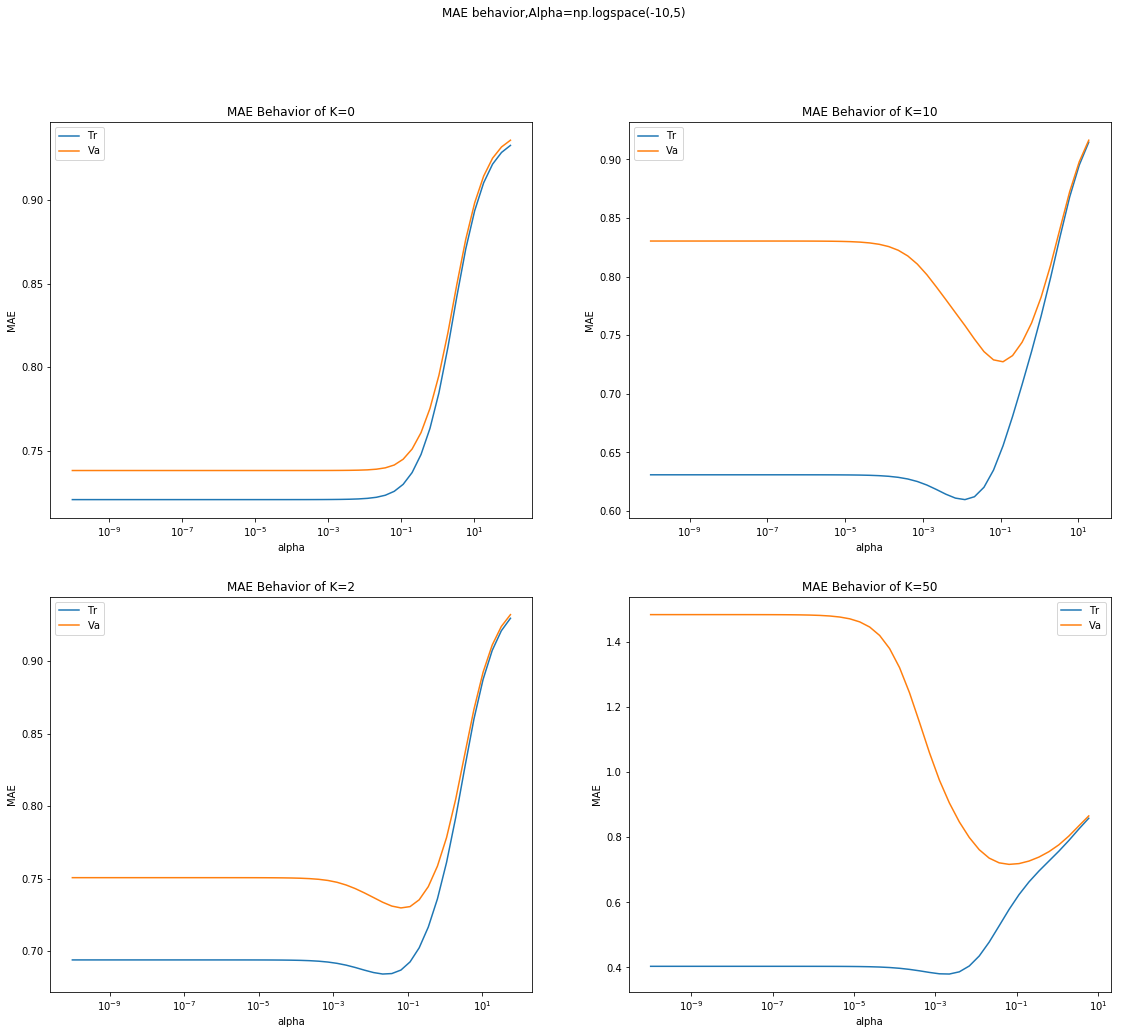

In [8]:
fig3a, axes = plt.subplots(nrows=2, ncols=2, figsize=(19,16))
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('alpha')
        axes[i,j].set_ylabel('MAE')
        axes[i,j].set_title('MAE Behavior of K=' + str(int(K[i+2*j])))
        axes[i,j].plot(a, tr_error[i+2*j], label='Tr')
        axes[i,j].plot(a, va_error[i+2*j], label='Va')
        axes[i,j].legend()
        axes[i,j].set_xscale('log')
        
fig3a.suptitle('MAE behavior,'+ 'Alpha=np.logspace(-10,5)')

3c We can use a small K or shrink the size of each batch.

3d K=0 and K=2 are performing a little better than the model in question 1 and 2.      
   I would recommend use 0 or 2 factors.      
   There's no need to look into more than 50 factors because it's not increasing the performance(probably overfitting).

In [7]:
#2 Factors:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
model3e = CFV(n_epochs=250, step_size=0.5, n_factors=2, alpha=0.1)
model3e.init_parameter_dict(n_users, n_items, train_tuple)
model3e.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     6.21473 | train_MAE     1.50279 | valid_MAE     1.49613 | grad_wrt_mu     0.92071 | grad_wrt_b_per_user     0.00237 | grad_wrt_c_per_item     0.00149 | grad_wrt_U     0.00348 | grad_wrt_V     0.00234
epoch       0.013 | loss_total     6.17911 | train_MAE     1.41942 | valid_MAE     1.42198 | grad_wrt_mu     0.12156 | grad_wrt_b_per_user     0.00229 | grad_wrt_c_per_item     0.00141 | grad_wrt_U     0.00342 | grad_wrt_V     0.00239
epoch       0.025 | loss_total     6.03396 | train_MAE     1.41146 | valid_MAE     1.41516 | grad_wrt_mu     0.03582 | grad_wrt_b_per_user     0.00229 | grad_wrt_c_per_item     0.00138 | grad_wrt_U     0.00333 | grad_wrt_V     0.00230
epoch       0.100 | loss_total     5.76014 | train_MAE     1.39247 | valid_MAE     1.39530 | grad_wrt_mu     0.19923 | grad_wrt_b_per_user     0.00225 | grad_wrt_c_per_item     0.00135 | grad_wrt_U     0.00326 | grad_wrt_V     0.00225
epoch       0.200 | loss_total     5.32516 | train_MAE     1

epoch       3.400 | loss_total     2.52348 | train_MAE     0.94536 | valid_MAE     0.96359 | grad_wrt_mu     0.10951 | grad_wrt_b_per_user     0.00149 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00126 | grad_wrt_V     0.00092
epoch       3.500 | loss_total     2.47923 | train_MAE     0.94257 | valid_MAE     0.96018 | grad_wrt_mu     0.06081 | grad_wrt_b_per_user     0.00146 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00118 | grad_wrt_V     0.00086
epoch       3.613 | loss_total     2.44172 | train_MAE     0.93482 | valid_MAE     0.95359 | grad_wrt_mu     0.10672 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00127 | grad_wrt_V     0.00092
epoch       3.713 | loss_total     2.40498 | train_MAE     0.93092 | valid_MAE     0.94951 | grad_wrt_mu     0.01696 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00099 | grad_wrt_U     0.00117 | grad_wrt_V     0.00089
epoch       3.800 | loss_total     2.37694 | train_MAE     0

epoch       9.750 | loss_total     1.53279 | train_MAE     0.80360 | valid_MAE     0.82803 | grad_wrt_mu     0.05511 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00069 | grad_wrt_V     0.00048
epoch      10.000 | loss_total     1.51816 | train_MAE     0.80240 | valid_MAE     0.82627 | grad_wrt_mu     0.01584 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00066 | grad_wrt_V     0.00045
epoch      11.000 | loss_total     1.46773 | train_MAE     0.79491 | valid_MAE     0.81876 | grad_wrt_mu     0.05845 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00080 | grad_wrt_U     0.00059 | grad_wrt_V     0.00044
epoch      12.000 | loss_total     1.42404 | train_MAE     0.78969 | valid_MAE     0.81323 | grad_wrt_mu     0.04105 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00061 | grad_wrt_V     0.00043
epoch      13.000 | loss_total     1.38680 | train_MAE     0

epoch      44.000 | loss_total     1.04871 | train_MAE     0.73570 | valid_MAE     0.76070 | grad_wrt_mu     0.01645 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00032 | grad_wrt_V     0.00019
epoch      45.000 | loss_total     1.04613 | train_MAE     0.73077 | valid_MAE     0.75765 | grad_wrt_mu     0.05913 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00033 | grad_wrt_V     0.00019
epoch      46.000 | loss_total     1.04138 | train_MAE     0.73241 | valid_MAE     0.75833 | grad_wrt_mu     0.03418 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00031 | grad_wrt_V     0.00019
epoch      47.000 | loss_total     1.03728 | train_MAE     0.73050 | valid_MAE     0.75713 | grad_wrt_mu     0.03375 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00030 | grad_wrt_V     0.00018
epoch      48.000 | loss_total     1.03500 | train_MAE     0

epoch     195.000 | loss_total     0.84340 | train_MAE     0.70111 | valid_MAE     0.73741 | grad_wrt_mu     0.01173 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00034 | grad_wrt_V     0.00022
epoch     200.000 | loss_total     0.84145 | train_MAE     0.69641 | valid_MAE     0.73456 | grad_wrt_mu     0.14234 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00033 | grad_wrt_V     0.00021
epoch     205.000 | loss_total     0.83851 | train_MAE     0.70169 | valid_MAE     0.73775 | grad_wrt_mu     0.07338 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00033 | grad_wrt_V     0.00019
epoch     210.000 | loss_total     0.83684 | train_MAE     0.70261 | valid_MAE     0.73840 | grad_wrt_mu     0.06906 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00035 | grad_wrt_V     0.00021
epoch     215.000 | loss_total     0.83524 | train_MAE     0

[ 0.08239941 -0.32913701 -0.0372406   0.22327492 -0.11569277 -0.32949667
 -0.51060424 -0.50746085 -0.79073236 -0.592902   -0.65224791 -0.64892778
 -0.80690433 -0.80711085 -0.6925586   0.54269781  0.06421546 -0.53089196
 -0.50387622 -0.48682363] [ 0.3561754   0.53450276 -0.15376184 -0.04260292  0.77782893 -0.15445973
 -0.19469097  0.1935403   0.25841157  0.19861086  0.13559631  0.2752468
  0.02343947  0.09642642 -0.13832645 -0.27475537 -0.48355823  0.1091072
 -0.07069955 -0.05248082] [3.888888888888889, 3.76271186440678, 3.7007299270072993, 4.045, 3.67816091954023, 4.359574468085106, 4.191335740072202, 4.002450980392157, 3.6666666666666665, 2.9302325581395348, 4.306990881458966, 3.928030303030303, 3.546153846153846, 3.4939759036144578, 3.3943661971830985, 3.5535714285714284, 3.7710843373493974, 3.180722891566265, 3.4416243654822334, 3.076923076923077]


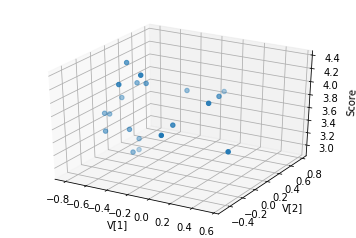

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

data_path='C:/Users/xush4/Documents/comp135-19s-assignments-master/project3/data_movie_lens_100k/'
sel_df = pd.read_csv(os.path.join(data_path, "select_movies.csv"))
aveT=[]; idex=[]
for i in sel_df["item_id"]:
    idx=train_tuple[1]
    aveTid=np.mean(train_tuple[2][np.where(idx==i)])
    aveT.append(aveTid);
    idex.append(i)
    
V=model3e.param_dict['V'][idex]
#print(V[:,0].size, V[:,1].size, aveT)
ax.scatter(V[:,0], V[:,1], aveT, zdir='z')

ax.set_xlabel('V[1]')
ax.set_ylabel('V[2]')
ax.set_zlabel('Score')
print(V[:,0], V[:,1], aveT)

The trend is not that obvious, it seems to me items with smaller V[1] and bigger V[2] are more controversial(either very high scores or very low scores.).  

### Problem 4

In [160]:
# Reference https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD
from surprise.prediction_algorithms.matrix_factorization import SVD

In [149]:
import pandas as pd
import numpy as np

from surprise import SVD
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import cross_validate, KFold

reader = Reader(
    line_format='user item rating', sep=',',
    rating_scale=(1, 5), skip_lines=1)

## Load the training set into surprise's custom dataset object
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_file('data_movie_lens_100k/ratings_train.csv', reader=reader)


## Load the test set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame because the true ratings are missing)
test_df = pd.read_csv('data_movie_lens_100k/ratings_test_masked.csv')
test_set = Dataset.load_from_df(test_df, reader=reader)
test_set = test_set.build_full_trainset().build_testset()
print(type(test_df['user_id'][0]))

<class 'numpy.int64'>


In [48]:
numF=5
kf = KFold(n_splits=numF)
K=[0,2,5,10]
a=np.logspace(-3,1,17)
tr_error=[];
va_error=[];

for i in range(4):
    te=[]; ve=[];
    for j in range(int(a.size)):
        sumTe=0; sumVa=0;
        for trainset, validset in kf.split(train_set):
            model4 = SVD(n_epochs=250, n_factors=K[i], lr_all=a[j])
        # train and test algorithm.
            model4.fit(trainset)
            pre1 = model4.test(trainset.build_testset())
            pre2 = model4.test(validset)
    # Compute and print Root Mean Squared Error
            sumTe=sumTe+accuracy.mae(pre1, verbose=True)
            sumVa=sumVa+accuracy.mae(pre2, verbose=True)
        print(sumTe/numF)
        te.append(sumTe/numF);
        ve.append(sumVa/numF);
    tr_error.append(te)
    va_error.append(ve)

MAE:  0.7186
MAE:  0.7434
MAE:  0.7194
MAE:  0.7442
MAE:  0.7195
MAE:  0.7443
MAE:  0.7187
MAE:  0.7468
MAE:  0.7194
MAE:  0.7433
0.7191109777573048
MAE:  0.7184
MAE:  0.7461
MAE:  0.7185
MAE:  0.7432
MAE:  0.7204
MAE:  0.7376
MAE:  0.7168
MAE:  0.7485
MAE:  0.7166
MAE:  0.7494
0.7181536951948321
MAE:  0.7172
MAE:  0.7442
MAE:  0.7175
MAE:  0.7439
MAE:  0.7183
MAE:  0.7413
MAE:  0.7173
MAE:  0.7468
MAE:  0.7180
MAE:  0.7435
0.7176523506408106
MAE:  0.7132
MAE:  0.7600
MAE:  0.7192
MAE:  0.7399
MAE:  0.7187
MAE:  0.7390
MAE:  0.7183
MAE:  0.7412
MAE:  0.7175
MAE:  0.7429
0.7173659677248028
MAE:  0.7189
MAE:  0.7426
MAE:  0.7176
MAE:  0.7456
MAE:  0.7157
MAE:  0.7547
MAE:  0.7193
MAE:  0.7418
MAE:  0.7186
MAE:  0.7417
0.7180092246645577
MAE:  0.7193
MAE:  0.7487
MAE:  0.7207
MAE:  0.7444
MAE:  0.7211
MAE:  0.7412
MAE:  0.7180
MAE:  0.7501
MAE:  0.7194
MAE:  0.7504
0.7196984145110028
MAE:  0.7213
MAE:  0.7561
MAE:  0.7232
MAE:  0.7481
MAE:  0.7214
MAE:  0.7512
MAE:  0.7219
MAE:  0.7519
MA

MAE:  0.4795
MAE:  0.7835
MAE:  0.4811
MAE:  0.7943
MAE:  0.4804
MAE:  0.7929
MAE:  0.4808
MAE:  0.7849
0.48051724466425483
MAE:  0.4780
MAE:  0.7955
MAE:  0.4784
MAE:  0.7905
MAE:  0.4767
MAE:  0.7902
MAE:  0.4763
MAE:  0.8002
MAE:  0.4753
MAE:  0.8028
0.4769462725628756
MAE:  0.4814
MAE:  0.8054
MAE:  0.4829
MAE:  0.8012
MAE:  0.4834
MAE:  0.8067
MAE:  0.4821
MAE:  0.7975
MAE:  0.4835
MAE:  0.8020
0.4826754861954027
MAE:  0.5028
MAE:  0.8143
MAE:  0.5054
MAE:  0.8090
MAE:  0.5047
MAE:  0.8095
MAE:  0.5045
MAE:  0.8070
MAE:  0.5070
MAE:  0.7953
0.5048536275347448
MAE:  0.5749
MAE:  0.8405
MAE:  0.5723
MAE:  0.8441
MAE:  0.5759
MAE:  0.8436
MAE:  0.5737
MAE:  0.8473
MAE:  0.5753
MAE:  0.8416
0.5744137933986218
MAE:  0.7546
MAE:  0.9092
MAE:  0.7486
MAE:  0.9053
MAE:  0.7459
MAE:  0.8967
MAE:  0.7472
MAE:  0.9038
MAE:  0.7482
MAE:  0.8927
0.7488795470253427
MAE:  1.4702
MAE:  1.4716
MAE:  1.4687
MAE:  1.4778
MAE:  1.4734
MAE:  1.4592
MAE:  1.4695
MAE:  1.4748
MAE:  1.4708
MAE:  1.4692
1

Text(0.5,0.98,'MAE behavior,Alpha=np.logspace(-3,2)')

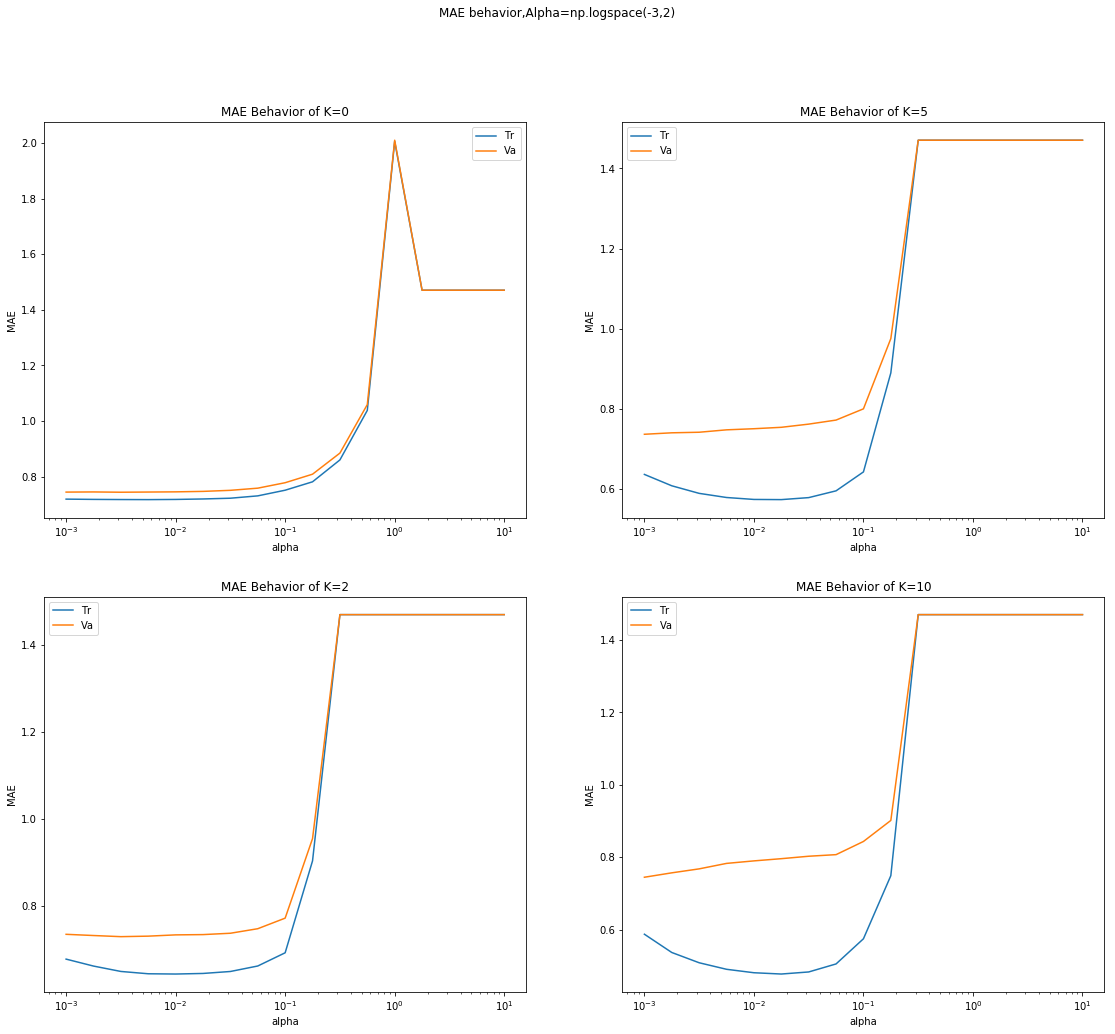

In [49]:
#print(tr_error)
fig3a, axes = plt.subplots(nrows=2, ncols=2, figsize=(19,16))
for i in range(2):
    for j in range(2):
        axes[i,j].set_xlabel('alpha')
        axes[i,j].set_ylabel('MAE')
        axes[i,j].set_title('MAE Behavior of K=' + str(int(K[i+2*j])))
        axes[i,j].plot(a, tr_error[i+2*j], label='Tr')
        axes[i,j].plot(a, va_error[i+2*j], label='Va')
        axes[i,j].legend()
        axes[i,j].set_xscale('log')
        
fig3a.suptitle('MAE behavior,'+ 'Alpha=np.logspace(-3,2)')

The trend on $\alpha \leq 0.1$ is pretty identical. The trend over $\alpha > 0.1$ is a differnt. It's probably because the step size we use is larger so the method can not converge near enough to the optimal solution.

In [202]:
reader = Reader(
    line_format='user item rating', sep=',',
    rating_scale=(1, 5), skip_lines=1)

## Load the training set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame here because that's what needed on test set)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)
train_set = train_set.build_full_trainset()

## Load the test set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame because the true ratings are missing)
test_df = pd.read_csv('data_movie_lens_100k/ratings_test_masked.csv')
test_set = Dataset.load_from_df(test_df, reader=reader)
test_set = test_set.build_full_trainset().build_testset()

# Use the SVD algorithm
    ## Fit model to training set
model = SVD(n_factors=2)
model.fit(train_set)

## Measure predictions on train set
print("Making predictions on training set (showing first 10):")
tr_pred = model.test(train_set.build_testset())
tr_mae = accuracy.mae(tr_pred)
tr_predicted_ratings_N = np.asarray([p.est for p in tr_pred], dtype=np.float64)
print(tr_predicted_ratings_N[:10])

## Measure predictions on test set
print("Making predictions on test set (showing first 10):")
te_pred = model.test(test_set)
te_mae = accuracy.mae(te_pred) # should be NaN because no real labels on testset
te_predicted_ratings_N = np.asarray([p.est for p in te_pred], dtype=np.float64)
print(te_predicted_ratings_N[:10])
    
print("n_factors %6d  tr_MAE %7.3f  test_MAE %7.3f" % (n_factors, tr_mae, te_mae))

print("Making test set predictions in the original order")
for row in test_df.values[:10]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))
tep0=[]
for row in test_df.values[:]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        #print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))
        tep0.append(rhat.est)
np.savetxt('predicted_ratings_test4.txt', np.asarray(tep0))

Making predictions on training set (showing first 10):
MAE:  0.7184
[2.69729623 3.61916657 2.80442954 3.72018483 2.77842302 3.47178856
 3.28690477 3.43117354 3.70169473 2.63116753]
Making predictions on test set (showing first 10):
MAE:  nan
[4.20307785 3.23106528 2.51561078 3.45627649 3.97710067 3.86847339
 2.98476368 3.7159181  3.16108109 3.64082798]
n_factors      2  tr_MAE   0.718  test_MAE     nan
Making test set predictions in the original order
user  503  item  204  predicted rating    4.203
user  795  item  185  predicted rating    3.908
user   42  item  403  predicted rating    3.751
user  327  item  740  predicted rating    3.450
user  285  item   98  predicted rating    3.989
user  279  item   11  predicted rating    4.483
user  496  item  588  predicted rating    2.373
user  499  item  266  predicted rating    3.572
user  357  item  126  predicted rating    4.146
user  932  item  182  predicted rating    3.213


### Problem5

In [50]:
#Kmeans:

In [196]:
numF=5
kf = KFold(n_splits=numF)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_file('data_movie_lens_100k/ratings_train.csv', reader=reader)

total_sample=train_df.shape[0]
K_nbh=((1-1/numF)*total_sample)**np.linspace(0.25, 0.75)
K_nbh=[1,5,10,25,50, int(np.sqrt((1-1/numF)*total_sample))]

In [90]:
print(K_nbh)

[1, 5, 10, 25, 50, 268]


In [91]:
##MSD with mean
from surprise.prediction_algorithms.knns import KNNWithMeans as KNNM
te=[]; ve=[];
for k in K_nbh:
    sumTe=0; sumVa=0;
    for trainset, validset in kf.split(train_set):
            model5=KNNM(k=int(k))
        # train and test algorithm.
            model5.fit(trainset)
            pre1 = model5.test(trainset.build_testset())
            pre2 = model5.test(validset)
            sumTe=sumTe+accuracy.mae(pre1, verbose=True)
            sumVa=sumVa+accuracy.mae(pre2, verbose=True)
    te.append(sumTe/numF);
    ve.append(sumVa/numF);

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0522
MAE:  0.9743
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0491
MAE:  0.9796
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0504
MAE:  0.9749
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0492
MAE:  0.9698
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0512
MAE:  0.9789
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3891
MAE:  0.8000
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3912
MAE:  0.7933
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3905
MAE:  0.8081
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3902
MAE:  0.8159
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3912
MAE:  0.7988
Computing 

In [197]:
##MSD with mean
from surprise.prediction_algorithms.knns import KNNWithMeans as KNNM
tea=[]; vea=[];
for k in K_nbh:
    sumTe=0; sumVa=0;
    for trainset, validset in kf.split(train_set):
            model5=KNNM(k=int(k),sim_options={'name': 'pearson'})
        # train and test algorithm.
            model5.fit(trainset)
            pre1 = model5.test(trainset.build_testset())
            pre2 = model5.test(validset)
            sumTe=sumTe+accuracy.mae(pre1, verbose=True)
            sumVa=sumVa+accuracy.mae(pre2, verbose=True)
    tea.append(sumTe/numF);
    vea.append(sumVa/numF);

Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1289
MAE:  0.9988
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1305
MAE:  1.0057
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1313
MAE:  1.0045
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1326
MAE:  1.0004
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1307
MAE:  1.0038
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4077
MAE:  0.8072
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4094
MAE:  0.7949
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4084
MAE:  0.7996
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4075
MAE:  0.8001
Computing the pearson similarity matrix...
Done computing similarity matr

In [92]:
##MSD
from surprise.prediction_algorithms.knns import KNNBasic as KNN
teb=[]; veb=[];
for k in K_nbh:
    sumTe=0; sumVa=0;
    for trainset, validset in kf.split(train_set):
            model5=KNN(k=int(k))
        # train and test algorithm.
            model5.fit(trainset)
            pre1 = model5.test(trainset.build_testset())
            pre2 = model5.test(validset)
            sumTe=sumTe+accuracy.mae(pre1, verbose=True)
            sumVa=sumVa+accuracy.mae(pre2, verbose=True)
    teb.append(sumTe/numF);
    veb.append(sumVa/numF);

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0000
MAE:  0.9784
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0000
MAE:  0.9739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0000
MAE:  0.9722
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0000
MAE:  0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.0000
MAE:  0.9708
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3359
MAE:  0.8124
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3360
MAE:  0.8051
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3371
MAE:  0.8060
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3359
MAE:  0.8124
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.3365
MAE:  0.8171
Computing 

In [93]:
## Pearson
from surprise.prediction_algorithms.knns import KNNBasic as KNN
tec=[]; vec=[];

for k in K_nbh:
    sumTe=0; sumVa=0;
    for trainset, validset in kf.split(train_set):
            model5=KNN(k=int(k),sim_options={'name': 'pearson'})
        # train and test algorithm.
            model5.fit(trainset)
            pre1 = model5.test(trainset.build_testset())
            pre2 = model5.test(validset)
            sumTe=sumTe+accuracy.mae(pre1, verbose=True)
            sumVa=sumVa+accuracy.mae(pre2, verbose=True)
    tec.append(sumTe/numF);
    vec.append(sumVa/numF);

Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1378
MAE:  1.0490
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1337
MAE:  1.0582
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1337
MAE:  1.0559
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1344
MAE:  1.0568
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.1350
MAE:  1.0555
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4605
MAE:  0.8633
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4645
MAE:  0.8617
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4622
MAE:  0.8657
Computing the pearson similarity matrix...
Done computing similarity matrix.
MAE:  0.4619
MAE:  0.8689
Computing the pearson similarity matrix...
Done computing similarity matr

### Summary of 5:        
I use surprise KNN for problem 5. I look into the tradiational KNN, KNN-Means(KNNM, subtract means), KNN using pearson correlation(KNNP) and KNN-Means with pearson correlation(KNNMP). I looked into how k affects the error of the methods. It seems choosing K=20 should be a good strategy in all of the cases. We observe the test error behavior as the following:     
KNN:  0.7653
KNNM: 0.7427 
KNNP: 0.7953
KNNMP:0.7367
This shows when using KNN here, subtract mean and use pearson correlation is better for prediction.

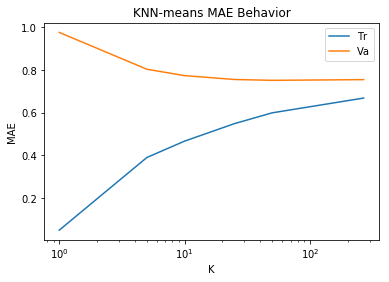

In [94]:
plt.figure
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('KNN-means MAE Behavior')
plt.plot(K_nbh, te, label='Tr')
plt.plot(K_nbh, ve, label='Va')
plt.xscale('log')
plt.legend()

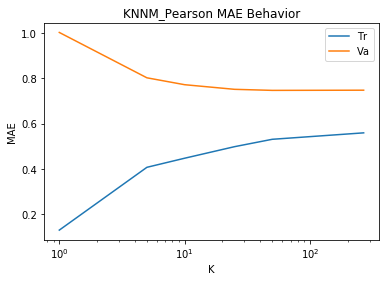

In [198]:
plt.figure
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('KNNM_Pearson MAE Behavior')
plt.plot(K_nbh, tea, label='Tr')
plt.plot(K_nbh, vea, label='Va')
plt.xscale('log')
plt.legend()

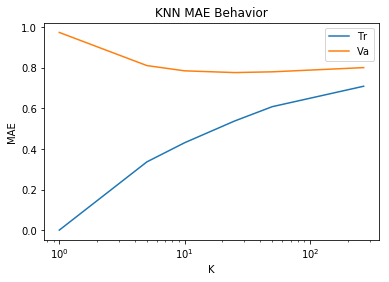

In [95]:
plt.figure
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('KNN MAE Behavior')
plt.plot(K_nbh, teb, label='Tr')
plt.plot(K_nbh, veb, label='Va')
plt.xscale('log')
plt.legend()

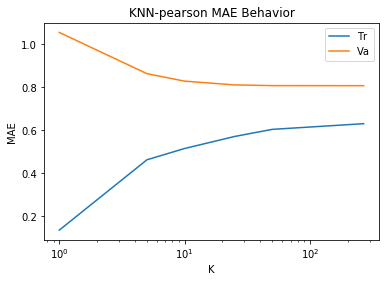

In [96]:
plt.figure
plt.xlabel('K')
plt.ylabel('MAE')
plt.title('KNN-pearson MAE Behavior')
plt.plot(K_nbh, tec, label='Tr')
plt.plot(K_nbh, vec, label='Va')
plt.xscale('log')
plt.legend()

In [200]:
### Comming back to get result
train_set = train_set.build_full_trainset()

In [189]:
model=KNNM(K=20)
model.fit(train_set)

## Measure predictions on train set
print("Making predictions on training set (showing first 10):")
tr_pred = model.test(train_set.build_testset())
tr_mae = accuracy.mae(tr_pred)
tr_predicted_ratings_N = np.asarray([p.est for p in tr_pred], dtype=np.float64)
print(tr_predicted_ratings_N[:10])

## Measure predictions on test set
print("Making predictions on test set (showing first 10):")
te_pred = model.test(test_set)
#te_mae = accuracy.mae(te_pred) # should be NaN because no real labels on testset
te_predicted_ratings_N1 = np.asarray([p.est for p in te_pred], dtype=np.float64)
#print(te_predicted_ratings_N[:10])
    
print("n_factors %6d  tr_MAE %7.3f  test_MAE %7.3f" % (n_factors, tr_mae, te_mae))

#print("Making test set predictions in the original order")
tep1=[]
for row in test_df.values[:]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        #print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))
        tep1.append(rhat.est)
np.savetxt('predicted_ratings_test5M.txt', np.asarray(tep1))

Computing the msd similarity matrix...
Done computing similarity matrix.
Making predictions on training set (showing first 10):
MAE:  0.5981
[2.62806394 3.51219776 2.90599123 3.98393553 2.89749724 2.91080894
 3.57222821 3.2620783  3.64707388 2.3300006 ]
Making predictions on test set (showing first 10):
MAE:  nan
n_factors      2  tr_MAE   0.598  test_MAE     nan


In [190]:
#train_set = train_set.build_full_trainset()
model=KNN(K=20)
model.fit(train_set)

## Measure predictions on train set
print("Making predictions on training set (showing first 10):")
tr_pred = model.test(train_set.build_testset())
tr_mae = accuracy.mae(tr_pred)
tr_predicted_ratings_N = np.asarray([p.est for p in tr_pred], dtype=np.float64)
print(tr_predicted_ratings_N[:10])

## Measure predictions on test set
print("Making predictions on test set (showing first 10):")
te_pred = model.test(test_set)
#te_mae = accuracy.mae(te_pred) # should be NaN because no real labels on testset
te_predicted_ratings_N2 = np.asarray([p.est for p in te_pred], dtype=np.float64)
#print(te_predicted_ratings_N2[:10])
    
print("n_factors %6d  tr_MAE %7.3f  test_MAE %7.3f" % (n_factors, tr_mae, te_mae))


#print("Making test set predictions in the original order")
tep2=[]
for row in test_df.values[:]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        #print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))
        tep2.append(rhat.est)
np.savetxt('predicted_ratings_test5.txt', np.asarray(tep2))

Computing the msd similarity matrix...
Done computing similarity matrix.
Making predictions on training set (showing first 10):
MAE:  0.6015
[2.47094827 3.91616195 3.00816135 4.30859069 3.07263422 3.1585108
 3.73761608 3.51404379 3.84158116 2.40704005]
Making predictions on test set (showing first 10):
MAE:  nan
n_factors      2  tr_MAE   0.602  test_MAE     nan


In [191]:
model=KNN(K=20, sim_options={'name': 'pearson'})
model.fit(train_set)

## Measure predictions on train set
print("Making predictions on training set (showing first 10):")
tr_pred = model.test(train_set.build_testset())
tr_mae = accuracy.mae(tr_pred)
tr_predicted_ratings_N = np.asarray([p.est for p in tr_pred], dtype=np.float64)
print(tr_predicted_ratings_N[:10])

## Measure predictions on test set
print("Making predictions on test set (showing first 10):")
te_pred = model.test(test_set)
#te_mae = accuracy.mae(te_pred) # should be NaN because no real labels on testset
te_predicted_ratings_N = np.asarray([p.est for p in te_pred], dtype=np.float64)
print(te_predicted_ratings_N[:10])
    
print("n_factors %6d  tr_MAE %7.3f  test_MAE %7.3f" % (n_factors, tr_mae, te_mae))

#print("Making test set predictions in the original order")
tep3=[]
for row in test_df.values[:]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        #print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))
        tep3.append(rhat.est)
np.savetxt('predicted_ratings_test5p.txt', np.asarray(tep3))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Making predictions on training set (showing first 10):
MAE:  0.6067
[2.46275582 4.12447317 3.10790543 4.44937415 3.13762163 3.51988639
 3.83512304 3.43602947 3.96805273 2.54442012]
Making predictions on test set (showing first 10):
MAE:  nan
[3.81880269 2.38702228 2.33748343 3.77718842 3.93141071 3.53435695
 3.0212087  3.80168179 3.0288308  3.69002411]
n_factors      2  tr_MAE   0.607  test_MAE     nan


In [201]:
model=KNNM(K=20, sim_options={'name': 'pearson'})
model.fit(train_set)

## Measure predictions on train set
print("Making predictions on training set (showing first 10):")
tr_pred = model.test(train_set.build_testset())
tr_mae = accuracy.mae(tr_pred)
tr_predicted_ratings_N = np.asarray([p.est for p in tr_pred], dtype=np.float64)
print(tr_predicted_ratings_N[:10])

## Measure predictions on test set
print("Making predictions on test set (showing first 10):")
te_pred = model.test(test_set)
#te_mae = accuracy.mae(te_pred) # should be NaN because no real labels on testset
te_predicted_ratings_N = np.asarray([p.est for p in te_pred], dtype=np.float64)
print(te_predicted_ratings_N[:10])
    
print("n_factors %6d  tr_MAE %7.3f  test_MAE %7.3f" % (n_factors, tr_mae, te_mae))

#print("Making test set predictions in the original order")
tep4=[]
for row in test_df.values[:]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        #print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))
        tep4.append(rhat.est)
np.savetxt('predicted_ratings_test5Mp.txt', np.asarray(tep4))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Making predictions on training set (showing first 10):
MAE:  0.5375
[2.52974265 3.7955393  3.02586446 4.18648324 2.9166546  3.13912557
 3.62204029 3.24213867 3.80484038 2.38314212]
Making predictions on test set (showing first 10):
[3.5294804 3.5294804 3.5294804 3.5294804 3.5294804 3.5294804 3.5294804
 3.5294804 3.5294804 3.5294804]
n_factors      2  tr_MAE   0.538  test_MAE     nan


I use surprise KNN for problem 5. I look into the tradiational KNN, KNN-Means(KNNM, subtract means), KNN using pearson correlation(KNNP) and KNN-Means with pearson correlation(KNNMP). I looked into how k affects the error of the methods. It seems choosing K=20 should be a good strategy in all of the cases. We observe the test error behavior as the following:     
KNN:  0.7653
KNNM: 0.7427 
KNNP: 0.7953
KNNMP:0.7367
This shows when using KNN here, subtract mean and use pearson correlation is better for prediction.